In [1]:
import numpy as np
import scipy.signal as ss
import soundfile as sf
import rir_generator as rir
import matplotlib.pyplot as plt
import math
import os
import csv

120.0043170486586
59.99568295134142
0.0
-59.99568295134142
-120.0043170486586
180.0


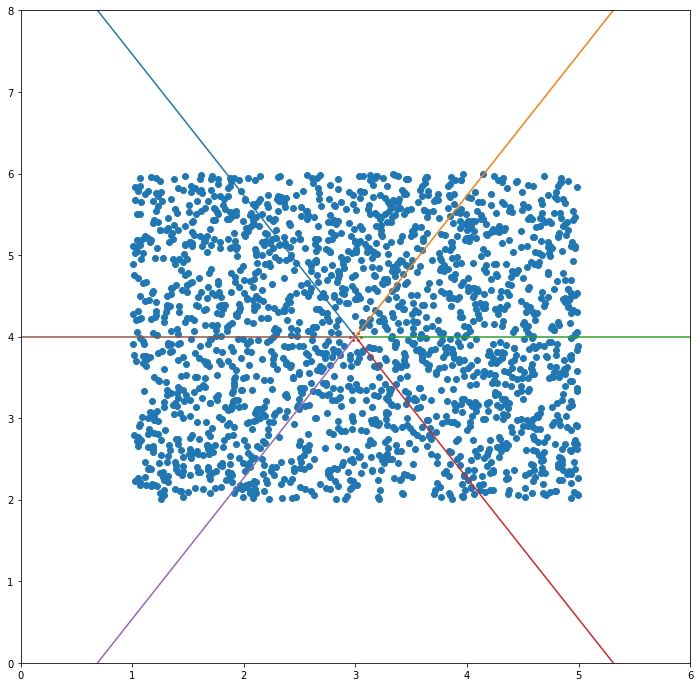

In [2]:
respeaker_mic = np.array([
    [-0.02315, 0.04009,1],
    [0.02315, 0.04009,1],
    [0.04629, 0.0,1],
    [0.02315,-0.04009,1],
    [-0.02315,-0.04009,1],
    [-0.04629, 0.0,1]
])


center_x = 3
center_y = 4
respeaker_mic[:,0] = respeaker_mic[:,0] + center_x
respeaker_mic[:,1] = respeaker_mic[:,1] + center_y

slopes = (respeaker_mic[0:,1] - center_y) / (respeaker_mic[0:,0] - center_x)

plt.figure(figsize=(12.00,12.00))
plt.axis([0, center_x*2, 0, center_y*2])
plt.scatter(respeaker_mic[:,0], respeaker_mic[:,1], s=3, c='r')

for idx, (i, j) in enumerate(respeaker_mic[0:,:2]):
    if i > center_x :
        y = slopes[idx]*(center_x*2-center_x) + center_y
        plt.plot([center_x*2,center_x], [y,center_y])
        angle = math.atan2(y-center_y, center_x*2-center_x)
        #print(angle)
    else:
        y = slopes[idx]*(0-center_x) + center_y
        plt.plot([0,center_x], [y,center_y])
        angle = math.atan2(y-center_y, 0-center_x)
        #print(angle)
    print(angle * 180 / np.pi)
    
x = np.random.rand(2000) * 4 + 1
y = np.random.rand(2000) * 4 + 2
z = np.random.rand(2000) * 1 + 0.5
x_mask = abs(x-3) > 0.1
y_mask = abs(y-4) > 0.1
mask = x_mask + y_mask
x = x[mask]
y = y[mask]
plt.scatter(x, y)

In [3]:
data_dir = 'data_speech_commands_v0.02/'
folder_list = os.listdir(data_dir)
wav_file = []
for path in folder_list:
    f_path = os.path.join(data_dir, path)
    file_in_dir = os.listdir(f_path)
    for wav in file_in_dir:
        file_list = os.path.join(f_path, wav)
        if file_list[-3:] == 'wav':    
            wav_file.append(file_list)       
print(len(wav_file))

import random
random.shuffle(wav_file)

105829


In [4]:
for ff in folder_list:
    os.mkdir(os.path.join('data_all', ff))

In [5]:
data_path = 'data_all/'
csv_file = 'data_all.csv'
interval = 16000
channels = 6
amp = 4
num = 0

for idx, wav in enumerate(wav_file):
    signal, fs = sf.read(wav_file[idx], always_2d=True)
    
    if len(signal) != 16000:
        continue
        
    h = rir.generate(
        c=340,                  # Sound velocity (m/s)
        fs=fs,                  # Sample frequency (samples/s)
        r=respeaker_mic,
        s=[x[int(idx%len(x))], y[int(idx%len(y))], z[int(idx%len(z))]],          # Source position [x y z] (m)
        L=[center_x*2, center_y*2, 3.0],        # Room dimensions [x y z] (m)
        reverberation_time=0.4, # Reverberation time (s)
        nsample=4096
    )
    signal = ss.convolve(h[:, None, :], signal[:, :, None])
    signal = np.squeeze(signal[:len(signal)-int(4096)+1], axis=1) * amp
    signal = signal[:int(len(signal)/interval) * interval]
    #signal = signal.reshape(-1, interval, channels)
    
    fileName = str('synthetic_' + wav.split('/')[-1])
    #print(fileName)
    name = data_path + wav.split('/')[1] + '/' + fileName
    print(name)
    csv_comment = [num,
                   idx,
                   name,
                   'unknown',
                   amp,
                   round(x[int(idx%len(x))]-3, 4),
                   round(y[int(idx%len(y))]-4, 4),
                   round(z[int(idx%len(z))]-1, 4),
                   6,
                   8,
                   3,
                   0,
                   1]
    num += 1
    with open(csv_file, 'a', newline='') as csvfile:
        spamwriter = csv.writer(csvfile, delimiter=',')
        spamwriter.writerow(csv_comment)
    print(signal.shape)
    sf.write(name, signal, fs)

data_all/yes/synthetic_fb7c9b3b_nohash_1.wav
(16000, 6)
data_all/go/synthetic_e20be42a_nohash_0.wav
(16000, 6)
data_all/down/synthetic_2e0d80f7_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_b49caed3_nohash_1.wav
(16000, 6)
data_all/visual/synthetic_845f8553_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_a1e71565_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_3cc595de_nohash_0.wav
(16000, 6)
data_all/house/synthetic_283d7a53_nohash_0.wav
(16000, 6)
data_all/down/synthetic_692a88e6_nohash_4.wav
(16000, 6)
data_all/five/synthetic_0d393936_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_a8688b67_nohash_1.wav
(16000, 6)
data_all/learn/synthetic_645ed69d_nohash_2.wav
(16000, 6)
data_all/on/synthetic_ee1d8d49_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_f42e234b_nohash_0.wav
(16000, 6)
data_all/up/synthetic_953fe1ad_nohash_4.wav
(16000, 6)
data_all/off/synthetic_3c1e12cf_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_195c120a_nohash_1.wav
(16000, 6)
data_all/down/synthetic_3b3d2f59_no

data_all/five/synthetic_ab00c4b2_nohash_0.wav
(16000, 6)
data_all/no/synthetic_322d17d3_nohash_2.wav
(16000, 6)
data_all/learn/synthetic_a7acbbeb_nohash_2.wav
(16000, 6)
data_all/up/synthetic_ede2f4ee_nohash_1.wav
(16000, 6)
data_all/go/synthetic_4c6167ca_nohash_4.wav
(16000, 6)
data_all/on/synthetic_017c4098_nohash_1.wav
(16000, 6)
data_all/right/synthetic_a7200079_nohash_3.wav
(16000, 6)
data_all/no/synthetic_6846af18_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_712e4d58_nohash_3.wav
(16000, 6)
data_all/cat/synthetic_234d6a48_nohash_0.wav
(16000, 6)
data_all/house/synthetic_ca4912b6_nohash_0.wav
(16000, 6)
data_all/off/synthetic_99e6cab8_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_a0a8d759_nohash_1.wav
(16000, 6)
data_all/bed/synthetic_d8c52371_nohash_0.wav
(16000, 6)
data_all/three/synthetic_cb62dbf1_nohash_0.wav
(16000, 6)
data_all/six/synthetic_ff2b842e_nohash_0.wav
(16000, 6)
data_all/right/synthetic_587f3271_nohash_2.wav
(16000, 6)
data_all/backward/synthetic_27c24504_n

data_all/backward/synthetic_ca4912b6_nohash_4.wav
(16000, 6)
data_all/sheila/synthetic_baeac2ba_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_0ea9c8ce_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_3df9a3d4_nohash_0.wav
(16000, 6)
data_all/house/synthetic_a583c5b0_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_cce17a61_nohash_0.wav
(16000, 6)
data_all/left/synthetic_bcf614a2_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_332d33b1_nohash_0.wav
(16000, 6)
data_all/three/synthetic_692a88e6_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_a24cf51c_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_c0e8f5a1_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_aa62fdad_nohash_1.wav
(16000, 6)
data_all/forward/synthetic_3b4f8f24_nohash_0.wav
(16000, 6)
data_all/down/synthetic_9e42ae25_nohash_0.wav
(16000, 6)
data_all/six/synthetic_b9f46737_nohash_2.wav
(16000, 6)
data_all/off/synthetic_563aa4e6_nohash_3.wav
(16000, 6)
data_all/house/synthetic_3a182c98_nohash_0.wav
(16000, 6)
data_all/three/synthetic_

data_all/bird/synthetic_3983ba0d_nohash_0.wav
(16000, 6)
data_all/two/synthetic_7d6b4b10_nohash_1.wav
(16000, 6)
data_all/down/synthetic_3c4aa5ef_nohash_2.wav
(16000, 6)
data_all/right/synthetic_ef77b778_nohash_3.wav
(16000, 6)
data_all/zero/synthetic_44260689_nohash_0.wav
(16000, 6)
data_all/one/synthetic_3a33d3a4_nohash_0.wav
(16000, 6)
data_all/off/synthetic_6205088b_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_bbd0bbd0_nohash_3.wav
(16000, 6)
data_all/down/synthetic_7ce8df21_nohash_0.wav
(16000, 6)
data_all/one/synthetic_ffd2ba2f_nohash_2.wav
(16000, 6)
data_all/bird/synthetic_cd7f8c1b_nohash_0.wav
(16000, 6)
data_all/one/synthetic_837a0f64_nohash_0.wav
(16000, 6)
data_all/go/synthetic_2fee065a_nohash_0.wav
(16000, 6)
data_all/six/synthetic_74b73f88_nohash_0.wav
(16000, 6)
data_all/right/synthetic_73f20b00_nohash_2.wav
(16000, 6)
data_all/right/synthetic_1e02ffc5_nohash_1.wav
(16000, 6)
data_all/sheila/synthetic_9e42ae25_nohash_0.wav
(16000, 6)
data_all/four/synthetic_faf2576f_

data_all/four/synthetic_4995d875_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_3bfd30e6_nohash_2.wav
(16000, 6)
data_all/on/synthetic_338dacf5_nohash_0.wav
(16000, 6)
data_all/four/synthetic_c7aa72e6_nohash_0.wav
(16000, 6)
data_all/on/synthetic_333d7ddb_nohash_1.wav
(16000, 6)
data_all/six/synthetic_6d1dcca6_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_b2ae3928_nohash_0.wav
(16000, 6)
data_all/right/synthetic_6124b431_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_a1e71565_nohash_4.wav
(16000, 6)
data_all/yes/synthetic_0c09f202_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_5628d7b7_nohash_0.wav
(16000, 6)
data_all/four/synthetic_845f8553_nohash_2.wav
(16000, 6)
data_all/sheila/synthetic_f44f440f_nohash_1.wav
(16000, 6)
data_all/sheila/synthetic_29b81b73_nohash_2.wav
(16000, 6)
data_all/stop/synthetic_0585b66d_nohash_3.wav
(16000, 6)
data_all/zero/synthetic_845f8553_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_2dcb6848_nohash_1.wav
(16000, 6)
data_all/on/synthetic_3209

data_all/eight/synthetic_a9ca1818_nohash_2.wav
(16000, 6)
data_all/three/synthetic_29fb33da_nohash_4.wav
(16000, 6)
data_all/six/synthetic_ca48dc76_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_3e31dffe_nohash_3.wav
(16000, 6)
data_all/up/synthetic_821b64cc_nohash_2.wav
(16000, 6)
data_all/zero/synthetic_29229c21_nohash_2.wav
(16000, 6)
data_all/stop/synthetic_a4baac4e_nohash_0.wav
(16000, 6)
data_all/five/synthetic_eeaf97c3_nohash_2.wav
(16000, 6)
data_all/backward/synthetic_4d763ca4_nohash_0.wav
(16000, 6)
data_all/up/synthetic_4c6167ca_nohash_2.wav
(16000, 6)
data_all/dog/synthetic_3e2ba5f7_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_617aeb6c_nohash_1.wav
(16000, 6)
data_all/wow/synthetic_eeaf97c3_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_c25a032b_nohash_0.wav
(16000, 6)
data_all/four/synthetic_c79159aa_nohash_2.wav
(16000, 6)
data_all/stop/synthetic_18f8afd5_nohash_3.wav
(16000, 6)
data_all/five/synthetic_d0faf7e4_nohash_0.wav
(16000, 6)
data_all/four/synthetic_97f4c

data_all/yes/synthetic_7c2a3fa4_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_1afd49bf_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_cdfbbe75_nohash_0.wav
(16000, 6)
data_all/right/synthetic_b8872c20_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_37bd115d_nohash_0.wav
(16000, 6)
data_all/two/synthetic_0a2b400e_nohash_2.wav
(16000, 6)
data_all/off/synthetic_2a89ad5c_nohash_0.wav
(16000, 6)
data_all/on/synthetic_050170cb_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_017c4098_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_91b03183_nohash_2.wav
(16000, 6)
data_all/on/synthetic_d9ae8983_nohash_0.wav
(16000, 6)
data_all/three/synthetic_179a61b7_nohash_2.wav
(16000, 6)
data_all/left/synthetic_91b03183_nohash_3.wav
(16000, 6)
data_all/up/synthetic_2aec99ec_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_eefd26f3_nohash_1.wav
(16000, 6)
data_all/go/synthetic_845f8553_nohash_4.wav
(16000, 6)
data_all/up/synthetic_ac7840d8_nohash_3.wav
(16000, 6)
data_all/one/synthetic_85851131_nohash_3.w

data_all/off/synthetic_a957fef5_nohash_2.wav
(16000, 6)
data_all/one/synthetic_fb7eb481_nohash_1.wav
(16000, 6)
data_all/sheila/synthetic_b71ebf79_nohash_0.wav
(16000, 6)
data_all/off/synthetic_6c0f6493_nohash_4.wav
(16000, 6)
data_all/on/synthetic_38d78313_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_3d6bee47_nohash_1.wav
(16000, 6)
data_all/two/synthetic_10ace7eb_nohash_2.wav
(16000, 6)
data_all/backward/synthetic_9448c397_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_cfbedff9_nohash_1.wav
(16000, 6)
data_all/happy/synthetic_5b09db89_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_6cf5459b_nohash_0.wav
(16000, 6)
data_all/left/synthetic_aff582a1_nohash_2.wav
(16000, 6)
data_all/two/synthetic_e8e960fd_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_40738a2d_nohash_2.wav
(16000, 6)
data_all/yes/synthetic_363c6bad_nohash_2.wav
(16000, 6)
data_all/sheila/synthetic_feb1d305_nohash_1.wav
(16000, 6)
data_all/left/synthetic_d1dd03ed_nohash_1.wav
(16000, 6)
data_all/no/synthetic_e0c782d

data_all/yes/synthetic_21832144_nohash_4.wav
(16000, 6)
data_all/eight/synthetic_bde0f20a_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_748cb308_nohash_0.wav
(16000, 6)
data_all/house/synthetic_7e843da8_nohash_2.wav
(16000, 6)
data_all/two/synthetic_94d370bf_nohash_3.wav
(16000, 6)
data_all/forward/synthetic_94d370bf_nohash_3.wav
(16000, 6)
data_all/left/synthetic_6c429c7b_nohash_4.wav
(16000, 6)
data_all/three/synthetic_721f767c_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_81332c92_nohash_0.wav
(16000, 6)
data_all/left/synthetic_c7dc7278_nohash_0.wav
(16000, 6)
data_all/left/synthetic_9a7c1f83_nohash_1.wav
(16000, 6)
data_all/cat/synthetic_0e5193e6_nohash_1.wav
(16000, 6)
data_all/three/synthetic_179a61b7_nohash_0.wav
(16000, 6)
data_all/right/synthetic_81332c92_nohash_0.wav
(16000, 6)
data_all/off/synthetic_15dd287d_nohash_2.wav
(16000, 6)
data_all/stop/synthetic_48bdc11c_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_a1c63f25_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_b15fc

data_all/house/synthetic_beb458a4_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_b93528e3_nohash_1.wav
(16000, 6)
data_all/visual/synthetic_eaa83485_nohash_3.wav
(16000, 6)
data_all/bed/synthetic_825f450d_nohash_1.wav
(16000, 6)
data_all/three/synthetic_ef2a3cfb_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_06f6c194_nohash_2.wav
(16000, 6)
data_all/two/synthetic_c1e0e8e3_nohash_3.wav
(16000, 6)
data_all/marvin/synthetic_80f056c0_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_eb0676ec_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_578d3efb_nohash_3.wav
(16000, 6)
data_all/go/synthetic_dea820ce_nohash_2.wav
(16000, 6)
data_all/visual/synthetic_cc4f9250_nohash_3.wav
(16000, 6)
data_all/one/synthetic_8f3f252c_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_b00dff7e_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_3a69f765_nohash_4.wav
(16000, 6)
data_all/bed/synthetic_c50f55b8_nohash_1.wav
(16000, 6)
data_all/off/synthetic_d7467392_nohash_1.wav
(16000, 6)
data_all/left/synthetic_d1dd03

data_all/marvin/synthetic_f88f97a7_nohash_1.wav
(16000, 6)
data_all/left/synthetic_7c83c5f6_nohash_3.wav
(16000, 6)
data_all/zero/synthetic_779de043_nohash_2.wav
(16000, 6)
data_all/five/synthetic_71d0ded4_nohash_3.wav
(16000, 6)
data_all/left/synthetic_9aa21fa9_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_51f4d5b0_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_518588b6_nohash_0.wav
(16000, 6)
data_all/no/synthetic_a6d586b7_nohash_2.wav
(16000, 6)
data_all/marvin/synthetic_3ae5c04f_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_4995d875_nohash_2.wav
(16000, 6)
data_all/no/synthetic_9637f43f_nohash_1.wav
(16000, 6)
data_all/no/synthetic_b06c19b0_nohash_0.wav
(16000, 6)
data_all/left/synthetic_893705bb_nohash_3.wav
(16000, 6)
data_all/cat/synthetic_28612180_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_ab46af55_nohash_4.wav
(16000, 6)
data_all/zero/synthetic_c120e80e_nohash_6.wav
(16000, 6)
data_all/follow/synthetic_189cbabe_nohash_3.wav
(16000, 6)
data_all/on/synthetic_f

data_all/left/synthetic_893705bb_nohash_2.wav
(16000, 6)
data_all/wow/synthetic_9e42ae25_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_b69fe0e2_nohash_3.wav
(16000, 6)
data_all/marvin/synthetic_41777abb_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_f0659908_nohash_1.wav
(16000, 6)
data_all/backward/synthetic_c50f55b8_nohash_5.wav
(16000, 6)
data_all/six/synthetic_77655bdf_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_c90c0105_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_627c0bec_nohash_0.wav
(16000, 6)
data_all/left/synthetic_d486fb84_nohash_0.wav
(16000, 6)
data_all/five/synthetic_5a3712c9_nohash_0.wav
(16000, 6)
data_all/one/synthetic_3983ba0d_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_6aa8def4_nohash_3.wav
(16000, 6)
data_all/six/synthetic_66774579_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_dca2797e_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_1daa5ada_nohash_0.wav
(16000, 6)
data_all/two/synthetic_8b25410a_nohash_3.wav
(16000, 6)
data_all/nine/synthetic_f

data_all/go/synthetic_6414258b_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_e11fbc6e_nohash_4.wav
(16000, 6)
data_all/yes/synthetic_9886d8bf_nohash_1.wav
(16000, 6)
data_all/up/synthetic_aa80f517_nohash_3.wav
(16000, 6)
data_all/two/synthetic_c50f55b8_nohash_3.wav
(16000, 6)
data_all/yes/synthetic_264f471d_nohash_1.wav
(16000, 6)
data_all/right/synthetic_e41a903b_nohash_1.wav
(16000, 6)
data_all/one/synthetic_d21fd169_nohash_1.wav
(16000, 6)
data_all/go/synthetic_3cfc6b3a_nohash_0.wav
(16000, 6)
data_all/go/synthetic_b4aa9fef_nohash_2.wav
(16000, 6)
data_all/visual/synthetic_96d8bb6f_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_e41a903b_nohash_0.wav
(16000, 6)
data_all/up/synthetic_4fd1443e_nohash_2.wav
(16000, 6)
data_all/on/synthetic_bab36420_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_b308773d_nohash_4.wav
(16000, 6)
data_all/bed/synthetic_54ad8f22_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_7c83c5f6_nohash_1.wav
(16000, 6)
data_all/visual/synthetic_617aeb6c_nohash_3.w

data_all/four/synthetic_1e02ffc5_nohash_1.wav
(16000, 6)
data_all/six/synthetic_179a61b7_nohash_3.wav
(16000, 6)
data_all/no/synthetic_881583a6_nohash_0.wav
(16000, 6)
data_all/no/synthetic_4c3cddb8_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_c39703ec_nohash_4.wav
(16000, 6)
data_all/sheila/synthetic_7fa5fa1f_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_b9db6e42_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_f5626af6_nohash_3.wav
(16000, 6)
data_all/follow/synthetic_14c7b073_nohash_1.wav
(16000, 6)
data_all/down/synthetic_893705bb_nohash_1.wav
(16000, 6)
data_all/six/synthetic_7ab5b8f7_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_6c0f6493_nohash_4.wav
(16000, 6)
data_all/stop/synthetic_b49caed3_nohash_4.wav
(16000, 6)
data_all/down/synthetic_676f8138_nohash_2.wav
(16000, 6)
data_all/down/synthetic_462e1919_nohash_0.wav
(16000, 6)
data_all/five/synthetic_5a9f7324_nohash_1.wav
(16000, 6)
data_all/up/synthetic_3a3ee7ed_nohash_4.wav
(16000, 6)
data_all/dog/synthetic_e8d562ca_noha

data_all/one/synthetic_a7acbbeb_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_c120e80e_nohash_7.wav
(16000, 6)
data_all/happy/synthetic_e5afa9b0_nohash_0.wav
(16000, 6)
data_all/left/synthetic_6846af18_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_c33682f0_nohash_1.wav
(16000, 6)
data_all/on/synthetic_28e47b1a_nohash_0.wav
(16000, 6)
data_all/left/synthetic_6bf5baf3_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_f1d8a638_nohash_1.wav
(16000, 6)
data_all/four/synthetic_aef8dcf5_nohash_0.wav
(16000, 6)
data_all/four/synthetic_ee4a907f_nohash_0.wav
(16000, 6)
data_all/up/synthetic_5e3dde6b_nohash_3.wav
(16000, 6)
data_all/sheila/synthetic_bbbf4fbd_nohash_0.wav
(16000, 6)
data_all/two/synthetic_50a7d406_nohash_0.wav
(16000, 6)
data_all/two/synthetic_be7a5b2d_nohash_4.wav
(16000, 6)
data_all/right/synthetic_3a929277_nohash_3.wav
(16000, 6)
data_all/happy/synthetic_d5cdb23e_nohash_0.wav
(16000, 6)
data_all/right/synthetic_2b5e346d_nohash_5.wav
(16000, 6)
data_all/cat/synthetic_7bf801d1

data_all/six/synthetic_742d6431_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_cdee383b_nohash_2.wav
(16000, 6)
data_all/one/synthetic_106a6183_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_435695e3_nohash_3.wav
(16000, 6)
data_all/backward/synthetic_f822b9bf_nohash_4.wav
(16000, 6)
data_all/sheila/synthetic_c8771f88_nohash_0.wav
(16000, 6)
data_all/right/synthetic_cb62dbf1_nohash_0.wav
(16000, 6)
data_all/left/synthetic_0f46028a_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_cdee383b_nohash_0.wav
(16000, 6)
data_all/two/synthetic_4f2be90f_nohash_0.wav
(16000, 6)
data_all/five/synthetic_d91a159e_nohash_0.wav
(16000, 6)
data_all/no/synthetic_cb62dbf1_nohash_0.wav
(16000, 6)
data_all/on/synthetic_7e783e3f_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_0cb74144_nohash_2.wav
(16000, 6)
data_all/down/synthetic_893705bb_nohash_3.wav
(16000, 6)
data_all/follow/synthetic_26653895_nohash_2.wav
(16000, 6)
data_all/left/synthetic_779de043_nohash_2.wav
(16000, 6)
data_all/yes/synthetic_d

data_all/learn/synthetic_b4ea0d9a_nohash_4.wav
(16000, 6)
data_all/zero/synthetic_f2b8fc18_nohash_0.wav
(16000, 6)
data_all/five/synthetic_5170b77f_nohash_4.wav
(16000, 6)
data_all/up/synthetic_6727b579_nohash_2.wav
(16000, 6)
data_all/left/synthetic_47d01978_nohash_0.wav
(16000, 6)
data_all/on/synthetic_ab46af55_nohash_4.wav
(16000, 6)
data_all/four/synthetic_f8ba7c0e_nohash_2.wav
(16000, 6)
data_all/one/synthetic_130d9a87_nohash_0.wav
(16000, 6)
data_all/off/synthetic_98ea0818_nohash_1.wav
(16000, 6)
data_all/five/synthetic_004ae714_nohash_0.wav
(16000, 6)
data_all/down/synthetic_3a69f765_nohash_3.wav
(16000, 6)
data_all/one/synthetic_c41d9052_nohash_1.wav
(16000, 6)
data_all/five/synthetic_0685264e_nohash_0.wav
(16000, 6)
data_all/down/synthetic_3b195250_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_bd2db1a5_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_d933bf5e_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_97addd88_nohash_0.wav
(16000, 6)
data_all/one/synthetic_459345ea_nohas

data_all/go/synthetic_eeaf97c3_nohash_3.wav
(16000, 6)
data_all/visual/synthetic_4d0d9906_nohash_2.wav
(16000, 6)
data_all/five/synthetic_435695e3_nohash_3.wav
(16000, 6)
data_all/one/synthetic_6adb8ad9_nohash_0.wav
(16000, 6)
data_all/two/synthetic_e0c782d5_nohash_1.wav
(16000, 6)
data_all/left/synthetic_742d6431_nohash_2.wav
(16000, 6)
data_all/yes/synthetic_c79159aa_nohash_0.wav
(16000, 6)
data_all/five/synthetic_28e47b1a_nohash_1.wav
(16000, 6)
data_all/go/synthetic_f736ab63_nohash_0.wav
(16000, 6)
data_all/no/synthetic_0e5193e6_nohash_0.wav
(16000, 6)
data_all/two/synthetic_7213ed54_nohash_3.wav
(16000, 6)
data_all/six/synthetic_9c06a3f3_nohash_0.wav
(16000, 6)
data_all/off/synthetic_b83c1acf_nohash_1.wav
(16000, 6)
data_all/go/synthetic_18e910f4_nohash_2.wav
(16000, 6)
data_all/sheila/synthetic_5b26c81b_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_a5d1becc_nohash_0.wav
(16000, 6)
data_all/left/synthetic_eaa83485_nohash_2.wav
(16000, 6)
data_all/happy/synthetic_a42a88ff_nohash_

data_all/seven/synthetic_c1b7c224_nohash_2.wav
(16000, 6)
data_all/no/synthetic_c013fe4d_nohash_0.wav
(16000, 6)
data_all/one/synthetic_d9b50b8b_nohash_0.wav
(16000, 6)
data_all/no/synthetic_834f03fe_nohash_3.wav
(16000, 6)
data_all/dog/synthetic_3777c08e_nohash_1.wav
(16000, 6)
data_all/on/synthetic_617aeb6c_nohash_4.wav
(16000, 6)
data_all/down/synthetic_f8f60f59_nohash_3.wav
(16000, 6)
data_all/marvin/synthetic_3a70ab7f_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_63f7a489_nohash_3.wav
(16000, 6)
data_all/down/synthetic_5c8af87a_nohash_3.wav
(16000, 6)
data_all/two/synthetic_435695e3_nohash_2.wav
(16000, 6)
data_all/left/synthetic_98ea0818_nohash_4.wav
(16000, 6)
data_all/down/synthetic_888a0c49_nohash_3.wav
(16000, 6)
data_all/left/synthetic_3d3ddaf8_nohash_3.wav
(16000, 6)
data_all/one/synthetic_7d149b38_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_8012c69d_nohash_0.wav
(16000, 6)
data_all/five/synthetic_4c3cddb8_nohash_0.wav
(16000, 6)
data_all/one/synthetic_471a0925_nohash_

data_all/six/synthetic_ec989d6d_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_8b775397_nohash_0.wav
(16000, 6)
data_all/right/synthetic_9cde5de8_nohash_0.wav
(16000, 6)
data_all/two/synthetic_5f814c23_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_cc71bada_nohash_0.wav
(16000, 6)
data_all/six/synthetic_b69fe0e2_nohash_1.wav
(16000, 6)
data_all/wow/synthetic_299c14b1_nohash_0.wav
(16000, 6)
data_all/on/synthetic_3a7d8872_nohash_0.wav
(16000, 6)
data_all/two/synthetic_c44d2a58_nohash_0.wav
(16000, 6)
data_all/one/synthetic_28ce0c58_nohash_4.wav
(16000, 6)
data_all/on/synthetic_bcf614a2_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_a7acbbeb_nohash_1.wav
(16000, 6)
data_all/left/synthetic_67961766_nohash_1.wav
(16000, 6)
data_all/one/synthetic_5fadb538_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_2dcb6848_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_8fce59ff_nohash_0.wav
(16000, 6)
data_all/left/synthetic_15dd287d_nohash_2.wav
(16000, 6)
data_all/tree/synthetic_de4f7798_noha

data_all/four/synthetic_e1469561_nohash_4.wav
(16000, 6)
data_all/tree/synthetic_a591c2ea_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_cdee383b_nohash_2.wav
(16000, 6)
data_all/on/synthetic_61482e52_nohash_0.wav
(16000, 6)
data_all/on/synthetic_f68160c0_nohash_2.wav
(16000, 6)
data_all/yes/synthetic_5f9cd2eb_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_c50f55b8_nohash_15.wav
(16000, 6)
data_all/nine/synthetic_ec21c46b_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_b69fe0e2_nohash_0.wav
(16000, 6)
data_all/left/synthetic_2197f41c_nohash_1.wav
(16000, 6)
data_all/four/synthetic_888a0c49_nohash_1.wav
(16000, 6)
data_all/five/synthetic_638548d5_nohash_1.wav
(16000, 6)
data_all/six/synthetic_d85270c1_nohash_0.wav
(16000, 6)
data_all/two/synthetic_3d9bbe2d_nohash_0.wav
(16000, 6)
data_all/two/synthetic_fd5ccd39_nohash_3.wav
(16000, 6)
data_all/cat/synthetic_1bb574f9_nohash_0.wav
(16000, 6)
data_all/four/synthetic_171edea9_nohash_1.wav
(16000, 6)
data_all/left/synthetic_18e910f4_

data_all/dog/synthetic_332d33b1_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_079d1020_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_743edf9d_nohash_0.wav
(16000, 6)
data_all/one/synthetic_fb7eb481_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_55feffd5_nohash_1.wav
(16000, 6)
data_all/right/synthetic_a5d1becc_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_b87bdb22_nohash_0.wav
(16000, 6)
data_all/five/synthetic_92e17cc4_nohash_1.wav
(16000, 6)
data_all/visual/synthetic_7213ed54_nohash_4.wav
(16000, 6)
data_all/nine/synthetic_dedc7fab_nohash_2.wav
(16000, 6)
data_all/go/synthetic_b43de700_nohash_1.wav
(16000, 6)
data_all/down/synthetic_ad63d93c_nohash_1.wav
(16000, 6)
data_all/right/synthetic_3589bc72_nohash_6.wav
(16000, 6)
data_all/right/synthetic_7bae88ed_nohash_0.wav
(16000, 6)
data_all/no/synthetic_51f7a034_nohash_1.wav
(16000, 6)
data_all/two/synthetic_679463fc_nohash_0.wav
(16000, 6)
data_all/no/synthetic_5efb758c_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_5c8af87

data_all/marvin/synthetic_338dacf5_nohash_2.wav
(16000, 6)
data_all/two/synthetic_d98dd124_nohash_1.wav
(16000, 6)
data_all/left/synthetic_d0faf7e4_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_692a88e6_nohash_1.wav
(16000, 6)
data_all/go/synthetic_e0315cf6_nohash_3.wav
(16000, 6)
data_all/down/synthetic_f1b35ace_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_84999496_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_8c7f81df_nohash_0.wav
(16000, 6)
data_all/right/synthetic_856eb138_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_ace072ba_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_85851131_nohash_2.wav
(16000, 6)
data_all/go/synthetic_bab36420_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_82951cf0_nohash_0.wav
(16000, 6)
data_all/five/synthetic_61e2f74f_nohash_0.wav
(16000, 6)
data_all/on/synthetic_1626bc5a_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_0a2b400e_nohash_4.wav
(16000, 6)
data_all/go/synthetic_686d030b_nohash_2.wav
(16000, 6)
data_all/yes/synthetic_d3831f6a_noh

data_all/left/synthetic_da040491_nohash_0.wav
(16000, 6)
data_all/no/synthetic_cce7416f_nohash_7.wav
(16000, 6)
data_all/five/synthetic_c39703ec_nohash_3.wav
(16000, 6)
data_all/six/synthetic_8e05039f_nohash_2.wav
(16000, 6)
data_all/no/synthetic_28ed6bc9_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_778a4a01_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_5b09db89_nohash_0.wav
(16000, 6)
data_all/three/synthetic_4c6167ca_nohash_8.wav
(16000, 6)
data_all/down/synthetic_28e47b1a_nohash_1.wav
(16000, 6)
data_all/down/synthetic_ab46af55_nohash_5.wav
(16000, 6)
data_all/six/synthetic_57152045_nohash_0.wav
(16000, 6)
data_all/up/synthetic_53578f4e_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_b55a09be_nohash_2.wav
(16000, 6)
data_all/zero/synthetic_9637f43f_nohash_0.wav
(16000, 6)
data_all/no/synthetic_89947bd7_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_97101ef3_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_c5c60d8d_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_c9b653a0_nohash_

data_all/no/synthetic_067f61e2_nohash_1.wav
(16000, 6)
data_all/cat/synthetic_f4386675_nohash_1.wav
(16000, 6)
data_all/four/synthetic_f035e2ea_nohash_2.wav
(16000, 6)
data_all/five/synthetic_a1dd919f_nohash_1.wav
(16000, 6)
data_all/up/synthetic_8a2d34d7_nohash_1.wav
(16000, 6)
data_all/five/synthetic_78884794_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_3cc595de_nohash_4.wav
(16000, 6)
data_all/no/synthetic_61bcb275_nohash_0.wav
(16000, 6)
data_all/two/synthetic_a24582a0_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_3102f006_nohash_3.wav
(16000, 6)
data_all/nine/synthetic_7d86b703_nohash_0.wav
(16000, 6)
data_all/up/synthetic_f01a0d63_nohash_3.wav
(16000, 6)
data_all/left/synthetic_7f208e83_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_924c1a04_nohash_0.wav
(16000, 6)
data_all/six/synthetic_f839238a_nohash_0.wav
(16000, 6)
data_all/no/synthetic_c50f55b8_nohash_3.wav
(16000, 6)
data_all/sheila/synthetic_14587ff0_nohash_0.wav
(16000, 6)
data_all/house/synthetic_da4ef063_nohash_0

data_all/right/synthetic_0e6e36c9_nohash_3.wav
(16000, 6)
data_all/six/synthetic_c39703ec_nohash_1.wav
(16000, 6)
data_all/learn/synthetic_8769c34c_nohash_3.wav
(16000, 6)
data_all/three/synthetic_7c1d8533_nohash_4.wav
(16000, 6)
data_all/wow/synthetic_3143fdff_nohash_1.wav
(16000, 6)
data_all/three/synthetic_caf1803e_nohash_0.wav
(16000, 6)
data_all/one/synthetic_e71a9381_nohash_4.wav
(16000, 6)
data_all/no/synthetic_c9b653a0_nohash_3.wav
(16000, 6)
data_all/one/synthetic_171edea9_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_c08e5058_nohash_1.wav
(16000, 6)
data_all/four/synthetic_8d9cc260_nohash_0.wav
(16000, 6)
data_all/on/synthetic_8e05039f_nohash_4.wav
(16000, 6)
data_all/marvin/synthetic_161fcca8_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_bb31b82b_nohash_1.wav
(16000, 6)
data_all/backward/synthetic_0d90d8e1_nohash_3.wav
(16000, 6)
data_all/seven/synthetic_3b852f6f_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_f5e44d34_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_2fcb6

data_all/one/synthetic_050170cb_nohash_0.wav
(16000, 6)
data_all/no/synthetic_a7200079_nohash_3.wav
(16000, 6)
data_all/yes/synthetic_8012c69d_nohash_2.wav
(16000, 6)
data_all/dog/synthetic_3ce4910e_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_1cb788bc_nohash_1.wav
(16000, 6)
data_all/learn/synthetic_e3e0f145_nohash_2.wav
(16000, 6)
data_all/follow/synthetic_e49428d9_nohash_2.wav
(16000, 6)
data_all/right/synthetic_a0a8d759_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_fc2411fe_nohash_0.wav
(16000, 6)
data_all/go/synthetic_4e6902d0_nohash_0.wav
(16000, 6)
data_all/go/synthetic_460209ac_nohash_1.wav
(16000, 6)
data_all/house/synthetic_94de6a6a_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_978240e1_nohash_4.wav
(16000, 6)
data_all/stop/synthetic_7cf14c54_nohash_2.wav
(16000, 6)
data_all/down/synthetic_d1214f15_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_75b631ff_nohash_0.wav
(16000, 6)
data_all/house/synthetic_0f7dc557_nohash_2.wav
(16000, 6)
data_all/four/synthetic_2513294

data_all/three/synthetic_32ad5b65_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_bb6d4301_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_29229c21_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_48bdc11c_nohash_1.wav
(16000, 6)
data_all/off/synthetic_31583d30_nohash_0.wav
(16000, 6)
data_all/five/synthetic_c4e1f6e0_nohash_0.wav
(16000, 6)
data_all/left/synthetic_7081436f_nohash_1.wav
(16000, 6)
data_all/go/synthetic_5f9cd2eb_nohash_3.wav
(16000, 6)
data_all/one/synthetic_e0ff1e9c_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_91ffb786_nohash_0.wav
(16000, 6)
data_all/on/synthetic_5e3dde6b_nohash_2.wav
(16000, 6)
data_all/left/synthetic_924c1a04_nohash_0.wav
(16000, 6)
data_all/six/synthetic_893705bb_nohash_5.wav
(16000, 6)
data_all/two/synthetic_7117fb6d_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_0ea9c8ce_nohash_2.wav
(16000, 6)
data_all/three/synthetic_5ebc1cda_nohash_4.wav
(16000, 6)
data_all/learn/synthetic_4fd1443e_nohash_2.wav
(16000, 6)
data_all/yes/synthetic_7fb8d703_no

data_all/wow/synthetic_24b82192_nohash_2.wav
(16000, 6)
data_all/down/synthetic_24b82192_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_8012c69d_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_a1cf7fd8_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_07089da9_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_51055bda_nohash_3.wav
(16000, 6)
data_all/down/synthetic_37d38e44_nohash_2.wav
(16000, 6)
data_all/two/synthetic_ca4912b6_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_0f7266cf_nohash_4.wav
(16000, 6)
data_all/yes/synthetic_cb2929ce_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_f8ba7c0e_nohash_1.wav
(16000, 6)
data_all/sheila/synthetic_ef2a3cfb_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_54aecbd5_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_43fc47a7_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_e7334395_nohash_1.wav
(16000, 6)
data_all/sheila/synthetic_325a0c39_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_d8ee4734_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_9

data_all/backward/synthetic_31f01a8d_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_333d7ddb_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_ec21c46b_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_b0bad4a9_nohash_2.wav
(16000, 6)
data_all/one/synthetic_2e75d37a_nohash_3.wav
(16000, 6)
data_all/right/synthetic_72242187_nohash_3.wav
(16000, 6)
data_all/four/synthetic_8d9cc260_nohash_1.wav
(16000, 6)
data_all/three/synthetic_44260689_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_10467b06_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_ceef6d96_nohash_2.wav
(16000, 6)
data_all/off/synthetic_0ff728b5_nohash_4.wav
(16000, 6)
data_all/on/synthetic_b5935410_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_5f9cd2eb_nohash_1.wav
(16000, 6)
data_all/four/synthetic_cb802c63_nohash_0.wav
(16000, 6)
data_all/left/synthetic_d5b963aa_nohash_2.wav
(16000, 6)
data_all/six/synthetic_9bea2ac7_nohash_1.wav
(16000, 6)
data_all/two/synthetic_25e95412_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_de4

data_all/six/synthetic_2fee065a_nohash_1.wav
(16000, 6)
data_all/right/synthetic_7213ed54_nohash_4.wav
(16000, 6)
data_all/four/synthetic_51c5601d_nohash_2.wav
(16000, 6)
data_all/bird/synthetic_49f30eed_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_422f8cf1_nohash_0.wav
(16000, 6)
data_all/five/synthetic_9c24bc76_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_7e843da8_nohash_1.wav
(16000, 6)
data_all/bed/synthetic_590750e8_nohash_1.wav
(16000, 6)
data_all/five/synthetic_ccb1266b_nohash_0.wav
(16000, 6)
data_all/four/synthetic_e11fbc6e_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_d3831f6a_nohash_2.wav
(16000, 6)
data_all/yes/synthetic_ac9dee0e_nohash_1.wav
(16000, 6)
data_all/house/synthetic_93f30cc4_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_5236848b_nohash_0.wav
(16000, 6)
data_all/down/synthetic_beb458a4_nohash_2.wav
(16000, 6)
data_all/forward/synthetic_7213ed54_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_6af4aa07_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_022cd

data_all/six/synthetic_71f9bba8_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_c842b5e4_nohash_0.wav
(16000, 6)
data_all/left/synthetic_5de8f2f0_nohash_0.wav
(16000, 6)
data_all/no/synthetic_5aac2efa_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_7d6b4b10_nohash_1.wav
(16000, 6)
data_all/one/synthetic_d9b8fab2_nohash_3.wav
(16000, 6)
data_all/bed/synthetic_46114b4e_nohash_2.wav
(16000, 6)
data_all/two/synthetic_5f9cd2eb_nohash_7.wav
(16000, 6)
data_all/seven/synthetic_1afd49bf_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_64e48f55_nohash_1.wav
(16000, 6)
data_all/go/synthetic_36050ef3_nohash_2.wav
(16000, 6)
data_all/cat/synthetic_62641b88_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_f4f59743_nohash_0.wav
(16000, 6)
data_all/down/synthetic_3a182c98_nohash_0.wav
(16000, 6)
data_all/off/synthetic_0ba018fc_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_c0e8f5a1_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_5744b6a7_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_b49caed

data_all/off/synthetic_8f4c551f_nohash_3.wav
(16000, 6)
data_all/eight/synthetic_978240e1_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_079dfce3_nohash_1.wav
(16000, 6)
data_all/on/synthetic_ead2934a_nohash_0.wav
(16000, 6)
data_all/left/synthetic_12623a81_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_012c8314_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_bdee441c_nohash_0.wav
(16000, 6)
data_all/on/synthetic_2fee065a_nohash_4.wav
(16000, 6)
data_all/left/synthetic_da584bc0_nohash_1.wav
(16000, 6)
data_all/four/synthetic_2b3f509b_nohash_0.wav
(16000, 6)
data_all/house/synthetic_1bb574f9_nohash_0.wav
(16000, 6)
data_all/house/synthetic_2aa787cf_nohash_0.wav
(16000, 6)
data_all/three/synthetic_9151f184_nohash_1.wav
(16000, 6)
data_all/left/synthetic_ec74a8a5_nohash_0.wav
(16000, 6)
data_all/six/synthetic_ff4ed4f3_nohash_3.wav
(16000, 6)
data_all/bed/synthetic_840eab5a_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_ca4d5368_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_f2e59fea_

data_all/happy/synthetic_11379f4d_nohash_2.wav
(16000, 6)
data_all/up/synthetic_5f8097e1_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_a045368c_nohash_3.wav
(16000, 6)
data_all/three/synthetic_eb6dab4a_nohash_1.wav
(16000, 6)
data_all/left/synthetic_e54a0f16_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_18e910f4_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_28ed6bc9_nohash_3.wav
(16000, 6)
data_all/off/synthetic_cd7f8c1b_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_0685264e_nohash_0.wav
(16000, 6)
data_all/on/synthetic_ad1429cf_nohash_2.wav
(16000, 6)
data_all/house/synthetic_e14d3db8_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_ddedba85_nohash_7.wav
(16000, 6)
data_all/yes/synthetic_6bf5baf3_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_1890e5c3_nohash_0.wav
(16000, 6)
data_all/six/synthetic_11099149_nohash_2.wav
(16000, 6)
data_all/eight/synthetic_3a3ee7ed_nohash_0.wav
(16000, 6)
data_all/go/synthetic_56eab10e_nohash_0.wav
(16000, 6)
data_all/right/synthetic_e41a903

data_all/go/synthetic_439c84f4_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_eb3f7d82_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_f68160c0_nohash_2.wav
(16000, 6)
data_all/go/synthetic_1e9e6bdd_nohash_1.wav
(16000, 6)
data_all/left/synthetic_7f74626f_nohash_1.wav
(16000, 6)
data_all/two/synthetic_1b18600d_nohash_2.wav
(16000, 6)
data_all/wow/synthetic_a24582a0_nohash_1.wav
(16000, 6)
data_all/off/synthetic_3a3ee7ed_nohash_3.wav
(16000, 6)
data_all/wow/synthetic_2aa787cf_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_fe1916ba_nohash_0.wav
(16000, 6)
data_all/three/synthetic_f4f59743_nohash_1.wav
(16000, 6)
data_all/on/synthetic_9b027ecf_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_1afd49bf_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_3e31dffe_nohash_3.wav
(16000, 6)
data_all/five/synthetic_a7216980_nohash_1.wav
(16000, 6)
data_all/five/synthetic_64e48f55_nohash_1.wav
(16000, 6)
data_all/happy/synthetic_fd5ccd39_nohash_0.wav
(16000, 6)
data_all/one/synthetic_38d78313_nohash_3.w

data_all/five/synthetic_b91b718c_nohash_1.wav
(16000, 6)
data_all/house/synthetic_ea1f888c_nohash_0.wav
(16000, 6)
data_all/left/synthetic_042a8dde_nohash_3.wav
(16000, 6)
data_all/up/synthetic_a045368c_nohash_2.wav
(16000, 6)
data_all/bed/synthetic_c4cfbe43_nohash_0.wav
(16000, 6)
data_all/off/synthetic_3589bc72_nohash_1.wav
(16000, 6)
data_all/visual/synthetic_fb8c31a9_nohash_0.wav
(16000, 6)
data_all/left/synthetic_39833acb_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_67c7fecb_nohash_0.wav
(16000, 6)
data_all/house/synthetic_57376a4c_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_da040491_nohash_2.wav
(16000, 6)
data_all/no/synthetic_c6ee87a7_nohash_4.wav
(16000, 6)
data_all/left/synthetic_b3327675_nohash_1.wav
(16000, 6)
data_all/marvin/synthetic_83957201_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_9f93e408_nohash_4.wav
(16000, 6)
data_all/left/synthetic_b97c9f77_nohash_4.wav
(16000, 6)
data_all/down/synthetic_6c968bd9_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_

data_all/three/synthetic_0d53e045_nohash_0.wav
(16000, 6)
data_all/six/synthetic_0137b3f4_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_8c4854bc_nohash_0.wav
(16000, 6)
data_all/five/synthetic_888a0c49_nohash_4.wav
(16000, 6)
data_all/marvin/synthetic_f19279c4_nohash_0.wav
(16000, 6)
data_all/one/synthetic_d933bf5e_nohash_2.wav
(16000, 6)
data_all/sheila/synthetic_10c6d873_nohash_2.wav
(16000, 6)
data_all/tree/synthetic_638685f2_nohash_0.wav
(16000, 6)
data_all/no/synthetic_bb6d4301_nohash_0.wav
(16000, 6)
data_all/three/synthetic_439c84f4_nohash_0.wav
(16000, 6)
data_all/left/synthetic_c22d3f18_nohash_3.wav
(16000, 6)
data_all/bird/synthetic_d7a58714_nohash_3.wav
(16000, 6)
data_all/forward/synthetic_6565a81d_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_5f5eef60_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_035de8fe_nohash_0.wav
(16000, 6)
data_all/up/synthetic_ce49cb60_nohash_0.wav
(16000, 6)
data_all/house/synthetic_8e080ece_nohash_0.wav
(16000, 6)
data_all/go/synthetic_fb7c

data_all/right/synthetic_2356b88d_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_c0445658_nohash_0.wav
(16000, 6)
data_all/three/synthetic_5769c5ab_nohash_1.wav
(16000, 6)
data_all/six/synthetic_b1f8326d_nohash_0.wav
(16000, 6)
data_all/off/synthetic_1e02ffc5_nohash_1.wav
(16000, 6)
data_all/right/synthetic_d1d3e64d_nohash_0.wav
(16000, 6)
data_all/right/synthetic_bbf38549_nohash_2.wav
(16000, 6)
data_all/on/synthetic_c18d8d00_nohash_2.wav
(16000, 6)
data_all/three/synthetic_131e738d_nohash_2.wav
(16000, 6)
data_all/four/synthetic_380abbad_nohash_0.wav
(16000, 6)
data_all/off/synthetic_14c7b073_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_bcf614a2_nohash_0.wav
(16000, 6)
data_all/down/synthetic_de89e2ca_nohash_6.wav
(16000, 6)
data_all/no/synthetic_bb05582b_nohash_3.wav
(16000, 6)
data_all/seven/synthetic_9b02d503_nohash_3.wav
(16000, 6)
data_all/visual/synthetic_d394ef8e_nohash_1.wav
(16000, 6)
data_all/down/synthetic_d8521ea0_nohash_0.wav
(16000, 6)
data_all/four/synthetic_6565a8

data_all/follow/synthetic_54ad8f22_nohash_3.wav
(16000, 6)
data_all/eight/synthetic_8769c34c_nohash_3.wav
(16000, 6)
data_all/up/synthetic_ab46af55_nohash_1.wav
(16000, 6)
data_all/up/synthetic_9229bff9_nohash_0.wav
(16000, 6)
data_all/one/synthetic_c50f55b8_nohash_10.wav
(16000, 6)
data_all/two/synthetic_708a9569_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_235b444f_nohash_1.wav
(16000, 6)
data_all/off/synthetic_3c257192_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_ab5ae445_nohash_1.wav
(16000, 6)
data_all/on/synthetic_63f7a489_nohash_1.wav
(16000, 6)
data_all/two/synthetic_39afb88e_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_c9b653a0_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_1473be6a_nohash_1.wav
(16000, 6)
data_all/tree/synthetic_4407ba92_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_c6ee87a7_nohash_3.wav
(16000, 6)
data_all/eight/synthetic_dae01802_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_9a7c1f83_nohash_0.wav
(16000, 6)
data_all/no/synthetic_821b64cc_no

data_all/off/synthetic_5e3dde6b_nohash_1.wav
(16000, 6)
data_all/backward/synthetic_24a3e589_nohash_0.wav
(16000, 6)
data_all/no/synthetic_ffb86d3c_nohash_0.wav
(16000, 6)
data_all/one/synthetic_2aca1e72_nohash_5.wav
(16000, 6)
data_all/four/synthetic_5ac04a92_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_28ce0c58_nohash_4.wav
(16000, 6)
data_all/off/synthetic_616420be_nohash_0.wav
(16000, 6)
data_all/go/synthetic_682e1687_nohash_0.wav
(16000, 6)
data_all/go/synthetic_e805a617_nohash_0.wav
(16000, 6)
data_all/no/synthetic_773e26f7_nohash_4.wav
(16000, 6)
data_all/two/synthetic_25132942_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_0b56bcfe_nohash_0.wav
(16000, 6)
data_all/off/synthetic_1d919a90_nohash_2.wav
(16000, 6)
data_all/no/synthetic_0137b3f4_nohash_0.wav
(16000, 6)
data_all/two/synthetic_24ed94ab_nohash_0.wav
(16000, 6)
data_all/no/synthetic_b6091c84_nohash_0.wav
(16000, 6)
data_all/house/synthetic_11a022ba_nohash_0.wav
(16000, 6)
data_all/no/synthetic_af790082_nohash_4.wav


data_all/zero/synthetic_caf9fceb_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_9448c397_nohash_0.wav
(16000, 6)
data_all/on/synthetic_0ea9c8ce_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_cce7416f_nohash_3.wav
(16000, 6)
data_all/zero/synthetic_189cbabe_nohash_3.wav
(16000, 6)
data_all/on/synthetic_195c120a_nohash_3.wav
(16000, 6)
data_all/nine/synthetic_b0ae6326_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_46114b4e_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_1acc97de_nohash_0.wav
(16000, 6)
data_all/one/synthetic_f68160c0_nohash_3.wav
(16000, 6)
data_all/dog/synthetic_9f7079fe_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_c205e625_nohash_1.wav
(16000, 6)
data_all/happy/synthetic_0f7266cf_nohash_0.wav
(16000, 6)
data_all/down/synthetic_3e2ba5f7_nohash_0.wav
(16000, 6)
data_all/go/synthetic_61e50f62_nohash_0.wav
(16000, 6)
data_all/no/synthetic_72242187_nohash_1.wav
(16000, 6)
data_all/learn/synthetic_b528edb3_nohash_0.wav
(16000, 6)
data_all/go/synthetic_07089da9_nohash_

data_all/right/synthetic_f822b9bf_nohash_4.wav
(16000, 6)
data_all/on/synthetic_1a073312_nohash_0.wav
(16000, 6)
data_all/five/synthetic_26b28ea7_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_928cc2ef_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_66774579_nohash_0.wav
(16000, 6)
data_all/three/synthetic_8fe67225_nohash_3.wav
(16000, 6)
data_all/dog/synthetic_4bc2c2c5_nohash_0.wav
(16000, 6)
data_all/left/synthetic_439c84f4_nohash_4.wav
(16000, 6)
data_all/seven/synthetic_4c6167ca_nohash_2.wav
(16000, 6)
data_all/on/synthetic_890cc926_nohash_3.wav
(16000, 6)
data_all/eight/synthetic_a7200079_nohash_2.wav
(16000, 6)
data_all/on/synthetic_61482e52_nohash_1.wav
(16000, 6)
data_all/house/synthetic_856eb138_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_2b715941_nohash_0.wav
(16000, 6)
data_all/one/synthetic_c79159aa_nohash_4.wav
(16000, 6)
data_all/eight/synthetic_8a90cf67_nohash_1.wav
(16000, 6)
data_all/no/synthetic_cce7416f_nohash_0.wav
(16000, 6)
data_all/two/synthetic_ad1429cf_noha

data_all/left/synthetic_069ab0d5_nohash_1.wav
(16000, 6)
data_all/one/synthetic_96d8bb6f_nohash_3.wav
(16000, 6)
data_all/bed/synthetic_708a9569_nohash_1.wav
(16000, 6)
data_all/go/synthetic_b5cf6ea8_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_aa109cfb_nohash_1.wav
(16000, 6)
data_all/wow/synthetic_2b3f509b_nohash_1.wav
(16000, 6)
data_all/off/synthetic_821b64cc_nohash_2.wav
(16000, 6)
data_all/learn/synthetic_b29f8b23_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_d7ca14ef_nohash_0.wav
(16000, 6)
data_all/go/synthetic_7e783e3f_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_1afd49bf_nohash_0.wav
(16000, 6)
data_all/six/synthetic_6ace4fe1_nohash_3.wav
(16000, 6)
data_all/nine/synthetic_91b03183_nohash_2.wav
(16000, 6)
data_all/five/synthetic_333784b7_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_b7a0754f_nohash_4.wav
(16000, 6)
data_all/no/synthetic_92037d73_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_b5cf6ea8_nohash_1.wav
(16000, 6)
data_all/forward/synthetic_3ce4910e_noha

data_all/seven/synthetic_bcf614a2_nohash_1.wav
(16000, 6)
data_all/four/synthetic_122c5aa7_nohash_3.wav
(16000, 6)
data_all/on/synthetic_edc53350_nohash_1.wav
(16000, 6)
data_all/six/synthetic_81332c92_nohash_1.wav
(16000, 6)
data_all/marvin/synthetic_1df483c0_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_88053e92_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_ef3367d9_nohash_5.wav
(16000, 6)
data_all/bed/synthetic_a518d1cf_nohash_2.wav
(16000, 6)
data_all/two/synthetic_fd9c7413_nohash_1.wav
(16000, 6)
data_all/two/synthetic_c50f55b8_nohash_8.wav
(16000, 6)
data_all/stop/synthetic_840c366d_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_332d33b1_nohash_2.wav
(16000, 6)
data_all/tree/synthetic_bf8b8d9e_nohash_0.wav
(16000, 6)
data_all/left/synthetic_2d82a556_nohash_0.wav
(16000, 6)
data_all/off/synthetic_6e2ef3d5_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_13d7b8c9_nohash_0.wav
(16000, 6)
data_all/five/synthetic_47d01978_nohash_1.wav
(16000, 6)
data_all/one/synthetic_dae01802_

data_all/off/synthetic_a902ce9b_nohash_0.wav
(16000, 6)
data_all/left/synthetic_0b56bcfe_nohash_0.wav
(16000, 6)
data_all/off/synthetic_311fde72_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_06f6c194_nohash_4.wav
(16000, 6)
data_all/four/synthetic_0135f3f2_nohash_0.wav
(16000, 6)
data_all/up/synthetic_29229c21_nohash_1.wav
(16000, 6)
data_all/four/synthetic_0f46028a_nohash_4.wav
(16000, 6)
data_all/three/synthetic_a84dee7b_nohash_0.wav
(16000, 6)
data_all/left/synthetic_78030270_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_5ac04a92_nohash_0.wav
(16000, 6)
data_all/six/synthetic_845f8553_nohash_0.wav
(16000, 6)
data_all/go/synthetic_39833acb_nohash_1.wav
(16000, 6)
data_all/four/synthetic_67961766_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_25132942_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_4c6944d6_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_b3bdded5_nohash_0.wav
(16000, 6)
data_all/five/synthetic_9151f184_nohash_4.wav
(16000, 6)
data_all/eight/synthetic_099d52ad_n

data_all/up/synthetic_9a4d12fd_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_af6fbbf5_nohash_0.wav
(16000, 6)
data_all/five/synthetic_4c6167ca_nohash_4.wav
(16000, 6)
data_all/three/synthetic_c18d8d00_nohash_1.wav
(16000, 6)
data_all/sheila/synthetic_62ff07ef_nohash_2.wav
(16000, 6)
data_all/forward/synthetic_b91b718c_nohash_4.wav
(16000, 6)
data_all/seven/synthetic_472b8045_nohash_3.wav
(16000, 6)
data_all/four/synthetic_2bdbe5f7_nohash_4.wav
(16000, 6)
data_all/down/synthetic_5be23def_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_26b28ea7_nohash_1.wav
(16000, 6)
data_all/down/synthetic_28ed6bc9_nohash_3.wav
(16000, 6)
data_all/house/synthetic_7c9b43f0_nohash_2.wav
(16000, 6)
data_all/backward/synthetic_fa52ddf6_nohash_0.wav
(16000, 6)
data_all/no/synthetic_6c0f6493_nohash_0.wav
(16000, 6)
data_all/off/synthetic_a7200079_nohash_4.wav
(16000, 6)
data_all/go/synthetic_ceef6d96_nohash_4.wav
(16000, 6)
data_all/stop/synthetic_68effe85_nohash_1.wav
(16000, 6)
data_all/visual/synthetic_6a

data_all/two/synthetic_25132942_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_56eb74ae_nohash_3.wav
(16000, 6)
data_all/two/synthetic_3291330e_nohash_0.wav
(16000, 6)
data_all/one/synthetic_d933bf5e_nohash_1.wav
(16000, 6)
data_all/no/synthetic_692a88e6_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_f35eedd7_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_28ed6bc9_nohash_1.wav
(16000, 6)
data_all/five/synthetic_b528edb3_nohash_2.wav
(16000, 6)
data_all/three/synthetic_cd7f8c1b_nohash_4.wav
(16000, 6)
data_all/marvin/synthetic_5d4e3bb8_nohash_0.wav
(16000, 6)
data_all/two/synthetic_eaa83485_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_8d9cc260_nohash_1.wav
(16000, 6)
data_all/two/synthetic_7e4fa1d8_nohash_2.wav
(16000, 6)
data_all/on/synthetic_3852fca2_nohash_0.wav
(16000, 6)
data_all/no/synthetic_51055bda_nohash_4.wav
(16000, 6)
data_all/up/synthetic_df6bd83f_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_7213ed54_nohash_3.wav
(16000, 6)
data_all/seven/synthetic_dabf67d9_nohash

data_all/follow/synthetic_62f05757_nohash_1.wav
(16000, 6)
data_all/left/synthetic_c0445658_nohash_1.wav
(16000, 6)
data_all/two/synthetic_74241b28_nohash_4.wav
(16000, 6)
data_all/cat/synthetic_686d030b_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_8e523821_nohash_4.wav
(16000, 6)
data_all/wow/synthetic_b4ea0d9a_nohash_0.wav
(16000, 6)
data_all/three/synthetic_fa52ddf6_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_3c8dc702_nohash_0.wav
(16000, 6)
data_all/five/synthetic_4c6167ca_nohash_3.wav
(16000, 6)
data_all/nine/synthetic_a2cc5444_nohash_3.wav
(16000, 6)
data_all/eight/synthetic_b9515bf3_nohash_4.wav
(16000, 6)
data_all/happy/synthetic_340c8b10_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_ce0cb033_nohash_0.wav
(16000, 6)
data_all/right/synthetic_a95dbfd4_nohash_0.wav
(16000, 6)
data_all/off/synthetic_3291330e_nohash_1.wav
(16000, 6)
data_all/go/synthetic_c5a1e46c_nohash_0.wav
(16000, 6)
data_all/one/synthetic_300384f0_nohash_0.wav
(16000, 6)
data_all/off/synthetic_eaa834

data_all/down/synthetic_d0faf7e4_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_472b8045_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_b69fe0e2_nohash_0.wav
(16000, 6)
data_all/up/synthetic_333d7ddb_nohash_1.wav
(16000, 6)
data_all/down/synthetic_a1cf7fd8_nohash_3.wav
(16000, 6)
data_all/off/synthetic_f0659908_nohash_2.wav
(16000, 6)
data_all/go/synthetic_890cc926_nohash_3.wav
(16000, 6)
data_all/sheila/synthetic_837a0f64_nohash_0.wav
(16000, 6)
data_all/two/synthetic_1acc97de_nohash_3.wav
(16000, 6)
data_all/zero/synthetic_5828dfa2_nohash_0.wav
(16000, 6)
data_all/right/synthetic_10f2bb12_nohash_2.wav
(16000, 6)
data_all/eight/synthetic_6dfff95a_nohash_0.wav
(16000, 6)
data_all/two/synthetic_1cb788bc_nohash_0.wav
(16000, 6)
data_all/down/synthetic_c351e611_nohash_2.wav
(16000, 6)
data_all/three/synthetic_fb8c31a9_nohash_2.wav
(16000, 6)
data_all/learn/synthetic_dae01802_nohash_0.wav
(16000, 6)
data_all/one/synthetic_234d6a48_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_978240e1

data_all/two/synthetic_dce05676_nohash_0.wav
(16000, 6)
data_all/five/synthetic_29fb33da_nohash_1.wav
(16000, 6)
data_all/left/synthetic_617aeb6c_nohash_2.wav
(16000, 6)
data_all/visual/synthetic_db24628d_nohash_0.wav
(16000, 6)
data_all/no/synthetic_51f7a034_nohash_2.wav
(16000, 6)
data_all/bed/synthetic_86402da1_nohash_1.wav
(16000, 6)
data_all/on/synthetic_d9aa8c90_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_a77fbcfd_nohash_1.wav
(16000, 6)
data_all/off/synthetic_30060aba_nohash_2.wav
(16000, 6)
data_all/sheila/synthetic_cc6ee39b_nohash_0.wav
(16000, 6)
data_all/down/synthetic_bb6d4301_nohash_1.wav
(16000, 6)
data_all/four/synthetic_ab5d7179_nohash_0.wav
(16000, 6)
data_all/three/synthetic_00b01445_nohash_2.wav
(16000, 6)
data_all/sheila/synthetic_f6af2457_nohash_1.wav
(16000, 6)
data_all/one/synthetic_eb0676ec_nohash_3.wav
(16000, 6)
data_all/zero/synthetic_8dc18a75_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_50ed8a7b_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_ee1

data_all/three/synthetic_4649256f_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_f575faf3_nohash_0.wav
(16000, 6)
data_all/left/synthetic_5f9cd2eb_nohash_2.wav
(16000, 6)
data_all/yes/synthetic_ad63d93c_nohash_3.wav
(16000, 6)
data_all/seven/synthetic_365908bd_nohash_2.wav
(16000, 6)
data_all/happy/synthetic_fa70c187_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_f01a0d63_nohash_1.wav
(16000, 6)
data_all/on/synthetic_1e9e6bdd_nohash_2.wav
(16000, 6)
data_all/one/synthetic_13199b79_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_66041c69_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_b9f46737_nohash_3.wav
(16000, 6)
data_all/down/synthetic_ca4eeab0_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_51c5601d_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_4249c833_nohash_1.wav
(16000, 6)
data_all/down/synthetic_3dfd6c23_nohash_0.wav
(16000, 6)
data_all/three/synthetic_f8f60f59_nohash_2.wav
(16000, 6)
data_all/on/synthetic_6c0f6493_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_b5c

data_all/right/synthetic_0137b3f4_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_1625acd8_nohash_1.wav
(16000, 6)
data_all/down/synthetic_42f81601_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_954f190f_nohash_4.wav
(16000, 6)
data_all/happy/synthetic_86cb59b2_nohash_1.wav
(16000, 6)
data_all/five/synthetic_d53e25ba_nohash_0.wav
(16000, 6)
data_all/four/synthetic_bd76a7fd_nohash_1.wav
(16000, 6)
data_all/go/synthetic_b83c1acf_nohash_4.wav
(16000, 6)
data_all/eight/synthetic_2aca1e72_nohash_9.wav
(16000, 6)
data_all/house/synthetic_0f46028a_nohash_0.wav
(16000, 6)
data_all/five/synthetic_fbdc07bb_nohash_1.wav
(16000, 6)
data_all/sheila/synthetic_80fe1dc7_nohash_0.wav
(16000, 6)
data_all/two/synthetic_617aeb6c_nohash_0.wav
(16000, 6)
data_all/on/synthetic_6fb3d5a7_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_5d9bb361_nohash_0.wav
(16000, 6)
data_all/on/synthetic_c5a1e46c_nohash_1.wav
(16000, 6)
data_all/three/synthetic_3291330e_nohash_3.wav
(16000, 6)
data_all/four/synthetic_11a022b

data_all/one/synthetic_3d53244b_nohash_1.wav
(16000, 6)
data_all/three/synthetic_5ebc1cda_nohash_3.wav
(16000, 6)
data_all/one/synthetic_54aecbd5_nohash_2.wav
(16000, 6)
data_all/go/synthetic_e882abb2_nohash_0.wav
(16000, 6)
data_all/no/synthetic_0d90d8e1_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_c518d1b1_nohash_1.wav
(16000, 6)
data_all/three/synthetic_08ab231c_nohash_0.wav
(16000, 6)
data_all/one/synthetic_f864cd4a_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_fc28c8d8_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_e7ebf59c_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_3a929277_nohash_1.wav
(16000, 6)
data_all/house/synthetic_1d919a90_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_32ad5b65_nohash_2.wav
(16000, 6)
data_all/four/synthetic_050170cb_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_7e556a2c_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_adc216c5_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_c39703ec_nohash_2.wav
(16000, 6)
data_all/go/synthetic_ad63d93c_no

data_all/zero/synthetic_4e6902d0_nohash_1.wav
(16000, 6)
data_all/house/synthetic_9d8ac38b_nohash_2.wav
(16000, 6)
data_all/right/synthetic_ea356919_nohash_0.wav
(16000, 6)
data_all/no/synthetic_2fee065a_nohash_0.wav
(16000, 6)
data_all/up/synthetic_0b40aa8e_nohash_0.wav
(16000, 6)
data_all/two/synthetic_3d53244b_nohash_2.wav
(16000, 6)
data_all/down/synthetic_1a994c9f_nohash_4.wav
(16000, 6)
data_all/off/synthetic_a5d1becc_nohash_0.wav
(16000, 6)
data_all/one/synthetic_735845ab_nohash_2.wav
(16000, 6)
data_all/one/synthetic_cc4f9250_nohash_2.wav
(16000, 6)
data_all/stop/synthetic_0ea9c8ce_nohash_2.wav
(16000, 6)
data_all/three/synthetic_bdee441c_nohash_2.wav
(16000, 6)
data_all/four/synthetic_e49428d9_nohash_2.wav
(16000, 6)
data_all/learn/synthetic_2fee065a_nohash_0.wav
(16000, 6)
data_all/left/synthetic_773e26f7_nohash_3.wav
(16000, 6)
data_all/left/synthetic_0cb74144_nohash_3.wav
(16000, 6)
data_all/house/synthetic_144d27ff_nohash_0.wav
(16000, 6)
data_all/right/synthetic_50a7d406_

data_all/bird/synthetic_214ccb20_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_017c4098_nohash_0.wav
(16000, 6)
data_all/six/synthetic_8d4cdc60_nohash_1.wav
(16000, 6)
data_all/two/synthetic_4249c833_nohash_1.wav
(16000, 6)
data_all/two/synthetic_b5552931_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_24befdb3_nohash_4.wav
(16000, 6)
data_all/marvin/synthetic_ec989d6d_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_94de6a6a_nohash_0.wav
(16000, 6)
data_all/four/synthetic_ddedba85_nohash_3.wav
(16000, 6)
data_all/house/synthetic_6a27a9bf_nohash_0.wav
(16000, 6)
data_all/go/synthetic_525eaa62_nohash_2.wav
(16000, 6)
data_all/stop/synthetic_ce7a8e92_nohash_1.wav
(16000, 6)
data_all/up/synthetic_5fe4a278_nohash_0.wav
(16000, 6)
data_all/three/synthetic_3b4f8f24_nohash_2.wav
(16000, 6)
data_all/zero/synthetic_e3e0f145_nohash_4.wav
(16000, 6)
data_all/right/synthetic_7c83c5f6_nohash_4.wav
(16000, 6)
data_all/off/synthetic_dca2797e_nohash_4.wav
(16000, 6)
data_all/six/synthetic_a3fc7884_n

data_all/two/synthetic_b21f0fa4_nohash_0.wav
(16000, 6)
data_all/off/synthetic_2da58b32_nohash_1.wav
(16000, 6)
data_all/up/synthetic_893705bb_nohash_4.wav
(16000, 6)
data_all/on/synthetic_50d1c8e3_nohash_0.wav
(16000, 6)
data_all/two/synthetic_4c3cddb8_nohash_2.wav
(16000, 6)
data_all/six/synthetic_5588c7e6_nohash_2.wav
(16000, 6)
data_all/marvin/synthetic_25c14394_nohash_0.wav
(16000, 6)
data_all/two/synthetic_a7216980_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_e53139ad_nohash_3.wav
(16000, 6)
data_all/zero/synthetic_3bc21161_nohash_4.wav
(16000, 6)
data_all/go/synthetic_bf8b8d9e_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_d7ca14ef_nohash_0.wav
(16000, 6)
data_all/left/synthetic_0b7ee1a0_nohash_0.wav
(16000, 6)
data_all/three/synthetic_da584bc0_nohash_2.wav
(16000, 6)
data_all/zero/synthetic_cd671b5f_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_3ca784ec_nohash_2.wav
(16000, 6)
data_all/left/synthetic_f035e2ea_nohash_5.wav
(16000, 6)
data_all/marvin/synthetic_3209ec42_noh

data_all/backward/synthetic_03401e93_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_226537ab_nohash_2.wav
(16000, 6)
data_all/follow/synthetic_f2e59fea_nohash_4.wav
(16000, 6)
data_all/down/synthetic_f953e1af_nohash_2.wav
(16000, 6)
data_all/sheila/synthetic_f852895b_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_0819edb0_nohash_1.wav
(16000, 6)
data_all/on/synthetic_8f0d3c27_nohash_2.wav
(16000, 6)
data_all/three/synthetic_6f2f57c1_nohash_0.wav
(16000, 6)
data_all/down/synthetic_4c841771_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_878befa7_nohash_0.wav
(16000, 6)
data_all/one/synthetic_b2ae3928_nohash_4.wav
(16000, 6)
data_all/nine/synthetic_9db2bfe9_nohash_3.wav
(16000, 6)
data_all/five/synthetic_ab46af55_nohash_2.wav
(16000, 6)
data_all/bed/synthetic_b433332a_nohash_0.wav
(16000, 6)
data_all/up/synthetic_0f7205ef_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_113b3fbc_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_2fcb6397_nohash_2.wav
(16000, 6)
data_all/go/synthetic_acfd5

data_all/zero/synthetic_d069e6ff_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_030ec18b_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_a7200079_nohash_0.wav
(16000, 6)
data_all/up/synthetic_3589bc72_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_fac74f6a_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_1816b768_nohash_1.wav
(16000, 6)
data_all/bed/synthetic_a9abc695_nohash_1.wav
(16000, 6)
data_all/on/synthetic_db4cf12f_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_b5935410_nohash_1.wav
(16000, 6)
data_all/five/synthetic_a7216980_nohash_3.wav
(16000, 6)
data_all/bed/synthetic_a108341b_nohash_0.wav
(16000, 6)
data_all/no/synthetic_f1d8a638_nohash_0.wav
(16000, 6)
data_all/go/synthetic_be7fa0a3_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_5d7ed425_nohash_0.wav
(16000, 6)
data_all/five/synthetic_da584bc0_nohash_0.wav
(16000, 6)
data_all/three/synthetic_fb969eb4_nohash_0.wav
(16000, 6)
data_all/four/synthetic_bdb26021_nohash_1.wav
(16000, 6)
data_all/left/synthetic_fa57ab3b_noh

data_all/on/synthetic_f575faf3_nohash_1.wav
(16000, 6)
data_all/backward/synthetic_890cc926_nohash_0.wav
(16000, 6)
data_all/one/synthetic_210f3aa9_nohash_2.wav
(16000, 6)
data_all/house/synthetic_b25b6065_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_ba676390_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_43691f67_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_b2ae3928_nohash_0.wav
(16000, 6)
data_all/one/synthetic_cce7416f_nohash_7.wav
(16000, 6)
data_all/follow/synthetic_e3e0f145_nohash_2.wav
(16000, 6)
data_all/left/synthetic_7fb8d703_nohash_0.wav
(16000, 6)
data_all/two/synthetic_d5b963aa_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_8dc18a75_nohash_0.wav
(16000, 6)
data_all/down/synthetic_9a7c1f83_nohash_2.wav
(16000, 6)
data_all/five/synthetic_eb0676ec_nohash_0.wav
(16000, 6)
data_all/right/synthetic_c7124b73_nohash_0.wav
(16000, 6)
data_all/one/synthetic_4c6944d6_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_d3f22f0e_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_65f25

data_all/up/synthetic_77def3ee_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_1993db46_nohash_0.wav
(16000, 6)
data_all/two/synthetic_6bf5baf3_nohash_2.wav
(16000, 6)
data_all/on/synthetic_a04817c2_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_6094340e_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_c7dc7278_nohash_4.wav
(16000, 6)
data_all/yes/synthetic_bf90a57a_nohash_0.wav
(16000, 6)
data_all/two/synthetic_f292725f_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_c245d3d7_nohash_0.wav
(16000, 6)
data_all/left/synthetic_3c257192_nohash_0.wav
(16000, 6)
data_all/off/synthetic_18e910f4_nohash_1.wav
(16000, 6)
data_all/four/synthetic_4c6944d6_nohash_0.wav
(16000, 6)
data_all/five/synthetic_d107dc42_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_89ed36ab_nohash_0.wav
(16000, 6)
data_all/on/synthetic_24befdb3_nohash_4.wav
(16000, 6)
data_all/yes/synthetic_a5d1becc_nohash_4.wav
(16000, 6)
data_all/two/synthetic_380abbad_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_332d33b1_nohash_3.w

data_all/four/synthetic_9e92ef0c_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_80b8eab4_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_aa62fdad_nohash_0.wav
(16000, 6)
data_all/six/synthetic_ab71c9a7_nohash_0.wav
(16000, 6)
data_all/two/synthetic_884ae8e1_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_e3b64217_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_aa233654_nohash_1.wav
(16000, 6)
data_all/right/synthetic_8442ea62_nohash_0.wav
(16000, 6)
data_all/two/synthetic_3847619e_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_5a5721f8_nohash_3.wav
(16000, 6)
data_all/go/synthetic_1e9e6bdd_nohash_3.wav
(16000, 6)
data_all/house/synthetic_4e6902d0_nohash_0.wav
(16000, 6)
data_all/four/synthetic_cb2929ce_nohash_4.wav
(16000, 6)
data_all/three/synthetic_25132942_nohash_0.wav
(16000, 6)
data_all/one/synthetic_85851131_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_1ed0b13d_nohash_1.wav
(16000, 6)
data_all/three/synthetic_46a153d8_nohash_2.wav
(16000, 6)
data_all/yes/synthetic_ea1f

data_all/cat/synthetic_97101ef3_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_06076b6b_nohash_1.wav
(16000, 6)
data_all/bed/synthetic_0c2d2ffa_nohash_1.wav
(16000, 6)
data_all/up/synthetic_a243fcc2_nohash_0.wav
(16000, 6)
data_all/off/synthetic_ef77b778_nohash_2.wav
(16000, 6)
data_all/off/synthetic_a6f2fd71_nohash_3.wav
(16000, 6)
data_all/seven/synthetic_25132942_nohash_4.wav
(16000, 6)
data_all/no/synthetic_70a00e98_nohash_2.wav
(16000, 6)
data_all/stop/synthetic_7c83c5f6_nohash_1.wav
(16000, 6)
data_all/right/synthetic_2f666bb2_nohash_1.wav
(16000, 6)
data_all/one/synthetic_fb9d6d23_nohash_1.wav
(16000, 6)
data_all/marvin/synthetic_6301e683_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_b91b718c_nohash_1.wav
(16000, 6)
data_all/visual/synthetic_a04817c2_nohash_3.wav
(16000, 6)
data_all/bed/synthetic_57152045_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_fac74f6a_nohash_0.wav
(16000, 6)
data_all/one/synthetic_179a61b7_nohash_2.wav
(16000, 6)
data_all/go/synthetic_2aca1e72_noha

data_all/five/synthetic_a583c5b0_nohash_0.wav
(16000, 6)
data_all/six/synthetic_8a5acefd_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_92a9c5e6_nohash_2.wav
(16000, 6)
data_all/eight/synthetic_d070ea86_nohash_3.wav
(16000, 6)
data_all/one/synthetic_dea820ce_nohash_1.wav
(16000, 6)
data_all/six/synthetic_8dc18a75_nohash_2.wav
(16000, 6)
data_all/stop/synthetic_61e2f74f_nohash_2.wav
(16000, 6)
data_all/tree/synthetic_ab76ac76_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_e7117d00_nohash_2.wav
(16000, 6)
data_all/up/synthetic_229978fd_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_92a9c5e6_nohash_2.wav
(16000, 6)
data_all/two/synthetic_61ab8fbc_nohash_0.wav
(16000, 6)
data_all/three/synthetic_b3849d6e_nohash_0.wav
(16000, 6)
data_all/house/synthetic_be0f2293_nohash_1.wav
(16000, 6)
data_all/marvin/synthetic_c2dccf38_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_53578f4e_nohash_0.wav
(16000, 6)
data_all/no/synthetic_94d370bf_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_bcdaa7a9

data_all/five/synthetic_f00180d0_nohash_0.wav
(16000, 6)
data_all/four/synthetic_7ff085e1_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_8a56f36e_nohash_0.wav
(16000, 6)
data_all/one/synthetic_f4504600_nohash_1.wav
(16000, 6)
data_all/on/synthetic_aa753bb9_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_7eee5973_nohash_1.wav
(16000, 6)
data_all/five/synthetic_96c67073_nohash_0.wav
(16000, 6)
data_all/right/synthetic_62581901_nohash_1.wav
(16000, 6)
data_all/six/synthetic_7e7f0ed6_nohash_1.wav
(16000, 6)
data_all/off/synthetic_87070229_nohash_4.wav
(16000, 6)
data_all/nine/synthetic_1a0f9c63_nohash_1.wav
(16000, 6)
data_all/six/synthetic_facd97c0_nohash_0.wav
(16000, 6)
data_all/four/synthetic_7add4c5f_nohash_1.wav
(16000, 6)
data_all/go/synthetic_0d393936_nohash_0.wav
(16000, 6)
data_all/one/synthetic_0d90d8e1_nohash_3.wav
(16000, 6)
data_all/right/synthetic_e3e0f145_nohash_2.wav
(16000, 6)
data_all/backward/synthetic_9fac5701_nohash_4.wav
(16000, 6)
data_all/marvin/synthetic_4f086393_

data_all/nine/synthetic_01bb6a2a_nohash_3.wav
(16000, 6)
data_all/dog/synthetic_012c8314_nohash_0.wav
(16000, 6)
data_all/go/synthetic_e9a76b2f_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_3d9200b9_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_5769c5ab_nohash_1.wav
(16000, 6)
data_all/follow/synthetic_050170cb_nohash_1.wav
(16000, 6)
data_all/off/synthetic_5c39594f_nohash_3.wav
(16000, 6)
data_all/right/synthetic_211b928a_nohash_4.wav
(16000, 6)
data_all/up/synthetic_210f3aa9_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_0d82fd99_nohash_0.wav
(16000, 6)
data_all/house/synthetic_bd11c654_nohash_1.wav
(16000, 6)
data_all/happy/synthetic_c634a189_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_1c84a139_nohash_2.wav
(16000, 6)
data_all/cat/synthetic_ca48dc76_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_a045368c_nohash_4.wav
(16000, 6)
data_all/stop/synthetic_0585b66d_nohash_0.wav
(16000, 6)
data_all/six/synthetic_aa80f517_nohash_4.wav
(16000, 6)
data_all/zero/synthetic_951cac20_

data_all/marvin/synthetic_2cec1d47_nohash_0.wav
(16000, 6)
data_all/four/synthetic_d1dd03ed_nohash_4.wav
(16000, 6)
data_all/follow/synthetic_2fcb6397_nohash_0.wav
(16000, 6)
data_all/go/synthetic_c93d5e22_nohash_0.wav
(16000, 6)
data_all/two/synthetic_e71a9381_nohash_2.wav
(16000, 6)
data_all/on/synthetic_5a5721f8_nohash_2.wav
(16000, 6)
data_all/forward/synthetic_1a994c9f_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_f5341341_nohash_2.wav
(16000, 6)
data_all/left/synthetic_0585b66d_nohash_0.wav
(16000, 6)
data_all/on/synthetic_6794a793_nohash_0.wav
(16000, 6)
data_all/house/synthetic_e2362167_nohash_0.wav
(16000, 6)
data_all/two/synthetic_022cd682_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_d933bf5e_nohash_0.wav
(16000, 6)
data_all/three/synthetic_ff2b842e_nohash_1.wav
(16000, 6)
data_all/left/synthetic_4ec7d027_nohash_1.wav
(16000, 6)
data_all/house/synthetic_840eab5a_nohash_0.wav
(16000, 6)
data_all/no/synthetic_81332c92_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_a3fc788

data_all/tree/synthetic_0397ecda_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_b6573c88_nohash_0.wav
(16000, 6)
data_all/four/synthetic_3fb8c268_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_333784b7_nohash_2.wav
(16000, 6)
data_all/four/synthetic_4c6944d6_nohash_2.wav
(16000, 6)
data_all/bed/synthetic_8a28231e_nohash_0.wav
(16000, 6)
data_all/off/synthetic_a759efbc_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_226537ab_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_b83c1acf_nohash_1.wav
(16000, 6)
data_all/go/synthetic_c120e80e_nohash_4.wav
(16000, 6)
data_all/three/synthetic_71d0ded4_nohash_4.wav
(16000, 6)
data_all/one/synthetic_578d3efb_nohash_3.wav
(16000, 6)
data_all/four/synthetic_77f185d3_nohash_0.wav
(16000, 6)
data_all/right/synthetic_7192fddc_nohash_2.wav
(16000, 6)
data_all/right/synthetic_d9aa8c90_nohash_1.wav
(16000, 6)
data_all/up/synthetic_1dc86f91_nohash_4.wav
(16000, 6)
data_all/dog/synthetic_437455be_nohash_0.wav
(16000, 6)
data_all/house/synthetic_e9bc5cc2_n

data_all/one/synthetic_c842b5e4_nohash_2.wav
(16000, 6)
data_all/stop/synthetic_94de6a6a_nohash_2.wav
(16000, 6)
data_all/down/synthetic_af130f12_nohash_0.wav
(16000, 6)
data_all/house/synthetic_ab81c9c8_nohash_0.wav
(16000, 6)
data_all/two/synthetic_80fe1dc7_nohash_1.wav
(16000, 6)
data_all/off/synthetic_b69002d4_nohash_1.wav
(16000, 6)
data_all/three/synthetic_2b5e346d_nohash_3.wav
(16000, 6)
data_all/down/synthetic_54ad8f22_nohash_2.wav
(16000, 6)
data_all/two/synthetic_113b3fbc_nohash_1.wav
(16000, 6)
data_all/two/synthetic_5170b77f_nohash_3.wav
(16000, 6)
data_all/no/synthetic_87d5e978_nohash_2.wav
(16000, 6)
data_all/bird/synthetic_c634a189_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_8e523821_nohash_0.wav
(16000, 6)
data_all/six/synthetic_61abbf52_nohash_4.wav
(16000, 6)
data_all/seven/synthetic_937b433e_nohash_0.wav
(16000, 6)
data_all/two/synthetic_5f9cd2eb_nohash_5.wav
(16000, 6)
data_all/five/synthetic_e71a9381_nohash_2.wav
(16000, 6)
data_all/five/synthetic_fbb56351_noha

data_all/forward/synthetic_81332c92_nohash_3.wav
(16000, 6)
data_all/four/synthetic_e11fbc6e_nohash_2.wav
(16000, 6)
data_all/four/synthetic_fb727898_nohash_0.wav
(16000, 6)
data_all/four/synthetic_1626bc5a_nohash_0.wav
(16000, 6)
data_all/three/synthetic_89947bd7_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_bb6d4301_nohash_1.wav
(16000, 6)
data_all/up/synthetic_f9f9751d_nohash_0.wav
(16000, 6)
data_all/six/synthetic_4c6167ca_nohash_1.wav
(16000, 6)
data_all/wow/synthetic_88f8a99c_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_d9aa8c90_nohash_4.wav
(16000, 6)
data_all/eight/synthetic_4cee0c60_nohash_3.wav
(16000, 6)
data_all/on/synthetic_d9b50b8b_nohash_2.wav
(16000, 6)
data_all/six/synthetic_195c120a_nohash_4.wav
(16000, 6)
data_all/seven/synthetic_067f61e2_nohash_4.wav
(16000, 6)
data_all/cat/synthetic_26e573a9_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_0474c92a_nohash_0.wav
(16000, 6)
data_all/six/synthetic_6e41a77e_nohash_1.wav
(16000, 6)
data_all/cat/synthetic_f0659908_

data_all/left/synthetic_1f3bece8_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_c392e01d_nohash_2.wav
(16000, 6)
data_all/tree/synthetic_fc28c8d8_nohash_0.wav
(16000, 6)
data_all/right/synthetic_645ed69d_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_91ffb786_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_b1114e4f_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_abbfc3b4_nohash_0.wav
(16000, 6)
data_all/off/synthetic_1c76f5f3_nohash_3.wav
(16000, 6)
data_all/no/synthetic_b59fa113_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_a9ca1818_nohash_0.wav
(16000, 6)
data_all/four/synthetic_b1f8326d_nohash_1.wav
(16000, 6)
data_all/left/synthetic_f428ca69_nohash_1.wav
(16000, 6)
data_all/four/synthetic_d37e4bf1_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_d4dddb92_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_067f61e2_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_f9643d42_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_c5a1e46c_nohash_0.wav
(16000, 6)
data_all/one/syntheti

data_all/up/synthetic_5efb758c_nohash_0.wav
(16000, 6)
data_all/three/synthetic_03401e93_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_978240e1_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_3df9a3d4_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_652b3da7_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_fc28c8d8_nohash_1.wav
(16000, 6)
data_all/happy/synthetic_7f74626f_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_226537ab_nohash_3.wav
(16000, 6)
data_all/zero/synthetic_cc4f9250_nohash_1.wav
(16000, 6)
data_all/five/synthetic_5f9cd2eb_nohash_4.wav
(16000, 6)
data_all/no/synthetic_96d8bb6f_nohash_1.wav
(16000, 6)
data_all/down/synthetic_aa80f517_nohash_1.wav
(16000, 6)
data_all/six/synthetic_fb727898_nohash_4.wav
(16000, 6)
data_all/up/synthetic_0a2b400e_nohash_3.wav
(16000, 6)
data_all/one/synthetic_6727b579_nohash_2.wav
(16000, 6)
data_all/yes/synthetic_41777abb_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_a1a59b72_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_ed032775_no

data_all/down/synthetic_06f6c194_nohash_3.wav
(16000, 6)
data_all/stop/synthetic_189cbabe_nohash_3.wav
(16000, 6)
data_all/stop/synthetic_8ea6dec6_nohash_0.wav
(16000, 6)
data_all/five/synthetic_69086eb0_nohash_0.wav
(16000, 6)
data_all/two/synthetic_617aeb6c_nohash_3.wav
(16000, 6)
data_all/six/synthetic_0685264e_nohash_1.wav
(16000, 6)
data_all/house/synthetic_23abe1c9_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_9be15e93_nohash_1.wav
(16000, 6)
data_all/off/synthetic_893705bb_nohash_4.wav
(16000, 6)
data_all/follow/synthetic_d070ea86_nohash_3.wav
(16000, 6)
data_all/six/synthetic_cc4f9250_nohash_4.wav
(16000, 6)
data_all/off/synthetic_645ed69d_nohash_2.wav
(16000, 6)
data_all/down/synthetic_ace82a68_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_fe5c4a7a_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_e3411931_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_beb458a4_nohash_2.wav
(16000, 6)
data_all/visual/synthetic_bbc30633_nohash_2.wav
(16000, 6)
data_all/marvin/synthetic_ffd2

data_all/three/synthetic_6c429c7b_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_9a7c1f83_nohash_3.wav
(16000, 6)
data_all/off/synthetic_b12bef84_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_4a4e28f1_nohash_0.wav
(16000, 6)
data_all/no/synthetic_b43c8f2f_nohash_0.wav
(16000, 6)
data_all/six/synthetic_1ffd513b_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_113b3fbc_nohash_4.wav
(16000, 6)
data_all/bird/synthetic_ccca5655_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_bb05582b_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_365908bd_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_de3fe344_nohash_4.wav
(16000, 6)
data_all/forward/synthetic_ddedba85_nohash_2.wav
(16000, 6)
data_all/two/synthetic_9448c397_nohash_4.wav
(16000, 6)
data_all/off/synthetic_f7b43563_nohash_2.wav
(16000, 6)
data_all/right/synthetic_6ef407da_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_ace072ba_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_c22d3f18_nohash_3.wav
(16000, 6)
data_all/seven/synthetic_68

data_all/zero/synthetic_9e6bb505_nohash_0.wav
(16000, 6)
data_all/up/synthetic_131e738d_nohash_3.wav
(16000, 6)
data_all/bird/synthetic_620ff0fa_nohash_1.wav
(16000, 6)
data_all/tree/synthetic_b21f0fa4_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_15b0c947_nohash_1.wav
(16000, 6)
data_all/sheila/synthetic_11b1df78_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_da76aa58_nohash_0.wav
(16000, 6)
data_all/up/synthetic_0c5027de_nohash_1.wav
(16000, 6)
data_all/bed/synthetic_d952a17e_nohash_0.wav
(16000, 6)
data_all/left/synthetic_1e9e6bdd_nohash_2.wav
(16000, 6)
data_all/left/synthetic_472b8045_nohash_3.wav
(16000, 6)
data_all/go/synthetic_35d1b6ee_nohash_3.wav
(16000, 6)
data_all/go/synthetic_8a1c449e_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_d3831f6a_nohash_2.wav
(16000, 6)
data_all/left/synthetic_e71a9381_nohash_2.wav
(16000, 6)
data_all/on/synthetic_acfd5b5e_nohash_3.wav
(16000, 6)
data_all/four/synthetic_7910d292_nohash_0.wav
(16000, 6)
data_all/five/synthetic_f2f0d244_nohash_4

data_all/bird/synthetic_3a789a0d_nohash_0.wav
(16000, 6)
data_all/down/synthetic_1b63157b_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_93ec8b84_nohash_0.wav
(16000, 6)
data_all/two/synthetic_0e5193e6_nohash_1.wav
(16000, 6)
data_all/sheila/synthetic_b6d11c9b_nohash_0.wav
(16000, 6)
data_all/on/synthetic_eb0676ec_nohash_1.wav
(16000, 6)
data_all/right/synthetic_3108acca_nohash_1.wav
(16000, 6)
data_all/go/synthetic_9587481f_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_017c4098_nohash_3.wav
(16000, 6)
data_all/up/synthetic_676f8138_nohash_4.wav
(16000, 6)
data_all/go/synthetic_6e41a77e_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_8134f43f_nohash_0.wav
(16000, 6)
data_all/four/synthetic_e72aa705_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_7d5f87c8_nohash_0.wav
(16000, 6)
data_all/six/synthetic_0585b66d_nohash_2.wav
(16000, 6)
data_all/right/synthetic_64e48f55_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_cb2929ce_nohash_5.wav
(16000, 6)
data_all/two/synthetic_b737ee

data_all/two/synthetic_617de221_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_172dc2b0_nohash_1.wav
(16000, 6)
data_all/up/synthetic_43fc47a7_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_365908bd_nohash_0.wav
(16000, 6)
data_all/down/synthetic_d37e4bf1_nohash_2.wav
(16000, 6)
data_all/six/synthetic_a929f9b9_nohash_1.wav
(16000, 6)
data_all/two/synthetic_57152045_nohash_1.wav
(16000, 6)
data_all/no/synthetic_7081436f_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_2fcb6397_nohash_1.wav
(16000, 6)
data_all/follow/synthetic_890cc926_nohash_0.wav
(16000, 6)
data_all/left/synthetic_61e2f74f_nohash_3.wav
(16000, 6)
data_all/eight/synthetic_b2fbe484_nohash_0.wav
(16000, 6)
data_all/two/synthetic_4fd1443e_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_31d68957_nohash_0.wav
(16000, 6)
data_all/left/synthetic_179a61b7_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_435695e3_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_813b82a6_nohash_1.wav
(16000, 6)
data_all/learn/synthetic_f5626af6_

data_all/one/synthetic_ce0cb033_nohash_4.wav
(16000, 6)
data_all/up/synthetic_f8f60f59_nohash_1.wav
(16000, 6)
data_all/backward/synthetic_f736ab63_nohash_3.wav
(16000, 6)
data_all/cat/synthetic_9735764a_nohash_0.wav
(16000, 6)
data_all/two/synthetic_52162b51_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_c79159aa_nohash_0.wav
(16000, 6)
data_all/go/synthetic_f174517e_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_26631bee_nohash_1.wav
(16000, 6)
data_all/go/synthetic_439c84f4_nohash_2.wav
(16000, 6)
data_all/one/synthetic_8e884ec4_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_b5552931_nohash_2.wav
(16000, 6)
data_all/on/synthetic_834f03fe_nohash_3.wav
(16000, 6)
data_all/dog/synthetic_3fdafe25_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_92b2bf59_nohash_1.wav
(16000, 6)
data_all/right/synthetic_fb8c31a9_nohash_2.wav
(16000, 6)
data_all/wow/synthetic_5a5721f8_nohash_0.wav
(16000, 6)
data_all/off/synthetic_cc4f9250_nohash_0.wav
(16000, 6)
data_all/two/synthetic_264f471d_nohash_2

data_all/one/synthetic_235b444f_nohash_4.wav
(16000, 6)
data_all/on/synthetic_de41f895_nohash_0.wav
(16000, 6)
data_all/right/synthetic_617aeb6c_nohash_2.wav
(16000, 6)
data_all/bed/synthetic_46114b4e_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_446a3161_nohash_1.wav
(16000, 6)
data_all/follow/synthetic_5170b77f_nohash_1.wav
(16000, 6)
data_all/two/synthetic_51055bda_nohash_1.wav
(16000, 6)
data_all/up/synthetic_9e2ce5e3_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_18f8afd5_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_28ce0c58_nohash_0.wav
(16000, 6)
data_all/three/synthetic_b0f5b16d_nohash_2.wav
(16000, 6)
data_all/one/synthetic_f0ebef1b_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_5fadb538_nohash_0.wav
(16000, 6)
data_all/six/synthetic_8134f43f_nohash_3.wav
(16000, 6)
data_all/eight/synthetic_211b928a_nohash_3.wav
(16000, 6)
data_all/visual/synthetic_2b5e346d_nohash_2.wav
(16000, 6)
data_all/bird/synthetic_24c9f572_nohash_0.wav
(16000, 6)
data_all/three/synthetic_ce0cb0

data_all/stop/synthetic_2c6d3924_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_f575faf3_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_10627519_nohash_0.wav
(16000, 6)
data_all/go/synthetic_d8c314c0_nohash_2.wav
(16000, 6)
data_all/left/synthetic_919d3c0e_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_cc2f1a85_nohash_0.wav
(16000, 6)
data_all/house/synthetic_dea820ce_nohash_0.wav
(16000, 6)
data_all/right/synthetic_a1cf7fd8_nohash_2.wav
(16000, 6)
data_all/five/synthetic_611d2b50_nohash_2.wav
(16000, 6)
data_all/up/synthetic_9a69672b_nohash_1.wav
(16000, 6)
data_all/left/synthetic_a827e3a1_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_a77fbcfd_nohash_2.wav
(16000, 6)
data_all/one/synthetic_de650823_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_8dc18a75_nohash_2.wav
(16000, 6)
data_all/stop/synthetic_171edea9_nohash_1.wav
(16000, 6)
data_all/on/synthetic_113b3fbc_nohash_0.wav
(16000, 6)
data_all/up/synthetic_d278d8ef_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_7d8babdb_no

data_all/zero/synthetic_01bb6a2a_nohash_3.wav
(16000, 6)
data_all/two/synthetic_8134f43f_nohash_3.wav
(16000, 6)
data_all/down/synthetic_1496195a_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_4a1e736b_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_a2b16113_nohash_0.wav
(16000, 6)
data_all/off/synthetic_54ad8f22_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_1ba20be2_nohash_0.wav
(16000, 6)
data_all/left/synthetic_aeb99b1c_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_a1c63f25_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_5c237956_nohash_0.wav
(16000, 6)
data_all/go/synthetic_cb2929ce_nohash_2.wav
(16000, 6)
data_all/one/synthetic_ceef6d96_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_07de53d3_nohash_0.wav
(16000, 6)
data_all/three/synthetic_bde0f20a_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_365908bd_nohash_0.wav
(16000, 6)
data_all/six/synthetic_b528edb3_nohash_1.wav
(16000, 6)
data_all/bed/synthetic_aa80f517_nohash_0.wav
(16000, 6)
data_all/one/synthetic_4b39347d_noh

data_all/eight/synthetic_d5ca80c6_nohash_1.wav
(16000, 6)
data_all/visual/synthetic_b308773d_nohash_0.wav
(16000, 6)
data_all/four/synthetic_da584bc0_nohash_2.wav
(16000, 6)
data_all/three/synthetic_96a48d28_nohash_4.wav
(16000, 6)
data_all/bed/synthetic_17f0e206_nohash_0.wav
(16000, 6)
data_all/five/synthetic_686d030b_nohash_3.wav
(16000, 6)
data_all/nine/synthetic_90b94017_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_2a1f4853_nohash_0.wav
(16000, 6)
data_all/off/synthetic_437455be_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_340c8b10_nohash_2.wav
(16000, 6)
data_all/up/synthetic_2f666bb2_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_2a89ad5c_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_f5341341_nohash_0.wav
(16000, 6)
data_all/house/synthetic_a7dd45cf_nohash_0.wav
(16000, 6)
data_all/house/synthetic_d5c41d6a_nohash_0.wav
(16000, 6)
data_all/go/synthetic_686d030b_nohash_1.wav
(16000, 6)
data_all/house/synthetic_cce7416f_nohash_0.wav
(16000, 6)
data_all/left/synthetic_de

data_all/right/synthetic_f3cee168_nohash_0.wav
(16000, 6)
data_all/five/synthetic_195c120a_nohash_3.wav
(16000, 6)
data_all/down/synthetic_b9f46737_nohash_0.wav
(16000, 6)
data_all/off/synthetic_aac5b7c1_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_67fcdb05_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_acfd5b5e_nohash_3.wav
(16000, 6)
data_all/no/synthetic_189cbabe_nohash_4.wav
(16000, 6)
data_all/wow/synthetic_25e95412_nohash_0.wav
(16000, 6)
data_all/six/synthetic_226537ab_nohash_1.wav
(16000, 6)
data_all/visual/synthetic_3b3d2f59_nohash_2.wav
(16000, 6)
data_all/dog/synthetic_6094340e_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_4620dc14_nohash_2.wav
(16000, 6)
data_all/stop/synthetic_01bcfc0c_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_61482e52_nohash_2.wav
(16000, 6)
data_all/two/synthetic_4bba14ce_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_ec201020_nohash_3.wav
(16000, 6)
data_all/seven/synthetic_6aa8def4_nohash_3.wav
(16000, 6)
data_all/four/synthetic_21832144_

data_all/bird/synthetic_c103a2d5_nohash_1.wav
(16000, 6)
data_all/sheila/synthetic_45864319_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_5cf1ecce_nohash_3.wav
(16000, 6)
data_all/house/synthetic_f798ac78_nohash_0.wav
(16000, 6)
data_all/three/synthetic_9e92ef0c_nohash_1.wav
(16000, 6)
data_all/tree/synthetic_2a1f4853_nohash_0.wav
(16000, 6)
data_all/on/synthetic_24632875_nohash_1.wav
(16000, 6)
data_all/left/synthetic_76e53db9_nohash_0.wav
(16000, 6)
data_all/two/synthetic_27c24504_nohash_2.wav
(16000, 6)
data_all/sheila/synthetic_5e1b34a6_nohash_2.wav
(16000, 6)
data_all/no/synthetic_f035e2ea_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_cfbedff9_nohash_1.wav
(16000, 6)
data_all/no/synthetic_96a48d28_nohash_4.wav
(16000, 6)
data_all/left/synthetic_96d5276f_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_a7200079_nohash_3.wav
(16000, 6)
data_all/learn/synthetic_aa80f517_nohash_0.wav
(16000, 6)
data_all/five/synthetic_1ffd513b_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_50928b

data_all/seven/synthetic_fac7deca_nohash_2.wav
(16000, 6)
data_all/on/synthetic_7cbf645a_nohash_0.wav
(16000, 6)
data_all/down/synthetic_30060aba_nohash_0.wav
(16000, 6)
data_all/no/synthetic_2b5e346d_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_6f9088d7_nohash_0.wav
(16000, 6)
data_all/right/synthetic_7213ed54_nohash_2.wav
(16000, 6)
data_all/house/synthetic_87014d40_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_7f9eb952_nohash_2.wav
(16000, 6)
data_all/cat/synthetic_eefd26f3_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_f2e9b610_nohash_4.wav
(16000, 6)
data_all/two/synthetic_d9aa8c90_nohash_4.wav
(16000, 6)
data_all/cat/synthetic_113b3fbc_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_460209ac_nohash_1.wav
(16000, 6)
data_all/two/synthetic_7ab5b8f7_nohash_0.wav
(16000, 6)
data_all/two/synthetic_8e05039f_nohash_0.wav
(16000, 6)
data_all/three/synthetic_54ad8f22_nohash_3.wav
(16000, 6)
data_all/zero/synthetic_62ff07ef_nohash_0.wav
(16000, 6)
data_all/go/synthetic_c39703ec_no

data_all/marvin/synthetic_02ade946_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_b66f4f93_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_39833acb_nohash_2.wav
(16000, 6)
data_all/up/synthetic_b8874962_nohash_4.wav
(16000, 6)
data_all/bird/synthetic_b76f6088_nohash_0.wav
(16000, 6)
data_all/on/synthetic_879a2b38_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_6ace4fe1_nohash_2.wav
(16000, 6)
data_all/off/synthetic_075e38c3_nohash_2.wav
(16000, 6)
data_all/wow/synthetic_93f30cc4_nohash_3.wav
(16000, 6)
data_all/stop/synthetic_b4ea0d9a_nohash_1.wav
(16000, 6)
data_all/sheila/synthetic_8a1c449e_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_e9bc5cc2_nohash_1.wav
(16000, 6)
data_all/happy/synthetic_5e033479_nohash_2.wav
(16000, 6)
data_all/three/synthetic_f0ebef1b_nohash_0.wav
(16000, 6)
data_all/three/synthetic_229978fd_nohash_4.wav
(16000, 6)
data_all/marvin/synthetic_df280250_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_b59fe16d_nohash_2.wav
(16000, 6)
data_all/right/synthe

data_all/learn/synthetic_a16013b7_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_559bc36a_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_68effe85_nohash_1.wav
(16000, 6)
data_all/up/synthetic_953fe1ad_nohash_1.wav
(16000, 6)
data_all/learn/synthetic_ddedba85_nohash_3.wav
(16000, 6)
data_all/no/synthetic_3c257192_nohash_1.wav
(16000, 6)
data_all/off/synthetic_b25b6065_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_69a1a79f_nohash_4.wav
(16000, 6)
data_all/learn/synthetic_a1e71565_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_0fa1e7a9_nohash_1.wav
(16000, 6)
data_all/one/synthetic_ddedba85_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_a6f2fd71_nohash_2.wav
(16000, 6)
data_all/left/synthetic_2a0b413e_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_de08912f_nohash_0.wav
(16000, 6)
data_all/no/synthetic_321aba74_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_533c6564_nohash_0.wav
(16000, 6)
data_all/down/synthetic_08ab231c_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_ced4e2a1_noha

data_all/yes/synthetic_97ae8b25_nohash_0.wav
(16000, 6)
data_all/off/synthetic_ca4eeab0_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_88a487ce_nohash_0.wav
(16000, 6)
data_all/six/synthetic_f0659908_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_30276d03_nohash_3.wav
(16000, 6)
data_all/three/synthetic_cc554de3_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_5c39594f_nohash_2.wav
(16000, 6)
data_all/house/synthetic_30137d34_nohash_0.wav
(16000, 6)
data_all/six/synthetic_96d8bb6f_nohash_2.wav
(16000, 6)
data_all/right/synthetic_617de221_nohash_0.wav
(16000, 6)
data_all/three/synthetic_ccca5655_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_f568162b_nohash_2.wav
(16000, 6)
data_all/down/synthetic_e11fbc6e_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_42a99aec_nohash_2.wav
(16000, 6)
data_all/four/synthetic_9735764a_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_5f8e50a0_nohash_2.wav
(16000, 6)
data_all/visual/synthetic_c7dc7278_nohash_3.wav
(16000, 6)
data_all/three/synthetic

data_all/dog/synthetic_d3831f6a_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_09bcdc9d_nohash_2.wav
(16000, 6)
data_all/bird/synthetic_1b88bf70_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_a50a98d2_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_462e1919_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_90e72357_nohash_1.wav
(16000, 6)
data_all/right/synthetic_b0f5b16d_nohash_4.wav
(16000, 6)
data_all/bird/synthetic_e95c70e2_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_042ea76c_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_7d6b4b10_nohash_2.wav
(16000, 6)
data_all/six/synthetic_2aca1e72_nohash_6.wav
(16000, 6)
data_all/stop/synthetic_d962e5ac_nohash_2.wav
(16000, 6)
data_all/down/synthetic_779de043_nohash_2.wav
(16000, 6)
data_all/eight/synthetic_27c30960_nohash_0.wav
(16000, 6)
data_all/one/synthetic_dca2797e_nohash_1.wav
(16000, 6)
data_all/up/synthetic_ef77b778_nohash_4.wav
(16000, 6)
data_all/no/synthetic_611d2b50_nohash_0.wav
(16000, 6)
data_all/up/synthetic_1625acd8_nohash

data_all/wow/synthetic_5e3b7a84_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_24b82192_nohash_2.wav
(16000, 6)
data_all/one/synthetic_964e8cfd_nohash_3.wav
(16000, 6)
data_all/nine/synthetic_8134f43f_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_28ef2a01_nohash_0.wav
(16000, 6)
data_all/down/synthetic_56eb74ae_nohash_3.wav
(16000, 6)
data_all/up/synthetic_31267b59_nohash_0.wav
(16000, 6)
data_all/two/synthetic_a74f3917_nohash_1.wav
(16000, 6)
data_all/bed/synthetic_60472d26_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_0135f3f2_nohash_0.wav
(16000, 6)
data_all/down/synthetic_ab9b93e4_nohash_2.wav
(16000, 6)
data_all/yes/synthetic_7c1d8533_nohash_2.wav
(16000, 6)
data_all/two/synthetic_7e6bd776_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_fb7c9b3b_nohash_0.wav
(16000, 6)
data_all/on/synthetic_7c1d8533_nohash_0.wav
(16000, 6)
data_all/off/synthetic_0f46028a_nohash_0.wav
(16000, 6)
data_all/down/synthetic_cc4f9250_nohash_2.wav
(16000, 6)
data_all/sheila/synthetic_39ec87ac_nohash_0

data_all/no/synthetic_de89e2ca_nohash_4.wav
(16000, 6)
data_all/four/synthetic_73cccfaf_nohash_1.wav
(16000, 6)
data_all/left/synthetic_5ebc1cda_nohash_4.wav
(16000, 6)
data_all/one/synthetic_863880b7_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_211b928a_nohash_3.wav
(16000, 6)
data_all/marvin/synthetic_7e556a2c_nohash_0.wav
(16000, 6)
data_all/three/synthetic_dca2797e_nohash_4.wav
(16000, 6)
data_all/stop/synthetic_b91b718c_nohash_3.wav
(16000, 6)
data_all/go/synthetic_1cec8d71_nohash_0.wav
(16000, 6)
data_all/right/synthetic_f0522ff4_nohash_4.wav
(16000, 6)
data_all/tree/synthetic_f84762e5_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_5e3dde6b_nohash_4.wav
(16000, 6)
data_all/one/synthetic_5f8097e1_nohash_3.wav
(16000, 6)
data_all/yes/synthetic_fb7eb481_nohash_0.wav
(16000, 6)
data_all/five/synthetic_c2bc4489_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_7cbf645a_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_6d818f6c_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_edc53350_noh

data_all/happy/synthetic_9b3ea809_nohash_1.wav
(16000, 6)
data_all/bed/synthetic_c08e5058_nohash_0.wav
(16000, 6)
data_all/down/synthetic_c18d8d00_nohash_1.wav
(16000, 6)
data_all/two/synthetic_472b8045_nohash_3.wav
(16000, 6)
data_all/learn/synthetic_676f8138_nohash_1.wav
(16000, 6)
data_all/up/synthetic_9785931e_nohash_0.wav
(16000, 6)
data_all/off/synthetic_be7a5b2d_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_573cdb8a_nohash_0.wav
(16000, 6)
data_all/off/synthetic_ccca5655_nohash_0.wav
(16000, 6)
data_all/six/synthetic_e2008f39_nohash_0.wav
(16000, 6)
data_all/house/synthetic_1aeef15e_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_85851131_nohash_1.wav
(16000, 6)
data_all/forward/synthetic_3c4aa5ef_nohash_0.wav
(16000, 6)
data_all/three/synthetic_e1469561_nohash_2.wav
(16000, 6)
data_all/yes/synthetic_de040337_nohash_0.wav
(16000, 6)
data_all/no/synthetic_a4baac4e_nohash_2.wav
(16000, 6)
data_all/five/synthetic_2fee065a_nohash_4.wav
(16000, 6)
data_all/marvin/synthetic_90

data_all/go/synthetic_ea9f8e11_nohash_0.wav
(16000, 6)
data_all/three/synthetic_89e59d18_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_6f1ffef6_nohash_0.wav
(16000, 6)
data_all/five/synthetic_e0a7c5a0_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_c53b335a_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_b414c653_nohash_4.wav
(16000, 6)
data_all/nine/synthetic_9e42ae25_nohash_2.wav
(16000, 6)
data_all/zero/synthetic_51055bda_nohash_2.wav
(16000, 6)
data_all/right/synthetic_7e7ca854_nohash_4.wav
(16000, 6)
data_all/up/synthetic_b26343e9_nohash_0.wav
(16000, 6)
data_all/right/synthetic_ccca5655_nohash_3.wav
(16000, 6)
data_all/wow/synthetic_23ad12d8_nohash_0.wav
(16000, 6)
data_all/off/synthetic_63f7a489_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_1e02ffc5_nohash_0.wav
(16000, 6)
data_all/off/synthetic_23abe1c9_nohash_1.wav
(16000, 6)
data_all/on/synthetic_1e9e6bdd_nohash_4.wav
(16000, 6)
data_all/eight/synthetic_91bed2e0_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_b959cd0c

data_all/stop/synthetic_7cf14c54_nohash_1.wav
(16000, 6)
data_all/five/synthetic_ce0cb033_nohash_3.wav
(16000, 6)
data_all/bird/synthetic_cb5d2c6e_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_9a69672b_nohash_0.wav
(16000, 6)
data_all/three/synthetic_d069e6ff_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_42a99aec_nohash_3.wav
(16000, 6)
data_all/stop/synthetic_e0315cf6_nohash_0.wav
(16000, 6)
data_all/two/synthetic_93ec8b84_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_5ab63b0a_nohash_0.wav
(16000, 6)
data_all/six/synthetic_0cb74144_nohash_0.wav
(16000, 6)
data_all/five/synthetic_dc7ec25b_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_02ade946_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_be7a5b2d_nohash_1.wav
(16000, 6)
data_all/visual/synthetic_f5626af6_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_ce9410da_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_9d050657_nohash_0.wav
(16000, 6)
data_all/right/synthetic_a77fbcfd_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_76424

data_all/up/synthetic_69f609ec_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_617de221_nohash_3.wav
(16000, 6)
data_all/three/synthetic_4cee0c60_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_a1e71565_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_dc75148d_nohash_1.wav
(16000, 6)
data_all/on/synthetic_a489191a_nohash_0.wav
(16000, 6)
data_all/two/synthetic_aef8dcf5_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_ebdd0f59_nohash_1.wav
(16000, 6)
data_all/off/synthetic_229978fd_nohash_3.wav
(16000, 6)
data_all/go/synthetic_98ea0818_nohash_0.wav
(16000, 6)
data_all/on/synthetic_2f813234_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_2b3f509b_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_74551073_nohash_0.wav
(16000, 6)
data_all/five/synthetic_00b01445_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_d962e5ac_nohash_3.wav
(16000, 6)
data_all/on/synthetic_cb2929ce_nohash_5.wav
(16000, 6)
data_all/marvin/synthetic_472b8045_nohash_0.wav
(16000, 6)
data_all/three/synthetic_a7200079_noh

data_all/dog/synthetic_20174140_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_d1dd03ed_nohash_3.wav
(16000, 6)
data_all/two/synthetic_113b3fbc_nohash_3.wav
(16000, 6)
data_all/cat/synthetic_813b82a6_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_627c0bec_nohash_1.wav
(16000, 6)
data_all/visual/synthetic_845f8553_nohash_3.wav
(16000, 6)
data_all/left/synthetic_a05a90c1_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_3b195250_nohash_3.wav
(16000, 6)
data_all/go/synthetic_6c968bd9_nohash_1.wav
(16000, 6)
data_all/no/synthetic_954f190f_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_e39a8ddc_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_19414a96_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_d394ef8e_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_d21fd169_nohash_1.wav
(16000, 6)
data_all/five/synthetic_61e2f74f_nohash_3.wav
(16000, 6)
data_all/three/synthetic_f9273a21_nohash_2.wav
(16000, 6)
data_all/three/synthetic_72e382bd_nohash_1.wav
(16000, 6)
data_all/five/synthetic_c0e8

data_all/yes/synthetic_72242187_nohash_2.wav
(16000, 6)
data_all/visual/synthetic_1e9e6bdd_nohash_2.wav
(16000, 6)
data_all/two/synthetic_563aa4e6_nohash_2.wav
(16000, 6)
data_all/marvin/synthetic_e6515415_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_0bde966a_nohash_0.wav
(16000, 6)
data_all/six/synthetic_d486fb84_nohash_2.wav
(16000, 6)
data_all/yes/synthetic_ac899eb7_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_51995cea_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_ec7d1151_nohash_1.wav
(16000, 6)
data_all/learn/synthetic_f68160c0_nohash_3.wav
(16000, 6)
data_all/right/synthetic_86478fab_nohash_0.wav
(16000, 6)
data_all/three/synthetic_256c0a05_nohash_2.wav
(16000, 6)
data_all/down/synthetic_c22ebf46_nohash_4.wav
(16000, 6)
data_all/zero/synthetic_87d5e978_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_821b64cc_nohash_1.wav
(16000, 6)
data_all/on/synthetic_afe0b87d_nohash_0.wav
(16000, 6)
data_all/four/synthetic_9b6c08ba_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_fbb2f6cc_

data_all/no/synthetic_f30285c8_nohash_1.wav
(16000, 6)
data_all/down/synthetic_49f30eed_nohash_0.wav
(16000, 6)
data_all/three/synthetic_099d52ad_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_94de6a6a_nohash_3.wav
(16000, 6)
data_all/on/synthetic_92a9c5e6_nohash_2.wav
(16000, 6)
data_all/house/synthetic_e49428d9_nohash_1.wav
(16000, 6)
data_all/no/synthetic_a1533da4_nohash_0.wav
(16000, 6)
data_all/four/synthetic_0585b66d_nohash_2.wav
(16000, 6)
data_all/one/synthetic_617de221_nohash_4.wav
(16000, 6)
data_all/two/synthetic_b9f46737_nohash_3.wav
(16000, 6)
data_all/yes/synthetic_a7acbbeb_nohash_3.wav
(16000, 6)
data_all/backward/synthetic_94d370bf_nohash_0.wav
(16000, 6)
data_all/six/synthetic_94de6a6a_nohash_0.wav
(16000, 6)
data_all/five/synthetic_b4aa9fef_nohash_1.wav
(16000, 6)
data_all/six/synthetic_beb49c22_nohash_0.wav
(16000, 6)
data_all/no/synthetic_6ef407da_nohash_2.wav
(16000, 6)
data_all/up/synthetic_460209ac_nohash_3.wav
(16000, 6)
data_all/left/synthetic_692a88e6_nohash

data_all/dog/synthetic_8442ea62_nohash_1.wav
(16000, 6)
data_all/six/synthetic_5f9cd2eb_nohash_7.wav
(16000, 6)
data_all/seven/synthetic_3589bc72_nohash_2.wav
(16000, 6)
data_all/house/synthetic_bca56796_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_4c6944d6_nohash_1.wav
(16000, 6)
data_all/no/synthetic_30276d03_nohash_1.wav
(16000, 6)
data_all/up/synthetic_d9b50b8b_nohash_1.wav
(16000, 6)
data_all/down/synthetic_3e3b65eb_nohash_1.wav
(16000, 6)
data_all/on/synthetic_256c0a05_nohash_3.wav
(16000, 6)
data_all/right/synthetic_6ef407da_nohash_2.wav
(16000, 6)
data_all/down/synthetic_01d22d03_nohash_0.wav
(16000, 6)
data_all/right/synthetic_87014d40_nohash_0.wav
(16000, 6)
data_all/one/synthetic_8d8d9855_nohash_1.wav
(16000, 6)
data_all/two/synthetic_99a9b015_nohash_2.wav
(16000, 6)
data_all/left/synthetic_f550b7dc_nohash_0.wav
(16000, 6)
data_all/three/synthetic_9b02d503_nohash_1.wav
(16000, 6)
data_all/right/synthetic_b5cf6ea8_nohash_3.wav
(16000, 6)
data_all/wow/synthetic_627c0bec_

data_all/five/synthetic_cdee383b_nohash_0.wav
(16000, 6)
data_all/up/synthetic_8769c34c_nohash_2.wav
(16000, 6)
data_all/wow/synthetic_45864319_nohash_0.wav
(16000, 6)
data_all/left/synthetic_cdee383b_nohash_2.wav
(16000, 6)
data_all/two/synthetic_c4e1f6e0_nohash_0.wav
(16000, 6)
data_all/no/synthetic_7c1d8533_nohash_1.wav
(16000, 6)
data_all/bed/synthetic_311fde72_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_39833acb_nohash_2.wav
(16000, 6)
data_all/zero/synthetic_c7dc7278_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_29fb33da_nohash_1.wav
(16000, 6)
data_all/right/synthetic_72e382bd_nohash_0.wav
(16000, 6)
data_all/down/synthetic_ef77b778_nohash_3.wav
(16000, 6)
data_all/tree/synthetic_4c6167ca_nohash_1.wav
(16000, 6)
data_all/sheila/synthetic_763188c4_nohash_0.wav
(16000, 6)
data_all/off/synthetic_0585b66d_nohash_3.wav
(16000, 6)
data_all/stop/synthetic_333d7ddb_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_cf8d91cf_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_e8e960fd_no

data_all/three/synthetic_c948d727_nohash_2.wav
(16000, 6)
data_all/stop/synthetic_0d90d8e1_nohash_1.wav
(16000, 6)
data_all/visual/synthetic_ff4ed4f3_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_91b03183_nohash_3.wav
(16000, 6)
data_all/zero/synthetic_264f471d_nohash_2.wav
(16000, 6)
data_all/on/synthetic_15c563d7_nohash_1.wav
(16000, 6)
data_all/tree/synthetic_fffcabd1_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_e6327279_nohash_0.wav
(16000, 6)
data_all/on/synthetic_32ad5b65_nohash_0.wav
(16000, 6)
data_all/no/synthetic_e3e0f145_nohash_3.wav
(16000, 6)
data_all/follow/synthetic_195c120a_nohash_4.wav
(16000, 6)
data_all/yes/synthetic_3565ca83_nohash_0.wav
(16000, 6)
data_all/three/synthetic_df280250_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_3aa6f4e2_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_efbc3952_nohash_0.wav
(16000, 6)
data_all/three/synthetic_cd8b1781_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_2f0ce4d9_nohash_3.wav
(16000, 6)
data_all/down/synthetic_c397

data_all/stop/synthetic_5fadb538_nohash_1.wav
(16000, 6)
data_all/five/synthetic_ed032775_nohash_2.wav
(16000, 6)
data_all/two/synthetic_611d2b50_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_92a9c5e6_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_300384f0_nohash_3.wav
(16000, 6)
data_all/backward/synthetic_a55105d0_nohash_0.wav
(16000, 6)
data_all/right/synthetic_fbb56351_nohash_3.wav
(16000, 6)
data_all/up/synthetic_179a61b7_nohash_1.wav
(16000, 6)
data_all/four/synthetic_299c14b1_nohash_1.wav
(16000, 6)
data_all/cat/synthetic_617aeb6c_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_fa57ab3b_nohash_4.wav
(16000, 6)
data_all/left/synthetic_d0ce2418_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_106a6183_nohash_0.wav
(16000, 6)
data_all/house/synthetic_7bae88ed_nohash_0.wav
(16000, 6)
data_all/no/synthetic_8625475c_nohash_0.wav
(16000, 6)
data_all/left/synthetic_890cc926_nohash_3.wav
(16000, 6)
data_all/right/synthetic_c885a039_nohash_1.wav
(16000, 6)
data_all/left/synthetic_aeb99b1c_

data_all/yes/synthetic_676f8138_nohash_1.wav
(16000, 6)
data_all/four/synthetic_435695e3_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_5f8e50a0_nohash_1.wav
(16000, 6)
data_all/on/synthetic_5ebc1cda_nohash_0.wav
(16000, 6)
data_all/off/synthetic_e41a903b_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_fb8c31a9_nohash_3.wav
(16000, 6)
data_all/up/synthetic_ee23b031_nohash_0.wav
(16000, 6)
data_all/five/synthetic_c0445658_nohash_3.wav
(16000, 6)
data_all/wow/synthetic_d264f7b6_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_1496195a_nohash_4.wav
(16000, 6)
data_all/right/synthetic_15dd287d_nohash_3.wav
(16000, 6)
data_all/tree/synthetic_9e92ef0c_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_0f46028a_nohash_4.wav
(16000, 6)
data_all/up/synthetic_439c84f4_nohash_2.wav
(16000, 6)
data_all/eight/synthetic_171edea9_nohash_4.wav
(16000, 6)
data_all/cat/synthetic_0ff728b5_nohash_0.wav
(16000, 6)
data_all/three/synthetic_b5cf6ea8_nohash_1.wav
(16000, 6)
data_all/on/synthetic_cf87b736_nohash_0

data_all/happy/synthetic_b5552931_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_d3badc9a_nohash_2.wav
(16000, 6)
data_all/stop/synthetic_30f31e42_nohash_0.wav
(16000, 6)
data_all/one/synthetic_a1cff772_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_f2e9b610_nohash_1.wav
(16000, 6)
data_all/wow/synthetic_9c06a3f3_nohash_1.wav
(16000, 6)
data_all/up/synthetic_798f702a_nohash_0.wav
(16000, 6)
data_all/left/synthetic_f822b9bf_nohash_1.wav
(16000, 6)
data_all/left/synthetic_e1469561_nohash_4.wav
(16000, 6)
data_all/two/synthetic_91ffb786_nohash_1.wav
(16000, 6)
data_all/bed/synthetic_e6be0830_nohash_0.wav
(16000, 6)
data_all/off/synthetic_ffbb695d_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_189cbabe_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_5f8e50a0_nohash_0.wav
(16000, 6)
data_all/right/synthetic_da8fa823_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_2f666bb2_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_a0f93943_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_63996b7c_noh

data_all/marvin/synthetic_35c29afe_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_de3fe344_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_f0522ff4_nohash_3.wav
(16000, 6)
data_all/one/synthetic_1b459024_nohash_0.wav
(16000, 6)
data_all/three/synthetic_a5d1becc_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_f9643d42_nohash_4.wav
(16000, 6)
data_all/sheila/synthetic_3367cff6_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_73124b26_nohash_1.wav
(16000, 6)
data_all/six/synthetic_050170cb_nohash_2.wav
(16000, 6)
data_all/marvin/synthetic_d0426d63_nohash_2.wav
(16000, 6)
data_all/eight/synthetic_f2e59fea_nohash_2.wav
(16000, 6)
data_all/backward/synthetic_d9aa8c90_nohash_1.wav
(16000, 6)
data_all/six/synthetic_ca58a8c6_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_62f05757_nohash_0.wav
(16000, 6)
data_all/down/synthetic_0b7ee1a0_nohash_3.wav
(16000, 6)
data_all/learn/synthetic_b29f8b23_nohash_1.wav
(16000, 6)
data_all/left/synthetic_256c0a05_nohash_2.wav
(16000, 6)
data_all/stop/synthe

data_all/six/synthetic_559bc36a_nohash_3.wav
(16000, 6)
data_all/no/synthetic_893705bb_nohash_5.wav
(16000, 6)
data_all/cat/synthetic_7c9b43f0_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_5f9cd2eb_nohash_7.wav
(16000, 6)
data_all/eight/synthetic_fd5ccd39_nohash_3.wav
(16000, 6)
data_all/eight/synthetic_d3831f6a_nohash_1.wav
(16000, 6)
data_all/forward/synthetic_2927c601_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_c0445658_nohash_2.wav
(16000, 6)
data_all/up/synthetic_9a7c1f83_nohash_3.wav
(16000, 6)
data_all/yes/synthetic_00f0204f_nohash_1.wav
(16000, 6)
data_all/four/synthetic_a84dee7b_nohash_1.wav
(16000, 6)
data_all/six/synthetic_63f7a489_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_3c257192_nohash_0.wav
(16000, 6)
data_all/six/synthetic_cf8d91cf_nohash_1.wav
(16000, 6)
data_all/backward/synthetic_a928cc5b_nohash_1.wav
(16000, 6)
data_all/no/synthetic_3c4aa5ef_nohash_2.wav
(16000, 6)
data_all/six/synthetic_bcf614a2_nohash_0.wav
(16000, 6)
data_all/go/synthetic_37b03ab1_no

data_all/seven/synthetic_30276d03_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_651d108f_nohash_1.wav
(16000, 6)
data_all/down/synthetic_48bfde8e_nohash_1.wav
(16000, 6)
data_all/wow/synthetic_21cbe292_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_881583a6_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_aa233654_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_f30285c8_nohash_3.wav
(16000, 6)
data_all/stop/synthetic_54ad8f22_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_3bb68054_nohash_2.wav
(16000, 6)
data_all/bird/synthetic_0b56bcfe_nohash_0.wav
(16000, 6)
data_all/one/synthetic_878befa7_nohash_1.wav
(16000, 6)
data_all/one/synthetic_87070229_nohash_0.wav
(16000, 6)
data_all/two/synthetic_179a61b7_nohash_0.wav
(16000, 6)
data_all/up/synthetic_c120e80e_nohash_3.wav
(16000, 6)
data_all/no/synthetic_c4e1f6e0_nohash_1.wav
(16000, 6)
data_all/house/synthetic_1ecfb537_nohash_0.wav
(16000, 6)
data_all/no/synthetic_333d7ddb_nohash_2.wav
(16000, 6)
data_all/bed/synthetic_ae82c78c_noha

data_all/one/synthetic_ab9b93e4_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_ac9dee0e_nohash_0.wav
(16000, 6)
data_all/right/synthetic_893705bb_nohash_0.wav
(16000, 6)
data_all/two/synthetic_cb62dbf1_nohash_0.wav
(16000, 6)
data_all/six/synthetic_a9b574b3_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_982babaf_nohash_2.wav
(16000, 6)
data_all/visual/synthetic_bfd26d6b_nohash_1.wav
(16000, 6)
data_all/go/synthetic_1c6e5447_nohash_0.wav
(16000, 6)
data_all/house/synthetic_f9318c93_nohash_0.wav
(16000, 6)
data_all/three/synthetic_8e05039f_nohash_2.wav
(16000, 6)
data_all/three/synthetic_27c24504_nohash_3.wav
(16000, 6)
data_all/right/synthetic_07ad9b59_nohash_1.wav
(16000, 6)
data_all/five/synthetic_a6d586b7_nohash_3.wav
(16000, 6)
data_all/two/synthetic_ef77b778_nohash_4.wav
(16000, 6)
data_all/dog/synthetic_4c7c95de_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_937b433e_nohash_0.wav
(16000, 6)
data_all/five/synthetic_56eb74ae_nohash_3.wav
(16000, 6)
data_all/bed/synthetic_3ef0f3ab

data_all/marvin/synthetic_d57febf0_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_a05a90c1_nohash_1.wav
(16000, 6)
data_all/three/synthetic_23da904f_nohash_2.wav
(16000, 6)
data_all/tree/synthetic_f00180d0_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_c256377f_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_e11fbc6e_nohash_2.wav
(16000, 6)
data_all/four/synthetic_b3327675_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_460209ac_nohash_1.wav
(16000, 6)
data_all/go/synthetic_beb458a4_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_51eefcc6_nohash_1.wav
(16000, 6)
data_all/no/synthetic_29229c21_nohash_1.wav
(16000, 6)
data_all/four/synthetic_a759efbc_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_7a5530c9_nohash_1.wav
(16000, 6)
data_all/one/synthetic_333784b7_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_533c6564_nohash_0.wav
(16000, 6)
data_all/no/synthetic_d8ee4734_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_5e3dde6b_nohash_1.wav
(16000, 6)
data_all/two/synthetic_2927c

data_all/four/synthetic_789e4ee7_nohash_3.wav
(16000, 6)
data_all/no/synthetic_a2cc5444_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_02e85b60_nohash_1.wav
(16000, 6)
data_all/three/synthetic_3e31dffe_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_5f9cd2eb_nohash_6.wav
(16000, 6)
data_all/cat/synthetic_56eb74ae_nohash_0.wav
(16000, 6)
data_all/right/synthetic_8281a2a8_nohash_3.wav
(16000, 6)
data_all/nine/synthetic_4a1e736b_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_3d794813_nohash_0.wav
(16000, 6)
data_all/three/synthetic_0ba018fc_nohash_0.wav
(16000, 6)
data_all/on/synthetic_f736ab63_nohash_1.wav
(16000, 6)
data_all/off/synthetic_beb458a4_nohash_3.wav
(16000, 6)
data_all/stop/synthetic_71f6fed7_nohash_0.wav
(16000, 6)
data_all/four/synthetic_682e1687_nohash_0.wav
(16000, 6)
data_all/left/synthetic_1890e5c3_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_a04817c2_nohash_3.wav
(16000, 6)
data_all/zero/synthetic_b9515bf3_nohash_4.wav
(16000, 6)
data_all/up/synthetic_893705bb_no

data_all/stop/synthetic_de4f7798_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_9fac5701_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_528f9242_nohash_0.wav
(16000, 6)
data_all/six/synthetic_7be9f58a_nohash_2.wav
(16000, 6)
data_all/eight/synthetic_3b3d2f59_nohash_1.wav
(16000, 6)
data_all/cat/synthetic_ae82c78c_nohash_1.wav
(16000, 6)
data_all/one/synthetic_686d030b_nohash_2.wav
(16000, 6)
data_all/yes/synthetic_f822b9bf_nohash_0.wav
(16000, 6)
data_all/down/synthetic_f822b9bf_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_7d6b4b10_nohash_1.wav
(16000, 6)
data_all/left/synthetic_3d9200b9_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_19e98e89_nohash_0.wav
(16000, 6)
data_all/on/synthetic_2fcb6397_nohash_2.wav
(16000, 6)
data_all/happy/synthetic_590750e8_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_15574821_nohash_0.wav
(16000, 6)
data_all/one/synthetic_9a7c1f83_nohash_3.wav
(16000, 6)
data_all/on/synthetic_5ebc1cda_nohash_5.wav
(16000, 6)
data_all/three/synthetic_2b3f509b_noh

data_all/up/synthetic_ec7d1151_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_525eaa62_nohash_1.wav
(16000, 6)
data_all/three/synthetic_cce7416f_nohash_0.wav
(16000, 6)
data_all/four/synthetic_2aec99ec_nohash_0.wav
(16000, 6)
data_all/no/synthetic_6794a793_nohash_0.wav
(16000, 6)
data_all/house/synthetic_9190045a_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_b17f5ba0_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_94e6864f_nohash_0.wav
(16000, 6)
data_all/three/synthetic_c948d727_nohash_3.wav
(16000, 6)
data_all/three/synthetic_f9af823e_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_dac8b7f9_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_6565a81d_nohash_3.wav
(16000, 6)
data_all/marvin/synthetic_d4d898d7_nohash_2.wav
(16000, 6)
data_all/three/synthetic_3102f006_nohash_4.wav
(16000, 6)
data_all/follow/synthetic_1a994c9f_nohash_2.wav
(16000, 6)
data_all/cat/synthetic_1a5b9ca4_nohash_0.wav
(16000, 6)
data_all/left/synthetic_36050ef3_nohash_2.wav
(16000, 6)
data_all/bed/syntheti

data_all/down/synthetic_2151b09a_nohash_1.wav
(16000, 6)
data_all/three/synthetic_32ad5b65_nohash_2.wav
(16000, 6)
data_all/five/synthetic_5165cf0a_nohash_1.wav
(16000, 6)
data_all/one/synthetic_c93d5e22_nohash_2.wav
(16000, 6)
data_all/stop/synthetic_c9b5ff26_nohash_3.wav
(16000, 6)
data_all/on/synthetic_5a0bc987_nohash_0.wav
(16000, 6)
data_all/five/synthetic_8eb4a1bf_nohash_2.wav
(16000, 6)
data_all/five/synthetic_274c008f_nohash_2.wav
(16000, 6)
data_all/three/synthetic_e7ea8b76_nohash_3.wav
(16000, 6)
data_all/on/synthetic_97f4c236_nohash_2.wav
(16000, 6)
data_all/bed/synthetic_ace82a68_nohash_1.wav
(16000, 6)
data_all/no/synthetic_51c5601d_nohash_1.wav
(16000, 6)
data_all/two/synthetic_ef77b778_nohash_3.wav
(16000, 6)
data_all/down/synthetic_eb609143_nohash_0.wav
(16000, 6)
data_all/five/synthetic_964c7c9e_nohash_1.wav
(16000, 6)
data_all/four/synthetic_3291330e_nohash_3.wav
(16000, 6)
data_all/on/synthetic_de3fe344_nohash_3.wav
(16000, 6)
data_all/yes/synthetic_7e2d5caf_nohash_0

data_all/off/synthetic_3b852f6f_nohash_1.wav
(16000, 6)
data_all/house/synthetic_7d5f87c8_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_4e6902d0_nohash_4.wav
(16000, 6)
data_all/go/synthetic_67bdbf56_nohash_4.wav
(16000, 6)
data_all/zero/synthetic_1f3bece8_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_23da904f_nohash_4.wav
(16000, 6)
data_all/yes/synthetic_de3fe344_nohash_0.wav
(16000, 6)
data_all/up/synthetic_f216055e_nohash_0.wav
(16000, 6)
data_all/go/synthetic_e9bc5cc2_nohash_1.wav
(16000, 6)
data_all/house/synthetic_42ccb57a_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_9a76f8c3_nohash_2.wav
(16000, 6)
data_all/zero/synthetic_acfd5b5e_nohash_4.wav
(16000, 6)
data_all/stop/synthetic_9448c397_nohash_3.wav
(16000, 6)
data_all/on/synthetic_e0c782d5_nohash_3.wav
(16000, 6)
data_all/house/synthetic_333784b7_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_8b25410a_nohash_2.wav
(16000, 6)
data_all/zero/synthetic_5c8af87a_nohash_2.wav
(16000, 6)
data_all/up/synthetic_caf9fceb_noh

data_all/off/synthetic_ff4ed4f3_nohash_2.wav
(16000, 6)
data_all/stop/synthetic_86402da1_nohash_1.wav
(16000, 6)
data_all/one/synthetic_bdd22e4d_nohash_3.wav
(16000, 6)
data_all/sheila/synthetic_924c1a04_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_ac4b3fc3_nohash_0.wav
(16000, 6)
data_all/no/synthetic_5fadb538_nohash_4.wav
(16000, 6)
data_all/house/synthetic_113b3fbc_nohash_0.wav
(16000, 6)
data_all/three/synthetic_be7a5b2d_nohash_2.wav
(16000, 6)
data_all/wow/synthetic_4c6167ca_nohash_0.wav
(16000, 6)
data_all/three/synthetic_a293e285_nohash_0.wav
(16000, 6)
data_all/on/synthetic_7eee5973_nohash_2.wav
(16000, 6)
data_all/up/synthetic_f00180d0_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_f8ba7c0e_nohash_0.wav
(16000, 6)
data_all/no/synthetic_9e92ef0c_nohash_2.wav
(16000, 6)
data_all/bed/synthetic_ac9dee0e_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_479e64cc_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_b4aa9fef_nohash_2.wav
(16000, 6)
data_all/visual/synthetic_131e738d_n

data_all/happy/synthetic_171edea9_nohash_0.wav
(16000, 6)
data_all/right/synthetic_35d1b6ee_nohash_3.wav
(16000, 6)
data_all/six/synthetic_1d1fe0a0_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_e6515415_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_d3831f6a_nohash_4.wav
(16000, 6)
data_all/sheila/synthetic_9dcfba4b_nohash_0.wav
(16000, 6)
data_all/on/synthetic_bde0f20a_nohash_3.wav
(16000, 6)
data_all/go/synthetic_2e75d37a_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_8353fea1_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_1d919a90_nohash_1.wav
(16000, 6)
data_all/bed/synthetic_e5d2e09d_nohash_0.wav
(16000, 6)
data_all/one/synthetic_15dd287d_nohash_4.wav
(16000, 6)
data_all/one/synthetic_1fc04a13_nohash_0.wav
(16000, 6)
data_all/down/synthetic_00b01445_nohash_1.wav
(16000, 6)
data_all/on/synthetic_7f9eb952_nohash_3.wav
(16000, 6)
data_all/nine/synthetic_cce7416f_nohash_6.wav
(16000, 6)
data_all/no/synthetic_e1aa22e4_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_6366f61a_nohas

data_all/marvin/synthetic_48bfde8e_nohash_0.wav
(16000, 6)
data_all/down/synthetic_1b4c9b89_nohash_2.wav
(16000, 6)
data_all/one/synthetic_e20be42a_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_525eaa62_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_f2e9b610_nohash_4.wav
(16000, 6)
data_all/on/synthetic_f01a0d63_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_d9d6559e_nohash_1.wav
(16000, 6)
data_all/on/synthetic_ddedba85_nohash_8.wav
(16000, 6)
data_all/right/synthetic_f2e9b610_nohash_3.wav
(16000, 6)
data_all/happy/synthetic_f839238a_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_72e382bd_nohash_0.wav
(16000, 6)
data_all/down/synthetic_8335f893_nohash_0.wav
(16000, 6)
data_all/off/synthetic_40738a2d_nohash_0.wav
(16000, 6)
data_all/go/synthetic_c1eebc0b_nohash_1.wav
(16000, 6)
data_all/off/synthetic_773e26f7_nohash_2.wav
(16000, 6)
data_all/six/synthetic_1c84a139_nohash_2.wav
(16000, 6)
data_all/right/synthetic_45692b02_nohash_0.wav
(16000, 6)
data_all/off/synthetic_a6285644_nohash_1

data_all/up/synthetic_e8e960fd_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_aa233654_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_472b8045_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_52162b51_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_5f5eef60_nohash_3.wav
(16000, 6)
data_all/yes/synthetic_7211390b_nohash_1.wav
(16000, 6)
data_all/visual/synthetic_983577be_nohash_0.wav
(16000, 6)
data_all/left/synthetic_11b1df78_nohash_1.wav
(16000, 6)
data_all/right/synthetic_4cee0c60_nohash_4.wav
(16000, 6)
data_all/bed/synthetic_d31d8dd7_nohash_0.wav
(16000, 6)
data_all/three/synthetic_dea820ce_nohash_2.wav
(16000, 6)
data_all/zero/synthetic_7fd25f7c_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_e6db3894_nohash_1.wav
(16000, 6)
data_all/cat/synthetic_dd086776_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_6846af18_nohash_0.wav
(16000, 6)
data_all/down/synthetic_af6fbbf5_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_e9901cf0_nohash_0.wav
(16000, 6)
data_all/five/synthetic_617

data_all/no/synthetic_11379f4d_nohash_1.wav
(16000, 6)
data_all/go/synthetic_837a0f64_nohash_0.wav
(16000, 6)
data_all/two/synthetic_caf1803e_nohash_0.wav
(16000, 6)
data_all/five/synthetic_5fadb538_nohash_0.wav
(16000, 6)
data_all/down/synthetic_41474817_nohash_0.wav
(16000, 6)
data_all/five/synthetic_8eb4a1bf_nohash_1.wav
(16000, 6)
data_all/happy/synthetic_a7200079_nohash_0.wav
(16000, 6)
data_all/down/synthetic_d31d8dd7_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_70a00e98_nohash_1.wav
(16000, 6)
data_all/five/synthetic_20fd451f_nohash_1.wav
(16000, 6)
data_all/happy/synthetic_a8ee11c7_nohash_0.wav
(16000, 6)
data_all/two/synthetic_4abb2400_nohash_0.wav
(16000, 6)
data_all/left/synthetic_215699ff_nohash_2.wav
(16000, 6)
data_all/learn/synthetic_3a69f765_nohash_3.wav
(16000, 6)
data_all/yes/synthetic_f8ba7c0e_nohash_4.wav
(16000, 6)
data_all/on/synthetic_28ed6bc9_nohash_0.wav
(16000, 6)
data_all/left/synthetic_96a48d28_nohash_4.wav
(16000, 6)
data_all/six/synthetic_686d030b_nohas

data_all/up/synthetic_7fb8d703_nohash_3.wav
(16000, 6)
data_all/nine/synthetic_e71a9381_nohash_1.wav
(16000, 6)
data_all/no/synthetic_616420be_nohash_2.wav
(16000, 6)
data_all/left/synthetic_645ed69d_nohash_3.wav
(16000, 6)
data_all/zero/synthetic_72242187_nohash_2.wav
(16000, 6)
data_all/wow/synthetic_a7216980_nohash_0.wav
(16000, 6)
data_all/two/synthetic_8ed25ef8_nohash_2.wav
(16000, 6)
data_all/five/synthetic_692a88e6_nohash_1.wav
(16000, 6)
data_all/house/synthetic_257251e0_nohash_0.wav
(16000, 6)
data_all/four/synthetic_a2b16113_nohash_1.wav
(16000, 6)
data_all/five/synthetic_9ce7a419_nohash_0.wav
(16000, 6)
data_all/right/synthetic_18f8afd5_nohash_3.wav
(16000, 6)
data_all/on/synthetic_69086eb0_nohash_0.wav
(16000, 6)
data_all/six/synthetic_bde0f20a_nohash_1.wav
(16000, 6)
data_all/up/synthetic_1ed557b9_nohash_0.wav
(16000, 6)
data_all/two/synthetic_264f471d_nohash_3.wav
(16000, 6)
data_all/on/synthetic_f292725f_nohash_0.wav
(16000, 6)
data_all/right/synthetic_daf230ac_nohash_0.

data_all/forward/synthetic_d1dd03ed_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_dca2797e_nohash_3.wav
(16000, 6)
data_all/one/synthetic_96cd0255_nohash_2.wav
(16000, 6)
data_all/learn/synthetic_e11fbc6e_nohash_2.wav
(16000, 6)
data_all/one/synthetic_016e2c6d_nohash_0.wav
(16000, 6)
data_all/down/synthetic_70a00e98_nohash_1.wav
(16000, 6)
data_all/go/synthetic_17c94b23_nohash_0.wav
(16000, 6)
data_all/six/synthetic_feb1d305_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_257251e0_nohash_0.wav
(16000, 6)
data_all/three/synthetic_6f1ffef6_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_a19452d5_nohash_0.wav
(16000, 6)
data_all/three/synthetic_b0ae6326_nohash_0.wav
(16000, 6)
data_all/off/synthetic_39543cfd_nohash_0.wav
(16000, 6)
data_all/two/synthetic_e6db3894_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_42a99aec_nohash_2.wav
(16000, 6)
data_all/house/synthetic_fbb2f6cc_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_c0445658_nohash_3.wav
(16000, 6)
data_all/off/synthetic_bbc30633_

data_all/five/synthetic_f8ad3941_nohash_1.wav
(16000, 6)
data_all/follow/synthetic_eaa83485_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_cc3b5b62_nohash_4.wav
(16000, 6)
data_all/bed/synthetic_063d48cf_nohash_0.wav
(16000, 6)
data_all/three/synthetic_a7216980_nohash_4.wav
(16000, 6)
data_all/left/synthetic_25132942_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_3d86b69a_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_86648261_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_a6f2fd71_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_bcf614a2_nohash_0.wav
(16000, 6)
data_all/six/synthetic_f4504600_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_9a8d8d34_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_50d1c8e3_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_3108acca_nohash_1.wav
(16000, 6)
data_all/on/synthetic_d3badc9a_nohash_0.wav
(16000, 6)
data_all/on/synthetic_b76f6088_nohash_0.wav
(16000, 6)
data_all/up/synthetic_e7d0eb3f_nohash_3.wav
(16000, 6)
data_all/five/synthetic_ef3367d9_

data_all/nine/synthetic_9151f184_nohash_1.wav
(16000, 6)
data_all/three/synthetic_9c06a3f3_nohash_0.wav
(16000, 6)
data_all/up/synthetic_8dd24423_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_1993db46_nohash_0.wav
(16000, 6)
data_all/four/synthetic_39833acb_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_bcf614a2_nohash_0.wav
(16000, 6)
data_all/go/synthetic_4290ca61_nohash_2.wav
(16000, 6)
data_all/five/synthetic_6727b579_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_3b195250_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_a50a98d2_nohash_0.wav
(16000, 6)
data_all/six/synthetic_8dd788d8_nohash_0.wav
(16000, 6)
data_all/go/synthetic_0f46028a_nohash_4.wav
(16000, 6)
data_all/two/synthetic_d3831f6a_nohash_2.wav
(16000, 6)
data_all/zero/synthetic_ff2b842e_nohash_3.wav
(16000, 6)
data_all/three/synthetic_9d32f10a_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_cd85758f_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_a6d586b7_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_e7ebf59c_noha

data_all/stop/synthetic_845f8553_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_f632210f_nohash_1.wav
(16000, 6)
data_all/on/synthetic_763188c4_nohash_2.wav
(16000, 6)
data_all/left/synthetic_b5cf6ea8_nohash_2.wav
(16000, 6)
data_all/cat/synthetic_ea1f888c_nohash_1.wav
(16000, 6)
data_all/on/synthetic_af405b69_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_ff4ed4f3_nohash_1.wav
(16000, 6)
data_all/down/synthetic_7f581e94_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_3d3ddaf8_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_2dcb6848_nohash_0.wav
(16000, 6)
data_all/up/synthetic_3389305e_nohash_0.wav
(16000, 6)
data_all/down/synthetic_5cf1ecce_nohash_2.wav
(16000, 6)
data_all/left/synthetic_24befdb3_nohash_4.wav
(16000, 6)
data_all/follow/synthetic_226537ab_nohash_0.wav
(16000, 6)
data_all/down/synthetic_70a00e98_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_80c17118_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_695c2127_nohash_1.wav
(16000, 6)
data_all/two/synthetic_189cbabe_nohas

data_all/bed/synthetic_553f1a79_nohash_0.wav
(16000, 6)
data_all/off/synthetic_cc4f9250_nohash_4.wav
(16000, 6)
data_all/two/synthetic_c4500713_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_f68160c0_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_ffbb695d_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_44715c1c_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_80c17118_nohash_1.wav
(16000, 6)
data_all/no/synthetic_54aecbd5_nohash_2.wav
(16000, 6)
data_all/go/synthetic_0c2ca723_nohash_1.wav
(16000, 6)
data_all/off/synthetic_856eb138_nohash_2.wav
(16000, 6)
data_all/six/synthetic_2e75d37a_nohash_3.wav
(16000, 6)
data_all/yes/synthetic_acfd3bc3_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_a331d9cb_nohash_0.wav
(16000, 6)
data_all/right/synthetic_7ea032f3_nohash_3.wav
(16000, 6)
data_all/down/synthetic_da584bc0_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_b5cf6ea8_nohash_2.wav
(16000, 6)
data_all/one/synthetic_9e42ae25_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_c18d8d00_nohash_1

data_all/cat/synthetic_8eb4a1bf_nohash_0.wav
(16000, 6)
data_all/six/synthetic_5a98d407_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_541e4079_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_4249c833_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_3a3ee7ed_nohash_3.wav
(16000, 6)
data_all/dog/synthetic_92e17cc4_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_0d90d8e1_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_f4504600_nohash_1.wav
(16000, 6)
data_all/house/synthetic_3a69f765_nohash_0.wav
(16000, 6)
data_all/go/synthetic_3b4f8f24_nohash_1.wav
(16000, 6)
data_all/four/synthetic_fc6b15ea_nohash_0.wav
(16000, 6)
data_all/on/synthetic_c120e80e_nohash_7.wav
(16000, 6)
data_all/no/synthetic_ec201020_nohash_2.wav
(16000, 6)
data_all/on/synthetic_1b63157b_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_bb05582b_nohash_0.wav
(16000, 6)
data_all/five/synthetic_e7ebf59c_nohash_1.wav
(16000, 6)
data_all/three/synthetic_eb0676ec_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_d3831f6a_nohash

data_all/seven/synthetic_d278d8ef_nohash_1.wav
(16000, 6)
data_all/three/synthetic_834f03fe_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_173e6bbf_nohash_0.wav
(16000, 6)
data_all/go/synthetic_144d27ff_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_179a61b7_nohash_4.wav
(16000, 6)
data_all/down/synthetic_f250345e_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_067f61e2_nohash_2.wav
(16000, 6)
data_all/five/synthetic_71f9bba8_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_e11fbc6e_nohash_4.wav
(16000, 6)
data_all/cat/synthetic_45adf84a_nohash_1.wav
(16000, 6)
data_all/left/synthetic_8e05039f_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_6c0f6493_nohash_2.wav
(16000, 6)
data_all/zero/synthetic_e4be0cf6_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_f5341341_nohash_2.wav
(16000, 6)
data_all/up/synthetic_7910d292_nohash_0.wav
(16000, 6)
data_all/three/synthetic_d3831f6a_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_c4e00ee9_nohash_4.wav
(16000, 6)
data_all/six/synthetic_aa80f

data_all/eight/synthetic_de89e2ca_nohash_4.wav
(16000, 6)
data_all/down/synthetic_e4be0cf6_nohash_3.wav
(16000, 6)
data_all/bed/synthetic_aa753bb9_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_559bc36a_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_19785c4e_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_f5341341_nohash_4.wav
(16000, 6)
data_all/visual/synthetic_51f7a034_nohash_2.wav
(16000, 6)
data_all/up/synthetic_bcf614a2_nohash_0.wav
(16000, 6)
data_all/on/synthetic_27c24504_nohash_3.wav
(16000, 6)
data_all/five/synthetic_b528edb3_nohash_4.wav
(16000, 6)
data_all/left/synthetic_7a5530c9_nohash_0.wav
(16000, 6)
data_all/five/synthetic_96d8bb6f_nohash_1.wav
(16000, 6)
data_all/one/synthetic_3d53244b_nohash_2.wav
(16000, 6)
data_all/right/synthetic_9e92ef0c_nohash_1.wav
(16000, 6)
data_all/one/synthetic_5cf1ecce_nohash_2.wav
(16000, 6)
data_all/tree/synthetic_aa753bb9_nohash_0.wav
(16000, 6)
data_all/four/synthetic_1d1fe0a0_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_63f7a48

data_all/bird/synthetic_65d81c54_nohash_0.wav
(16000, 6)
data_all/off/synthetic_229978fd_nohash_0.wav
(16000, 6)
data_all/up/synthetic_5cf1ecce_nohash_4.wav
(16000, 6)
data_all/seven/synthetic_b0f5b16d_nohash_4.wav
(16000, 6)
data_all/bird/synthetic_01bcfc0c_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_1a994c9f_nohash_1.wav
(16000, 6)
data_all/learn/synthetic_856eb138_nohash_4.wav
(16000, 6)
data_all/go/synthetic_617aeb6c_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_6823565f_nohash_2.wav
(16000, 6)
data_all/right/synthetic_8dd24423_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_73cccfaf_nohash_0.wav
(16000, 6)
data_all/one/synthetic_893705bb_nohash_1.wav
(16000, 6)
data_all/wow/synthetic_857366dd_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_171edea9_nohash_2.wav
(16000, 6)
data_all/on/synthetic_3d3ddaf8_nohash_0.wav
(16000, 6)
data_all/two/synthetic_31d68957_nohash_0.wav
(16000, 6)
data_all/right/synthetic_256c0a05_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_9fac5701_nohas

data_all/off/synthetic_625fd898_nohash_1.wav
(16000, 6)
data_all/left/synthetic_e0322f2c_nohash_1.wav
(16000, 6)
data_all/visual/synthetic_f2f0d244_nohash_1.wav
(16000, 6)
data_all/left/synthetic_6e41a77e_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_b69002d4_nohash_0.wav
(16000, 6)
data_all/five/synthetic_b528edb3_nohash_1.wav
(16000, 6)
data_all/no/synthetic_c50f55b8_nohash_6.wav
(16000, 6)
data_all/five/synthetic_f5626af6_nohash_4.wav
(16000, 6)
data_all/two/synthetic_7ea032f3_nohash_1.wav
(16000, 6)
data_all/learn/synthetic_54aecbd5_nohash_2.wav
(16000, 6)
data_all/wow/synthetic_10467b06_nohash_0.wav
(16000, 6)
data_all/down/synthetic_472b8045_nohash_4.wav
(16000, 6)
data_all/dog/synthetic_e8c3c5ca_nohash_0.wav
(16000, 6)
data_all/up/synthetic_beb458a4_nohash_3.wav
(16000, 6)
data_all/off/synthetic_cfbedff9_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_cae62f38_nohash_0.wav
(16000, 6)
data_all/five/synthetic_02ade946_nohash_4.wav
(16000, 6)
data_all/eight/synthetic_36050ef3_noha

data_all/stop/synthetic_1b4c9b89_nohash_4.wav
(16000, 6)
data_all/go/synthetic_620ff0fa_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_1acc97de_nohash_4.wav
(16000, 6)
data_all/one/synthetic_56eb74ae_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_bbd0bbd0_nohash_0.wav
(16000, 6)
data_all/on/synthetic_3108acca_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_02ade946_nohash_0.wav
(16000, 6)
data_all/five/synthetic_5677ec77_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_a13e0a74_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_bbc30633_nohash_0.wav
(16000, 6)
data_all/on/synthetic_5fadb538_nohash_4.wav
(16000, 6)
data_all/six/synthetic_234d6a48_nohash_2.wav
(16000, 6)
data_all/cat/synthetic_5f5eef60_nohash_0.wav
(16000, 6)
data_all/house/synthetic_099d52ad_nohash_0.wav
(16000, 6)
data_all/down/synthetic_22296dbe_nohash_2.wav
(16000, 6)
data_all/zero/synthetic_893705bb_nohash_5.wav
(16000, 6)
data_all/stop/synthetic_15dd287d_nohash_0.wav
(16000, 6)
data_all/right/synthetic_6ceeb9aa_noh

data_all/yes/synthetic_f736ab63_nohash_2.wav
(16000, 6)
data_all/one/synthetic_eb3f7d82_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_be7a5b2d_nohash_3.wav
(16000, 6)
data_all/follow/synthetic_5ebc1cda_nohash_5.wav
(16000, 6)
data_all/nine/synthetic_ab5b211a_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_98170b49_nohash_0.wav
(16000, 6)
data_all/off/synthetic_8fe67225_nohash_2.wav
(16000, 6)
data_all/on/synthetic_2bdbe5f7_nohash_1.wav
(16000, 6)
data_all/up/synthetic_834f03fe_nohash_2.wav
(16000, 6)
data_all/up/synthetic_10ace7eb_nohash_4.wav
(16000, 6)
data_all/stop/synthetic_333784b7_nohash_3.wav
(16000, 6)
data_all/zero/synthetic_3bfd30e6_nohash_4.wav
(16000, 6)
data_all/wow/synthetic_c7b4049e_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_f9f9751d_nohash_0.wav
(16000, 6)
data_all/go/synthetic_559bc36a_nohash_2.wav
(16000, 6)
data_all/stop/synthetic_98ea0818_nohash_4.wav
(16000, 6)
data_all/dog/synthetic_24694eb6_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_5165cf0a_nohash

data_all/three/synthetic_1e412fac_nohash_0.wav
(16000, 6)
data_all/down/synthetic_c099668c_nohash_0.wav
(16000, 6)
data_all/three/synthetic_27c24504_nohash_1.wav
(16000, 6)
data_all/left/synthetic_cb5d2c6e_nohash_1.wav
(16000, 6)
data_all/up/synthetic_5a98d407_nohash_2.wav
(16000, 6)
data_all/backward/synthetic_aa80f517_nohash_0.wav
(16000, 6)
data_all/six/synthetic_5a98d407_nohash_2.wav
(16000, 6)
data_all/off/synthetic_6e74c582_nohash_0.wav
(16000, 6)
data_all/off/synthetic_fc3ba625_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_a05a90c1_nohash_3.wav
(16000, 6)
data_all/left/synthetic_ceef6d96_nohash_2.wav
(16000, 6)
data_all/learn/synthetic_bb05582b_nohash_3.wav
(16000, 6)
data_all/stop/synthetic_0717b9f6_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_da4ef063_nohash_0.wav
(16000, 6)
data_all/down/synthetic_773e26f7_nohash_1.wav
(16000, 6)
data_all/up/synthetic_edc53350_nohash_0.wav
(16000, 6)
data_all/three/synthetic_2927c601_nohash_0.wav
(16000, 6)
data_all/four/synthetic_8134f43f

data_all/visual/synthetic_e9bc5cc2_nohash_2.wav
(16000, 6)
data_all/happy/synthetic_eee5e541_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_dabd70c2_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_3e549219_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_8ea6dec6_nohash_0.wav
(16000, 6)
data_all/house/synthetic_460f2bad_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_b83c1acf_nohash_2.wav
(16000, 6)
data_all/wow/synthetic_735845ab_nohash_0.wav
(16000, 6)
data_all/right/synthetic_a331d9cb_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_322d17d3_nohash_2.wav
(16000, 6)
data_all/up/synthetic_d3831f6a_nohash_2.wav
(16000, 6)
data_all/sheila/synthetic_57cb3575_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_888a0c49_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_197f4153_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_f5626af6_nohash_1.wav
(16000, 6)
data_all/one/synthetic_353b4d33_nohash_0.wav
(16000, 6)
data_all/no/synthetic_cce7416f_nohash_5.wav
(16000, 6)
data_all/stop/synthetic

data_all/on/synthetic_c50f55b8_nohash_5.wav
(16000, 6)
data_all/stop/synthetic_1f653d27_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_c351e611_nohash_0.wav
(16000, 6)
data_all/up/synthetic_9be15e93_nohash_4.wav
(16000, 6)
data_all/go/synthetic_f8ba7c0e_nohash_3.wav
(16000, 6)
data_all/go/synthetic_07089da9_nohash_4.wav
(16000, 6)
data_all/seven/synthetic_0d90d8e1_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_4c6167ca_nohash_5.wav
(16000, 6)
data_all/five/synthetic_cd671b5f_nohash_4.wav
(16000, 6)
data_all/one/synthetic_15f04ff8_nohash_0.wav
(16000, 6)
data_all/off/synthetic_c013fe4d_nohash_0.wav
(16000, 6)
data_all/six/synthetic_c25a032b_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_eb6dab4a_nohash_0.wav
(16000, 6)
data_all/off/synthetic_15dd287d_nohash_0.wav
(16000, 6)
data_all/down/synthetic_7a5530c9_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_8c4854bc_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_6f689791_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_72e382bd_nohash_

data_all/on/synthetic_72aa7259_nohash_0.wav
(16000, 6)
data_all/up/synthetic_716757ce_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_b308773d_nohash_2.wav
(16000, 6)
data_all/forward/synthetic_db24628d_nohash_1.wav
(16000, 6)
data_all/backward/synthetic_1ed0b13d_nohash_0.wav
(16000, 6)
data_all/three/synthetic_0685264e_nohash_1.wav
(16000, 6)
data_all/six/synthetic_ab7b5acd_nohash_1.wav
(16000, 6)
data_all/five/synthetic_cd7f8c1b_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_b6573c88_nohash_1.wav
(16000, 6)
data_all/four/synthetic_c39703ec_nohash_1.wav
(16000, 6)
data_all/left/synthetic_42beb5eb_nohash_0.wav
(16000, 6)
data_all/four/synthetic_d486fb84_nohash_0.wav
(16000, 6)
data_all/on/synthetic_02ade946_nohash_1.wav
(16000, 6)
data_all/four/synthetic_6c0f6493_nohash_2.wav
(16000, 6)
data_all/six/synthetic_9886d8bf_nohash_1.wav
(16000, 6)
data_all/on/synthetic_8769c34c_nohash_2.wav
(16000, 6)
data_all/house/synthetic_095847e4_nohash_2.wav
(16000, 6)
data_all/off/synthetic_d9aa8c90

data_all/down/synthetic_1b4c9b89_nohash_3.wav
(16000, 6)
data_all/six/synthetic_28612180_nohash_0.wav
(16000, 6)
data_all/up/synthetic_b5552931_nohash_2.wav
(16000, 6)
data_all/bird/synthetic_1a9afd33_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_531a5b8a_nohash_0.wav
(16000, 6)
data_all/on/synthetic_a42a88ff_nohash_0.wav
(16000, 6)
data_all/three/synthetic_8134f43f_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_616420be_nohash_2.wav
(16000, 6)
data_all/five/synthetic_44715c1c_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_ca4d5368_nohash_2.wav
(16000, 6)
data_all/six/synthetic_c50f55b8_nohash_5.wav
(16000, 6)
data_all/up/synthetic_3b7f817e_nohash_1.wav
(16000, 6)
data_all/six/synthetic_de89e2ca_nohash_5.wav
(16000, 6)
data_all/go/synthetic_ccca5655_nohash_2.wav
(16000, 6)
data_all/one/synthetic_ffa76c4a_nohash_0.wav
(16000, 6)
data_all/off/synthetic_15c563d7_nohash_2.wav
(16000, 6)
data_all/five/synthetic_3ae5c04f_nohash_2.wav
(16000, 6)
data_all/no/synthetic_cc8b3228_nohash_

data_all/six/synthetic_bd2db1a5_nohash_2.wav
(16000, 6)
data_all/eight/synthetic_638548d5_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_229978fd_nohash_2.wav
(16000, 6)
data_all/dog/synthetic_1e412fac_nohash_0.wav
(16000, 6)
data_all/three/synthetic_56eb74ae_nohash_2.wav
(16000, 6)
data_all/no/synthetic_e20be42a_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_a7200079_nohash_2.wav
(16000, 6)
data_all/visual/synthetic_9e92ef0c_nohash_1.wav
(16000, 6)
data_all/go/synthetic_364f979f_nohash_0.wav
(16000, 6)
data_all/down/synthetic_88a487ce_nohash_1.wav
(16000, 6)
data_all/three/synthetic_ef3367d9_nohash_3.wav
(16000, 6)
data_all/up/synthetic_97f4c236_nohash_2.wav
(16000, 6)
data_all/three/synthetic_9fac5701_nohash_2.wav
(16000, 6)
data_all/follow/synthetic_a2cc5444_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_e0c782d5_nohash_1.wav
(16000, 6)
data_all/house/synthetic_66041c69_nohash_2.wav
(16000, 6)
data_all/go/synthetic_5e3dde6b_nohash_2.wav
(16000, 6)
data_all/stop/synthetic_0717b9f6

data_all/three/synthetic_a1e71565_nohash_1.wav
(16000, 6)
data_all/four/synthetic_d1dd03ed_nohash_3.wav
(16000, 6)
data_all/cat/synthetic_76b58705_nohash_1.wav
(16000, 6)
data_all/two/synthetic_02e85b60_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_3a69f765_nohash_3.wav
(16000, 6)
data_all/five/synthetic_beb49c22_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_f736ab63_nohash_0.wav
(16000, 6)
data_all/right/synthetic_2bdbe5f7_nohash_2.wav
(16000, 6)
data_all/tree/synthetic_798f702a_nohash_0.wav
(16000, 6)
data_all/up/synthetic_f19d1738_nohash_0.wav
(16000, 6)
data_all/right/synthetic_cce7416f_nohash_3.wav
(16000, 6)
data_all/yes/synthetic_f798ac78_nohash_3.wav
(16000, 6)
data_all/marvin/synthetic_a1533da4_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_8f0d3c27_nohash_1.wav
(16000, 6)
data_all/two/synthetic_14df1e28_nohash_0.wav
(16000, 6)
data_all/down/synthetic_af405b69_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_bed06fac_nohash_0.wav
(16000, 6)
data_all/off/synthetic_ffd2ba2f_n

data_all/no/synthetic_1b42b551_nohash_4.wav
(16000, 6)
data_all/two/synthetic_5aac2efa_nohash_0.wav
(16000, 6)
data_all/go/synthetic_bfd26d6b_nohash_4.wav
(16000, 6)
data_all/stop/synthetic_4abefdf5_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_4c3cddb8_nohash_2.wav
(16000, 6)
data_all/left/synthetic_ddedba85_nohash_3.wav
(16000, 6)
data_all/right/synthetic_c0c701f1_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_dabf67d9_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_3b195250_nohash_1.wav
(16000, 6)
data_all/up/synthetic_070b49af_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_54aecbd5_nohash_1.wav
(16000, 6)
data_all/five/synthetic_8281a2a8_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_29fb33da_nohash_4.wav
(16000, 6)
data_all/three/synthetic_23abe1c9_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_418e7158_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_be7a5b2d_nohash_2.wav
(16000, 6)
data_all/right/synthetic_56eb74ae_nohash_1.wav
(16000, 6)
data_all/right/synthetic_4620dc1

data_all/five/synthetic_d1dd03ed_nohash_3.wav
(16000, 6)
data_all/right/synthetic_0f46028a_nohash_2.wav
(16000, 6)
data_all/sheila/synthetic_24632875_nohash_0.wav
(16000, 6)
data_all/go/synthetic_cc3b5b62_nohash_3.wav
(16000, 6)
data_all/marvin/synthetic_cd911ace_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_890cc926_nohash_2.wav
(16000, 6)
data_all/six/synthetic_15c563d7_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_bd76a7fd_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_02ade946_nohash_1.wav
(16000, 6)
data_all/go/synthetic_8eb4a1bf_nohash_2.wav
(16000, 6)
data_all/marvin/synthetic_8625475c_nohash_2.wav
(16000, 6)
data_all/backward/synthetic_837a0f64_nohash_1.wav
(16000, 6)
data_all/two/synthetic_a4e8a997_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_e7ea8b76_nohash_3.wav
(16000, 6)
data_all/right/synthetic_0f7266cf_nohash_1.wav
(16000, 6)
data_all/backward/synthetic_db24628d_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_50a7d406_nohash_0.wav
(16000, 6)
data_all/dog/synthe

data_all/six/synthetic_dae01802_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_b69002d4_nohash_3.wav
(16000, 6)
data_all/marvin/synthetic_efa16ffd_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_ac9dee0e_nohash_0.wav
(16000, 6)
data_all/go/synthetic_d5c41d6a_nohash_0.wav
(16000, 6)
data_all/five/synthetic_3f45a0cf_nohash_4.wav
(16000, 6)
data_all/two/synthetic_9b02d503_nohash_3.wav
(16000, 6)
data_all/left/synthetic_71904de3_nohash_0.wav
(16000, 6)
data_all/go/synthetic_2b5e346d_nohash_3.wav
(16000, 6)
data_all/yes/synthetic_a7216980_nohash_1.wav
(16000, 6)
data_all/five/synthetic_c4e00ee9_nohash_2.wav
(16000, 6)
data_all/zero/synthetic_92a9c5e6_nohash_2.wav
(16000, 6)
data_all/left/synthetic_72e382bd_nohash_0.wav
(16000, 6)
data_all/right/synthetic_2b5e346d_nohash_2.wav
(16000, 6)
data_all/on/synthetic_98ea0818_nohash_1.wav
(16000, 6)
data_all/on/synthetic_bbf38549_nohash_2.wav
(16000, 6)
data_all/five/synthetic_9fac5701_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_513aeddf_noh

data_all/sheila/synthetic_ae71797c_nohash_1.wav
(16000, 6)
data_all/tree/synthetic_b06c19b0_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_f1d36c53_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_e9287461_nohash_0.wav
(16000, 6)
data_all/six/synthetic_43fc47a7_nohash_0.wav
(16000, 6)
data_all/up/synthetic_cc6ee39b_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_3ab9ba07_nohash_0.wav
(16000, 6)
data_all/one/synthetic_131e738d_nohash_3.wav
(16000, 6)
data_all/go/synthetic_1887fe04_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_bb6d4301_nohash_1.wav
(16000, 6)
data_all/off/synthetic_676f8138_nohash_2.wav
(16000, 6)
data_all/one/synthetic_7081436f_nohash_1.wav
(16000, 6)
data_all/follow/synthetic_0f46028a_nohash_4.wav
(16000, 6)
data_all/yes/synthetic_888a0c49_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_f953e1af_nohash_4.wav
(16000, 6)
data_all/stop/synthetic_c93d5e22_nohash_1.wav
(16000, 6)
data_all/right/synthetic_3a929277_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_563aa4e6

data_all/cat/synthetic_39a12648_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_050170cb_nohash_3.wav
(16000, 6)
data_all/five/synthetic_ef2578c0_nohash_1.wav
(16000, 6)
data_all/visual/synthetic_1c84a139_nohash_1.wav
(16000, 6)
data_all/off/synthetic_f575faf3_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_20fd451f_nohash_2.wav
(16000, 6)
data_all/left/synthetic_d278d8ef_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_af6fbbf5_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_1ed0b13d_nohash_2.wav
(16000, 6)
data_all/four/synthetic_460209ac_nohash_2.wav
(16000, 6)
data_all/down/synthetic_4e6902d0_nohash_3.wav
(16000, 6)
data_all/nine/synthetic_1b42b551_nohash_4.wav
(16000, 6)
data_all/house/synthetic_a243fcc2_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_45692b02_nohash_4.wav
(16000, 6)
data_all/left/synthetic_0c2ca723_nohash_0.wav
(16000, 6)
data_all/on/synthetic_1cbcc7a7_nohash_1.wav
(16000, 6)
data_all/five/synthetic_1887fe04_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_4c6944

data_all/cat/synthetic_eb609143_nohash_1.wav
(16000, 6)
data_all/left/synthetic_e71a9381_nohash_0.wav
(16000, 6)
data_all/six/synthetic_7ea032f3_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_0cd323ec_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_ce49cb60_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_981e2a16_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_5188de0d_nohash_0.wav
(16000, 6)
data_all/on/synthetic_324210dd_nohash_3.wav
(16000, 6)
data_all/eight/synthetic_a2cc5444_nohash_1.wav
(16000, 6)
data_all/one/synthetic_2a1f4853_nohash_3.wav
(16000, 6)
data_all/five/synthetic_10c6d873_nohash_1.wav
(16000, 6)
data_all/go/synthetic_b4ea0d9a_nohash_3.wav
(16000, 6)
data_all/forward/synthetic_2c5e0347_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_0d6d7360_nohash_2.wav
(16000, 6)
data_all/cat/synthetic_d933bf5e_nohash_1.wav
(16000, 6)
data_all/visual/synthetic_9be15e93_nohash_1.wav
(16000, 6)
data_all/marvin/synthetic_beb458a4_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_a709ddd3

data_all/four/synthetic_ab46af55_nohash_2.wav
(16000, 6)
data_all/off/synthetic_eb3f7d82_nohash_2.wav
(16000, 6)
data_all/three/synthetic_c7aa72e6_nohash_0.wav
(16000, 6)
data_all/one/synthetic_9a7c1f83_nohash_1.wav
(16000, 6)
data_all/on/synthetic_72242187_nohash_3.wav
(16000, 6)
data_all/six/synthetic_472b8045_nohash_4.wav
(16000, 6)
data_all/stop/synthetic_2b5e346d_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_4995d875_nohash_4.wav
(16000, 6)
data_all/up/synthetic_c4e00ee9_nohash_0.wav
(16000, 6)
data_all/left/synthetic_f5733968_nohash_1.wav
(16000, 6)
data_all/three/synthetic_069ab0d5_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_21cbe292_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_1bb6ed89_nohash_1.wav
(16000, 6)
data_all/happy/synthetic_2903efb3_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_b55a09be_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_a3255f5c_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_58df33b5_nohash_0.wav
(16000, 6)
data_all/four/synthetic_beb458a4_

data_all/six/synthetic_b8897f1c_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_a1cf7fd8_nohash_3.wav
(16000, 6)
data_all/on/synthetic_5af0ca83_nohash_0.wav
(16000, 6)
data_all/down/synthetic_d9b8fab2_nohash_1.wav
(16000, 6)
data_all/cat/synthetic_3a3ee7ed_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_2796ac50_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_ff4ed4f3_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_4d4e17f5_nohash_0.wav
(16000, 6)
data_all/off/synthetic_24befdb3_nohash_1.wav
(16000, 6)
data_all/down/synthetic_fe291fa9_nohash_0.wav
(16000, 6)
data_all/down/synthetic_256c0a05_nohash_4.wav
(16000, 6)
data_all/three/synthetic_8134f43f_nohash_4.wav
(16000, 6)
data_all/five/synthetic_61e50f62_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_e900b652_nohash_0.wav
(16000, 6)
data_all/no/synthetic_e0315cf6_nohash_2.wav
(16000, 6)
data_all/bird/synthetic_196e84b7_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_83957201_nohash_0.wav
(16000, 6)
data_all/house/synthetic_fb7eb481_n

data_all/learn/synthetic_9fac5701_nohash_2.wav
(16000, 6)
data_all/six/synthetic_8b25410a_nohash_2.wav
(16000, 6)
data_all/yes/synthetic_e882abb2_nohash_2.wav
(16000, 6)
data_all/left/synthetic_48a8a69d_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_a1e71565_nohash_3.wav
(16000, 6)
data_all/stop/synthetic_7ea032f3_nohash_2.wav
(16000, 6)
data_all/go/synthetic_72aa7259_nohash_1.wav
(16000, 6)
data_all/no/synthetic_4995d875_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_87070229_nohash_1.wav
(16000, 6)
data_all/up/synthetic_1b4c9b89_nohash_3.wav
(16000, 6)
data_all/follow/synthetic_4c6167ca_nohash_3.wav
(16000, 6)
data_all/two/synthetic_cd671b5f_nohash_2.wav
(16000, 6)
data_all/one/synthetic_51055bda_nohash_3.wav
(16000, 6)
data_all/seven/synthetic_42f81601_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_6166ae21_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_1b18600d_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_71d0ded4_nohash_3.wav
(16000, 6)
data_all/learn/synthetic_6969e51a_

data_all/up/synthetic_e1aa22e4_nohash_0.wav
(16000, 6)
data_all/four/synthetic_cc4f9250_nohash_2.wav
(16000, 6)
data_all/off/synthetic_8eb4a1bf_nohash_0.wav
(16000, 6)
data_all/down/synthetic_d8c52371_nohash_0.wav
(16000, 6)
data_all/one/synthetic_513aeddf_nohash_3.wav
(16000, 6)
data_all/stop/synthetic_97f4c236_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_e57d35bc_nohash_0.wav
(16000, 6)
data_all/two/synthetic_f2a90886_nohash_1.wav
(16000, 6)
data_all/off/synthetic_6bf5baf3_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_f568162b_nohash_0.wav
(16000, 6)
data_all/five/synthetic_d5b963aa_nohash_3.wav
(16000, 6)
data_all/nine/synthetic_6c429c7b_nohash_4.wav
(16000, 6)
data_all/stop/synthetic_a827e3a1_nohash_3.wav
(16000, 6)
data_all/yes/synthetic_beb458a4_nohash_3.wav
(16000, 6)
data_all/seven/synthetic_caf9fceb_nohash_1.wav
(16000, 6)
data_all/two/synthetic_c1b7c224_nohash_0.wav
(16000, 6)
data_all/four/synthetic_a05a90c1_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_a6f2fd71_nohas

data_all/down/synthetic_33903159_nohash_0.wav
(16000, 6)
data_all/two/synthetic_106a6183_nohash_3.wav
(16000, 6)
data_all/six/synthetic_d278d8ef_nohash_4.wav
(16000, 6)
data_all/one/synthetic_b17f5ba0_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_88053e92_nohash_1.wav
(16000, 6)
data_all/right/synthetic_2da58b32_nohash_3.wav
(16000, 6)
data_all/happy/synthetic_d962e5ac_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_856eb138_nohash_4.wav
(16000, 6)
data_all/seven/synthetic_51055bda_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_c120e80e_nohash_0.wav
(16000, 6)
data_all/off/synthetic_0ab3b47d_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_5f8097e1_nohash_0.wav
(16000, 6)
data_all/one/synthetic_ec989d6d_nohash_1.wav
(16000, 6)
data_all/five/synthetic_3ce4910e_nohash_2.wav
(16000, 6)
data_all/five/synthetic_f804cbb3_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_ddedba85_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_90e72357_nohash_4.wav
(16000, 6)
data_all/up/synthetic_e11fbc6e_noh

data_all/learn/synthetic_ec989d6d_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_e71a9381_nohash_2.wav
(16000, 6)
data_all/off/synthetic_0b09edd3_nohash_0.wav
(16000, 6)
data_all/down/synthetic_e11fbc6e_nohash_4.wav
(16000, 6)
data_all/two/synthetic_08ab231c_nohash_2.wav
(16000, 6)
data_all/four/synthetic_7318280c_nohash_0.wav
(16000, 6)
data_all/left/synthetic_bab36420_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_b8874962_nohash_0.wav
(16000, 6)
data_all/off/synthetic_c727b558_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_9aa21fa9_nohash_2.wav
(16000, 6)
data_all/no/synthetic_bde0f20a_nohash_2.wav
(16000, 6)
data_all/four/synthetic_1e9e6bdd_nohash_0.wav
(16000, 6)
data_all/go/synthetic_7e7ca854_nohash_4.wav
(16000, 6)
data_all/two/synthetic_3c4aa5ef_nohash_1.wav
(16000, 6)
data_all/up/synthetic_499be02e_nohash_3.wav
(16000, 6)
data_all/zero/synthetic_2da58b32_nohash_2.wav
(16000, 6)
data_all/four/synthetic_07ad9b59_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_8ea22de7_nohash_2.

data_all/tree/synthetic_d8d12371_nohash_0.wav
(16000, 6)
data_all/one/synthetic_53d5b86f_nohash_0.wav
(16000, 6)
data_all/up/synthetic_aa80f517_nohash_4.wav
(16000, 6)
data_all/bird/synthetic_3b195250_nohash_0.wav
(16000, 6)
data_all/no/synthetic_7f9eb952_nohash_2.wav
(16000, 6)
data_all/bed/synthetic_42a99aec_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_c2dccf38_nohash_4.wav
(16000, 6)
data_all/eight/synthetic_84999496_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_2197f41c_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_15dd287d_nohash_2.wav
(16000, 6)
data_all/off/synthetic_075e38c3_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_f5341341_nohash_3.wav
(16000, 6)
data_all/two/synthetic_cdee383b_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_8353fea1_nohash_0.wav
(16000, 6)
data_all/one/synthetic_28ed6bc9_nohash_0.wav
(16000, 6)
data_all/one/synthetic_e4be0cf6_nohash_2.wav
(16000, 6)
data_all/four/synthetic_5f5eef60_nohash_2.wav
(16000, 6)
data_all/five/synthetic_067f61e2_nohash

data_all/yes/synthetic_1c84a139_nohash_0.wav
(16000, 6)
data_all/down/synthetic_61482e52_nohash_1.wav
(16000, 6)
data_all/tree/synthetic_48bdc11c_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_f736ab63_nohash_3.wav
(16000, 6)
data_all/down/synthetic_6f689791_nohash_2.wav
(16000, 6)
data_all/one/synthetic_5f9cd2eb_nohash_7.wav
(16000, 6)
data_all/on/synthetic_b5d1e505_nohash_0.wav
(16000, 6)
data_all/right/synthetic_8c7c9168_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_0cb74144_nohash_4.wav
(16000, 6)
data_all/up/synthetic_87014d40_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_87014d40_nohash_0.wav
(16000, 6)
data_all/right/synthetic_bbc30633_nohash_1.wav
(16000, 6)
data_all/happy/synthetic_6f9088d7_nohash_2.wav
(16000, 6)
data_all/up/synthetic_333d7ddb_nohash_0.wav
(16000, 6)
data_all/one/synthetic_460209ac_nohash_2.wav
(16000, 6)
data_all/backward/synthetic_ddedba85_nohash_1.wav
(16000, 6)
data_all/no/synthetic_3589bc72_nohash_3.wav
(16000, 6)
data_all/off/synthetic_f875f965_n

data_all/nine/synthetic_f19d1738_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_02ade946_nohash_4.wav
(16000, 6)
data_all/left/synthetic_017c4098_nohash_3.wav
(16000, 6)
data_all/down/synthetic_69a1a79f_nohash_4.wav
(16000, 6)
data_all/up/synthetic_23abe1c9_nohash_2.wav
(16000, 6)
data_all/off/synthetic_10ace7eb_nohash_2.wav
(16000, 6)
data_all/on/synthetic_18e910f4_nohash_2.wav
(16000, 6)
data_all/four/synthetic_834f03fe_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_f192e6b4_nohash_1.wav
(16000, 6)
data_all/up/synthetic_a7200079_nohash_1.wav
(16000, 6)
data_all/tree/synthetic_b72e58c9_nohash_0.wav
(16000, 6)
data_all/no/synthetic_b9f46737_nohash_4.wav
(16000, 6)
data_all/marvin/synthetic_29dce108_nohash_0.wav
(16000, 6)
data_all/house/synthetic_6301e683_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_76b58705_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_93f30cc4_nohash_0.wav
(16000, 6)
data_all/five/synthetic_63f7a489_nohash_2.wav
(16000, 6)
data_all/wow/synthetic_893705bb_n

data_all/down/synthetic_5769c5ab_nohash_2.wav
(16000, 6)
data_all/three/synthetic_189cbabe_nohash_2.wav
(16000, 6)
data_all/wow/synthetic_229978fd_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_042186b8_nohash_1.wav
(16000, 6)
data_all/off/synthetic_9886d8bf_nohash_3.wav
(16000, 6)
data_all/bird/synthetic_50928b05_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_89f680f3_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_c392e01d_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_bbaa7946_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_cce7416f_nohash_5.wav
(16000, 6)
data_all/stop/synthetic_6f2c6f7e_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_d933bf5e_nohash_2.wav
(16000, 6)
data_all/two/synthetic_4ec7d027_nohash_2.wav
(16000, 6)
data_all/no/synthetic_a16013b7_nohash_2.wav
(16000, 6)
data_all/up/synthetic_e11fbc6e_nohash_0.wav
(16000, 6)
data_all/on/synthetic_d31d8dd7_nohash_1.wav
(16000, 6)
data_all/bed/synthetic_4abb2400_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_551e42e8_noh

data_all/zero/synthetic_8e523821_nohash_4.wav
(16000, 6)
data_all/six/synthetic_97f4c236_nohash_3.wav
(16000, 6)
data_all/happy/synthetic_9587481f_nohash_0.wav
(16000, 6)
data_all/on/synthetic_e49428d9_nohash_2.wav
(16000, 6)
data_all/off/synthetic_f30285c8_nohash_1.wav
(16000, 6)
data_all/wow/synthetic_7c83c5f6_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_ff2b842e_nohash_0.wav
(16000, 6)
data_all/down/synthetic_e7ea8b76_nohash_2.wav
(16000, 6)
data_all/no/synthetic_beb458a4_nohash_3.wav
(16000, 6)
data_all/up/synthetic_9b6c08ba_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_fce65496_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_94d370bf_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_b9f46737_nohash_2.wav
(16000, 6)
data_all/two/synthetic_1afd49bf_nohash_1.wav
(16000, 6)
data_all/no/synthetic_f8f60f59_nohash_1.wav
(16000, 6)
data_all/one/synthetic_f2f0d244_nohash_4.wav
(16000, 6)
data_all/dog/synthetic_aa80f517_nohash_0.wav
(16000, 6)
data_all/up/synthetic_e0c782d5_nohash_4.wav


data_all/eight/synthetic_619b5164_nohash_0.wav
(16000, 6)
data_all/three/synthetic_1aeef15e_nohash_0.wav
(16000, 6)
data_all/one/synthetic_2aca1e72_nohash_6.wav
(16000, 6)
data_all/yes/synthetic_aff582a1_nohash_3.wav
(16000, 6)
data_all/off/synthetic_f6af2457_nohash_1.wav
(16000, 6)
data_all/one/synthetic_616420be_nohash_1.wav
(16000, 6)
data_all/left/synthetic_a74f3917_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_5f47fdf9_nohash_1.wav
(16000, 6)
data_all/two/synthetic_413bcfe1_nohash_1.wav
(16000, 6)
data_all/four/synthetic_c79159aa_nohash_4.wav
(16000, 6)
data_all/down/synthetic_4e8c5516_nohash_0.wav
(16000, 6)
data_all/down/synthetic_4c6167ca_nohash_6.wav
(16000, 6)
data_all/off/synthetic_3e31dffe_nohash_0.wav
(16000, 6)
data_all/five/synthetic_3589bc72_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_c93d5e22_nohash_2.wav
(16000, 6)
data_all/four/synthetic_86cb59b2_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_24ed94ab_nohash_1.wav
(16000, 6)
data_all/no/synthetic_c1d39ce8_noha

data_all/two/synthetic_aff582a1_nohash_4.wav
(16000, 6)
data_all/no/synthetic_b97c9f77_nohash_1.wav
(16000, 6)
data_all/forward/synthetic_c98bbbd3_nohash_2.wav
(16000, 6)
data_all/one/synthetic_7257420c_nohash_0.wav
(16000, 6)
data_all/on/synthetic_6aafb34f_nohash_1.wav
(16000, 6)
data_all/one/synthetic_f5733968_nohash_3.wav
(16000, 6)
data_all/up/synthetic_52162b51_nohash_2.wav
(16000, 6)
data_all/six/synthetic_1fc04a13_nohash_1.wav
(16000, 6)
data_all/follow/synthetic_3d86b69a_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_a1cf7fd8_nohash_0.wav
(16000, 6)
data_all/down/synthetic_af6fbbf5_nohash_2.wav
(16000, 6)
data_all/off/synthetic_a9abc695_nohash_0.wav
(16000, 6)
data_all/go/synthetic_f822b9bf_nohash_0.wav
(16000, 6)
data_all/no/synthetic_106a6183_nohash_1.wav
(16000, 6)
data_all/sheila/synthetic_82305c3a_nohash_3.wav
(16000, 6)
data_all/six/synthetic_7318280c_nohash_0.wav
(16000, 6)
data_all/on/synthetic_4def68db_nohash_0.wav
(16000, 6)
data_all/six/synthetic_0f46028a_nohash_0

data_all/go/synthetic_ec989d6d_nohash_1.wav
(16000, 6)
data_all/up/synthetic_d1dd03ed_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_708b8d51_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_fce96bac_nohash_0.wav
(16000, 6)
data_all/up/synthetic_e6327279_nohash_1.wav
(16000, 6)
data_all/down/synthetic_ed032775_nohash_0.wav
(16000, 6)
data_all/three/synthetic_cfbedff9_nohash_4.wav
(16000, 6)
data_all/nine/synthetic_51c5601d_nohash_1.wav
(16000, 6)
data_all/forward/synthetic_676f8138_nohash_4.wav
(16000, 6)
data_all/two/synthetic_a04817c2_nohash_1.wav
(16000, 6)
data_all/house/synthetic_226537ab_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_c351e611_nohash_0.wav
(16000, 6)
data_all/five/synthetic_6bf5baf3_nohash_4.wav
(16000, 6)
data_all/down/synthetic_b69002d4_nohash_0.wav
(16000, 6)
data_all/four/synthetic_3ab9ba07_nohash_0.wav
(16000, 6)
data_all/four/synthetic_364f979f_nohash_1.wav
(16000, 6)
data_all/go/synthetic_61d3e51e_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_9a76f8c

data_all/left/synthetic_3777c08e_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_a7dd45cf_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_8134f43f_nohash_1.wav
(16000, 6)
data_all/on/synthetic_5f9cd2eb_nohash_5.wav
(16000, 6)
data_all/bed/synthetic_fa57ab3b_nohash_0.wav
(16000, 6)
data_all/six/synthetic_42f81601_nohash_2.wav
(16000, 6)
data_all/five/synthetic_eaa83485_nohash_2.wav
(16000, 6)
data_all/zero/synthetic_8281a2a8_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_85851131_nohash_0.wav
(16000, 6)
data_all/go/synthetic_d394ef8e_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_616420be_nohash_0.wav
(16000, 6)
data_all/down/synthetic_3291330e_nohash_1.wav
(16000, 6)
data_all/happy/synthetic_9448c397_nohash_0.wav
(16000, 6)
data_all/two/synthetic_97ae8b25_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_1338a799_nohash_1.wav
(16000, 6)
data_all/backward/synthetic_b69fe0e2_nohash_1.wav
(16000, 6)
data_all/one/synthetic_4fd1443e_nohash_2.wav
(16000, 6)
data_all/off/synthetic_dea820ce_noha

data_all/five/synthetic_8eb4a1bf_nohash_4.wav
(16000, 6)
data_all/visual/synthetic_31f01a8d_nohash_2.wav
(16000, 6)
data_all/right/synthetic_a045368c_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_ff4ed4f3_nohash_1.wav
(16000, 6)
data_all/backward/synthetic_72e382bd_nohash_2.wav
(16000, 6)
data_all/two/synthetic_8a0457c9_nohash_0.wav
(16000, 6)
data_all/three/synthetic_3bc21161_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_0e4d22f1_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_893705bb_nohash_4.wav
(16000, 6)
data_all/five/synthetic_a74f3917_nohash_0.wav
(16000, 6)
data_all/right/synthetic_1970b130_nohash_0.wav
(16000, 6)
data_all/go/synthetic_06f6c194_nohash_1.wav
(16000, 6)
data_all/forward/synthetic_bb05582b_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_9a76f8c3_nohash_3.wav
(16000, 6)
data_all/wow/synthetic_7d8babdb_nohash_0.wav
(16000, 6)
data_all/left/synthetic_5744b6a7_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_51f4d5b0_nohash_2.wav
(16000, 6)
data_all/learn/synth

data_all/eight/synthetic_b71ebf79_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_99e6cab8_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_1ed557b9_nohash_0.wav
(16000, 6)
data_all/up/synthetic_99b05bcf_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_6f689791_nohash_0.wav
(16000, 6)
data_all/house/synthetic_b72e58c9_nohash_0.wav
(16000, 6)
data_all/five/synthetic_4abefdf5_nohash_1.wav
(16000, 6)
data_all/no/synthetic_0f7266cf_nohash_4.wav
(16000, 6)
data_all/six/synthetic_8d8d9855_nohash_1.wav
(16000, 6)
data_all/no/synthetic_ccb1266b_nohash_0.wav
(16000, 6)
data_all/three/synthetic_365908bd_nohash_0.wav
(16000, 6)
data_all/house/synthetic_3f170018_nohash_0.wav
(16000, 6)
data_all/five/synthetic_459345ea_nohash_1.wav
(16000, 6)
data_all/on/synthetic_85b877b5_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_893705bb_nohash_5.wav
(16000, 6)
data_all/no/synthetic_c7dc7278_nohash_4.wav
(16000, 6)
data_all/seven/synthetic_d5356b9a_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_acfd5b5e_no

data_all/learn/synthetic_ed032775_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_d571f9d7_nohash_0.wav
(16000, 6)
data_all/on/synthetic_9a7c1f83_nohash_4.wav
(16000, 6)
data_all/two/synthetic_2d92f18b_nohash_2.wav
(16000, 6)
data_all/four/synthetic_2748cce7_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_29fb33da_nohash_1.wav
(16000, 6)
data_all/sheila/synthetic_329eab8a_nohash_0.wav
(16000, 6)
data_all/go/synthetic_f9643d42_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_1496195a_nohash_0.wav
(16000, 6)
data_all/six/synthetic_63f7a489_nohash_3.wav
(16000, 6)
data_all/one/synthetic_dca2797e_nohash_3.wav
(16000, 6)
data_all/seven/synthetic_dae01802_nohash_3.wav
(16000, 6)
data_all/yes/synthetic_c137814b_nohash_0.wav
(16000, 6)
data_all/two/synthetic_32ad5b65_nohash_1.wav
(16000, 6)
data_all/six/synthetic_3d86b69a_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_5ab63b0a_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_15c563d7_nohash_0.wav
(16000, 6)
data_all/two/synthetic_d98dd124_noha

data_all/down/synthetic_e7ea8b76_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_89947bd7_nohash_3.wav
(16000, 6)
data_all/five/synthetic_56eb74ae_nohash_4.wav
(16000, 6)
data_all/tree/synthetic_f804cbb3_nohash_2.wav
(16000, 6)
data_all/bird/synthetic_d070ea86_nohash_0.wav
(16000, 6)
data_all/six/synthetic_3f45a0cf_nohash_4.wav
(16000, 6)
data_all/dog/synthetic_eeaf97c3_nohash_0.wav
(16000, 6)
data_all/down/synthetic_f9643d42_nohash_1.wav
(16000, 6)
data_all/house/synthetic_460209ac_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_6e916de8_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_9a76f8c3_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_35c8fa78_nohash_1.wav
(16000, 6)
data_all/backward/synthetic_9448c397_nohash_2.wav
(16000, 6)
data_all/two/synthetic_b69002d4_nohash_2.wav
(16000, 6)
data_all/cat/synthetic_f35eedd7_nohash_2.wav
(16000, 6)
data_all/stop/synthetic_ff2b842e_nohash_0.wav
(16000, 6)
data_all/house/synthetic_d312f481_nohash_0.wav
(16000, 6)
data_all/two/synthetic_612

data_all/bird/synthetic_ebdd0f59_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_aba19127_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_eeaf97c3_nohash_4.wav
(16000, 6)
data_all/stop/synthetic_cc3b5b62_nohash_1.wav
(16000, 6)
data_all/go/synthetic_e0315cf6_nohash_1.wav
(16000, 6)
data_all/sheila/synthetic_dec73123_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_a6285644_nohash_1.wav
(16000, 6)
data_all/bed/synthetic_de3fe344_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_b575b5fb_nohash_0.wav
(16000, 6)
data_all/down/synthetic_35d1b6ee_nohash_4.wav
(16000, 6)
data_all/bird/synthetic_e8c3c5ca_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_f2a90886_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_5184ed3e_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_3bdf05d3_nohash_1.wav
(16000, 6)
data_all/one/synthetic_2903efb3_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_61e2f74f_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_195c120a_nohash_1.wav
(16000, 6)
data_all/no/synthetic_c120

data_all/seven/synthetic_b97c9f77_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_a4baac4e_nohash_0.wav
(16000, 6)
data_all/six/synthetic_499be02e_nohash_2.wav
(16000, 6)
data_all/five/synthetic_c9b653a0_nohash_2.wav
(16000, 6)
data_all/dog/synthetic_ec9b830b_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_189cbabe_nohash_2.wav
(16000, 6)
data_all/stop/synthetic_1890e5c3_nohash_1.wav
(16000, 6)
data_all/one/synthetic_f06190c1_nohash_1.wav
(16000, 6)
data_all/four/synthetic_c8db14a8_nohash_1.wav
(16000, 6)
data_all/three/synthetic_6205088b_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_5c39594f_nohash_4.wav
(16000, 6)
data_all/eight/synthetic_c5a1e46c_nohash_1.wav
(16000, 6)
data_all/right/synthetic_ef77b778_nohash_4.wav
(16000, 6)
data_all/off/synthetic_6aa8def4_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_c4e00ee9_nohash_0.wav
(16000, 6)
data_all/three/synthetic_01bb6a2a_nohash_2.wav
(16000, 6)
data_all/zero/synthetic_8625475c_nohash_0.wav
(16000, 6)
data_all/backward/syntheti

data_all/three/synthetic_40738a2d_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_e7d0eb3f_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_85851131_nohash_1.wav
(16000, 6)
data_all/two/synthetic_ace072ba_nohash_1.wav
(16000, 6)
data_all/go/synthetic_e11fbc6e_nohash_1.wav
(16000, 6)
data_all/visual/synthetic_460209ac_nohash_3.wav
(16000, 6)
data_all/four/synthetic_fa57ab3b_nohash_4.wav
(16000, 6)
data_all/zero/synthetic_9db2bfe9_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_14c7b073_nohash_2.wav
(16000, 6)
data_all/right/synthetic_7d6b4b10_nohash_4.wav
(16000, 6)
data_all/stop/synthetic_92e17cc4_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_645ed69d_nohash_0.wav
(16000, 6)
data_all/left/synthetic_1e02ffc5_nohash_0.wav
(16000, 6)
data_all/no/synthetic_2fee065a_nohash_4.wav
(16000, 6)
data_all/off/synthetic_a8f45bdc_nohash_1.wav
(16000, 6)
data_all/visual/synthetic_30276d03_nohash_2.wav
(16000, 6)
data_all/right/synthetic_eb76bc68_nohash_0.wav
(16000, 6)
data_all/five/synthetic_5f9cd

data_all/cat/synthetic_da8fa823_nohash_0.wav
(16000, 6)
data_all/four/synthetic_20d3f11f_nohash_0.wav
(16000, 6)
data_all/four/synthetic_fce65496_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_cc6ee39b_nohash_2.wav
(16000, 6)
data_all/learn/synthetic_54ad8f22_nohash_1.wav
(16000, 6)
data_all/down/synthetic_3108acca_nohash_2.wav
(16000, 6)
data_all/tree/synthetic_56eb74ae_nohash_0.wav
(16000, 6)
data_all/down/synthetic_256c0a05_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_becd5a53_nohash_0.wav
(16000, 6)
data_all/up/synthetic_9a7c1f83_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_bbc30633_nohash_4.wav
(16000, 6)
data_all/down/synthetic_9bea2ac7_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_4c6167ca_nohash_0.wav
(16000, 6)
data_all/right/synthetic_87070229_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_31db232b_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_6aa8def4_nohash_0.wav
(16000, 6)
data_all/one/synthetic_78102205_nohash_0.wav
(16000, 6)
data_all/two/synthetic_dc

data_all/wow/synthetic_6e916de8_nohash_3.wav
(16000, 6)
data_all/nine/synthetic_616420be_nohash_3.wav
(16000, 6)
data_all/down/synthetic_c1d39ce8_nohash_3.wav
(16000, 6)
data_all/go/synthetic_189cbabe_nohash_2.wav
(16000, 6)
data_all/up/synthetic_617de221_nohash_0.wav
(16000, 6)
data_all/up/synthetic_e1469561_nohash_3.wav
(16000, 6)
data_all/zero/synthetic_d0fb9ff4_nohash_2.wav
(16000, 6)
data_all/one/synthetic_964e8cfd_nohash_4.wav
(16000, 6)
data_all/happy/synthetic_3c4aa5ef_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_f798ac78_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_4c62312c_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_1473be6a_nohash_1.wav
(16000, 6)
data_all/bed/synthetic_716757ce_nohash_1.wav
(16000, 6)
data_all/left/synthetic_7213ed54_nohash_1.wav
(16000, 6)
data_all/visual/synthetic_821b64cc_nohash_2.wav
(16000, 6)
data_all/right/synthetic_321aba74_nohash_2.wav
(16000, 6)
data_all/yes/synthetic_aa753bb9_nohash_0.wav
(16000, 6)
data_all/four/synthetic_e10e2cbb_no

data_all/left/synthetic_6ef76186_nohash_0.wav
(16000, 6)
data_all/on/synthetic_563aa4e6_nohash_1.wav
(16000, 6)
data_all/forward/synthetic_e882abb2_nohash_2.wav
(16000, 6)
data_all/cat/synthetic_d926bb17_nohash_1.wav
(16000, 6)
data_all/house/synthetic_0a196374_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_cdee383b_nohash_4.wav
(16000, 6)
data_all/six/synthetic_7fd25f7c_nohash_4.wav
(16000, 6)
data_all/up/synthetic_a05a90c1_nohash_2.wav
(16000, 6)
data_all/one/synthetic_c22ebf46_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_2356b88d_nohash_0.wav
(16000, 6)
data_all/four/synthetic_9151f184_nohash_2.wav
(16000, 6)
data_all/follow/synthetic_a7acbbeb_nohash_3.wav
(16000, 6)
data_all/dog/synthetic_b06c19b0_nohash_1.wav
(16000, 6)
data_all/up/synthetic_ce0cb033_nohash_3.wav
(16000, 6)
data_all/one/synthetic_7c83c5f6_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_5188de0d_nohash_1.wav
(16000, 6)
data_all/three/synthetic_dca2797e_nohash_3.wav
(16000, 6)
data_all/five/synthetic_229978fd_no

data_all/tree/synthetic_99e6cab8_nohash_1.wav
(16000, 6)
data_all/left/synthetic_bd8412df_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_da76aa58_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_3d86b69a_nohash_1.wav
(16000, 6)
data_all/visual/synthetic_b69002d4_nohash_0.wav
(16000, 6)
data_all/down/synthetic_15c371c7_nohash_0.wav
(16000, 6)
data_all/on/synthetic_d1dd03ed_nohash_1.wav
(16000, 6)
data_all/one/synthetic_c44d2a58_nohash_0.wav
(16000, 6)
data_all/three/synthetic_6c0f6493_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_25132942_nohash_0.wav
(16000, 6)
data_all/right/synthetic_d31d8dd7_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_af790082_nohash_3.wav
(16000, 6)
data_all/bird/synthetic_cdfbbe75_nohash_1.wav
(16000, 6)
data_all/forward/synthetic_a929f9b9_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_0137b3f4_nohash_2.wav
(16000, 6)
data_all/follow/synthetic_aa80f517_nohash_2.wav
(16000, 6)
data_all/marvin/synthetic_b59fe16d_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_

data_all/six/synthetic_533c6564_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_1b627376_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_7fd25f7c_nohash_0.wav
(16000, 6)
data_all/on/synthetic_d264f7b6_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_cae62f38_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_28612180_nohash_0.wav
(16000, 6)
data_all/no/synthetic_67bdbf56_nohash_1.wav
(16000, 6)
data_all/happy/synthetic_2c393fd2_nohash_0.wav
(16000, 6)
data_all/three/synthetic_ee1d8d49_nohash_4.wav
(16000, 6)
data_all/five/synthetic_01bb6a2a_nohash_4.wav
(16000, 6)
data_all/down/synthetic_1e412fac_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_40b60ae9_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_0d82fd99_nohash_1.wav
(16000, 6)
data_all/five/synthetic_b5cf6ea8_nohash_3.wav
(16000, 6)
data_all/seven/synthetic_1acc97de_nohash_2.wav
(16000, 6)
data_all/six/synthetic_3b3d2f59_nohash_2.wav
(16000, 6)
data_all/four/synthetic_eaa83485_nohash_4.wav
(16000, 6)
data_all/left/synthetic_884ae8

data_all/eight/synthetic_d962e5ac_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_7e4fa1d8_nohash_0.wav
(16000, 6)
data_all/go/synthetic_67bdbf56_nohash_1.wav
(16000, 6)
data_all/marvin/synthetic_3aa6f4e2_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_3c8dc702_nohash_3.wav
(16000, 6)
data_all/zero/synthetic_131e738d_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_773e26f7_nohash_0.wav
(16000, 6)
data_all/left/synthetic_8769c34c_nohash_2.wav
(16000, 6)
data_all/three/synthetic_ab46af55_nohash_1.wav
(16000, 6)
data_all/house/synthetic_365908bd_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_ec9b830b_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_f603e3f9_nohash_0.wav
(16000, 6)
data_all/house/synthetic_c5570933_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_b59fa113_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_6272b231_nohash_0.wav
(16000, 6)
data_all/no/synthetic_6f1ffef6_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_f5733968_nohash_1.wav
(16000, 6)
data_all/go/synthetic_15dd28

data_all/dog/synthetic_4c7c95de_nohash_1.wav
(16000, 6)
data_all/two/synthetic_3b3d2f59_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_821b64cc_nohash_3.wav
(16000, 6)
data_all/cat/synthetic_3a182c98_nohash_1.wav
(16000, 6)
data_all/cat/synthetic_72aa7259_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_325a0c39_nohash_1.wav
(16000, 6)
data_all/one/synthetic_23da904f_nohash_0.wav
(16000, 6)
data_all/off/synthetic_7d5f87c8_nohash_0.wav
(16000, 6)
data_all/no/synthetic_b2ae3928_nohash_2.wav
(16000, 6)
data_all/four/synthetic_bb6d4301_nohash_4.wav
(16000, 6)
data_all/happy/synthetic_ab46af55_nohash_1.wav
(16000, 6)
data_all/two/synthetic_38d78313_nohash_1.wav
(16000, 6)
data_all/two/synthetic_3c4aa5ef_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_2aca1e72_nohash_2.wav
(16000, 6)
data_all/three/synthetic_6ace4fe1_nohash_3.wav
(16000, 6)
data_all/four/synthetic_23059a35_nohash_0.wav
(16000, 6)
data_all/five/synthetic_f736ab63_nohash_1.wav
(16000, 6)
data_all/bed/synthetic_6f7724f5_nohash

data_all/bed/synthetic_cf8d91cf_nohash_0.wav
(16000, 6)
data_all/two/synthetic_fb7eb481_nohash_0.wav
(16000, 6)
data_all/on/synthetic_ab9b93e4_nohash_4.wav
(16000, 6)
data_all/two/synthetic_15c371c7_nohash_1.wav
(16000, 6)
data_all/forward/synthetic_9f93e408_nohash_3.wav
(16000, 6)
data_all/seven/synthetic_5188de0d_nohash_0.wav
(16000, 6)
data_all/house/synthetic_533c6564_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_e102119e_nohash_0.wav
(16000, 6)
data_all/one/synthetic_c120e80e_nohash_3.wav
(16000, 6)
data_all/house/synthetic_cc6ee39b_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_2a1f4853_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_40115b19_nohash_0.wav
(16000, 6)
data_all/six/synthetic_1a6eca98_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_f9643d42_nohash_2.wav
(16000, 6)
data_all/left/synthetic_28ed6bc9_nohash_4.wav
(16000, 6)
data_all/eight/synthetic_88120683_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_6982fc2a_nohash_0.wav
(16000, 6)
data_all/down/synthetic_ce0cb033_

data_all/wow/synthetic_6a27a9bf_nohash_0.wav
(16000, 6)
data_all/left/synthetic_f035e2ea_nohash_3.wav
(16000, 6)
data_all/bird/synthetic_caa7feaf_nohash_0.wav
(16000, 6)
data_all/off/synthetic_df280250_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_5fadb538_nohash_0.wav
(16000, 6)
data_all/no/synthetic_cb62dbf1_nohash_4.wav
(16000, 6)
data_all/one/synthetic_89947bd7_nohash_3.wav
(16000, 6)
data_all/two/synthetic_a6f2fd71_nohash_0.wav
(16000, 6)
data_all/no/synthetic_c22ebf46_nohash_2.wav
(16000, 6)
data_all/on/synthetic_3cc595de_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_4e6902d0_nohash_0.wav
(16000, 6)
data_all/no/synthetic_8931f494_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_bfd26d6b_nohash_0.wav
(16000, 6)
data_all/four/synthetic_063d48cf_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_5f9cd2eb_nohash_0.wav
(16000, 6)
data_all/one/synthetic_cc6ee39b_nohash_1.wav
(16000, 6)
data_all/six/synthetic_a6f2fd71_nohash_4.wav
(16000, 6)
data_all/six/synthetic_9a69672b_nohash_0.wav

data_all/yes/synthetic_708b8d51_nohash_1.wav
(16000, 6)
data_all/backward/synthetic_fc3ba625_nohash_3.wav
(16000, 6)
data_all/stop/synthetic_a9ca1818_nohash_3.wav
(16000, 6)
data_all/three/synthetic_f297e878_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_df1d5024_nohash_4.wav
(16000, 6)
data_all/seven/synthetic_8a194ee6_nohash_0.wav
(16000, 6)
data_all/five/synthetic_8c780627_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_ec201020_nohash_3.wav
(16000, 6)
data_all/tree/synthetic_a527cb3c_nohash_1.wav
(16000, 6)
data_all/right/synthetic_72242187_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_acfd5b5e_nohash_1.wav
(16000, 6)
data_all/down/synthetic_7f208e83_nohash_0.wav
(16000, 6)
data_all/one/synthetic_4e99c1b7_nohash_0.wav
(16000, 6)
data_all/six/synthetic_acfd5b5e_nohash_3.wav
(16000, 6)
data_all/dog/synthetic_7318280c_nohash_0.wav
(16000, 6)
data_all/no/synthetic_211b928a_nohash_1.wav
(16000, 6)
data_all/five/synthetic_aff582a1_nohash_4.wav
(16000, 6)
data_all/wow/synthetic_39a4523

data_all/tree/synthetic_c6389ab0_nohash_1.wav
(16000, 6)
data_all/one/synthetic_5a98d407_nohash_1.wav
(16000, 6)
data_all/one/synthetic_b21f0fa4_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_25132942_nohash_2.wav
(16000, 6)
data_all/off/synthetic_b5935410_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_f2dd248e_nohash_3.wav
(16000, 6)
data_all/six/synthetic_a04817c2_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_37dca74f_nohash_0.wav
(16000, 6)
data_all/five/synthetic_0717b9f6_nohash_1.wav
(16000, 6)
data_all/right/synthetic_50033893_nohash_1.wav
(16000, 6)
data_all/sheila/synthetic_520b2c17_nohash_0.wav
(16000, 6)
data_all/five/synthetic_8012c69d_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_7cbf645a_nohash_2.wav
(16000, 6)
data_all/go/synthetic_113b3fbc_nohash_4.wav
(16000, 6)
data_all/down/synthetic_229978fd_nohash_3.wav
(16000, 6)
data_all/right/synthetic_c22d3f18_nohash_0.wav
(16000, 6)
data_all/two/synthetic_d9e9f554_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_a8cf01b

data_all/four/synthetic_322d17d3_nohash_2.wav
(16000, 6)
data_all/three/synthetic_3102f006_nohash_1.wav
(16000, 6)
data_all/no/synthetic_779de043_nohash_0.wav
(16000, 6)
data_all/go/synthetic_96d8bb6f_nohash_1.wav
(16000, 6)
data_all/right/synthetic_eee5e541_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_937b433e_nohash_2.wav
(16000, 6)
data_all/no/synthetic_ccb1266b_nohash_1.wav
(16000, 6)
data_all/two/synthetic_f2f0d244_nohash_0.wav
(16000, 6)
data_all/right/synthetic_3d86b69a_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_0d82fd99_nohash_3.wav
(16000, 6)
data_all/happy/synthetic_c33682f0_nohash_0.wav
(16000, 6)
data_all/three/synthetic_3fb8c268_nohash_3.wav
(16000, 6)
data_all/cat/synthetic_ad340ed7_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_14775481_nohash_1.wav
(16000, 6)
data_all/off/synthetic_7c83c5f6_nohash_3.wav
(16000, 6)
data_all/five/synthetic_2aca1e72_nohash_7.wav
(16000, 6)
data_all/left/synthetic_9d4bab4f_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_8a5acefd_nohas

data_all/tree/synthetic_6366f61a_nohash_0.wav
(16000, 6)
data_all/two/synthetic_7213ed54_nohash_2.wav
(16000, 6)
data_all/one/synthetic_2510c044_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_e6db3894_nohash_2.wav
(16000, 6)
data_all/on/synthetic_b66f4f93_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_63f7a489_nohash_2.wav
(16000, 6)
data_all/stop/synthetic_b0f24c9b_nohash_0.wav
(16000, 6)
data_all/left/synthetic_645ed69d_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_bde0f20a_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_ad6a46f1_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_3291330e_nohash_3.wav
(16000, 6)
data_all/happy/synthetic_a1c63f25_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_d0faf7e4_nohash_2.wav
(16000, 6)
data_all/off/synthetic_953fe1ad_nohash_1.wav
(16000, 6)
data_all/up/synthetic_9448c397_nohash_3.wav
(16000, 6)
data_all/wow/synthetic_122c5aa7_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_be7a5b2d_nohash_0.wav
(16000, 6)
data_all/on/synthetic_131e738d_nohash

data_all/left/synthetic_d5356b9a_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_c50f55b8_nohash_1.wav
(16000, 6)
data_all/two/synthetic_51c5601d_nohash_2.wav
(16000, 6)
data_all/two/synthetic_333784b7_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_18e910f4_nohash_2.wav
(16000, 6)
data_all/visual/synthetic_18e910f4_nohash_1.wav
(16000, 6)
data_all/four/synthetic_bbc30633_nohash_3.wav
(16000, 6)
data_all/one/synthetic_62581901_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_a9ca1818_nohash_3.wav
(16000, 6)
data_all/cat/synthetic_365908bd_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_30060aba_nohash_0.wav
(16000, 6)
data_all/off/synthetic_4bc2c2c5_nohash_3.wav
(16000, 6)
data_all/three/synthetic_8549f25d_nohash_3.wav
(16000, 6)
data_all/off/synthetic_e8d562ca_nohash_0.wav
(16000, 6)
data_all/right/synthetic_50928b05_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_b2fbe484_nohash_1.wav
(16000, 6)
data_all/up/synthetic_1b627376_nohash_1.wav
(16000, 6)
data_all/no/synthetic_51055bda

data_all/seven/synthetic_a7acbbeb_nohash_3.wav
(16000, 6)
data_all/eight/synthetic_b76f6088_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_0f46028a_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_5ff3f9a1_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_324210dd_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_fad7a69a_nohash_0.wav
(16000, 6)
data_all/no/synthetic_ff2b842e_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_5be23def_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_654772d3_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_6272b231_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_30276d03_nohash_2.wav
(16000, 6)
data_all/go/synthetic_56eb74ae_nohash_2.wav
(16000, 6)
data_all/visual/synthetic_ee1d8d49_nohash_3.wav
(16000, 6)
data_all/go/synthetic_5828dfa2_nohash_0.wav
(16000, 6)
data_all/down/synthetic_890cc926_nohash_3.wav
(16000, 6)
data_all/on/synthetic_ab5b211a_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_f2f0d244_nohash_0.wav
(16000, 6)
data_all/five/synthetic_10c6

data_all/learn/synthetic_1e9e6bdd_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_efab2cbd_nohash_1.wav
(16000, 6)
data_all/five/synthetic_24694eb6_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_42a99aec_nohash_2.wav
(16000, 6)
data_all/up/synthetic_0e17f595_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_e72aa705_nohash_1.wav
(16000, 6)
data_all/six/synthetic_a3255f5c_nohash_0.wav
(16000, 6)
data_all/off/synthetic_51055bda_nohash_1.wav
(16000, 6)
data_all/up/synthetic_1c84a139_nohash_2.wav
(16000, 6)
data_all/five/synthetic_1338a799_nohash_0.wav
(16000, 6)
data_all/left/synthetic_2a1f4853_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_62f05757_nohash_0.wav
(16000, 6)
data_all/five/synthetic_d1dd03ed_nohash_0.wav
(16000, 6)
data_all/two/synthetic_dcc012ec_nohash_2.wav
(16000, 6)
data_all/no/synthetic_508e30ee_nohash_1.wav
(16000, 6)
data_all/three/synthetic_7be9f58a_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_5f1b1051_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_df1d5024_noh

data_all/marvin/synthetic_f9af0887_nohash_0.wav
(16000, 6)
data_all/up/synthetic_fbb2f6cc_nohash_2.wav
(16000, 6)
data_all/up/synthetic_40738a2d_nohash_1.wav
(16000, 6)
data_all/three/synthetic_56f78b7e_nohash_1.wav
(16000, 6)
data_all/four/synthetic_2da58b32_nohash_1.wav
(16000, 6)
data_all/backward/synthetic_db24628d_nohash_3.wav
(16000, 6)
data_all/zero/synthetic_b575b5fb_nohash_1.wav
(16000, 6)
data_all/go/synthetic_589bce2c_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_471a0925_nohash_3.wav
(16000, 6)
data_all/three/synthetic_3bfd30e6_nohash_0.wav
(16000, 6)
data_all/two/synthetic_35d1b6ee_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_2e0d80f7_nohash_0.wav
(16000, 6)
data_all/go/synthetic_ed032775_nohash_2.wav
(16000, 6)
data_all/no/synthetic_b49caed3_nohash_1.wav
(16000, 6)
data_all/off/synthetic_3bb68054_nohash_4.wav
(16000, 6)
data_all/yes/synthetic_e7bcee8a_nohash_1.wav
(16000, 6)
data_all/two/synthetic_0b56bcfe_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_0e17f595_noh

data_all/go/synthetic_2aca1e72_nohash_4.wav
(16000, 6)
data_all/wow/synthetic_11321027_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_b308773d_nohash_2.wav
(16000, 6)
data_all/two/synthetic_8c7c9168_nohash_0.wav
(16000, 6)
data_all/house/synthetic_888a0c49_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_c08e5058_nohash_0.wav
(16000, 6)
data_all/go/synthetic_bbf38549_nohash_1.wav
(16000, 6)
data_all/six/synthetic_f2e9b610_nohash_1.wav
(16000, 6)
data_all/go/synthetic_bd76a7fd_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_1dc86f91_nohash_2.wav
(16000, 6)
data_all/bird/synthetic_f5e5e8b0_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_edc53350_nohash_2.wav
(16000, 6)
data_all/go/synthetic_fa52ddf6_nohash_1.wav
(16000, 6)
data_all/wow/synthetic_b00c4c53_nohash_0.wav
(16000, 6)
data_all/five/synthetic_122c5aa7_nohash_1.wav
(16000, 6)
data_all/left/synthetic_3102f006_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_ee4a907f_nohash_0.wav
(16000, 6)
data_all/three/synthetic_937b433e_noh

data_all/eight/synthetic_0e6e36c9_nohash_2.wav
(16000, 6)
data_all/six/synthetic_525eaa62_nohash_4.wav
(16000, 6)
data_all/off/synthetic_73f20b00_nohash_4.wav
(16000, 6)
data_all/bird/synthetic_2a1f4853_nohash_0.wav
(16000, 6)
data_all/on/synthetic_41474817_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_51f7a034_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_8d9cc260_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_25e95412_nohash_4.wav
(16000, 6)
data_all/wow/synthetic_df1d5024_nohash_0.wav
(16000, 6)
data_all/right/synthetic_c842b5e4_nohash_0.wav
(16000, 6)
data_all/two/synthetic_b0f5b16d_nohash_1.wav
(16000, 6)
data_all/three/synthetic_305776dd_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_3291330e_nohash_1.wav
(16000, 6)
data_all/three/synthetic_f15a354c_nohash_3.wav
(16000, 6)
data_all/left/synthetic_c5a1e46c_nohash_2.wav
(16000, 6)
data_all/off/synthetic_9a69672b_nohash_2.wav
(16000, 6)
data_all/up/synthetic_da2c5f1b_nohash_3.wav
(16000, 6)
data_all/zero/synthetic_61ab8

data_all/sheila/synthetic_d933bf5e_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_3c1e12cf_nohash_0.wav
(16000, 6)
data_all/up/synthetic_fe291fa9_nohash_1.wav
(16000, 6)
data_all/left/synthetic_b2ae3928_nohash_0.wav
(16000, 6)
data_all/no/synthetic_a55105d0_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_3108acca_nohash_1.wav
(16000, 6)
data_all/right/synthetic_8134f43f_nohash_3.wav
(16000, 6)
data_all/wow/synthetic_b59fa113_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_78622c2b_nohash_1.wav
(16000, 6)
data_all/two/synthetic_8f811bbc_nohash_0.wav
(16000, 6)
data_all/one/synthetic_019fa366_nohash_1.wav
(16000, 6)
data_all/sheila/synthetic_15c371c7_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_57152045_nohash_0.wav
(16000, 6)
data_all/three/synthetic_499be02e_nohash_1.wav
(16000, 6)
data_all/visual/synthetic_f5626af6_nohash_2.wav
(16000, 6)
data_all/right/synthetic_789e4ee7_nohash_1.wav
(16000, 6)
data_all/forward/synthetic_617aeb6c_nohash_3.wav
(16000, 6)
data_all/seven/syntheti

data_all/six/synthetic_cce7416f_nohash_5.wav
(16000, 6)
data_all/backward/synthetic_31db232b_nohash_1.wav
(16000, 6)
data_all/go/synthetic_e71a9381_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_d3f22f0e_nohash_1.wav
(16000, 6)
data_all/visual/synthetic_fbb56351_nohash_3.wav
(16000, 6)
data_all/bed/synthetic_f4cae173_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_51c5601d_nohash_1.wav
(16000, 6)
data_all/down/synthetic_4a1e736b_nohash_2.wav
(16000, 6)
data_all/up/synthetic_cd7f8c1b_nohash_1.wav
(16000, 6)
data_all/off/synthetic_8fe67225_nohash_1.wav
(16000, 6)
data_all/one/synthetic_c1d39ce8_nohash_3.wav
(16000, 6)
data_all/learn/synthetic_a045368c_nohash_2.wav
(16000, 6)
data_all/house/synthetic_0a2b400e_nohash_0.wav
(16000, 6)
data_all/left/synthetic_29dce108_nohash_0.wav
(16000, 6)
data_all/go/synthetic_5a98d407_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_1aeef15e_nohash_3.wav
(16000, 6)
data_all/stop/synthetic_d264f7b6_nohash_0.wav
(16000, 6)
data_all/house/synthetic_6c968bd9_

data_all/wow/synthetic_37a3cd33_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_fac74f6a_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_29b81b73_nohash_0.wav
(16000, 6)
data_all/go/synthetic_87d5e978_nohash_3.wav
(16000, 6)
data_all/zero/synthetic_66774579_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_89947bd7_nohash_1.wav
(16000, 6)
data_all/wow/synthetic_b71ebf79_nohash_0.wav
(16000, 6)
data_all/left/synthetic_62641b88_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_a77fbcfd_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_b49caed3_nohash_4.wav
(16000, 6)
data_all/go/synthetic_6c429c7b_nohash_0.wav
(16000, 6)
data_all/five/synthetic_c9b5ff26_nohash_4.wav
(16000, 6)
data_all/off/synthetic_b7a0754f_nohash_1.wav
(16000, 6)
data_all/five/synthetic_bfd26d6b_nohash_3.wav
(16000, 6)
data_all/dog/synthetic_2e8c59f7_nohash_0.wav
(16000, 6)
data_all/go/synthetic_017c4098_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_83f9c4ab_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_5f9cd2eb_nohash_4.

data_all/one/synthetic_0cb74144_nohash_1.wav
(16000, 6)
data_all/one/synthetic_20fd451f_nohash_3.wav
(16000, 6)
data_all/stop/synthetic_fffcabd1_nohash_0.wav
(16000, 6)
data_all/no/synthetic_c2dccf38_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_e49428d9_nohash_4.wav
(16000, 6)
data_all/cat/synthetic_226537ab_nohash_0.wav
(16000, 6)
data_all/four/synthetic_45864319_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_c2dccf38_nohash_3.wav
(16000, 6)
data_all/off/synthetic_7cb5c0b7_nohash_0.wav
(16000, 6)
data_all/up/synthetic_238c112c_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_0ba018fc_nohash_2.wav
(16000, 6)
data_all/left/synthetic_8012c69d_nohash_2.wav
(16000, 6)
data_all/cat/synthetic_52162b51_nohash_0.wav
(16000, 6)
data_all/down/synthetic_13a93b33_nohash_2.wav
(16000, 6)
data_all/sheila/synthetic_161fcca8_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_fd5ccd39_nohash_3.wav
(16000, 6)
data_all/six/synthetic_645ed69d_nohash_0.wav
(16000, 6)
data_all/left/synthetic_113b3fbc_noha

data_all/six/synthetic_5f9cd2eb_nohash_3.wav
(16000, 6)
data_all/stop/synthetic_61abbf52_nohash_3.wav
(16000, 6)
data_all/down/synthetic_fc2411fe_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_fb8c31a9_nohash_4.wav
(16000, 6)
data_all/eight/synthetic_b7a0754f_nohash_4.wav
(16000, 6)
data_all/zero/synthetic_1a994c9f_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_da5dadb9_nohash_0.wav
(16000, 6)
data_all/six/synthetic_c8771f88_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_d962e5ac_nohash_2.wav
(16000, 6)
data_all/two/synthetic_b8874962_nohash_4.wav
(16000, 6)
data_all/no/synthetic_1e02ffc5_nohash_4.wav
(16000, 6)
data_all/bird/synthetic_73af0c50_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_7117fb6d_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_3d53244b_nohash_0.wav
(16000, 6)
data_all/off/synthetic_264f471d_nohash_0.wav
(16000, 6)
data_all/four/synthetic_e0611c84_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_cb72dfb6_nohash_0.wav
(16000, 6)
data_all/up/synthetic_80b8eab4_n

data_all/zero/synthetic_c120e80e_nohash_1.wav
(16000, 6)
data_all/five/synthetic_520b2c17_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_96d8bb6f_nohash_0.wav
(16000, 6)
data_all/one/synthetic_2b5e346d_nohash_4.wav
(16000, 6)
data_all/five/synthetic_7b2e879e_nohash_0.wav
(16000, 6)
data_all/on/synthetic_54aecbd5_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_0585b66d_nohash_3.wav
(16000, 6)
data_all/up/synthetic_ce0cb033_nohash_0.wav
(16000, 6)
data_all/right/synthetic_c22d3f18_nohash_1.wav
(16000, 6)
data_all/left/synthetic_fa44fcf5_nohash_0.wav
(16000, 6)
data_all/six/synthetic_b0c0197e_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_4c6167ca_nohash_7.wav
(16000, 6)
data_all/two/synthetic_ee1d8d49_nohash_4.wav
(16000, 6)
data_all/six/synthetic_27c30960_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_8e523821_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_9b402bc2_nohash_0.wav
(16000, 6)
data_all/right/synthetic_9a8d8d34_nohash_0.wav
(16000, 6)
data_all/four/synthetic_0717b9f6_n

data_all/left/synthetic_28612180_nohash_2.wav
(16000, 6)
data_all/five/synthetic_70a00e98_nohash_1.wav
(16000, 6)
data_all/bed/synthetic_270bfa52_nohash_0.wav
(16000, 6)
data_all/on/synthetic_95218ce8_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_94de6a6a_nohash_3.wav
(16000, 6)
data_all/stop/synthetic_db7c95b0_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_2f813234_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_f2e59fea_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_afabfa0e_nohash_1.wav
(16000, 6)
data_all/two/synthetic_99a9b015_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_ac899eb7_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_f0659908_nohash_2.wav
(16000, 6)
data_all/stop/synthetic_0c2d2ffa_nohash_0.wav
(16000, 6)
data_all/off/synthetic_ab353673_nohash_1.wav
(16000, 6)
data_all/sheila/synthetic_acfd5b5e_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_de89e2ca_nohash_6.wav
(16000, 6)
data_all/left/synthetic_72e382bd_nohash_2.wav
(16000, 6)
data_all/forward/synthetic_6124b431

data_all/yes/synthetic_b8897f1c_nohash_0.wav
(16000, 6)
data_all/three/synthetic_d3badc9a_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_f1b35ace_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_810c99be_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_61e2f74f_nohash_4.wav
(16000, 6)
data_all/learn/synthetic_20a0d54b_nohash_0.wav
(16000, 6)
data_all/go/synthetic_40738a2d_nohash_3.wav
(16000, 6)
data_all/go/synthetic_caa7feaf_nohash_1.wav
(16000, 6)
data_all/off/synthetic_e14d3db8_nohash_0.wav
(16000, 6)
data_all/on/synthetic_a7acbbeb_nohash_0.wav
(16000, 6)
data_all/right/synthetic_692a88e6_nohash_4.wav
(16000, 6)
data_all/right/synthetic_7f74626f_nohash_0.wav
(16000, 6)
data_all/five/synthetic_0d82fd99_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_51055bda_nohash_4.wav
(16000, 6)
data_all/five/synthetic_eefd26f3_nohash_0.wav
(16000, 6)
data_all/two/synthetic_f9643d42_nohash_2.wav
(16000, 6)
data_all/wow/synthetic_91b03183_nohash_0.wav
(16000, 6)
data_all/off/synthetic_c7124b73_nohash_

data_all/right/synthetic_7846fd85_nohash_4.wav
(16000, 6)
data_all/stop/synthetic_57376a4c_nohash_0.wav
(16000, 6)
data_all/right/synthetic_773e26f7_nohash_1.wav
(16000, 6)
data_all/forward/synthetic_ee23b031_nohash_1.wav
(16000, 6)
data_all/five/synthetic_0cb74144_nohash_4.wav
(16000, 6)
data_all/two/synthetic_97f4c236_nohash_2.wav
(16000, 6)
data_all/zero/synthetic_dd086776_nohash_0.wav
(16000, 6)
data_all/right/synthetic_e8e960fd_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_d9d6559e_nohash_0.wav
(16000, 6)
data_all/two/synthetic_c33682f0_nohash_1.wav
(16000, 6)
data_all/right/synthetic_eb3d8eb1_nohash_0.wav
(16000, 6)
data_all/up/synthetic_b528edb3_nohash_3.wav
(16000, 6)
data_all/right/synthetic_6166ae21_nohash_1.wav
(16000, 6)
data_all/learn/synthetic_bd76a7fd_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_2356b88d_nohash_2.wav
(16000, 6)
data_all/right/synthetic_6727b579_nohash_1.wav
(16000, 6)
data_all/five/synthetic_7213ed54_nohash_4.wav
(16000, 6)
data_all/no/synthetic

data_all/eight/synthetic_bb31b82b_nohash_0.wav
(16000, 6)
data_all/two/synthetic_3d86b69a_nohash_4.wav
(16000, 6)
data_all/two/synthetic_0137b3f4_nohash_2.wav
(16000, 6)
data_all/one/synthetic_173e6bbf_nohash_1.wav
(16000, 6)
data_all/one/synthetic_ab5d7179_nohash_0.wav
(16000, 6)
data_all/one/synthetic_4c6167ca_nohash_2.wav
(16000, 6)
data_all/yes/synthetic_08ab231c_nohash_2.wav
(16000, 6)
data_all/off/synthetic_3367cff6_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_ab7b5acd_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_99e6cab8_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_a7200079_nohash_3.wav
(16000, 6)
data_all/house/synthetic_9151f184_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_a489191a_nohash_3.wav
(16000, 6)
data_all/eight/synthetic_1e9e6bdd_nohash_3.wav
(16000, 6)
data_all/two/synthetic_f1d8a638_nohash_2.wav
(16000, 6)
data_all/dog/synthetic_1887fe04_nohash_0.wav
(16000, 6)
data_all/go/synthetic_b66f4f93_nohash_7.wav
(16000, 6)
data_all/on/synthetic_15dd287d_nohash

data_all/one/synthetic_e9bc5cc2_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_eeaf97c3_nohash_4.wav
(16000, 6)
data_all/backward/synthetic_ace072ba_nohash_3.wav
(16000, 6)
data_all/nine/synthetic_4e99c1b7_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_64df20d8_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_b433332a_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_8dc26a15_nohash_1.wav
(16000, 6)
data_all/four/synthetic_39c13eed_nohash_0.wav
(16000, 6)
data_all/five/synthetic_3402e488_nohash_1.wav
(16000, 6)
data_all/cat/synthetic_2a0b413e_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_0a196374_nohash_2.wav
(16000, 6)
data_all/right/synthetic_41dce6f5_nohash_1.wav
(16000, 6)
data_all/sheila/synthetic_7e783e3f_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_25e95412_nohash_4.wav
(16000, 6)
data_all/on/synthetic_2748cce7_nohash_0.wav
(16000, 6)
data_all/right/synthetic_b5d1e505_nohash_0.wav
(16000, 6)
data_all/one/synthetic_beb458a4_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_2a

data_all/two/synthetic_6aa8def4_nohash_1.wav
(16000, 6)
data_all/down/synthetic_66aa0f29_nohash_1.wav
(16000, 6)
data_all/wow/synthetic_76424fa5_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_4c6944d6_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_a4e8a997_nohash_0.wav
(16000, 6)
data_all/two/synthetic_2aca1e72_nohash_8.wav
(16000, 6)
data_all/stop/synthetic_bc196f81_nohash_0.wav
(16000, 6)
data_all/go/synthetic_726382d6_nohash_1.wav
(16000, 6)
data_all/left/synthetic_7f9eb952_nohash_1.wav
(16000, 6)
data_all/tree/synthetic_d9d6559e_nohash_0.wav
(16000, 6)
data_all/four/synthetic_0a196374_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_b00c4c53_nohash_1.wav
(16000, 6)
data_all/right/synthetic_c50f55b8_nohash_4.wav
(16000, 6)
data_all/right/synthetic_91cdef62_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_a1e71565_nohash_0.wav
(16000, 6)
data_all/four/synthetic_1ed0b13d_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_1eddce1d_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_fc2411fe_n

data_all/up/synthetic_eefd26f3_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_6c0f6493_nohash_1.wav
(16000, 6)
data_all/learn/synthetic_51c5601d_nohash_3.wav
(16000, 6)
data_all/left/synthetic_bbc30633_nohash_1.wav
(16000, 6)
data_all/one/synthetic_2e75d37a_nohash_0.wav
(16000, 6)
data_all/right/synthetic_2da58b32_nohash_0.wav
(16000, 6)
data_all/one/synthetic_bde0f20a_nohash_3.wav
(16000, 6)
data_all/go/synthetic_f2f0d244_nohash_1.wav
(16000, 6)
data_all/go/synthetic_30137d34_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_d962e5ac_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_f68160c0_nohash_2.wav
(16000, 6)
data_all/two/synthetic_ffd2ba2f_nohash_0.wav
(16000, 6)
data_all/house/synthetic_47d01978_nohash_1.wav
(16000, 6)
data_all/on/synthetic_a77fbcfd_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_e41a903b_nohash_0.wav
(16000, 6)
data_all/down/synthetic_893705bb_nohash_4.wav
(16000, 6)
data_all/four/synthetic_0a2b400e_nohash_2.wav
(16000, 6)
data_all/happy/synthetic_a05a90c1_nohas

data_all/learn/synthetic_256c0a05_nohash_0.wav
(16000, 6)
data_all/go/synthetic_9ff1b8b6_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_25e95412_nohash_2.wav
(16000, 6)
data_all/on/synthetic_ce0cb033_nohash_3.wav
(16000, 6)
data_all/down/synthetic_e71a9381_nohash_1.wav
(16000, 6)
data_all/right/synthetic_eb3f7d82_nohash_2.wav
(16000, 6)
data_all/left/synthetic_a1533da4_nohash_0.wav
(16000, 6)
data_all/six/synthetic_b29f8b23_nohash_4.wav
(16000, 6)
data_all/right/synthetic_bcf614a2_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_e2362167_nohash_0.wav
(16000, 6)
data_all/left/synthetic_b29f8b23_nohash_1.wav
(16000, 6)
data_all/four/synthetic_f736ab63_nohash_3.wav
(16000, 6)
data_all/follow/synthetic_a7200079_nohash_2.wav
(16000, 6)
data_all/six/synthetic_94de6a6a_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_c08e5058_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_1b42b551_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_0c2ca723_nohash_0.wav
(16000, 6)
data_all/six/synthetic_42beb

data_all/zero/synthetic_20fd451f_nohash_4.wav
(16000, 6)
data_all/cat/synthetic_5170b77f_nohash_0.wav
(16000, 6)
data_all/go/synthetic_53458368_nohash_0.wav
(16000, 6)
data_all/no/synthetic_38d78313_nohash_3.wav
(16000, 6)
data_all/cat/synthetic_8aa35b0c_nohash_2.wav
(16000, 6)
data_all/house/synthetic_c8771f88_nohash_0.wav
(16000, 6)
data_all/go/synthetic_365908bd_nohash_3.wav
(16000, 6)
data_all/no/synthetic_f19c1390_nohash_2.wav
(16000, 6)
data_all/no/synthetic_113b3fbc_nohash_0.wav
(16000, 6)
data_all/go/synthetic_b66f4f93_nohash_0.wav
(16000, 6)
data_all/five/synthetic_70a00e98_nohash_2.wav
(16000, 6)
data_all/go/synthetic_5e3dde6b_nohash_3.wav
(16000, 6)
data_all/stop/synthetic_7e6bd776_nohash_2.wav
(16000, 6)
data_all/two/synthetic_676f8138_nohash_1.wav
(16000, 6)
data_all/backward/synthetic_ace82a68_nohash_1.wav
(16000, 6)
data_all/cat/synthetic_7f208e83_nohash_0.wav
(16000, 6)
data_all/three/synthetic_a09f3d15_nohash_0.wav
(16000, 6)
data_all/on/synthetic_6301e683_nohash_1.wav

data_all/learn/synthetic_d394ef8e_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_59c3a7f2_nohash_0.wav
(16000, 6)
data_all/go/synthetic_8781f4c1_nohash_0.wav
(16000, 6)
data_all/down/synthetic_29fb33da_nohash_0.wav
(16000, 6)
data_all/off/synthetic_70a00e98_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_144d27ff_nohash_1.wav
(16000, 6)
data_all/off/synthetic_a709ddd3_nohash_0.wav
(16000, 6)
data_all/down/synthetic_cc6ee39b_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_b089169d_nohash_0.wav
(16000, 6)
data_all/up/synthetic_e72aa705_nohash_1.wav
(16000, 6)
data_all/wow/synthetic_ad63d93c_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_a16b3102_nohash_0.wav
(16000, 6)
data_all/five/synthetic_d962e5ac_nohash_1.wav
(16000, 6)
data_all/no/synthetic_98ea0818_nohash_0.wav
(16000, 6)
data_all/down/synthetic_3ce4910e_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_856eb138_nohash_1.wav
(16000, 6)
data_all/happy/synthetic_ffa76c4a_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_c4e00ee9_noha

data_all/right/synthetic_1a892463_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_e9bc5cc2_nohash_0.wav
(16000, 6)
data_all/three/synthetic_b8b8cb52_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_2f0ce4d9_nohash_1.wav
(16000, 6)
data_all/up/synthetic_3c4aa5ef_nohash_2.wav
(16000, 6)
data_all/go/synthetic_a434d52e_nohash_0.wav
(16000, 6)
data_all/left/synthetic_0397ecda_nohash_0.wav
(16000, 6)
data_all/off/synthetic_1a673010_nohash_3.wav
(16000, 6)
data_all/bird/synthetic_8c4854bc_nohash_2.wav
(16000, 6)
data_all/four/synthetic_070b49af_nohash_0.wav
(16000, 6)
data_all/on/synthetic_8a28231e_nohash_0.wav
(16000, 6)
data_all/go/synthetic_620ff0fa_nohash_1.wav
(16000, 6)
data_all/house/synthetic_070b49af_nohash_1.wav
(16000, 6)
data_all/marvin/synthetic_3ed3e49a_nohash_1.wav
(16000, 6)
data_all/down/synthetic_460209ac_nohash_3.wav
(16000, 6)
data_all/seven/synthetic_1fc04a13_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_74241b28_nohash_3.wav
(16000, 6)
data_all/follow/synthetic_559bc

data_all/off/synthetic_db24628d_nohash_4.wav
(16000, 6)
data_all/three/synthetic_39833acb_nohash_2.wav
(16000, 6)
data_all/up/synthetic_499be02e_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_e49428d9_nohash_4.wav
(16000, 6)
data_all/six/synthetic_39833acb_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_f68160c0_nohash_2.wav
(16000, 6)
data_all/bird/synthetic_1ed0b13d_nohash_0.wav
(16000, 6)
data_all/three/synthetic_b433332a_nohash_0.wav
(16000, 6)
data_all/four/synthetic_6c429c7b_nohash_3.wav
(16000, 6)
data_all/follow/synthetic_4c6167ca_nohash_8.wav
(16000, 6)
data_all/down/synthetic_890cc926_nohash_1.wav
(16000, 6)
data_all/one/synthetic_229978fd_nohash_2.wav
(16000, 6)
data_all/zero/synthetic_e0c782d5_nohash_3.wav
(16000, 6)
data_all/left/synthetic_98ea0818_nohash_1.wav
(16000, 6)
data_all/marvin/synthetic_f30285c8_nohash_0.wav
(16000, 6)
data_all/one/synthetic_197f4153_nohash_2.wav
(16000, 6)
data_all/three/synthetic_ffd2ba2f_nohash_2.wav
(16000, 6)
data_all/six/synthetic_30a09

data_all/one/synthetic_07ad9b59_nohash_1.wav
(16000, 6)
data_all/go/synthetic_a1e71565_nohash_0.wav
(16000, 6)
data_all/four/synthetic_0cd323ec_nohash_2.wav
(16000, 6)
data_all/tree/synthetic_78102205_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_d0ce2418_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_3cc595de_nohash_2.wav
(16000, 6)
data_all/follow/synthetic_893705bb_nohash_1.wav
(16000, 6)
data_all/one/synthetic_96d8bb6f_nohash_0.wav
(16000, 6)
data_all/on/synthetic_69f609ec_nohash_0.wav
(16000, 6)
data_all/left/synthetic_3cdecb0b_nohash_1.wav
(16000, 6)
data_all/right/synthetic_a1cff772_nohash_1.wav
(16000, 6)
data_all/go/synthetic_4cee0c60_nohash_3.wav
(16000, 6)
data_all/eight/synthetic_72320401_nohash_0.wav
(16000, 6)
data_all/right/synthetic_f19c1390_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_31f01a8d_nohash_3.wav
(16000, 6)
data_all/stop/synthetic_5677ec77_nohash_0.wav
(16000, 6)
data_all/five/synthetic_d4d898d7_nohash_0.wav
(16000, 6)
data_all/house/synthetic_8e523821_

data_all/backward/synthetic_017c4098_nohash_4.wav
(16000, 6)
data_all/four/synthetic_9be15e93_nohash_0.wav
(16000, 6)
data_all/go/synthetic_dce05676_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_f953e1af_nohash_0.wav
(16000, 6)
data_all/up/synthetic_9fac5701_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_332d33b1_nohash_1.wav
(16000, 6)
data_all/one/synthetic_97f4c236_nohash_4.wav
(16000, 6)
data_all/left/synthetic_f35eedd7_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_5f9cd2eb_nohash_4.wav
(16000, 6)
data_all/happy/synthetic_77655bdf_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_a1c63f25_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_042186b8_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_919d3c0e_nohash_0.wav
(16000, 6)
data_all/five/synthetic_a1533da4_nohash_2.wav
(16000, 6)
data_all/five/synthetic_c44d2a58_nohash_0.wav
(16000, 6)
data_all/off/synthetic_195c120a_nohash_1.wav
(16000, 6)
data_all/up/synthetic_1dc86f91_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_acde7e73_no

data_all/no/synthetic_dca2797e_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_a8cf01bc_nohash_1.wav
(16000, 6)
data_all/three/synthetic_1496195a_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_adc216c5_nohash_0.wav
(16000, 6)
data_all/go/synthetic_baf01c1f_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_dcbfe008_nohash_0.wav
(16000, 6)
data_all/up/synthetic_332d33b1_nohash_0.wav
(16000, 6)
data_all/off/synthetic_62f05757_nohash_1.wav
(16000, 6)
data_all/right/synthetic_61bcb275_nohash_0.wav
(16000, 6)
data_all/six/synthetic_0a2b400e_nohash_0.wav
(16000, 6)
data_all/off/synthetic_6727b579_nohash_1.wav
(16000, 6)
data_all/three/synthetic_61ab8fbc_nohash_0.wav
(16000, 6)
data_all/no/synthetic_20fd451f_nohash_0.wav
(16000, 6)
data_all/off/synthetic_ca4d5368_nohash_1.wav
(16000, 6)
data_all/four/synthetic_e14a99a5_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_bcdaa7a9_nohash_0.wav
(16000, 6)
data_all/down/synthetic_953fe1ad_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_e7117d00_nohas

data_all/eight/synthetic_81dc4a94_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_f45fcf9a_nohash_0.wav
(16000, 6)
data_all/down/synthetic_a709ddd3_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_11b1df78_nohash_1.wav
(16000, 6)
data_all/three/synthetic_8a744054_nohash_0.wav
(16000, 6)
data_all/on/synthetic_d2f4f431_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_508e30ee_nohash_0.wav
(16000, 6)
data_all/go/synthetic_0d90d8e1_nohash_1.wav
(16000, 6)
data_all/happy/synthetic_cce7416f_nohash_0.wav
(16000, 6)
data_all/go/synthetic_da15e796_nohash_0.wav
(16000, 6)
data_all/no/synthetic_8ed25ef8_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_65d81c54_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_3a3ee7ed_nohash_0.wav
(16000, 6)
data_all/two/synthetic_617de221_nohash_3.wav
(16000, 6)
data_all/up/synthetic_9f63152b_nohash_0.wav
(16000, 6)
data_all/five/synthetic_742d6431_nohash_2.wav
(16000, 6)
data_all/four/synthetic_460209ac_nohash_3.wav
(16000, 6)
data_all/cat/synthetic_b59fe16d_nohash_

data_all/right/synthetic_1fc04a13_nohash_3.wav
(16000, 6)
data_all/backward/synthetic_a1cf7fd8_nohash_1.wav
(16000, 6)
data_all/down/synthetic_c099668c_nohash_1.wav
(16000, 6)
data_all/down/synthetic_171b56dc_nohash_1.wav
(16000, 6)
data_all/one/synthetic_834f03fe_nohash_1.wav
(16000, 6)
data_all/six/synthetic_fbb56351_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_a518d1cf_nohash_1.wav
(16000, 6)
data_all/six/synthetic_7e7ca854_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_a9ca1818_nohash_1.wav
(16000, 6)
data_all/house/synthetic_d8ed3745_nohash_1.wav
(16000, 6)
data_all/tree/synthetic_3411cf4b_nohash_0.wav
(16000, 6)
data_all/six/synthetic_c351e611_nohash_4.wav
(16000, 6)
data_all/four/synthetic_05b2db80_nohash_0.wav
(16000, 6)
data_all/two/synthetic_7ff4fc72_nohash_0.wav
(16000, 6)
data_all/six/synthetic_712e4d58_nohash_0.wav
(16000, 6)
data_all/off/synthetic_6ef407da_nohash_4.wav
(16000, 6)
data_all/bird/synthetic_964e8cfd_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_3cfc6b3

data_all/learn/synthetic_2a1f4853_nohash_0.wav
(16000, 6)
data_all/off/synthetic_9a2e5b3c_nohash_1.wav
(16000, 6)
data_all/off/synthetic_23da904f_nohash_3.wav
(16000, 6)
data_all/four/synthetic_9f93e408_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_0f3f64d5_nohash_1.wav
(16000, 6)
data_all/down/synthetic_2748cce7_nohash_2.wav
(16000, 6)
data_all/marvin/synthetic_8d4cdc60_nohash_0.wav
(16000, 6)
data_all/five/synthetic_c22ebf46_nohash_0.wav
(16000, 6)
data_all/go/synthetic_4fd1443e_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_742d6431_nohash_1.wav
(16000, 6)
data_all/happy/synthetic_2250f5f2_nohash_2.wav
(16000, 6)
data_all/four/synthetic_017c4098_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_d069e6ff_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_f06190c1_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_f875f965_nohash_1.wav
(16000, 6)
data_all/one/synthetic_513aeddf_nohash_4.wav
(16000, 6)
data_all/dog/synthetic_a60a09cf_nohash_1.wav
(16000, 6)
data_all/two/synthetic_863880b7_n

data_all/no/synthetic_9d32f10a_nohash_1.wav
(16000, 6)
data_all/five/synthetic_54d9ccb5_nohash_1.wav
(16000, 6)
data_all/house/synthetic_aef8dcf5_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_eee5e541_nohash_1.wav
(16000, 6)
data_all/cat/synthetic_977a3be4_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_264f471d_nohash_4.wav
(16000, 6)
data_all/left/synthetic_d8521ea0_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_ec545975_nohash_0.wav
(16000, 6)
data_all/no/synthetic_24befdb3_nohash_1.wav
(16000, 6)
data_all/down/synthetic_363c6bad_nohash_1.wav
(16000, 6)
data_all/wow/synthetic_990ebd1f_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_25132942_nohash_0.wav
(16000, 6)
data_all/six/synthetic_f2dd248e_nohash_0.wav
(16000, 6)
data_all/left/synthetic_ab9b93e4_nohash_3.wav
(16000, 6)
data_all/on/synthetic_ddedba85_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_7e6bd776_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_f736ab63_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_ab3f0c1b_nohash

data_all/happy/synthetic_db43cd03_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_c0c0d87d_nohash_0.wav
(16000, 6)
data_all/three/synthetic_a1cff772_nohash_0.wav
(16000, 6)
data_all/no/synthetic_aa753bb9_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_5170b77f_nohash_0.wav
(16000, 6)
data_all/no/synthetic_bfaf2000_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_ea7ca285_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_34805883_nohash_0.wav
(16000, 6)
data_all/down/synthetic_3dfd6c23_nohash_1.wav
(16000, 6)
data_all/go/synthetic_8931f494_nohash_1.wav
(16000, 6)
data_all/two/synthetic_cfbedff9_nohash_3.wav
(16000, 6)
data_all/off/synthetic_106a6183_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_0137b3f4_nohash_3.wav
(16000, 6)
data_all/learn/synthetic_9a76f8c3_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_b87bdb22_nohash_1.wav
(16000, 6)
data_all/house/synthetic_5165cf0a_nohash_0.wav
(16000, 6)
data_all/six/synthetic_e54a0f16_nohash_0.wav
(16000, 6)
data_all/five/synthetic_23abe1c9_no

data_all/five/synthetic_29fb33da_nohash_3.wav
(16000, 6)
data_all/forward/synthetic_25e95412_nohash_4.wav
(16000, 6)
data_all/zero/synthetic_d21fd169_nohash_2.wav
(16000, 6)
data_all/yes/synthetic_763188c4_nohash_1.wav
(16000, 6)
data_all/follow/synthetic_cb72dfb6_nohash_2.wav
(16000, 6)
data_all/five/synthetic_a1cff772_nohash_3.wav
(16000, 6)
data_all/bed/synthetic_6205088b_nohash_1.wav
(16000, 6)
data_all/marvin/synthetic_937b433e_nohash_1.wav
(16000, 6)
data_all/wow/synthetic_c93d5e22_nohash_0.wav
(16000, 6)
data_all/off/synthetic_3a53b856_nohash_2.wav
(16000, 6)
data_all/stop/synthetic_563aa4e6_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_1e4064b8_nohash_0.wav
(16000, 6)
data_all/five/synthetic_4c6944d6_nohash_1.wav
(16000, 6)
data_all/off/synthetic_e882abb2_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_9886d8bf_nohash_3.wav
(16000, 6)
data_all/go/synthetic_0397ecda_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_3c4aa5ef_nohash_4.wav
(16000, 6)
data_all/zero/synthetic_

data_all/eight/synthetic_46a153d8_nohash_3.wav
(16000, 6)
data_all/marvin/synthetic_52e228e9_nohash_1.wav
(16000, 6)
data_all/right/synthetic_a5609cce_nohash_2.wav
(16000, 6)
data_all/happy/synthetic_1a6eca98_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_6a27a9bf_nohash_0.wav
(16000, 6)
data_all/five/synthetic_64df20d8_nohash_1.wav
(16000, 6)
data_all/go/synthetic_721f767c_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_726382d6_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_a6d586b7_nohash_4.wav
(16000, 6)
data_all/seven/synthetic_7e7ca854_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_26b28ea7_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_bdb90d38_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_a1e71565_nohash_0.wav
(16000, 6)
data_all/three/synthetic_6fb3d5a7_nohash_0.wav
(16000, 6)
data_all/five/synthetic_8781f4c1_nohash_0.wav
(16000, 6)
data_all/down/synthetic_f953e1af_nohash_0.wav
(16000, 6)
data_all/four/synthetic_f2f0d244_nohash_4.wav
(16000, 6)
data_all/up/synthetic_a75

data_all/stop/synthetic_513aeddf_nohash_0.wav
(16000, 6)
data_all/one/synthetic_aba19127_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_a7216980_nohash_0.wav
(16000, 6)
data_all/five/synthetic_de3fe344_nohash_0.wav
(16000, 6)
data_all/down/synthetic_195c120a_nohash_3.wav
(16000, 6)
data_all/go/synthetic_a929f9b9_nohash_4.wav
(16000, 6)
data_all/seven/synthetic_c79159aa_nohash_3.wav
(16000, 6)
data_all/eight/synthetic_2275edbb_nohash_0.wav
(16000, 6)
data_all/three/synthetic_cd7f8c1b_nohash_0.wav
(16000, 6)
data_all/left/synthetic_5efb758c_nohash_0.wav
(16000, 6)
data_all/four/synthetic_f45fcf9a_nohash_1.wav
(16000, 6)
data_all/house/synthetic_25e95412_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_2aca1e72_nohash_5.wav
(16000, 6)
data_all/four/synthetic_72d75d96_nohash_0.wav
(16000, 6)
data_all/four/synthetic_c351e611_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_18f8afd5_nohash_0.wav
(16000, 6)
data_all/one/synthetic_c2dccf38_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_15c56

data_all/on/synthetic_179a61b7_nohash_4.wav
(16000, 6)
data_all/three/synthetic_db8a3397_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_530306f5_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_0f7dc557_nohash_1.wav
(16000, 6)
data_all/three/synthetic_df280250_nohash_1.wav
(16000, 6)
data_all/five/synthetic_837a0f64_nohash_1.wav
(16000, 6)
data_all/left/synthetic_bb05582b_nohash_4.wav
(16000, 6)
data_all/eight/synthetic_13d7b8c9_nohash_0.wav
(16000, 6)
data_all/five/synthetic_099d52ad_nohash_1.wav
(16000, 6)
data_all/one/synthetic_4f086393_nohash_0.wav
(16000, 6)
data_all/on/synthetic_f01a0d63_nohash_2.wav
(16000, 6)
data_all/four/synthetic_578d3efb_nohash_1.wav
(16000, 6)
data_all/forward/synthetic_322d17d3_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_00970ce1_nohash_1.wav
(16000, 6)
data_all/sheila/synthetic_19e98e89_nohash_0.wav
(16000, 6)
data_all/no/synthetic_f0ac2522_nohash_1.wav
(16000, 6)
data_all/left/synthetic_02ade946_nohash_3.wav
(16000, 6)
data_all/house/synthetic_a1e715

data_all/cat/synthetic_3e3b65eb_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_96d8bb6f_nohash_1.wav
(16000, 6)
data_all/four/synthetic_cfbedff9_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_bab36420_nohash_3.wav
(16000, 6)
data_all/nine/synthetic_a6285644_nohash_1.wav
(16000, 6)
data_all/three/synthetic_ceef6d96_nohash_3.wav
(16000, 6)
data_all/go/synthetic_77def3ee_nohash_0.wav
(16000, 6)
data_all/up/synthetic_0f250098_nohash_0.wav
(16000, 6)
data_all/go/synthetic_d9ae8983_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_2bfe70ef_nohash_1.wav
(16000, 6)
data_all/one/synthetic_c103a2d5_nohash_0.wav
(16000, 6)
data_all/two/synthetic_cc4f9250_nohash_1.wav
(16000, 6)
data_all/up/synthetic_cc4f9250_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_42f81601_nohash_0.wav
(16000, 6)
data_all/up/synthetic_da2c5f1b_nohash_2.wav
(16000, 6)
data_all/three/synthetic_513aeddf_nohash_2.wav
(16000, 6)
data_all/go/synthetic_0a196374_nohash_3.wav
(16000, 6)
data_all/house/synthetic_6c9a1ac2_nohas

data_all/seven/synthetic_a5609cce_nohash_0.wav
(16000, 6)
data_all/one/synthetic_2f0ce4d9_nohash_3.wav
(16000, 6)
data_all/five/synthetic_a16013b7_nohash_2.wav
(16000, 6)
data_all/stop/synthetic_ca4eeab0_nohash_0.wav
(16000, 6)
data_all/six/synthetic_13dce503_nohash_0.wav
(16000, 6)
data_all/off/synthetic_264f471d_nohash_3.wav
(16000, 6)
data_all/left/synthetic_060cd039_nohash_1.wav
(16000, 6)
data_all/six/synthetic_559bc36a_nohash_0.wav
(16000, 6)
data_all/one/synthetic_84bf12ff_nohash_0.wav
(16000, 6)
data_all/right/synthetic_d2f4f431_nohash_1.wav
(16000, 6)
data_all/follow/synthetic_365908bd_nohash_1.wav
(16000, 6)
data_all/two/synthetic_d0faf7e4_nohash_0.wav
(16000, 6)
data_all/three/synthetic_95ba4996_nohash_1.wav
(16000, 6)
data_all/marvin/synthetic_a19452d5_nohash_0.wav
(16000, 6)
data_all/go/synthetic_19e98e89_nohash_0.wav
(16000, 6)
data_all/right/synthetic_627c0bec_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_211b928a_nohash_3.wav
(16000, 6)
data_all/marvin/synthetic_079d1

data_all/sheila/synthetic_1cb788bc_nohash_0.wav
(16000, 6)
data_all/right/synthetic_f104f742_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_14df1e28_nohash_0.wav
(16000, 6)
data_all/one/synthetic_d5ca80c6_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_2f0ce4d9_nohash_3.wav
(16000, 6)
data_all/zero/synthetic_85851131_nohash_0.wav
(16000, 6)
data_all/four/synthetic_ed032775_nohash_3.wav
(16000, 6)
data_all/go/synthetic_44f68a83_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_eee5e541_nohash_0.wav
(16000, 6)
data_all/house/synthetic_d0426d63_nohash_1.wav
(16000, 6)
data_all/forward/synthetic_69a1a79f_nohash_3.wav
(16000, 6)
data_all/bird/synthetic_257251e0_nohash_1.wav
(16000, 6)
data_all/go/synthetic_25e95412_nohash_2.wav
(16000, 6)
data_all/yes/synthetic_0d82fd99_nohash_1.wav
(16000, 6)
data_all/happy/synthetic_c842b5e4_nohash_0.wav
(16000, 6)
data_all/on/synthetic_30060aba_nohash_3.wav
(16000, 6)
data_all/six/synthetic_e92b6401_nohash_0.wav
(16000, 6)
data_all/left/synthetic_b91b718c_

data_all/stop/synthetic_9886d8bf_nohash_4.wav
(16000, 6)
data_all/zero/synthetic_63996b7c_nohash_0.wav
(16000, 6)
data_all/no/synthetic_89f3ab7d_nohash_0.wav
(16000, 6)
data_all/one/synthetic_0135f3f2_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_00176480_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_131e738d_nohash_3.wav
(16000, 6)
data_all/three/synthetic_a4baac4e_nohash_0.wav
(16000, 6)
data_all/one/synthetic_4cee0c60_nohash_0.wav
(16000, 6)
data_all/four/synthetic_0cb74144_nohash_0.wav
(16000, 6)
data_all/right/synthetic_a04817c2_nohash_3.wav
(16000, 6)
data_all/dog/synthetic_5a5721f8_nohash_0.wav
(16000, 6)
data_all/on/synthetic_525eaa62_nohash_0.wav
(16000, 6)
data_all/on/synthetic_4c3cddb8_nohash_1.wav
(16000, 6)
data_all/on/synthetic_189cbabe_nohash_3.wav
(16000, 6)
data_all/six/synthetic_d1dd03ed_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_b7e9f841_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_ef3367d9_nohash_1.wav
(16000, 6)
data_all/two/synthetic_c4533c47_noh

data_all/six/synthetic_96d8bb6f_nohash_4.wav
(16000, 6)
data_all/learn/synthetic_525eaa62_nohash_0.wav
(16000, 6)
data_all/one/synthetic_bfd26d6b_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_5ebc1cda_nohash_1.wav
(16000, 6)
data_all/three/synthetic_735845ab_nohash_0.wav
(16000, 6)
data_all/house/synthetic_1a994c9f_nohash_0.wav
(16000, 6)
data_all/right/synthetic_8dd788d8_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_0a196374_nohash_4.wav
(16000, 6)
data_all/zero/synthetic_24befdb3_nohash_2.wav
(16000, 6)
data_all/eight/synthetic_fb7eb481_nohash_2.wav
(16000, 6)
data_all/five/synthetic_4e6902d0_nohash_1.wav
(16000, 6)
data_all/three/synthetic_72242187_nohash_4.wav
(16000, 6)
data_all/down/synthetic_74b73f88_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_9f63152b_nohash_0.wav
(16000, 6)
data_all/up/synthetic_2aa787cf_nohash_2.wav
(16000, 6)
data_all/zero/synthetic_b59fa113_nohash_0.wav
(16000, 6)
data_all/up/synthetic_acfd5b5e_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_1319

data_all/nine/synthetic_f0659908_nohash_1.wav
(16000, 6)
data_all/learn/synthetic_2f0ce4d9_nohash_1.wav
(16000, 6)
data_all/follow/synthetic_5a5721f8_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_380abbad_nohash_0.wav
(16000, 6)
data_all/no/synthetic_61abbf52_nohash_3.wav
(16000, 6)
data_all/two/synthetic_ee1d8d49_nohash_1.wav
(16000, 6)
data_all/right/synthetic_ef2578c0_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_e71a9381_nohash_1.wav
(16000, 6)
data_all/six/synthetic_bd2db1a5_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_f8ba7c0e_nohash_2.wav
(16000, 6)
data_all/learn/synthetic_eaa83485_nohash_3.wav
(16000, 6)
data_all/five/synthetic_472b8045_nohash_3.wav
(16000, 6)
data_all/eight/synthetic_72e382bd_nohash_3.wav
(16000, 6)
data_all/five/synthetic_9a7c1f83_nohash_5.wav
(16000, 6)
data_all/yes/synthetic_617aeb6c_nohash_2.wav
(16000, 6)
data_all/left/synthetic_bbf38549_nohash_1.wav
(16000, 6)
data_all/up/synthetic_29dce108_nohash_3.wav
(16000, 6)
data_all/seven/synthetic_3cc595de

data_all/wow/synthetic_d312f481_nohash_1.wav
(16000, 6)
data_all/no/synthetic_229978fd_nohash_1.wav
(16000, 6)
data_all/marvin/synthetic_a527cb3c_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_bfbd0e6b_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_6b889021_nohash_1.wav
(16000, 6)
data_all/no/synthetic_30276d03_nohash_3.wav
(16000, 6)
data_all/visual/synthetic_ed032775_nohash_0.wav
(16000, 6)
data_all/go/synthetic_01d22d03_nohash_0.wav
(16000, 6)
data_all/one/synthetic_c39703ec_nohash_2.wav
(16000, 6)
data_all/one/synthetic_d57febf0_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_0d82fd99_nohash_3.wav
(16000, 6)
data_all/six/synthetic_3c257192_nohash_4.wav
(16000, 6)
data_all/follow/synthetic_508e30ee_nohash_3.wav
(16000, 6)
data_all/happy/synthetic_15c563d7_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_226537ab_nohash_1.wav
(16000, 6)
data_all/down/synthetic_299c14b1_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_dc2222d7_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_e9abf

data_all/off/synthetic_87070229_nohash_0.wav
(16000, 6)
data_all/off/synthetic_caedb73a_nohash_1.wav
(16000, 6)
data_all/on/synthetic_a929f9b9_nohash_2.wav
(16000, 6)
data_all/go/synthetic_3d86b69a_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_06f6c194_nohash_4.wav
(16000, 6)
data_all/three/synthetic_3f45a0cf_nohash_1.wav
(16000, 6)
data_all/off/synthetic_6889b21f_nohash_1.wav
(16000, 6)
data_all/up/synthetic_21832144_nohash_2.wav
(16000, 6)
data_all/go/synthetic_712e4d58_nohash_0.wav
(16000, 6)
data_all/on/synthetic_ac7840d8_nohash_2.wav
(16000, 6)
data_all/five/synthetic_62605293_nohash_0.wav
(16000, 6)
data_all/two/synthetic_aff582a1_nohash_3.wav
(16000, 6)
data_all/left/synthetic_a8cf01bc_nohash_0.wav
(16000, 6)
data_all/right/synthetic_e8d562ca_nohash_2.wav
(16000, 6)
data_all/learn/synthetic_6aa8def4_nohash_2.wav
(16000, 6)
data_all/five/synthetic_bf8d5617_nohash_0.wav
(16000, 6)
data_all/on/synthetic_b9cccd01_nohash_1.wav
(16000, 6)
data_all/five/synthetic_9a69672b_nohash_0.w

data_all/house/synthetic_d1d3e64d_nohash_2.wav
(16000, 6)
data_all/happy/synthetic_bed06fac_nohash_0.wav
(16000, 6)
data_all/go/synthetic_69a1a79f_nohash_0.wav
(16000, 6)
data_all/six/synthetic_f2f0d244_nohash_2.wav
(16000, 6)
data_all/learn/synthetic_890cc926_nohash_2.wav
(16000, 6)
data_all/off/synthetic_f44f440f_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_5ab63b0a_nohash_3.wav
(16000, 6)
data_all/three/synthetic_39833acb_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_652b3da7_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_aa80f517_nohash_0.wav
(16000, 6)
data_all/on/synthetic_71d0ded4_nohash_3.wav
(16000, 6)
data_all/on/synthetic_19f9c115_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_2fee065a_nohash_0.wav
(16000, 6)
data_all/up/synthetic_e12c25b5_nohash_0.wav
(16000, 6)
data_all/right/synthetic_c93d5e22_nohash_4.wav
(16000, 6)
data_all/two/synthetic_8fe67225_nohash_2.wav
(16000, 6)
data_all/eight/synthetic_98ea0818_nohash_1.wav
(16000, 6)
data_all/right/synthetic_d8c52371_noh

data_all/eight/synthetic_51f7a034_nohash_3.wav
(16000, 6)
data_all/happy/synthetic_de3fe344_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_7f9eb952_nohash_3.wav
(16000, 6)
data_all/on/synthetic_07089da9_nohash_3.wav
(16000, 6)
data_all/two/synthetic_6ef407da_nohash_4.wav
(16000, 6)
data_all/nine/synthetic_3cdecb0b_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_0362539c_nohash_0.wav
(16000, 6)
data_all/go/synthetic_435695e3_nohash_3.wav
(16000, 6)
data_all/wow/synthetic_7cbf645a_nohash_0.wav
(16000, 6)
data_all/house/synthetic_0f250098_nohash_1.wav
(16000, 6)
data_all/left/synthetic_87d5e978_nohash_0.wav
(16000, 6)
data_all/down/synthetic_9e92ef0c_nohash_0.wav
(16000, 6)
data_all/right/synthetic_d7c60815_nohash_0.wav
(16000, 6)
data_all/three/synthetic_2d82a556_nohash_0.wav
(16000, 6)
data_all/six/synthetic_6124b431_nohash_2.wav
(16000, 6)
data_all/two/synthetic_de650823_nohash_0.wav
(16000, 6)
data_all/one/synthetic_7e783e3f_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_ae71797c_noha

data_all/seven/synthetic_45692b02_nohash_1.wav
(16000, 6)
data_all/sheila/synthetic_999823db_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_5a98d407_nohash_3.wav
(16000, 6)
data_all/up/synthetic_321aba74_nohash_4.wav
(16000, 6)
data_all/eight/synthetic_5744b6a7_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_63f7a489_nohash_3.wav
(16000, 6)
data_all/tree/synthetic_a9f38bae_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_89f3ab7d_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_acfd5b5e_nohash_1.wav
(16000, 6)
data_all/off/synthetic_8134f43f_nohash_1.wav
(16000, 6)
data_all/right/synthetic_71d0ded4_nohash_4.wav
(16000, 6)
data_all/dog/synthetic_1b42b551_nohash_0.wav
(16000, 6)
data_all/two/synthetic_8012c69d_nohash_2.wav
(16000, 6)
data_all/left/synthetic_422f8cf1_nohash_2.wav
(16000, 6)
data_all/off/synthetic_256c0a05_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_c2dccf38_nohash_0.wav
(16000, 6)
data_all/down/synthetic_ad6a46f1_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_2

data_all/seven/synthetic_61ab8fbc_nohash_3.wav
(16000, 6)
data_all/zero/synthetic_0137b3f4_nohash_4.wav
(16000, 6)
data_all/five/synthetic_bab36420_nohash_3.wav
(16000, 6)
data_all/zero/synthetic_954f190f_nohash_3.wav
(16000, 6)
data_all/cat/synthetic_dc2222d7_nohash_1.wav
(16000, 6)
data_all/down/synthetic_8eb4a1bf_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_35d1b6ee_nohash_4.wav
(16000, 6)
data_all/four/synthetic_ee1d8d49_nohash_0.wav
(16000, 6)
data_all/one/synthetic_070b49af_nohash_0.wav
(16000, 6)
data_all/left/synthetic_0d82fd99_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_3ec05c3d_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_659b7fae_nohash_2.wav
(16000, 6)
data_all/down/synthetic_1e02ffc5_nohash_4.wav
(16000, 6)
data_all/nine/synthetic_ad63d93c_nohash_4.wav
(16000, 6)
data_all/four/synthetic_a243fcc2_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_1b755c65_nohash_0.wav
(16000, 6)
data_all/down/synthetic_a293e285_nohash_0.wav
(16000, 6)
data_all/down/synthetic_1acc97d

data_all/six/synthetic_2da58b32_nohash_2.wav
(16000, 6)
data_all/stop/synthetic_645ed69d_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_4d4e17f5_nohash_0.wav
(16000, 6)
data_all/right/synthetic_a489191a_nohash_2.wav
(16000, 6)
data_all/bed/synthetic_837a0f64_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_f30285c8_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_e3e0f145_nohash_4.wav
(16000, 6)
data_all/zero/synthetic_471a0925_nohash_2.wav
(16000, 6)
data_all/happy/synthetic_837a0f64_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_e9abfe31_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_78102205_nohash_3.wav
(16000, 6)
data_all/eight/synthetic_893705bb_nohash_7.wav
(16000, 6)
data_all/yes/synthetic_215699ff_nohash_1.wav
(16000, 6)
data_all/cat/synthetic_5677ec77_nohash_1.wav
(16000, 6)
data_all/left/synthetic_b6d11c9b_nohash_0.wav
(16000, 6)
data_all/two/synthetic_cce7416f_nohash_6.wav
(16000, 6)
data_all/four/synthetic_4cee0c60_nohash_3.wav
(16000, 6)
data_all/follow/synthetic_d

data_all/stop/synthetic_2fee065a_nohash_4.wav
(16000, 6)
data_all/bird/synthetic_9d171fee_nohash_0.wav
(16000, 6)
data_all/right/synthetic_85851131_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_b71ebf79_nohash_0.wav
(16000, 6)
data_all/six/synthetic_211ccd2e_nohash_1.wav
(16000, 6)
data_all/bed/synthetic_42c6fff1_nohash_1.wav
(16000, 6)
data_all/five/synthetic_6c0f6493_nohash_4.wav
(16000, 6)
data_all/no/synthetic_bdee441c_nohash_1.wav
(16000, 6)
data_all/off/synthetic_cce7416f_nohash_5.wav
(16000, 6)
data_all/three/synthetic_fa7895de_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_3291330e_nohash_3.wav
(16000, 6)
data_all/up/synthetic_d3831f6a_nohash_4.wav
(16000, 6)
data_all/go/synthetic_4fd4d073_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_7c9b43f0_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_5705a0f9_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_0474c92a_nohash_1.wav
(16000, 6)
data_all/four/synthetic_099d52ad_nohash_2.wav
(16000, 6)
data_all/go/synthetic_89947bd7_nohash

data_all/visual/synthetic_ace072ba_nohash_1.wav
(16000, 6)
data_all/up/synthetic_18e910f4_nohash_3.wav
(16000, 6)
data_all/up/synthetic_b87bdb22_nohash_1.wav
(16000, 6)
data_all/cat/synthetic_211b928a_nohash_0.wav
(16000, 6)
data_all/three/synthetic_533c6564_nohash_0.wav
(16000, 6)
data_all/up/synthetic_b5cf6ea8_nohash_1.wav
(16000, 6)
data_all/left/synthetic_28e47b1a_nohash_1.wav
(16000, 6)
data_all/marvin/synthetic_e7334395_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_cc3b5b62_nohash_0.wav
(16000, 6)
data_all/four/synthetic_d7ca14ef_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_87070229_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_8dd24423_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_1890e5c3_nohash_0.wav
(16000, 6)
data_all/four/synthetic_890cc926_nohash_4.wav
(16000, 6)
data_all/stop/synthetic_f2898d06_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_017c4098_nohash_3.wav
(16000, 6)
data_all/house/synthetic_ad340ed7_nohash_0.wav
(16000, 6)
data_all/right/synthetic_9d

data_all/zero/synthetic_4c6167ca_nohash_6.wav
(16000, 6)
data_all/forward/synthetic_d3831f6a_nohash_3.wav
(16000, 6)
data_all/one/synthetic_0d6d7360_nohash_1.wav
(16000, 6)
data_all/marvin/synthetic_4d9e07cf_nohash_0.wav
(16000, 6)
data_all/five/synthetic_723efc4c_nohash_0.wav
(16000, 6)
data_all/four/synthetic_587f3271_nohash_1.wav
(16000, 6)
data_all/forward/synthetic_b69fe0e2_nohash_0.wav
(16000, 6)
data_all/five/synthetic_ef3367d9_nohash_4.wav
(16000, 6)
data_all/zero/synthetic_745a8e32_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_e9bc5cc2_nohash_2.wav
(16000, 6)
data_all/backward/synthetic_95fd5a0f_nohash_1.wav
(16000, 6)
data_all/four/synthetic_6565a81d_nohash_2.wav
(16000, 6)
data_all/zero/synthetic_1528225c_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_e4a2cf79_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_87d5e978_nohash_1.wav
(16000, 6)
data_all/one/synthetic_28e47b1a_nohash_0.wav
(16000, 6)
data_all/on/synthetic_ddedba85_nohash_2.wav
(16000, 6)
data_all/off/synthetic_

data_all/follow/synthetic_8b25410a_nohash_3.wav
(16000, 6)
data_all/down/synthetic_7f74626f_nohash_0.wav
(16000, 6)
data_all/go/synthetic_30276d03_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_676f8138_nohash_1.wav
(16000, 6)
data_all/one/synthetic_ef3367d9_nohash_4.wav
(16000, 6)
data_all/happy/synthetic_840eab5a_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_ff2b842e_nohash_4.wav
(16000, 6)
data_all/bed/synthetic_9c24bc76_nohash_0.wav
(16000, 6)
data_all/left/synthetic_5db0e146_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_e49428d9_nohash_0.wav
(16000, 6)
data_all/no/synthetic_e8e960fd_nohash_0.wav
(16000, 6)
data_all/right/synthetic_676f8138_nohash_2.wav
(16000, 6)
data_all/learn/synthetic_69a1a79f_nohash_3.wav
(16000, 6)
data_all/left/synthetic_c1e0e8e3_nohash_3.wav
(16000, 6)
data_all/four/synthetic_ab5b211a_nohash_0.wav
(16000, 6)
data_all/left/synthetic_c4cfbe43_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_92a9c5e6_nohash_1.wav
(16000, 6)
data_all/sheila/synthetic_de4

data_all/off/synthetic_a6d586b7_nohash_1.wav
(16000, 6)
data_all/one/synthetic_6823565f_nohash_2.wav
(16000, 6)
data_all/go/synthetic_b8874962_nohash_1.wav
(16000, 6)
data_all/two/synthetic_e3e49931_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_6f5eea74_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_b1426003_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_7910d292_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_6904f0cb_nohash_0.wav
(16000, 6)
data_all/no/synthetic_72242187_nohash_0.wav
(16000, 6)
data_all/right/synthetic_9aa21fa9_nohash_4.wav
(16000, 6)
data_all/seven/synthetic_7ab5b8f7_nohash_1.wav
(16000, 6)
data_all/learn/synthetic_de89e2ca_nohash_5.wav
(16000, 6)
data_all/dog/synthetic_8a90cf67_nohash_0.wav
(16000, 6)
data_all/left/synthetic_0d82fd99_nohash_1.wav
(16000, 6)
data_all/sheila/synthetic_e900b652_nohash_2.wav
(16000, 6)
data_all/one/synthetic_4845bb10_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_bcf614a2_nohash_2.wav
(16000, 6)
data_all/one/synthetic_be0f2293_noha

data_all/follow/synthetic_1c84a139_nohash_0.wav
(16000, 6)
data_all/right/synthetic_525eaa62_nohash_2.wav
(16000, 6)
data_all/up/synthetic_171edea9_nohash_3.wav
(16000, 6)
data_all/forward/synthetic_0e6e36c9_nohash_3.wav
(16000, 6)
data_all/right/synthetic_422f8cf1_nohash_0.wav
(16000, 6)
data_all/no/synthetic_ceaadb24_nohash_0.wav
(16000, 6)
data_all/right/synthetic_bbc30633_nohash_4.wav
(16000, 6)
data_all/eight/synthetic_10467b06_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_de08912f_nohash_0.wav
(16000, 6)
data_all/off/synthetic_7b301939_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_a84dee7b_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_050170cb_nohash_3.wav
(16000, 6)
data_all/down/synthetic_eb3f7d82_nohash_3.wav
(16000, 6)
data_all/eight/synthetic_5a98d407_nohash_3.wav
(16000, 6)
data_all/follow/synthetic_40738a2d_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_fb7eb481_nohash_2.wav
(16000, 6)
data_all/stop/synthetic_e1469561_nohash_2.wav
(16000, 6)
data_all/house/synthetic_

data_all/go/synthetic_89947bd7_nohash_3.wav
(16000, 6)
data_all/bird/synthetic_3d53244b_nohash_0.wav
(16000, 6)
data_all/up/synthetic_9e46cfa1_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_4abefdf5_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_f297e878_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_18d120ae_nohash_0.wav
(16000, 6)
data_all/up/synthetic_61ab8fbc_nohash_3.wav
(16000, 6)
data_all/down/synthetic_b6ebe225_nohash_1.wav
(16000, 6)
data_all/sheila/synthetic_eb3d8eb1_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_c0e0f834_nohash_0.wav
(16000, 6)
data_all/down/synthetic_8b25410a_nohash_1.wav
(16000, 6)
data_all/five/synthetic_4fd1443e_nohash_0.wav
(16000, 6)
data_all/up/synthetic_902258bb_nohash_0.wav
(16000, 6)
data_all/off/synthetic_dae01802_nohash_0.wav
(16000, 6)
data_all/five/synthetic_3824c00e_nohash_1.wav
(16000, 6)
data_all/one/synthetic_ce0cb033_nohash_0.wav
(16000, 6)
data_all/down/synthetic_0585b66d_nohash_1.wav
(16000, 6)
data_all/left/synthetic_e882abb2_no

data_all/yes/synthetic_0f3f64d5_nohash_1.wav
(16000, 6)
data_all/happy/synthetic_c8771f88_nohash_0.wav
(16000, 6)
data_all/up/synthetic_3411cf4b_nohash_0.wav
(16000, 6)
data_all/one/synthetic_845f8553_nohash_3.wav
(16000, 6)
data_all/backward/synthetic_14c7b073_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_89947bd7_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_2748cce7_nohash_1.wav
(16000, 6)
data_all/bed/synthetic_0c2ca723_nohash_0.wav
(16000, 6)
data_all/one/synthetic_513aeddf_nohash_0.wav
(16000, 6)
data_all/one/synthetic_cf68fad2_nohash_0.wav
(16000, 6)
data_all/house/synthetic_5744b6a7_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_31d68957_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_a7216980_nohash_2.wav
(16000, 6)
data_all/dog/synthetic_7910d292_nohash_0.wav
(16000, 6)
data_all/on/synthetic_10ace7eb_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_62ef962d_nohash_2.wav
(16000, 6)
data_all/bed/synthetic_0b77ee66_nohash_0.wav
(16000, 6)
data_all/four/synthetic_5ef351

data_all/down/synthetic_3d794813_nohash_4.wav
(16000, 6)
data_all/up/synthetic_3f170018_nohash_2.wav
(16000, 6)
data_all/go/synthetic_435695e3_nohash_1.wav
(16000, 6)
data_all/cat/synthetic_68dd409e_nohash_0.wav
(16000, 6)
data_all/six/synthetic_31583d30_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_c245d3d7_nohash_1.wav
(16000, 6)
data_all/off/synthetic_2296b1af_nohash_0.wav
(16000, 6)
data_all/six/synthetic_e0315cf6_nohash_2.wav
(16000, 6)
data_all/cat/synthetic_7e6bd776_nohash_0.wav
(16000, 6)
data_all/six/synthetic_eeaf97c3_nohash_1.wav
(16000, 6)
data_all/off/synthetic_7c83c5f6_nohash_1.wav
(16000, 6)
data_all/on/synthetic_2e0d80f7_nohash_1.wav
(16000, 6)
data_all/six/synthetic_eaa83485_nohash_2.wav
(16000, 6)
data_all/stop/synthetic_42a99aec_nohash_4.wav
(16000, 6)
data_all/tree/synthetic_65ec06e5_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_17cc40ee_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_4abefdf5_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_95218ce8_nohash_0.

data_all/eight/synthetic_18a8f03f_nohash_0.wav
(16000, 6)
data_all/three/synthetic_4845bb10_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_3b195250_nohash_4.wav
(16000, 6)
data_all/five/synthetic_a05a90c1_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_87d5e978_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_1496195a_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_6c9a1ac2_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_bbd0bbd0_nohash_2.wav
(16000, 6)
data_all/house/synthetic_264f471d_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_189cbabe_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_a5d485dc_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_8a0457c9_nohash_1.wav
(16000, 6)
data_all/no/synthetic_171b56dc_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_ddedba85_nohash_15.wav
(16000, 6)
data_all/left/synthetic_ace072ba_nohash_3.wav
(16000, 6)
data_all/six/synthetic_f9af0887_nohash_0.wav
(16000, 6)
data_all/house/synthetic_bf70feda_nohash_0.wav
(16000, 6)
data_all/follow/syntheti

data_all/tree/synthetic_cd85758f_nohash_0.wav
(16000, 6)
data_all/no/synthetic_be0f2293_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_189cbabe_nohash_3.wav
(16000, 6)
data_all/yes/synthetic_8f811bbc_nohash_1.wav
(16000, 6)
data_all/five/synthetic_264f471d_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_ab9b93e4_nohash_0.wav
(16000, 6)
data_all/five/synthetic_bb6d4301_nohash_3.wav
(16000, 6)
data_all/stop/synthetic_81332c92_nohash_1.wav
(16000, 6)
data_all/no/synthetic_2f0ce4d9_nohash_2.wav
(16000, 6)
data_all/forward/synthetic_5a98d407_nohash_3.wav
(16000, 6)
data_all/six/synthetic_ffbb695d_nohash_0.wav
(16000, 6)
data_all/one/synthetic_e54a0f16_nohash_2.wav
(16000, 6)
data_all/six/synthetic_2e75d37a_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_2b5e346d_nohash_3.wav
(16000, 6)
data_all/no/synthetic_7211390b_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_3a929277_nohash_3.wav
(16000, 6)
data_all/eight/synthetic_6e2ef3d5_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_2a0b413e_noh

data_all/on/synthetic_0132a06d_nohash_4.wav
(16000, 6)
data_all/house/synthetic_234ab0fb_nohash_0.wav
(16000, 6)
data_all/on/synthetic_24ed94ab_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_8c4854bc_nohash_0.wav
(16000, 6)
data_all/five/synthetic_95218ce8_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_eb0676ec_nohash_0.wav
(16000, 6)
data_all/six/synthetic_b87bdb22_nohash_3.wav
(16000, 6)
data_all/tree/synthetic_64da5281_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_06f6c194_nohash_0.wav
(16000, 6)
data_all/on/synthetic_982babaf_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_94d370bf_nohash_2.wav
(16000, 6)
data_all/yes/synthetic_da15e796_nohash_0.wav
(16000, 6)
data_all/two/synthetic_a2fefcb4_nohash_0.wav
(16000, 6)
data_all/go/synthetic_c1d39ce8_nohash_3.wav
(16000, 6)
data_all/stop/synthetic_f1b35ace_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_893705bb_nohash_2.wav
(16000, 6)
data_all/wow/synthetic_a97017df_nohash_0.wav
(16000, 6)
data_all/go/synthetic_0ea0e2f4_nohash_1.wav


data_all/happy/synthetic_d6265c56_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_4bc2c2c5_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_bd76a7fd_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_15c563d7_nohash_3.wav
(16000, 6)
data_all/up/synthetic_67fcdb05_nohash_0.wav
(16000, 6)
data_all/up/synthetic_16d41d07_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_ad89eb1e_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_7c86c03e_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_8c780627_nohash_0.wav
(16000, 6)
data_all/two/synthetic_c0c0d87d_nohash_1.wav
(16000, 6)
data_all/six/synthetic_dea820ce_nohash_1.wav
(16000, 6)
data_all/forward/synthetic_af790082_nohash_3.wav
(16000, 6)
data_all/down/synthetic_cc6ee39b_nohash_1.wav
(16000, 6)
data_all/six/synthetic_0137b3f4_nohash_3.wav
(16000, 6)
data_all/left/synthetic_51055bda_nohash_1.wav
(16000, 6)
data_all/no/synthetic_c79159aa_nohash_3.wav
(16000, 6)
data_all/yes/synthetic_3a929277_nohash_0.wav
(16000, 6)
data_all/up/synthetic_653a48f5_

data_all/up/synthetic_b089169d_nohash_0.wav
(16000, 6)
data_all/six/synthetic_73f20b00_nohash_4.wav
(16000, 6)
data_all/yes/synthetic_72e382bd_nohash_4.wav
(16000, 6)
data_all/marvin/synthetic_5d0ab165_nohash_1.wav
(16000, 6)
data_all/one/synthetic_3fdafe25_nohash_2.wav
(16000, 6)
data_all/left/synthetic_eb0676ec_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_d394ef8e_nohash_7.wav
(16000, 6)
data_all/tree/synthetic_dac8b7f9_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_a045368c_nohash_3.wav
(16000, 6)
data_all/one/synthetic_9b8a7439_nohash_3.wav
(16000, 6)
data_all/no/synthetic_e1469561_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_9aa21fa9_nohash_0.wav
(16000, 6)
data_all/four/synthetic_72e382bd_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_bf70feda_nohash_1.wav
(16000, 6)
data_all/down/synthetic_ec989d6d_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_6205088b_nohash_1.wav
(16000, 6)
data_all/left/synthetic_0d53e045_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_df6bd83f_nohash

data_all/six/synthetic_0717b9f6_nohash_1.wav
(16000, 6)
data_all/off/synthetic_beb458a4_nohash_1.wav
(16000, 6)
data_all/down/synthetic_8281a2a8_nohash_0.wav
(16000, 6)
data_all/off/synthetic_042a8dde_nohash_3.wav
(16000, 6)
data_all/zero/synthetic_9ff1b8b6_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_c50f55b8_nohash_10.wav
(16000, 6)
data_all/down/synthetic_f192e6b4_nohash_0.wav
(16000, 6)
data_all/one/synthetic_f0659908_nohash_2.wav
(16000, 6)
data_all/two/synthetic_aba19127_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_93f30cc4_nohash_0.wav
(16000, 6)
data_all/no/synthetic_42beb5eb_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_0f46028a_nohash_3.wav
(16000, 6)
data_all/nine/synthetic_4c3cddb8_nohash_0.wav
(16000, 6)
data_all/down/synthetic_3bfd30e6_nohash_3.wav
(16000, 6)
data_all/follow/synthetic_d1dd03ed_nohash_1.wav
(16000, 6)
data_all/one/synthetic_dc269564_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_bfbd0e6b_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_73

data_all/bed/synthetic_54aecbd5_nohash_0.wav
(16000, 6)
data_all/right/synthetic_d5b963aa_nohash_3.wav
(16000, 6)
data_all/eight/synthetic_ab9b93e4_nohash_3.wav
(16000, 6)
data_all/left/synthetic_3bdf05d3_nohash_0.wav
(16000, 6)
data_all/five/synthetic_b8b8cb52_nohash_0.wav
(16000, 6)
data_all/no/synthetic_616420be_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_e7bcee8a_nohash_3.wav
(16000, 6)
data_all/sheila/synthetic_0397ecda_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_f875f965_nohash_1.wav
(16000, 6)
data_all/tree/synthetic_02e85b60_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_becd5a53_nohash_0.wav
(16000, 6)
data_all/two/synthetic_1dc86f91_nohash_0.wav
(16000, 6)
data_all/go/synthetic_042a8dde_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_1ecfb537_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_611d2b50_nohash_0.wav
(16000, 6)
data_all/left/synthetic_3bc21161_nohash_2.wav
(16000, 6)
data_all/right/synthetic_f1d8a638_nohash_0.wav
(16000, 6)
data_all/five/synthetic_508e30

data_all/down/synthetic_7fb8d703_nohash_0.wav
(16000, 6)
data_all/left/synthetic_6ef407da_nohash_1.wav
(16000, 6)
data_all/off/synthetic_25e95412_nohash_2.wav
(16000, 6)
data_all/four/synthetic_3b4f8f24_nohash_2.wav
(16000, 6)
data_all/five/synthetic_530306f5_nohash_0.wav
(16000, 6)
data_all/go/synthetic_9e92ef0c_nohash_2.wav
(16000, 6)
data_all/sheila/synthetic_92b0a735_nohash_0.wav
(16000, 6)
data_all/two/synthetic_257e17e0_nohash_1.wav
(16000, 6)
data_all/six/synthetic_b528edb3_nohash_2.wav
(16000, 6)
data_all/four/synthetic_82e7204d_nohash_0.wav
(16000, 6)
data_all/one/synthetic_3ce4910e_nohash_3.wav
(16000, 6)
data_all/house/synthetic_c4e1f6e0_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_c1e0e8e3_nohash_4.wav
(16000, 6)
data_all/yes/synthetic_ffbb695d_nohash_1.wav
(16000, 6)
data_all/forward/synthetic_6fb3d5a7_nohash_2.wav
(16000, 6)
data_all/right/synthetic_91942e89_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_ceef6d96_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_fd9

data_all/left/synthetic_559bc36a_nohash_3.wav
(16000, 6)
data_all/bird/synthetic_5769c5ab_nohash_0.wav
(16000, 6)
data_all/five/synthetic_c37a72d3_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_f953e1af_nohash_4.wav
(16000, 6)
data_all/go/synthetic_ef77b778_nohash_3.wav
(16000, 6)
data_all/wow/synthetic_2f0a410b_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_ea9f8e11_nohash_2.wav
(16000, 6)
data_all/bird/synthetic_9b402bc2_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_78102205_nohash_1.wav
(16000, 6)
data_all/left/synthetic_fd5ccd39_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_d069e6ff_nohash_1.wav
(16000, 6)
data_all/backward/synthetic_7d6b4b10_nohash_0.wav
(16000, 6)
data_all/four/synthetic_87014d40_nohash_0.wav
(16000, 6)
data_all/six/synthetic_9e92ef0c_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_9beccfc8_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_96d8bb6f_nohash_1.wav
(16000, 6)
data_all/up/synthetic_39ec87ac_nohash_0.wav
(16000, 6)
data_all/four/synthetic_c6389ab

data_all/forward/synthetic_a55105d0_nohash_4.wav
(16000, 6)
data_all/two/synthetic_e7ea8b76_nohash_1.wav
(16000, 6)
data_all/on/synthetic_9637f43f_nohash_1.wav
(16000, 6)
data_all/cat/synthetic_a4e8a997_nohash_1.wav
(16000, 6)
data_all/on/synthetic_2a0b413e_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_9448c397_nohash_0.wav
(16000, 6)
data_all/on/synthetic_07089da9_nohash_4.wav
(16000, 6)
data_all/tree/synthetic_baf01c1f_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_10c6d873_nohash_0.wav
(16000, 6)
data_all/right/synthetic_2796ac50_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_3411cf4b_nohash_1.wav
(16000, 6)
data_all/one/synthetic_94d370bf_nohash_2.wav
(16000, 6)
data_all/off/synthetic_44c201dd_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_51f7a034_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_7e7ca854_nohash_4.wav
(16000, 6)
data_all/stop/synthetic_c9b5ff26_nohash_2.wav
(16000, 6)
data_all/three/synthetic_32efce64_nohash_1.wav
(16000, 6)
data_all/five/synthetic_f2898d06_

data_all/left/synthetic_4cee0c60_nohash_4.wav
(16000, 6)
data_all/yes/synthetic_6846af18_nohash_0.wav
(16000, 6)
data_all/one/synthetic_3d9200b9_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_c5c60d8d_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_dea820ce_nohash_2.wav
(16000, 6)
data_all/dog/synthetic_3bdf05d3_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_d8c314c0_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_611d2b50_nohash_2.wav
(16000, 6)
data_all/wow/synthetic_cc592808_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_95299b6c_nohash_1.wav
(16000, 6)
data_all/up/synthetic_c1e0e8e3_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_9712cce0_nohash_0.wav
(16000, 6)
data_all/five/synthetic_5de8f2f0_nohash_1.wav
(16000, 6)
data_all/marvin/synthetic_1aeef15e_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_845f8553_nohash_1.wav
(16000, 6)
data_all/bed/synthetic_3c6d55b3_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_616420be_nohash_2.wav
(16000, 6)
data_all/stop/synthetic_7846fd85_nohas

data_all/stop/synthetic_35d1b6ee_nohash_0.wav
(16000, 6)
data_all/two/synthetic_893705bb_nohash_5.wav
(16000, 6)
data_all/no/synthetic_72e382bd_nohash_4.wav
(16000, 6)
data_all/eight/synthetic_91942e89_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_b72e58c9_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_3c257192_nohash_4.wav
(16000, 6)
data_all/no/synthetic_d98dd124_nohash_2.wav
(16000, 6)
data_all/one/synthetic_8281a2a8_nohash_4.wav
(16000, 6)
data_all/three/synthetic_16d41d07_nohash_0.wav
(16000, 6)
data_all/three/synthetic_3108acca_nohash_3.wav
(16000, 6)
data_all/right/synthetic_8e05039f_nohash_1.wav
(16000, 6)
data_all/sheila/synthetic_70a00e98_nohash_0.wav
(16000, 6)
data_all/house/synthetic_7cbf645a_nohash_0.wav
(16000, 6)
data_all/four/synthetic_ac9dee0e_nohash_1.wav
(16000, 6)
data_all/right/synthetic_c41d9052_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_981e2a16_nohash_0.wav
(16000, 6)
data_all/six/synthetic_4a4e28f1_nohash_2.wav
(16000, 6)
data_all/three/synthetic_a82

data_all/five/synthetic_25e95412_nohash_2.wav
(16000, 6)
data_all/happy/synthetic_08ab8082_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_c578beb0_nohash_0.wav
(16000, 6)
data_all/left/synthetic_1dc86f91_nohash_4.wav
(16000, 6)
data_all/down/synthetic_aff582a1_nohash_0.wav
(16000, 6)
data_all/one/synthetic_87d5e978_nohash_0.wav
(16000, 6)
data_all/six/synthetic_b80d6c5e_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_69953f48_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_fbb56351_nohash_0.wav
(16000, 6)
data_all/go/synthetic_59fe87e6_nohash_1.wav
(16000, 6)
data_all/four/synthetic_e102119e_nohash_0.wav
(16000, 6)
data_all/four/synthetic_ea7ca285_nohash_0.wav
(16000, 6)
data_all/two/synthetic_30060aba_nohash_3.wav
(16000, 6)
data_all/three/synthetic_8ea22de7_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_3bc21161_nohash_0.wav
(16000, 6)
data_all/left/synthetic_b0f5b16d_nohash_3.wav
(16000, 6)
data_all/sheila/synthetic_c8771f88_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_db24628

data_all/left/synthetic_dc2222d7_nohash_0.wav
(16000, 6)
data_all/one/synthetic_94d370bf_nohash_3.wav
(16000, 6)
data_all/on/synthetic_ca4d5368_nohash_2.wav
(16000, 6)
data_all/marvin/synthetic_0c09f202_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_542f38a2_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_3fdafe25_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_679463fc_nohash_3.wav
(16000, 6)
data_all/two/synthetic_6f2f57c1_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_24a3e589_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_1b42b551_nohash_2.wav
(16000, 6)
data_all/six/synthetic_31f01a8d_nohash_2.wav
(16000, 6)
data_all/three/synthetic_f2898d06_nohash_4.wav
(16000, 6)
data_all/left/synthetic_9f4098cb_nohash_1.wav
(16000, 6)
data_all/backward/synthetic_1e9e6bdd_nohash_3.wav
(16000, 6)
data_all/six/synthetic_e95c70e2_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_0f7266cf_nohash_1.wav
(16000, 6)
data_all/learn/synthetic_6124b431_nohash_3.wav
(16000, 6)
data_all/dog/synthetic_110

data_all/one/synthetic_f5e44d34_nohash_1.wav
(16000, 6)
data_all/go/synthetic_46114b4e_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_ceef6d96_nohash_3.wav
(16000, 6)
data_all/two/synthetic_97f4c236_nohash_3.wav
(16000, 6)
data_all/seven/synthetic_aa753bb9_nohash_0.wav
(16000, 6)
data_all/down/synthetic_3b195250_nohash_3.wav
(16000, 6)
data_all/sheila/synthetic_ccea893d_nohash_1.wav
(16000, 6)
data_all/bed/synthetic_b9cccd01_nohash_0.wav
(16000, 6)
data_all/one/synthetic_c7aaad67_nohash_0.wav
(16000, 6)
data_all/six/synthetic_0f7266cf_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_c4500713_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_7e783e3f_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_c0c701f1_nohash_1.wav
(16000, 6)
data_all/right/synthetic_91bed2e0_nohash_1.wav
(16000, 6)
data_all/one/synthetic_63f7a489_nohash_2.wav
(16000, 6)
data_all/wow/synthetic_234d6a48_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_6aafb34f_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_6aa8def

data_all/go/synthetic_559bc36a_nohash_1.wav
(16000, 6)
data_all/six/synthetic_311fde72_nohash_0.wav
(16000, 6)
data_all/left/synthetic_9a69672b_nohash_4.wav
(16000, 6)
data_all/nine/synthetic_e71a9381_nohash_3.wav
(16000, 6)
data_all/no/synthetic_62ff07ef_nohash_0.wav
(16000, 6)
data_all/go/synthetic_85b877b5_nohash_1.wav
(16000, 6)
data_all/right/synthetic_34805883_nohash_0.wav
(16000, 6)
data_all/no/synthetic_7c9b43f0_nohash_0.wav
(16000, 6)
data_all/six/synthetic_b5eb4f9b_nohash_0.wav
(16000, 6)
data_all/no/synthetic_750e3e75_nohash_0.wav
(16000, 6)
data_all/two/synthetic_9be15e93_nohash_1.wav
(16000, 6)
data_all/go/synthetic_42a99aec_nohash_4.wav
(16000, 6)
data_all/two/synthetic_61ab8fbc_nohash_2.wav
(16000, 6)
data_all/house/synthetic_78102205_nohash_0.wav
(16000, 6)
data_all/down/synthetic_3bb68054_nohash_2.wav
(16000, 6)
data_all/eight/synthetic_a5d485dc_nohash_2.wav
(16000, 6)
data_all/bed/synthetic_e8c3c5ca_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_bc196f81_nohash_1.wav

data_all/on/synthetic_3209ec42_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_1b42b551_nohash_1.wav
(16000, 6)
data_all/cat/synthetic_46114b4e_nohash_0.wav
(16000, 6)
data_all/three/synthetic_e0c782d5_nohash_4.wav
(16000, 6)
data_all/one/synthetic_0585b66d_nohash_3.wav
(16000, 6)
data_all/eight/synthetic_322d17d3_nohash_2.wav
(16000, 6)
data_all/tree/synthetic_a05a90c1_nohash_0.wav
(16000, 6)
data_all/off/synthetic_327289eb_nohash_2.wav
(16000, 6)
data_all/two/synthetic_67fcdb05_nohash_2.wav
(16000, 6)
data_all/up/synthetic_617aeb6c_nohash_1.wav
(16000, 6)
data_all/three/synthetic_f575faf3_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_61ab8fbc_nohash_3.wav
(16000, 6)
data_all/five/synthetic_067f61e2_nohash_3.wav
(16000, 6)
data_all/five/synthetic_1e02ffc5_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_418e7158_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_7f74626f_nohash_3.wav
(16000, 6)
data_all/backward/synthetic_51f7a034_nohash_1.wav
(16000, 6)
data_all/three/synthetic_b29f8b

data_all/zero/synthetic_ff2b842e_nohash_2.wav
(16000, 6)
data_all/five/synthetic_b26343e9_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_3bb68054_nohash_1.wav
(16000, 6)
data_all/six/synthetic_0d53e045_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_6f2f57c1_nohash_1.wav
(16000, 6)
data_all/happy/synthetic_0d6d7360_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_32561e9e_nohash_0.wav
(16000, 6)
data_all/on/synthetic_ff4ed4f3_nohash_2.wav
(16000, 6)
data_all/tree/synthetic_551e42e8_nohash_1.wav
(16000, 6)
data_all/up/synthetic_e5afa9b0_nohash_1.wav
(16000, 6)
data_all/tree/synthetic_cce7416f_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_37dca74f_nohash_3.wav
(16000, 6)
data_all/seven/synthetic_471a0925_nohash_4.wav
(16000, 6)
data_all/three/synthetic_b69fe0e2_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_bb6d4301_nohash_2.wav
(16000, 6)
data_all/six/synthetic_67bdbf56_nohash_1.wav
(16000, 6)
data_all/six/synthetic_4bb1244f_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_9f869f70_

data_all/nine/synthetic_7e7ca854_nohash_0.wav
(16000, 6)
data_all/down/synthetic_050170cb_nohash_3.wav
(16000, 6)
data_all/two/synthetic_8e884ec4_nohash_0.wav
(16000, 6)
data_all/go/synthetic_c87a578d_nohash_1.wav
(16000, 6)
data_all/sheila/synthetic_74551073_nohash_0.wav
(16000, 6)
data_all/go/synthetic_bbf38549_nohash_2.wav
(16000, 6)
data_all/stop/synthetic_eb76bc68_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_41dce6f5_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_f8f60f59_nohash_3.wav
(16000, 6)
data_all/no/synthetic_9e2ce5e3_nohash_2.wav
(16000, 6)
data_all/up/synthetic_9ce7a419_nohash_0.wav
(16000, 6)
data_all/no/synthetic_a6f2fd71_nohash_2.wav
(16000, 6)
data_all/up/synthetic_dd086776_nohash_0.wav
(16000, 6)
data_all/down/synthetic_9fac5701_nohash_0.wav
(16000, 6)
data_all/no/synthetic_879a2b38_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_d278d8ef_nohash_4.wav
(16000, 6)
data_all/no/synthetic_9ff2d2f4_nohash_4.wav
(16000, 6)
data_all/down/synthetic_2748cce7_nohash_0.w

data_all/five/synthetic_e49428d9_nohash_1.wav
(16000, 6)
data_all/four/synthetic_3e2ba5f7_nohash_2.wav
(16000, 6)
data_all/five/synthetic_89f680f3_nohash_1.wav
(16000, 6)
data_all/learn/synthetic_3cc595de_nohash_2.wav
(16000, 6)
data_all/follow/synthetic_cfbedff9_nohash_3.wav
(16000, 6)
data_all/three/synthetic_538e1856_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_a928cc5b_nohash_0.wav
(16000, 6)
data_all/left/synthetic_f2e9b610_nohash_3.wav
(16000, 6)
data_all/right/synthetic_64574a99_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_89947bd7_nohash_3.wav
(16000, 6)
data_all/happy/synthetic_08ab231c_nohash_0.wav
(16000, 6)
data_all/four/synthetic_c50f55b8_nohash_4.wav
(16000, 6)
data_all/zero/synthetic_15574821_nohash_3.wav
(16000, 6)
data_all/left/synthetic_645ed69d_nohash_1.wav
(16000, 6)
data_all/go/synthetic_c1d39ce8_nohash_5.wav
(16000, 6)
data_all/happy/synthetic_e10e2cbb_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_7d6b4b10_nohash_4.wav
(16000, 6)
data_all/eight/synthetic

data_all/five/synthetic_c5a1e46c_nohash_2.wav
(16000, 6)
data_all/house/synthetic_8a28231e_nohash_0.wav
(16000, 6)
data_all/go/synthetic_197f4153_nohash_4.wav
(16000, 6)
data_all/house/synthetic_e57abea3_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_13d7b8c9_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_616420be_nohash_2.wav
(16000, 6)
data_all/tree/synthetic_78884794_nohash_1.wav
(16000, 6)
data_all/follow/synthetic_893705bb_nohash_4.wav
(16000, 6)
data_all/four/synthetic_1b4c9b89_nohash_0.wav
(16000, 6)
data_all/one/synthetic_b5cf6ea8_nohash_2.wav
(16000, 6)
data_all/two/synthetic_f035e2ea_nohash_2.wav
(16000, 6)
data_all/off/synthetic_48bdc11c_nohash_1.wav
(16000, 6)
data_all/sheila/synthetic_d71ad617_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_9a7c1f83_nohash_1.wav
(16000, 6)
data_all/down/synthetic_e2362167_nohash_0.wav
(16000, 6)
data_all/up/synthetic_39999a0f_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_9fa86a74_nohash_0.wav
(16000, 6)
data_all/four/synthetic_fce

data_all/on/synthetic_c692524d_nohash_0.wav
(16000, 6)
data_all/four/synthetic_65c73b55_nohash_0.wav
(16000, 6)
data_all/down/synthetic_2da58b32_nohash_3.wav
(16000, 6)
data_all/up/synthetic_24a3e589_nohash_4.wav
(16000, 6)
data_all/yes/synthetic_30060aba_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_7e7ca854_nohash_3.wav
(16000, 6)
data_all/six/synthetic_24632875_nohash_0.wav
(16000, 6)
data_all/five/synthetic_d5b963aa_nohash_4.wav
(16000, 6)
data_all/two/synthetic_190821dc_nohash_2.wav
(16000, 6)
data_all/on/synthetic_da1d320c_nohash_1.wav
(16000, 6)
data_all/one/synthetic_763188c4_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_ccca5655_nohash_1.wav
(16000, 6)
data_all/sheila/synthetic_a434d52e_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_a2cc5444_nohash_3.wav
(16000, 6)
data_all/left/synthetic_da040491_nohash_4.wav
(16000, 6)
data_all/three/synthetic_2aca1e72_nohash_10.wav
(16000, 6)
data_all/zero/synthetic_5f5eef60_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_61482e52

data_all/sheila/synthetic_afb9e62e_nohash_0.wav
(16000, 6)
data_all/go/synthetic_3bdf05d3_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_d9aa8c90_nohash_2.wav
(16000, 6)
data_all/go/synthetic_61e2f74f_nohash_1.wav
(16000, 6)
data_all/five/synthetic_19f9c115_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_1851e33b_nohash_1.wav
(16000, 6)
data_all/on/synthetic_b29f8b23_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_3fdafe25_nohash_1.wav
(16000, 6)
data_all/visual/synthetic_9151f184_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_f035e2ea_nohash_1.wav
(16000, 6)
data_all/house/synthetic_54d9ccb5_nohash_0.wav
(16000, 6)
data_all/three/synthetic_321aba74_nohash_1.wav
(16000, 6)
data_all/left/synthetic_b7a0754f_nohash_3.wav
(16000, 6)
data_all/eight/synthetic_834f03fe_nohash_4.wav
(16000, 6)
data_all/forward/synthetic_fbb56351_nohash_0.wav
(16000, 6)
data_all/two/synthetic_238c112c_nohash_1.wav
(16000, 6)
data_all/two/synthetic_b76f6088_nohash_1.wav
(16000, 6)
data_all/eight/synthetic

data_all/marvin/synthetic_af7a8296_nohash_0.wav
(16000, 6)
data_all/five/synthetic_9e6bb505_nohash_2.wav
(16000, 6)
data_all/marvin/synthetic_c1eebc0b_nohash_0.wav
(16000, 6)
data_all/off/synthetic_99a9b015_nohash_1.wav
(16000, 6)
data_all/marvin/synthetic_5ebc1cda_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_3eb8764c_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_322d17d3_nohash_2.wav
(16000, 6)
data_all/zero/synthetic_d8ed3745_nohash_0.wav
(16000, 6)
data_all/on/synthetic_adc216c5_nohash_2.wav
(16000, 6)
data_all/up/synthetic_a9abc695_nohash_0.wav
(16000, 6)
data_all/right/synthetic_ffd2ba2f_nohash_2.wav
(16000, 6)
data_all/stop/synthetic_d933bf5e_nohash_0.wav
(16000, 6)
data_all/four/synthetic_b1426003_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_bca56796_nohash_0.wav
(16000, 6)
data_all/house/synthetic_70a00e98_nohash_0.wav
(16000, 6)
data_all/right/synthetic_ed032775_nohash_4.wav
(16000, 6)
data_all/four/synthetic_30aabd44_nohash_2.wav
(16000, 6)
data_all/right/synth

data_all/nine/synthetic_211ccd2e_nohash_1.wav
(16000, 6)
data_all/bed/synthetic_07c5129e_nohash_0.wav
(16000, 6)
data_all/go/synthetic_7fd25f7c_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_98447c43_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_90e72357_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_616420be_nohash_1.wav
(16000, 6)
data_all/up/synthetic_422f8cf1_nohash_1.wav
(16000, 6)
data_all/right/synthetic_743edf9d_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_226537ab_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_18e910f4_nohash_2.wav
(16000, 6)
data_all/yes/synthetic_093f65a1_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_b5552931_nohash_3.wav
(16000, 6)
data_all/off/synthetic_23ad12d8_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_cc4f9250_nohash_4.wav
(16000, 6)
data_all/stop/synthetic_8134f43f_nohash_2.wav
(16000, 6)
data_all/one/synthetic_65040d9b_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_4ca37738_nohash_0.wav
(16000, 6)
data_all/down/synthetic_c4e1f6e

data_all/left/synthetic_f6581345_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_197f4153_nohash_3.wav
(16000, 6)
data_all/five/synthetic_eb0676ec_nohash_4.wav
(16000, 6)
data_all/five/synthetic_ec989d6d_nohash_4.wav
(16000, 6)
data_all/stop/synthetic_1496195a_nohash_1.wav
(16000, 6)
data_all/marvin/synthetic_4f8ef132_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_a8ee11c7_nohash_0.wav
(16000, 6)
data_all/four/synthetic_88e85150_nohash_1.wav
(16000, 6)
data_all/down/synthetic_9e6bb505_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_4c6944d6_nohash_3.wav
(16000, 6)
data_all/nine/synthetic_b29f8b23_nohash_2.wav
(16000, 6)
data_all/bed/synthetic_43691f67_nohash_0.wav
(16000, 6)
data_all/left/synthetic_a04817c2_nohash_2.wav
(16000, 6)
data_all/happy/synthetic_8dc26a15_nohash_1.wav
(16000, 6)
data_all/three/synthetic_bf90a57a_nohash_0.wav
(16000, 6)
data_all/six/synthetic_acfd5b5e_nohash_1.wav
(16000, 6)
data_all/happy/synthetic_07363607_nohash_0.wav
(16000, 6)
data_all/no/synthetic_0e

data_all/seven/synthetic_65846c5f_nohash_0.wav
(16000, 6)
data_all/no/synthetic_888a0c49_nohash_0.wav
(16000, 6)
data_all/two/synthetic_9fac5701_nohash_3.wav
(16000, 6)
data_all/no/synthetic_46a153d8_nohash_1.wav
(16000, 6)
data_all/left/synthetic_98170b49_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_0cb74144_nohash_0.wav
(16000, 6)
data_all/down/synthetic_e882abb2_nohash_2.wav
(16000, 6)
data_all/left/synthetic_321aba74_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_7e843da8_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_ca4912b6_nohash_3.wav
(16000, 6)
data_all/wow/synthetic_0f3f64d5_nohash_0.wav
(16000, 6)
data_all/five/synthetic_66276b0e_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_e53139ad_nohash_1.wav
(16000, 6)
data_all/learn/synthetic_dae01802_nohash_2.wav
(16000, 6)
data_all/stop/synthetic_a77fbcfd_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_10627519_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_256c0a05_nohash_2.wav
(16000, 6)
data_all/right/synthetic_1

data_all/four/synthetic_96a48d28_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_650daf8e_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_7e556a2c_nohash_0.wav
(16000, 6)
data_all/five/synthetic_af790082_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_5b1db3ee_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_4d4e17f5_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_784e281a_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_042186b8_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_8a5acefd_nohash_2.wav
(16000, 6)
data_all/five/synthetic_e0611c84_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_c22ebf46_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_b528edb3_nohash_3.wav
(16000, 6)
data_all/wow/synthetic_95fd5a0f_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_c79159aa_nohash_4.wav
(16000, 6)
data_all/down/synthetic_d5cdb23e_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_54aecbd5_nohash_1.wav
(16000, 6)
data_all/house/synthetic_c6ca5d01_nohash_0.wav
(16000, 6)
data_all/off/synthetic_33246bc

data_all/seven/synthetic_131e738d_nohash_1.wav
(16000, 6)
data_all/backward/synthetic_f0659908_nohash_0.wav
(16000, 6)
data_all/three/synthetic_9aa21fa9_nohash_3.wav
(16000, 6)
data_all/yes/synthetic_b959cd0c_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_1c84a139_nohash_0.wav
(16000, 6)
data_all/down/synthetic_23abe1c9_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_99e6cab8_nohash_0.wav
(16000, 6)
data_all/go/synthetic_20fd451f_nohash_0.wav
(16000, 6)
data_all/down/synthetic_879a2b38_nohash_2.wav
(16000, 6)
data_all/right/synthetic_651d108f_nohash_1.wav
(16000, 6)
data_all/right/synthetic_54412eae_nohash_1.wav
(16000, 6)
data_all/six/synthetic_f06190c1_nohash_1.wav
(16000, 6)
data_all/three/synthetic_6c9223bd_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_1a994c9f_nohash_3.wav
(16000, 6)
data_all/stop/synthetic_37bd115d_nohash_1.wav
(16000, 6)
data_all/wow/synthetic_78030270_nohash_0.wav
(16000, 6)
data_all/left/synthetic_5769c5ab_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_5c

data_all/left/synthetic_6ace4fe1_nohash_3.wav
(16000, 6)
data_all/stop/synthetic_37dca74f_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_69a1a79f_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_b76f6088_nohash_3.wav
(16000, 6)
data_all/happy/synthetic_44dad20e_nohash_0.wav
(16000, 6)
data_all/off/synthetic_50a8ef27_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_f2e9b610_nohash_2.wav
(16000, 6)
data_all/three/synthetic_f816db77_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_4422e51d_nohash_1.wav
(16000, 6)
data_all/four/synthetic_ace072ba_nohash_3.wav
(16000, 6)
data_all/nine/synthetic_bfd26d6b_nohash_0.wav
(16000, 6)
data_all/right/synthetic_a6d586b7_nohash_2.wav
(16000, 6)
data_all/one/synthetic_3d794813_nohash_2.wav
(16000, 6)
data_all/zero/synthetic_c24d96eb_nohash_1.wav
(16000, 6)
data_all/six/synthetic_d8c52371_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_c6ee87a7_nohash_4.wav
(16000, 6)
data_all/two/synthetic_aff582a1_nohash_1.wav
(16000, 6)
data_all/backward/synthetic_f0

data_all/house/synthetic_db72a474_nohash_1.wav
(16000, 6)
data_all/right/synthetic_11099149_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_2d3c8dcb_nohash_2.wav
(16000, 6)
data_all/eight/synthetic_0a196374_nohash_0.wav
(16000, 6)
data_all/four/synthetic_2e8c59f7_nohash_0.wav
(16000, 6)
data_all/off/synthetic_1acc97de_nohash_3.wav
(16000, 6)
data_all/three/synthetic_ad1429cf_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_4d0d9906_nohash_0.wav
(16000, 6)
data_all/six/synthetic_256c0a05_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_833d9f56_nohash_3.wav
(16000, 6)
data_all/tree/synthetic_8ff44869_nohash_0.wav
(16000, 6)
data_all/left/synthetic_c9b653a0_nohash_3.wav
(16000, 6)
data_all/seven/synthetic_d278d8ef_nohash_2.wav
(16000, 6)
data_all/zero/synthetic_c50225fa_nohash_0.wav
(16000, 6)
data_all/on/synthetic_863880b7_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_4e99c1b7_nohash_1.wav
(16000, 6)
data_all/tree/synthetic_4845bb10_nohash_1.wav
(16000, 6)
data_all/marvin/synthe

data_all/stop/synthetic_e71a9381_nohash_3.wav
(16000, 6)
data_all/house/synthetic_f216055e_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_f216055e_nohash_0.wav
(16000, 6)
data_all/on/synthetic_1d1fe0a0_nohash_0.wav
(16000, 6)
data_all/five/synthetic_28ed6bc9_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_a8cf01bc_nohash_3.wav
(16000, 6)
data_all/learn/synthetic_f01a0d63_nohash_3.wav
(16000, 6)
data_all/eight/synthetic_4e6902d0_nohash_0.wav
(16000, 6)
data_all/four/synthetic_735845ab_nohash_1.wav
(16000, 6)
data_all/on/synthetic_888a0c49_nohash_1.wav
(16000, 6)
data_all/two/synthetic_6bf5baf3_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_6aa8def4_nohash_4.wav
(16000, 6)
data_all/down/synthetic_63f7a489_nohash_4.wav
(16000, 6)
data_all/two/synthetic_cfbedff9_nohash_0.wav
(16000, 6)
data_all/four/synthetic_422f8cf1_nohash_1.wav
(16000, 6)
data_all/on/synthetic_a2cc5444_nohash_3.wav
(16000, 6)
data_all/right/synthetic_b8874962_nohash_2.wav
(16000, 6)
data_all/stop/synthetic_ccca5655

data_all/nine/synthetic_15dd287d_nohash_1.wav
(16000, 6)
data_all/on/synthetic_3565ca83_nohash_2.wav
(16000, 6)
data_all/follow/synthetic_ceef6d96_nohash_4.wav
(16000, 6)
data_all/nine/synthetic_16d41d07_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_6e74c582_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_ffd2ba2f_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_e9b61425_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_721f767c_nohash_0.wav
(16000, 6)
data_all/go/synthetic_ec74a8a5_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_2bfe70ef_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_6e74c582_nohash_0.wav
(16000, 6)
data_all/five/synthetic_c1e0e8e3_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_fac74f6a_nohash_0.wav
(16000, 6)
data_all/go/synthetic_fbb2f6cc_nohash_3.wav
(16000, 6)
data_all/happy/synthetic_3b4f8f24_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_88f3719f_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_f5341341_nohash_2.wav
(16000, 6)
data_all/sheila/synthetic_1daa5a

data_all/nine/synthetic_bdd22e4d_nohash_3.wav
(16000, 6)
data_all/one/synthetic_ceef6d96_nohash_2.wav
(16000, 6)
data_all/stop/synthetic_3cc595de_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_7bf801d1_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_fc3ba625_nohash_0.wav
(16000, 6)
data_all/off/synthetic_d264f7b6_nohash_1.wav
(16000, 6)
data_all/six/synthetic_24a3e589_nohash_4.wav
(16000, 6)
data_all/six/synthetic_50a8ef27_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_de3fe344_nohash_2.wav
(16000, 6)
data_all/yes/synthetic_c2d15ea5_nohash_1.wav
(16000, 6)
data_all/left/synthetic_0d90d8e1_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_bf8d5617_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_d98dd124_nohash_3.wav
(16000, 6)
data_all/down/synthetic_0ea9c8ce_nohash_2.wav
(16000, 6)
data_all/down/synthetic_258f4559_nohash_0.wav
(16000, 6)
data_all/no/synthetic_b69002d4_nohash_3.wav
(16000, 6)
data_all/two/synthetic_31f01a8d_nohash_3.wav
(16000, 6)
data_all/three/synthetic_12c206ea_nohash_0

data_all/cat/synthetic_1625acd8_nohash_1.wav
(16000, 6)
data_all/sheila/synthetic_8769c34c_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_c4e00ee9_nohash_2.wav
(16000, 6)
data_all/learn/synthetic_beb458a4_nohash_4.wav
(16000, 6)
data_all/stop/synthetic_6c429c7b_nohash_2.wav
(16000, 6)
data_all/yes/synthetic_15b0c947_nohash_0.wav
(16000, 6)
data_all/left/synthetic_7e843da8_nohash_1.wav
(16000, 6)
data_all/backward/synthetic_5f5eef60_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_364f979f_nohash_1.wav
(16000, 6)
data_all/follow/synthetic_b528edb3_nohash_3.wav
(16000, 6)
data_all/off/synthetic_c1e0e8e3_nohash_4.wav
(16000, 6)
data_all/two/synthetic_1b42b551_nohash_0.wav
(16000, 6)
data_all/on/synthetic_8c888bbb_nohash_0.wav
(16000, 6)
data_all/down/synthetic_ddedba85_nohash_2.wav
(16000, 6)
data_all/off/synthetic_64e48f55_nohash_4.wav
(16000, 6)
data_all/off/synthetic_6a700f9d_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_44715c1c_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_acfd3bc3

data_all/three/synthetic_6e41a77e_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_bbf38549_nohash_1.wav
(16000, 6)
data_all/wow/synthetic_3ab9ba07_nohash_1.wav
(16000, 6)
data_all/learn/synthetic_b91b718c_nohash_2.wav
(16000, 6)
data_all/off/synthetic_324210dd_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_5fe4a278_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_a16b3102_nohash_0.wav
(16000, 6)
data_all/up/synthetic_c9b5ff26_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_01d22d03_nohash_0.wav
(16000, 6)
data_all/one/synthetic_ce9410da_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_56eb74ae_nohash_2.wav
(16000, 6)
data_all/down/synthetic_06a79a03_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_82951cf0_nohash_1.wav
(16000, 6)
data_all/three/synthetic_cd85758f_nohash_1.wav
(16000, 6)
data_all/go/synthetic_324210dd_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_bbc30633_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_6a27a9bf_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_32

data_all/nine/synthetic_aa753bb9_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_324210dd_nohash_2.wav
(16000, 6)
data_all/go/synthetic_fb8c31a9_nohash_3.wav
(16000, 6)
data_all/five/synthetic_97ae8b25_nohash_0.wav
(16000, 6)
data_all/off/synthetic_201e28a9_nohash_0.wav
(16000, 6)
data_all/go/synthetic_f0522ff4_nohash_2.wav
(16000, 6)
data_all/two/synthetic_197f4153_nohash_2.wav
(16000, 6)
data_all/house/synthetic_67fcdb05_nohash_0.wav
(16000, 6)
data_all/right/synthetic_e4a2cf79_nohash_0.wav
(16000, 6)
data_all/go/synthetic_2bdbe5f7_nohash_2.wav
(16000, 6)
data_all/six/synthetic_08ab231c_nohash_2.wav
(16000, 6)
data_all/four/synthetic_c9b5ff26_nohash_3.wav
(16000, 6)
data_all/up/synthetic_29fb33da_nohash_2.wav
(16000, 6)
data_all/zero/synthetic_9b027ecf_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_c22d3f18_nohash_1.wav
(16000, 6)
data_all/off/synthetic_ffd2ba2f_nohash_3.wav
(16000, 6)
data_all/sheila/synthetic_32ad5b65_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_cb72dfb6_nohash_0

data_all/up/synthetic_8281a2a8_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_5769c5ab_nohash_2.wav
(16000, 6)
data_all/visual/synthetic_bb6d4301_nohash_0.wav
(16000, 6)
data_all/four/synthetic_8781f4c1_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_61e2f74f_nohash_3.wav
(16000, 6)
data_all/eight/synthetic_c98bbbd3_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_96a48d28_nohash_3.wav
(16000, 6)
data_all/two/synthetic_118261a9_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_c86d4fd4_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_dae01802_nohash_4.wav
(16000, 6)
data_all/eight/synthetic_238c112c_nohash_0.wav
(16000, 6)
data_all/six/synthetic_f68160c0_nohash_2.wav
(16000, 6)
data_all/up/synthetic_0d6d7360_nohash_1.wav
(16000, 6)
data_all/sheila/synthetic_8dd788d8_nohash_0.wav
(16000, 6)
data_all/six/synthetic_f44f440f_nohash_0.wav
(16000, 6)
data_all/three/synthetic_f47d644e_nohash_0.wav
(16000, 6)
data_all/two/synthetic_42f81601_nohash_4.wav
(16000, 6)
data_all/stop/synthetic_6904f

data_all/six/synthetic_e99d36c8_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_24befdb3_nohash_3.wav
(16000, 6)
data_all/up/synthetic_bcf614a2_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_197f4153_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_13199b79_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_86cb59b2_nohash_0.wav
(16000, 6)
data_all/off/synthetic_5f01c798_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_35c8fa78_nohash_0.wav
(16000, 6)
data_all/left/synthetic_db72a474_nohash_1.wav
(16000, 6)
data_all/six/synthetic_34e8c726_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_3aa6f4e2_nohash_0.wav
(16000, 6)
data_all/down/synthetic_067f61e2_nohash_2.wav
(16000, 6)
data_all/three/synthetic_11379f4d_nohash_0.wav
(16000, 6)
data_all/six/synthetic_189cbabe_nohash_3.wav
(16000, 6)
data_all/seven/synthetic_e0c782d5_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_712e4d58_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_da2c5f1b_nohash_1.wav
(16000, 6)
data_all/on/synthetic_1a994c9f_nohas

data_all/two/synthetic_e99d36c8_nohash_1.wav
(16000, 6)
data_all/happy/synthetic_b44007bc_nohash_0.wav
(16000, 6)
data_all/two/synthetic_a50a98d2_nohash_0.wav
(16000, 6)
data_all/up/synthetic_b9515bf3_nohash_2.wav
(16000, 6)
data_all/off/synthetic_d7c60815_nohash_0.wav
(16000, 6)
data_all/three/synthetic_0ff728b5_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_97ae8b25_nohash_0.wav
(16000, 6)
data_all/six/synthetic_7622d95b_nohash_0.wav
(16000, 6)
data_all/up/synthetic_2927c601_nohash_2.wav
(16000, 6)
data_all/left/synthetic_74551073_nohash_0.wav
(16000, 6)
data_all/five/synthetic_acde7e73_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_2927c601_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_29dce108_nohash_4.wav
(16000, 6)
data_all/happy/synthetic_fbf3dd31_nohash_0.wav
(16000, 6)
data_all/down/synthetic_27c24504_nohash_1.wav
(16000, 6)
data_all/five/synthetic_ec74a8a5_nohash_0.wav
(16000, 6)
data_all/six/synthetic_92b0a735_nohash_0.wav
(16000, 6)
data_all/go/synthetic_23da904f_nohas

data_all/left/synthetic_305776dd_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_c2d15ea5_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_833d9f56_nohash_3.wav
(16000, 6)
data_all/sheila/synthetic_ec5ab5d5_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_cab100c9_nohash_0.wav
(16000, 6)
data_all/up/synthetic_f1d8a638_nohash_1.wav
(16000, 6)
data_all/down/synthetic_ece1a95a_nohash_2.wav
(16000, 6)
data_all/three/synthetic_24632875_nohash_0.wav
(16000, 6)
data_all/off/synthetic_f68160c0_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_0d90d8e1_nohash_3.wav
(16000, 6)
data_all/eight/synthetic_ad63d93c_nohash_2.wav
(16000, 6)
data_all/learn/synthetic_9b8a7439_nohash_1.wav
(16000, 6)
data_all/one/synthetic_413997c1_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_3ce4910e_nohash_1.wav
(16000, 6)
data_all/five/synthetic_f68160c0_nohash_3.wav
(16000, 6)
data_all/six/synthetic_8e05039f_nohash_4.wav
(16000, 6)
data_all/bed/synthetic_4c13fe25_nohash_2.wav
(16000, 6)
data_all/off/synthetic_589bce2c_n

data_all/go/synthetic_ec989d6d_nohash_0.wav
(16000, 6)
data_all/five/synthetic_a55105d0_nohash_4.wav
(16000, 6)
data_all/cat/synthetic_e82914c0_nohash_0.wav
(16000, 6)
data_all/no/synthetic_a1dd919f_nohash_1.wav
(16000, 6)
data_all/visual/synthetic_3f45a0cf_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_ac9dee0e_nohash_3.wav
(16000, 6)
data_all/down/synthetic_3e31dffe_nohash_0.wav
(16000, 6)
data_all/four/synthetic_6e916de8_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_226537ab_nohash_2.wav
(16000, 6)
data_all/on/synthetic_dca2797e_nohash_0.wav
(16000, 6)
data_all/left/synthetic_ccfd721c_nohash_0.wav
(16000, 6)
data_all/go/synthetic_d0f7bef5_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_7211390b_nohash_0.wav
(16000, 6)
data_all/house/synthetic_94d370bf_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_e9bc5cc2_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_3f45a0cf_nohash_4.wav
(16000, 6)
data_all/sheila/synthetic_25c14394_nohash_0.wav
(16000, 6)
data_all/two/synthetic_7192fdd

data_all/go/synthetic_ca4912b6_nohash_1.wav
(16000, 6)
data_all/six/synthetic_a045368c_nohash_2.wav
(16000, 6)
data_all/backward/synthetic_fd9c7413_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_de3fe344_nohash_1.wav
(16000, 6)
data_all/on/synthetic_af790082_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_0f46028a_nohash_2.wav
(16000, 6)
data_all/three/synthetic_18c54a68_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_b41a92a3_nohash_2.wav
(16000, 6)
data_all/visual/synthetic_525eaa62_nohash_0.wav
(16000, 6)
data_all/down/synthetic_b414c653_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_ddedba85_nohash_6.wav
(16000, 6)
data_all/three/synthetic_e5dadd24_nohash_0.wav
(16000, 6)
data_all/three/synthetic_b44007bc_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_cce7416f_nohash_1.wav
(16000, 6)
data_all/six/synthetic_439c84f4_nohash_3.wav
(16000, 6)
data_all/stop/synthetic_98447c43_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_5c237956_nohash_0.wav
(16000, 6)
data_all/five/synthetic_

data_all/seven/synthetic_2b715941_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_e9abfe31_nohash_0.wav
(16000, 6)
data_all/no/synthetic_a045368c_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_e71a9381_nohash_0.wav
(16000, 6)
data_all/house/synthetic_e882abb2_nohash_0.wav
(16000, 6)
data_all/one/synthetic_9886d8bf_nohash_1.wav
(16000, 6)
data_all/forward/synthetic_1fc04a13_nohash_5.wav
(16000, 6)
data_all/house/synthetic_7f17667c_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_ab3f0c1b_nohash_3.wav
(16000, 6)
data_all/go/synthetic_c38720cb_nohash_0.wav
(16000, 6)
data_all/four/synthetic_3411cf4b_nohash_0.wav
(16000, 6)
data_all/off/synthetic_7f9eb952_nohash_0.wav
(16000, 6)
data_all/on/synthetic_229978fd_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_f68160c0_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_bb6d4301_nohash_1.wav
(16000, 6)
data_all/five/synthetic_211ccd2e_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_b414c653_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_c351

data_all/no/synthetic_7d6b4b10_nohash_3.wav
(16000, 6)
data_all/two/synthetic_d1214f15_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_2a89ad5c_nohash_2.wav
(16000, 6)
data_all/learn/synthetic_eaa83485_nohash_1.wav
(16000, 6)
data_all/one/synthetic_0137b3f4_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_d0426d63_nohash_0.wav
(16000, 6)
data_all/right/synthetic_a5d1becc_nohash_0.wav
(16000, 6)
data_all/right/synthetic_4a1e736b_nohash_3.wav
(16000, 6)
data_all/zero/synthetic_c0c701f1_nohash_0.wav
(16000, 6)
data_all/house/synthetic_e11fbc6e_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_64df20d8_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_42ccb57a_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_f2e9b610_nohash_2.wav
(16000, 6)
data_all/two/synthetic_563aa4e6_nohash_1.wav
(16000, 6)
data_all/down/synthetic_3e31dffe_nohash_4.wav
(16000, 6)
data_all/two/synthetic_4995d875_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_5f8097e1_nohash_2.wav
(16000, 6)
data_all/go/synthetic_64df20d8_noh

data_all/five/synthetic_b414c653_nohash_3.wav
(16000, 6)
data_all/stop/synthetic_6969e51a_nohash_0.wav
(16000, 6)
data_all/one/synthetic_91ffb786_nohash_0.wav
(16000, 6)
data_all/down/synthetic_81332c92_nohash_3.wav
(16000, 6)
data_all/house/synthetic_ca48dc76_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_efc5e569_nohash_0.wav
(16000, 6)
data_all/six/synthetic_890cc926_nohash_2.wav
(16000, 6)
data_all/stop/synthetic_39a6b995_nohash_0.wav
(16000, 6)
data_all/six/synthetic_b93528e3_nohash_0.wav
(16000, 6)
data_all/two/synthetic_d486fb84_nohash_0.wav
(16000, 6)
data_all/left/synthetic_4c6167ca_nohash_6.wav
(16000, 6)
data_all/seven/synthetic_3102f006_nohash_4.wav
(16000, 6)
data_all/yes/synthetic_211b928a_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_5f5eef60_nohash_1.wav
(16000, 6)
data_all/backward/synthetic_bdd22e4d_nohash_4.wav
(16000, 6)
data_all/sheila/synthetic_0aad3227_nohash_0.wav
(16000, 6)
data_all/no/synthetic_b4ea0d9a_nohash_5.wav
(16000, 6)
data_all/four/synthetic_8b254

data_all/tree/synthetic_5efb758c_nohash_1.wav
(16000, 6)
data_all/cat/synthetic_9f7079fe_nohash_1.wav
(16000, 6)
data_all/four/synthetic_ee1d8d49_nohash_1.wav
(16000, 6)
data_all/no/synthetic_ab5b211a_nohash_0.wav
(16000, 6)
data_all/one/synthetic_24a3e589_nohash_4.wav
(16000, 6)
data_all/go/synthetic_a7acbbeb_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_5efb758c_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_0d90d8e1_nohash_0.wav
(16000, 6)
data_all/left/synthetic_b83c1acf_nohash_4.wav
(16000, 6)
data_all/five/synthetic_c50f55b8_nohash_1.wav
(16000, 6)
data_all/sheila/synthetic_fce65496_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_ed032775_nohash_4.wav
(16000, 6)
data_all/seven/synthetic_3411cf4b_nohash_1.wav
(16000, 6)
data_all/happy/synthetic_311fde72_nohash_1.wav
(16000, 6)
data_all/two/synthetic_cdee383b_nohash_3.wav
(16000, 6)
data_all/on/synthetic_9448c397_nohash_2.wav
(16000, 6)
data_all/dog/synthetic_070b49af_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_ec201020_noha

data_all/off/synthetic_b43c8f2f_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_e04d7130_nohash_0.wav
(16000, 6)
data_all/on/synthetic_1b459024_nohash_0.wav
(16000, 6)
data_all/right/synthetic_a996cf66_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_8fce59ff_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_a6d586b7_nohash_1.wav
(16000, 6)
data_all/bed/synthetic_b69002d4_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_cfde27ba_nohash_0.wav
(16000, 6)
data_all/up/synthetic_b76f6088_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_1ffd513b_nohash_1.wav
(16000, 6)
data_all/four/synthetic_0132a06d_nohash_1.wav
(16000, 6)
data_all/three/synthetic_332d33b1_nohash_0.wav
(16000, 6)
data_all/up/synthetic_f01a0d63_nohash_0.wav
(16000, 6)
data_all/go/synthetic_f3cee168_nohash_1.wav
(16000, 6)
data_all/off/synthetic_8a325749_nohash_0.wav
(16000, 6)
data_all/three/synthetic_adc6213f_nohash_0.wav
(16000, 6)
data_all/six/synthetic_e9bc5cc2_nohash_1.wav
(16000, 6)
data_all/five/synthetic_4d4e17f5_nohash_0.

data_all/learn/synthetic_bd76a7fd_nohash_4.wav
(16000, 6)
data_all/nine/synthetic_5e3dde6b_nohash_2.wav
(16000, 6)
data_all/no/synthetic_679463fc_nohash_4.wav
(16000, 6)
data_all/off/synthetic_df1d5024_nohash_2.wav
(16000, 6)
data_all/learn/synthetic_0ba018fc_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_aff582a1_nohash_2.wav
(16000, 6)
data_all/no/synthetic_4a1e736b_nohash_2.wav
(16000, 6)
data_all/down/synthetic_f4cae173_nohash_0.wav
(16000, 6)
data_all/two/synthetic_5b26c81b_nohash_0.wav
(16000, 6)
data_all/six/synthetic_e99d36c8_nohash_3.wav
(16000, 6)
data_all/cat/synthetic_b3327675_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_fbb2f6cc_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_29b81b73_nohash_1.wav
(16000, 6)
data_all/six/synthetic_a6285644_nohash_1.wav
(16000, 6)
data_all/one/synthetic_cd8b1781_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_94d370bf_nohash_3.wav
(16000, 6)
data_all/learn/synthetic_3bb68054_nohash_0.wav
(16000, 6)
data_all/down/synthetic_0b77ee66_nohash

data_all/stop/synthetic_6bf5baf3_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_679463fc_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_234d6a48_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_30137d34_nohash_0.wav
(16000, 6)
data_all/left/synthetic_f4f59743_nohash_1.wav
(16000, 6)
data_all/happy/synthetic_988e2f9a_nohash_0.wav
(16000, 6)
data_all/on/synthetic_7be5a0f3_nohash_0.wav
(16000, 6)
data_all/one/synthetic_472b8045_nohash_3.wav
(16000, 6)
data_all/cat/synthetic_82305c3a_nohash_0.wav
(16000, 6)
data_all/right/synthetic_0cb74144_nohash_0.wav
(16000, 6)
data_all/down/synthetic_837a0f64_nohash_3.wav
(16000, 6)
data_all/one/synthetic_5ebc1cda_nohash_4.wav
(16000, 6)
data_all/right/synthetic_a6d586b7_nohash_1.wav
(16000, 6)
data_all/three/synthetic_264f471d_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_9e92ef0c_nohash_1.wav
(16000, 6)
data_all/six/synthetic_0a7c2a8d_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_41dce6f5_nohash_0.wav
(16000, 6)
data_all/down/synthetic_bbf3854

data_all/marvin/synthetic_c885a039_nohash_2.wav
(16000, 6)
data_all/one/synthetic_cdee383b_nohash_3.wav
(16000, 6)
data_all/nine/synthetic_1d1fe0a0_nohash_0.wav
(16000, 6)
data_all/three/synthetic_a583c5b0_nohash_1.wav
(16000, 6)
data_all/six/synthetic_03cf93b1_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_0a196374_nohash_3.wav
(16000, 6)
data_all/off/synthetic_1fd85ee4_nohash_1.wav
(16000, 6)
data_all/tree/synthetic_0a196374_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_7fb8d703_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_e4be0cf6_nohash_0.wav
(16000, 6)
data_all/five/synthetic_888a0c49_nohash_0.wav
(16000, 6)
data_all/three/synthetic_2579e514_nohash_0.wav
(16000, 6)
data_all/two/synthetic_e8e960fd_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_1dc86f91_nohash_1.wav
(16000, 6)
data_all/cat/synthetic_ad1429cf_nohash_1.wav
(16000, 6)
data_all/tree/synthetic_0d90d8e1_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_4d763ca4_nohash_1.wav
(16000, 6)
data_all/cat/synthetic_d53e2

data_all/nine/synthetic_821b64cc_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_1dce06e8_nohash_1.wav
(16000, 6)
data_all/six/synthetic_5f9cd2eb_nohash_8.wav
(16000, 6)
data_all/house/synthetic_3852fca2_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_856eb138_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_ef3367d9_nohash_3.wav
(16000, 6)
data_all/two/synthetic_e71a9381_nohash_3.wav
(16000, 6)
data_all/eight/synthetic_435695e3_nohash_2.wav
(16000, 6)
data_all/backward/synthetic_067f61e2_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_4c432947_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_5a98d407_nohash_4.wav
(16000, 6)
data_all/left/synthetic_171b56dc_nohash_0.wav
(16000, 6)
data_all/left/synthetic_30aabd44_nohash_0.wav
(16000, 6)
data_all/one/synthetic_6794a793_nohash_0.wav
(16000, 6)
data_all/four/synthetic_a7216980_nohash_4.wav
(16000, 6)
data_all/right/synthetic_cfbedff9_nohash_1.wav
(16000, 6)
data_all/five/synthetic_130d9a87_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_

data_all/wow/synthetic_9d4bab4f_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_c50f55b8_nohash_3.wav
(16000, 6)
data_all/two/synthetic_57152045_nohash_2.wav
(16000, 6)
data_all/five/synthetic_9be15e93_nohash_3.wav
(16000, 6)
data_all/eight/synthetic_5a98d407_nohash_2.wav
(16000, 6)
data_all/three/synthetic_d8c52371_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_32efce64_nohash_0.wav
(16000, 6)
data_all/six/synthetic_24a3e589_nohash_0.wav
(16000, 6)
data_all/three/synthetic_5e3dde6b_nohash_2.wav
(16000, 6)
data_all/go/synthetic_28ed6bc9_nohash_4.wav
(16000, 6)
data_all/off/synthetic_190821dc_nohash_1.wav
(16000, 6)
data_all/tree/synthetic_de41f895_nohash_3.wav
(16000, 6)
data_all/forward/synthetic_3b3d2f59_nohash_3.wav
(16000, 6)
data_all/six/synthetic_9448c397_nohash_4.wav
(16000, 6)
data_all/three/synthetic_840c366d_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_c948d727_nohash_0.wav
(16000, 6)
data_all/no/synthetic_8134f43f_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_591d32f3_noh

data_all/stop/synthetic_7e7ca854_nohash_1.wav
(16000, 6)
data_all/two/synthetic_51c5601d_nohash_4.wav
(16000, 6)
data_all/bed/synthetic_e4a2cf79_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_81dc4a94_nohash_1.wav
(16000, 6)
data_all/six/synthetic_1fe4c891_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_1cbcc7a7_nohash_2.wav
(16000, 6)
data_all/down/synthetic_856eb138_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_884ae8e1_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_2cf28b70_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_b528edb3_nohash_0.wav
(16000, 6)
data_all/on/synthetic_f2898d06_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_da584bc0_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_e7334395_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_837a0f64_nohash_3.wav
(16000, 6)
data_all/six/synthetic_6a27a9bf_nohash_1.wav
(16000, 6)
data_all/one/synthetic_cb72dfb6_nohash_1.wav
(16000, 6)
data_all/on/synthetic_f568162b_nohash_4.wav
(16000, 6)
data_all/left/synthetic_08ab231c_nohash_

data_all/eight/synthetic_63996b7c_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_51055bda_nohash_0.wav
(16000, 6)
data_all/no/synthetic_6c0f6493_nohash_2.wav
(16000, 6)
data_all/dog/synthetic_5ab63b0a_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_4c6167ca_nohash_5.wav
(16000, 6)
data_all/sheila/synthetic_21832144_nohash_0.wav
(16000, 6)
data_all/five/synthetic_61482e52_nohash_4.wav
(16000, 6)
data_all/right/synthetic_c9b653a0_nohash_1.wav
(16000, 6)
data_all/five/synthetic_5170b77f_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_5c39594f_nohash_4.wav
(16000, 6)
data_all/two/synthetic_62ccd358_nohash_1.wav
(16000, 6)
data_all/left/synthetic_256c0a05_nohash_4.wav
(16000, 6)
data_all/on/synthetic_333d7ddb_nohash_0.wav
(16000, 6)
data_all/down/synthetic_dcc012ec_nohash_0.wav
(16000, 6)
data_all/off/synthetic_bcf614a2_nohash_2.wav
(16000, 6)
data_all/three/synthetic_8134f43f_nohash_2.wav
(16000, 6)
data_all/on/synthetic_fbf3dd31_nohash_3.wav
(16000, 6)
data_all/sheila/synthetic_67c7fe

data_all/four/synthetic_a7200079_nohash_3.wav
(16000, 6)
data_all/one/synthetic_8d5d076d_nohash_2.wav
(16000, 6)
data_all/right/synthetic_3cc595de_nohash_4.wav
(16000, 6)
data_all/yes/synthetic_db8a3397_nohash_2.wav
(16000, 6)
data_all/two/synthetic_74fc51e5_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_a16013b7_nohash_3.wav
(16000, 6)
data_all/visual/synthetic_ca4912b6_nohash_2.wav
(16000, 6)
data_all/yes/synthetic_106a6183_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_8e523821_nohash_1.wav
(16000, 6)
data_all/right/synthetic_b6e6aa2e_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_460209ac_nohash_1.wav
(16000, 6)
data_all/four/synthetic_f736ab63_nohash_2.wav
(16000, 6)
data_all/eight/synthetic_190821dc_nohash_3.wav
(16000, 6)
data_all/down/synthetic_0a2b400e_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_2bdbe5f7_nohash_4.wav
(16000, 6)
data_all/eight/synthetic_cc4f9250_nohash_1.wav
(16000, 6)
data_all/two/synthetic_5a3712c9_nohash_0.wav
(16000, 6)
data_all/up/synthetic_0ac15

data_all/seven/synthetic_7117fb6d_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_51f7a034_nohash_3.wav
(16000, 6)
data_all/right/synthetic_0819edb0_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_0acc1ac5_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_3c257192_nohash_0.wav
(16000, 6)
data_all/up/synthetic_27c24504_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_0137b3f4_nohash_3.wav
(16000, 6)
data_all/five/synthetic_728be664_nohash_0.wav
(16000, 6)
data_all/no/synthetic_dc75148d_nohash_0.wav
(16000, 6)
data_all/five/synthetic_89d6d11e_nohash_0.wav
(16000, 6)
data_all/no/synthetic_50b86bf8_nohash_0.wav
(16000, 6)
data_all/down/synthetic_af130f12_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_6fb3d5a7_nohash_3.wav
(16000, 6)
data_all/marvin/synthetic_257e17e0_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_c86d4fd4_nohash_0.wav
(16000, 6)
data_all/house/synthetic_d1214f15_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_3c1e12cf_nohash_0.wav
(16000, 6)
data_all/left/synthetic_25e

data_all/two/synthetic_ab00c4b2_nohash_0.wav
(16000, 6)
data_all/five/synthetic_823353e5_nohash_1.wav
(16000, 6)
data_all/wow/synthetic_f852895b_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_e3e0f145_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_24befdb3_nohash_0.wav
(16000, 6)
data_all/off/synthetic_989a2213_nohash_1.wav
(16000, 6)
data_all/happy/synthetic_3a53b856_nohash_0.wav
(16000, 6)
data_all/two/synthetic_02ade946_nohash_2.wav
(16000, 6)
data_all/up/synthetic_a1cff772_nohash_3.wav
(16000, 6)
data_all/forward/synthetic_d9aa8c90_nohash_2.wav
(16000, 6)
data_all/five/synthetic_23da904f_nohash_3.wav
(16000, 6)
data_all/yes/synthetic_1c3f4fac_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_5170b77f_nohash_3.wav
(16000, 6)
data_all/up/synthetic_e6327279_nohash_4.wav
(16000, 6)
data_all/up/synthetic_538e1856_nohash_0.wav
(16000, 6)
data_all/off/synthetic_5fadb538_nohash_2.wav
(16000, 6)
data_all/backward/synthetic_8e523821_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_6ef40

data_all/left/synthetic_042a8dde_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_e11fbc6e_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_1e9b215e_nohash_0.wav
(16000, 6)
data_all/right/synthetic_617aeb6c_nohash_1.wav
(16000, 6)
data_all/six/synthetic_dca2797e_nohash_1.wav
(16000, 6)
data_all/learn/synthetic_f822b9bf_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_74b73f88_nohash_1.wav
(16000, 6)
data_all/right/synthetic_6ef407da_nohash_0.wav
(16000, 6)
data_all/house/synthetic_adec6a94_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_5ebc1cda_nohash_2.wav
(16000, 6)
data_all/learn/synthetic_8b25410a_nohash_4.wav
(16000, 6)
data_all/no/synthetic_5b09db89_nohash_3.wav
(16000, 6)
data_all/off/synthetic_0f7205ef_nohash_0.wav
(16000, 6)
data_all/four/synthetic_d0faf7e4_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_34ba417a_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_7d149b38_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_ce0cb033_nohash_0.wav
(16000, 6)
data_all/five/synthetic_f0

data_all/right/synthetic_71d0ded4_nohash_2.wav
(16000, 6)
data_all/forward/synthetic_211b928a_nohash_0.wav
(16000, 6)
data_all/off/synthetic_7ea032f3_nohash_3.wav
(16000, 6)
data_all/stop/synthetic_25e95412_nohash_0.wav
(16000, 6)
data_all/one/synthetic_837a0f64_nohash_3.wav
(16000, 6)
data_all/six/synthetic_3ce4910e_nohash_2.wav
(16000, 6)
data_all/up/synthetic_c9b653a0_nohash_2.wav
(16000, 6)
data_all/one/synthetic_61e2f74f_nohash_3.wav
(16000, 6)
data_all/on/synthetic_131e738d_nohash_1.wav
(16000, 6)
data_all/four/synthetic_1ecfb537_nohash_1.wav
(16000, 6)
data_all/three/synthetic_9f4098cb_nohash_2.wav
(16000, 6)
data_all/three/synthetic_c50f55b8_nohash_3.wav
(16000, 6)
data_all/four/synthetic_ceef6d96_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_ccfd721c_nohash_0.wav
(16000, 6)
data_all/down/synthetic_ced4e2a1_nohash_0.wav
(16000, 6)
data_all/five/synthetic_264f471d_nohash_2.wav
(16000, 6)
data_all/sheila/synthetic_e7334395_nohash_1.wav
(16000, 6)
data_all/four/synthetic_6af4aa07

data_all/three/synthetic_7f74626f_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_ec989d6d_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_676f8138_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_73f20b00_nohash_0.wav
(16000, 6)
data_all/left/synthetic_2579e514_nohash_2.wav
(16000, 6)
data_all/down/synthetic_76b58705_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_c8771f88_nohash_0.wav
(16000, 6)
data_all/six/synthetic_9c59dd28_nohash_1.wav
(16000, 6)
data_all/no/synthetic_30060aba_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_9448c397_nohash_0.wav
(16000, 6)
data_all/three/synthetic_b6ebe225_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_2d82a556_nohash_3.wav
(16000, 6)
data_all/bed/synthetic_1ed557b9_nohash_0.wav
(16000, 6)
data_all/five/synthetic_a77fbcfd_nohash_1.wav
(16000, 6)
data_all/five/synthetic_3f6ba067_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_333784b7_nohash_0.wav
(16000, 6)
data_all/no/synthetic_b43de700_nohash_0.wav
(16000, 6)
data_all/two/synthetic_8494fba8_n

data_all/yes/synthetic_bb05582b_nohash_2.wav
(16000, 6)
data_all/zero/synthetic_c1e0e8e3_nohash_3.wav
(16000, 6)
data_all/seven/synthetic_5a9f7324_nohash_2.wav
(16000, 6)
data_all/right/synthetic_da4ef063_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_aff582a1_nohash_2.wav
(16000, 6)
data_all/two/synthetic_95299b6c_nohash_2.wav
(16000, 6)
data_all/up/synthetic_f06190c1_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_31f01a8d_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_e9bc5cc2_nohash_0.wav
(16000, 6)
data_all/down/synthetic_a2fefcb4_nohash_0.wav
(16000, 6)
data_all/two/synthetic_050170cb_nohash_1.wav
(16000, 6)
data_all/one/synthetic_f15a354c_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_3b195250_nohash_0.wav
(16000, 6)
data_all/three/synthetic_f0659908_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_f5e5e8b0_nohash_0.wav
(16000, 6)
data_all/go/synthetic_c205e625_nohash_1.wav
(16000, 6)
data_all/one/synthetic_96cd0255_nohash_0.wav
(16000, 6)
data_all/two/synthetic_6b889021_noh

data_all/two/synthetic_63996b7c_nohash_1.wav
(16000, 6)
data_all/four/synthetic_35d1b6ee_nohash_4.wav
(16000, 6)
data_all/one/synthetic_f9af823e_nohash_0.wav
(16000, 6)
data_all/go/synthetic_f953e1af_nohash_2.wav
(16000, 6)
data_all/right/synthetic_6e8b9b7b_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_eb609143_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_365908bd_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_21832144_nohash_3.wav
(16000, 6)
data_all/two/synthetic_ce0cb033_nohash_2.wav
(16000, 6)
data_all/cat/synthetic_fbb56351_nohash_0.wav
(16000, 6)
data_all/five/synthetic_d3831f6a_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_56eb74ae_nohash_1.wav
(16000, 6)
data_all/two/synthetic_38d78313_nohash_3.wav
(16000, 6)
data_all/marvin/synthetic_6ef76186_nohash_0.wav
(16000, 6)
data_all/on/synthetic_07c5129e_nohash_0.wav
(16000, 6)
data_all/six/synthetic_645ed69d_nohash_1.wav
(16000, 6)
data_all/learn/synthetic_bdd22e4d_nohash_3.wav
(16000, 6)
data_all/marvin/synthetic_3bc21161

data_all/right/synthetic_b15fc37d_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_c9b5ff26_nohash_2.wav
(16000, 6)
data_all/backward/synthetic_113b3fbc_nohash_2.wav
(16000, 6)
data_all/down/synthetic_45692b02_nohash_0.wav
(16000, 6)
data_all/five/synthetic_2bdbe5f7_nohash_3.wav
(16000, 6)
data_all/down/synthetic_4bb1244f_nohash_0.wav
(16000, 6)
data_all/five/synthetic_acfd5b5e_nohash_2.wav
(16000, 6)
data_all/three/synthetic_c351e611_nohash_2.wav
(16000, 6)
data_all/forward/synthetic_616420be_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_9151f184_nohash_4.wav
(16000, 6)
data_all/two/synthetic_9f93e408_nohash_0.wav
(16000, 6)
data_all/go/synthetic_118261a9_nohash_0.wav
(16000, 6)
data_all/right/synthetic_a4ca3afe_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_15c563d7_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_51c5601d_nohash_1.wav
(16000, 6)
data_all/one/synthetic_74241b28_nohash_2.wav
(16000, 6)
data_all/four/synthetic_2f666bb2_nohash_0.wav
(16000, 6)
data_all/left/synth

data_all/one/synthetic_9e92ef0c_nohash_2.wav
(16000, 6)
data_all/bed/synthetic_5be23def_nohash_0.wav
(16000, 6)
data_all/three/synthetic_7e843da8_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_e7ea8b76_nohash_3.wav
(16000, 6)
data_all/two/synthetic_d4082f3e_nohash_0.wav
(16000, 6)
data_all/one/synthetic_152491bc_nohash_0.wav
(16000, 6)
data_all/four/synthetic_b087aa0e_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_77f185d3_nohash_0.wav
(16000, 6)
data_all/three/synthetic_b87bdb22_nohash_2.wav
(16000, 6)
data_all/eight/synthetic_a16013b7_nohash_4.wav
(16000, 6)
data_all/down/synthetic_f2e9b610_nohash_4.wav
(16000, 6)
data_all/nine/synthetic_079d1020_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_6969e51a_nohash_1.wav
(16000, 6)
data_all/up/synthetic_37a3cd33_nohash_1.wav
(16000, 6)
data_all/go/synthetic_d962e5ac_nohash_4.wav
(16000, 6)
data_all/down/synthetic_6fb3d5a7_nohash_0.wav
(16000, 6)
data_all/go/synthetic_f2e9b610_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_bb05582b_nohash

data_all/five/synthetic_a108341b_nohash_0.wav
(16000, 6)
data_all/five/synthetic_2bfe70ef_nohash_1.wav
(16000, 6)
data_all/house/synthetic_b9f46737_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_ab9b93e4_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_e7ea8b76_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_173ce2be_nohash_0.wav
(16000, 6)
data_all/right/synthetic_b69002d4_nohash_4.wav
(16000, 6)
data_all/off/synthetic_026290a7_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_234d6a48_nohash_3.wav
(16000, 6)
data_all/house/synthetic_8c7f81df_nohash_1.wav
(16000, 6)
data_all/two/synthetic_f575faf3_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_62f05757_nohash_2.wav
(16000, 6)
data_all/four/synthetic_28e47b1a_nohash_1.wav
(16000, 6)
data_all/up/synthetic_98ea0818_nohash_3.wav
(16000, 6)
data_all/five/synthetic_62f05757_nohash_4.wav
(16000, 6)
data_all/follow/synthetic_4c6167ca_nohash_2.wav
(16000, 6)
data_all/cat/synthetic_745a8e32_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_625819

data_all/four/synthetic_0f7205ef_nohash_0.wav
(16000, 6)
data_all/down/synthetic_eb76bc68_nohash_1.wav
(16000, 6)
data_all/down/synthetic_2a1f4853_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_fce65496_nohash_1.wav
(16000, 6)
data_all/five/synthetic_c50f55b8_nohash_0.wav
(16000, 6)
data_all/right/synthetic_a24cf51c_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_8335f893_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_24a3e589_nohash_0.wav
(16000, 6)
data_all/down/synthetic_56eb74ae_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_7096522d_nohash_2.wav
(16000, 6)
data_all/no/synthetic_0ea9c8ce_nohash_1.wav
(16000, 6)
data_all/no/synthetic_ffd2ba2f_nohash_2.wav
(16000, 6)
data_all/off/synthetic_c4cfbe43_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_aa109cfb_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_0f7266cf_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_471a0925_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_a05a90c1_nohash_4.wav
(16000, 6)
data_all/left/synthetic_db72a474_noha

data_all/stop/synthetic_a929f9b9_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_878befa7_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_106a6183_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_b2ae3928_nohash_3.wav
(16000, 6)
data_all/off/synthetic_d7a58714_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_8dd788d8_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_bed06fac_nohash_1.wav
(16000, 6)
data_all/up/synthetic_8769c34c_nohash_0.wav
(16000, 6)
data_all/left/synthetic_1b627376_nohash_0.wav
(16000, 6)
data_all/six/synthetic_a1cff772_nohash_3.wav
(16000, 6)
data_all/stop/synthetic_1ffd513b_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_2ad772d6_nohash_0.wav
(16000, 6)
data_all/four/synthetic_113b3fbc_nohash_3.wav
(16000, 6)
data_all/on/synthetic_0cb74144_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_f4c77b26_nohash_1.wav
(16000, 6)
data_all/four/synthetic_18e910f4_nohash_1.wav
(16000, 6)
data_all/house/synthetic_4b3a7ad5_nohash_0.wav
(16000, 6)
data_all/down/synthetic_af790082_n

data_all/on/synthetic_e7334395_nohash_0.wav
(16000, 6)
data_all/six/synthetic_9886d8bf_nohash_2.wav
(16000, 6)
data_all/no/synthetic_6c0f6493_nohash_1.wav
(16000, 6)
data_all/forward/synthetic_d264f7b6_nohash_2.wav
(16000, 6)
data_all/left/synthetic_5ac04a92_nohash_0.wav
(16000, 6)
data_all/on/synthetic_b31ad508_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_6f689791_nohash_1.wav
(16000, 6)
data_all/three/synthetic_cd68e997_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_3cbd76a3_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_8dc18a75_nohash_0.wav
(16000, 6)
data_all/left/synthetic_650daf8e_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_3f45a0cf_nohash_1.wav
(16000, 6)
data_all/no/synthetic_113b3fbc_nohash_3.wav
(16000, 6)
data_all/four/synthetic_520b2c17_nohash_1.wav
(16000, 6)
data_all/happy/synthetic_b44007bc_nohash_1.wav
(16000, 6)
data_all/two/synthetic_106a6183_nohash_1.wav
(16000, 6)
data_all/visual/synthetic_54ad8f22_nohash_0.wav
(16000, 6)
data_all/four/synthetic_0ff728b5

data_all/forward/synthetic_3bb68054_nohash_0.wav
(16000, 6)
data_all/five/synthetic_9151f184_nohash_3.wav
(16000, 6)
data_all/house/synthetic_c2aeb59d_nohash_1.wav
(16000, 6)
data_all/off/synthetic_8281a2a8_nohash_0.wav
(16000, 6)
data_all/six/synthetic_605ed0ff_nohash_1.wav
(16000, 6)
data_all/off/synthetic_0d6d7360_nohash_3.wav
(16000, 6)
data_all/five/synthetic_333d7ddb_nohash_2.wav
(16000, 6)
data_all/eight/synthetic_6c968bd9_nohash_3.wav
(16000, 6)
data_all/right/synthetic_5fadb538_nohash_3.wav
(16000, 6)
data_all/two/synthetic_616420be_nohash_3.wav
(16000, 6)
data_all/seven/synthetic_686d030b_nohash_1.wav
(16000, 6)
data_all/happy/synthetic_6f689791_nohash_0.wav
(16000, 6)
data_all/right/synthetic_893705bb_nohash_2.wav
(16000, 6)
data_all/follow/synthetic_d3831f6a_nohash_2.wav
(16000, 6)
data_all/bed/synthetic_a19452d5_nohash_2.wav
(16000, 6)
data_all/three/synthetic_460209ac_nohash_1.wav
(16000, 6)
data_all/visual/synthetic_472b8045_nohash_1.wav
(16000, 6)
data_all/four/syntheti

data_all/on/synthetic_6a014b29_nohash_2.wav
(16000, 6)
data_all/four/synthetic_bcf614a2_nohash_1.wav
(16000, 6)
data_all/off/synthetic_2b3f509b_nohash_0.wav
(16000, 6)
data_all/off/synthetic_9ff2d2f4_nohash_2.wav
(16000, 6)
data_all/five/synthetic_e882abb2_nohash_3.wav
(16000, 6)
data_all/off/synthetic_f5626af6_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_6124b431_nohash_2.wav
(16000, 6)
data_all/zero/synthetic_a1cf7fd8_nohash_1.wav
(16000, 6)
data_all/left/synthetic_66cbe2b3_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_b1edd209_nohash_0.wav
(16000, 6)
data_all/six/synthetic_52162b51_nohash_1.wav
(16000, 6)
data_all/five/synthetic_b59fa113_nohash_0.wav
(16000, 6)
data_all/three/synthetic_cd671b5f_nohash_3.wav
(16000, 6)
data_all/five/synthetic_61e2f74f_nohash_4.wav
(16000, 6)
data_all/off/synthetic_aa80f517_nohash_1.wav
(16000, 6)
data_all/four/synthetic_70a00e98_nohash_4.wav
(16000, 6)
data_all/backward/synthetic_508e30ee_nohash_3.wav
(16000, 6)
data_all/up/synthetic_439c8

data_all/dog/synthetic_f2898d06_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_c08e5058_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_ff63ab0b_nohash_1.wav
(16000, 6)
data_all/backward/synthetic_f01a0d63_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_4c6167ca_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_953fe1ad_nohash_3.wav
(16000, 6)
data_all/cat/synthetic_dc2222d7_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_06076b6b_nohash_0.wav
(16000, 6)
data_all/six/synthetic_4cee0c60_nohash_0.wav
(16000, 6)
data_all/two/synthetic_2dce72b3_nohash_0.wav
(16000, 6)
data_all/down/synthetic_e0315cf6_nohash_1.wav
(16000, 6)
data_all/no/synthetic_52162b51_nohash_4.wav
(16000, 6)
data_all/zero/synthetic_3291330e_nohash_4.wav
(16000, 6)
data_all/six/synthetic_2aca1e72_nohash_2.wav
(16000, 6)
data_all/house/synthetic_d1a4fb3f_nohash_1.wav
(16000, 6)
data_all/five/synthetic_06f6c194_nohash_0.wav
(16000, 6)
data_all/on/synthetic_591d32f3_nohash_1.wav
(16000, 6)
data_all/bed/synthetic_cc6ee39b_no

data_all/on/synthetic_a5d1becc_nohash_0.wav
(16000, 6)
data_all/three/synthetic_a2cc5444_nohash_0.wav
(16000, 6)
data_all/off/synthetic_50d1c8e3_nohash_1.wav
(16000, 6)
data_all/left/synthetic_65d81c54_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_d278d8ef_nohash_0.wav
(16000, 6)
data_all/three/synthetic_c9b5ff26_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_e11fbc6e_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_652b3da7_nohash_0.wav
(16000, 6)
data_all/no/synthetic_c1e0e8e3_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_a7dd45cf_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_ed032775_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_bca56796_nohash_0.wav
(16000, 6)
data_all/four/synthetic_90e72357_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_7e783e3f_nohash_0.wav
(16000, 6)
data_all/six/synthetic_5188de0d_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_ed3c2d05_nohash_0.wav
(16000, 6)
data_all/three/synthetic_bdee441c_nohash_5.wav
(16000, 6)
data_all/eight/synthetic_91ffb78

data_all/yes/synthetic_7be9f58a_nohash_1.wav
(16000, 6)
data_all/tree/synthetic_37a3cd33_nohash_0.wav
(16000, 6)
data_all/down/synthetic_a16013b7_nohash_2.wav
(16000, 6)
data_all/eight/synthetic_3e31dffe_nohash_3.wav
(16000, 6)
data_all/six/synthetic_dabd70c2_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_1aed7c6d_nohash_0.wav
(16000, 6)
data_all/left/synthetic_da1d320c_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_5769c5ab_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_3589bc72_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_24632875_nohash_1.wav
(16000, 6)
data_all/two/synthetic_2b5e346d_nohash_1.wav
(16000, 6)
data_all/five/synthetic_ffd2ba2f_nohash_3.wav
(16000, 6)
data_all/one/synthetic_72242187_nohash_3.wav
(16000, 6)
data_all/nine/synthetic_ef2578c0_nohash_0.wav
(16000, 6)
data_all/down/synthetic_651d108f_nohash_2.wav
(16000, 6)
data_all/three/synthetic_2e0d80f7_nohash_0.wav
(16000, 6)
data_all/left/synthetic_1acc97de_nohash_1.wav
(16000, 6)
data_all/tree/synthetic_bbbf4fbd

data_all/go/synthetic_179a61b7_nohash_0.wav
(16000, 6)
data_all/up/synthetic_9448c397_nohash_4.wav
(16000, 6)
data_all/right/synthetic_21cbe292_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_fd5ccd39_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_747e69fd_nohash_0.wav
(16000, 6)
data_all/six/synthetic_96c66ab7_nohash_1.wav
(16000, 6)
data_all/backward/synthetic_f2e59fea_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_876c84d6_nohash_1.wav
(16000, 6)
data_all/on/synthetic_8dc18a75_nohash_2.wav
(16000, 6)
data_all/no/synthetic_7ff4fc72_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_7bae88ed_nohash_0.wav
(16000, 6)
data_all/left/synthetic_0e6e36c9_nohash_2.wav
(16000, 6)
data_all/on/synthetic_620ff0fa_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_1625acd8_nohash_3.wav
(16000, 6)
data_all/yes/synthetic_b0ae6326_nohash_0.wav
(16000, 6)
data_all/one/synthetic_bfbd0e6b_nohash_0.wav
(16000, 6)
data_all/left/synthetic_3cc595de_nohash_0.wav
(16000, 6)
data_all/no/synthetic_2250f5f2_nohas

data_all/four/synthetic_e9bc5cc2_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_8fe67225_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_6982fc2a_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_cb802c63_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_ff4ed4f3_nohash_2.wav
(16000, 6)
data_all/stop/synthetic_8d5d076d_nohash_1.wav
(16000, 6)
data_all/up/synthetic_35d1b6ee_nohash_1.wav
(16000, 6)
data_all/four/synthetic_0f7266cf_nohash_2.wav
(16000, 6)
data_all/up/synthetic_c4500713_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_afe0b87d_nohash_0.wav
(16000, 6)
data_all/go/synthetic_9a76f8c3_nohash_2.wav
(16000, 6)
data_all/three/synthetic_542f38a2_nohash_0.wav
(16000, 6)
data_all/right/synthetic_3589bc72_nohash_4.wav
(16000, 6)
data_all/wow/synthetic_67bdbf56_nohash_0.wav
(16000, 6)
data_all/on/synthetic_de41f895_nohash_2.wav
(16000, 6)
data_all/backward/synthetic_837a0f64_nohash_2.wav
(16000, 6)
data_all/left/synthetic_b6573c88_nohash_1.wav
(16000, 6)
data_all/off/synthetic_cb62dbf1_noha

data_all/six/synthetic_122c5aa7_nohash_2.wav
(16000, 6)
data_all/happy/synthetic_a527cb3c_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_07089da9_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_3d794813_nohash_1.wav
(16000, 6)
data_all/three/synthetic_28e47b1a_nohash_4.wav
(16000, 6)
data_all/eight/synthetic_1a994c9f_nohash_3.wav
(16000, 6)
data_all/six/synthetic_437455be_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_1851e33b_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_5c237956_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_66aa0f29_nohash_0.wav
(16000, 6)
data_all/go/synthetic_38d78313_nohash_2.wav
(16000, 6)
data_all/right/synthetic_56f78b7e_nohash_0.wav
(16000, 6)
data_all/off/synthetic_ac9dee0e_nohash_3.wav
(16000, 6)
data_all/cat/synthetic_840c366d_nohash_2.wav
(16000, 6)
data_all/backward/synthetic_f9643d42_nohash_1.wav
(16000, 6)
data_all/learn/synthetic_74241b28_nohash_2.wav
(16000, 6)
data_all/follow/synthetic_b4ea0d9a_nohash_4.wav
(16000, 6)
data_all/forward/synthet

data_all/down/synthetic_b5cf6ea8_nohash_3.wav
(16000, 6)
data_all/eight/synthetic_0ea9c8ce_nohash_0.wav
(16000, 6)
data_all/two/synthetic_8eb4a1bf_nohash_3.wav
(16000, 6)
data_all/no/synthetic_e39a8ddc_nohash_0.wav
(16000, 6)
data_all/five/synthetic_676f8138_nohash_3.wav
(16000, 6)
data_all/seven/synthetic_b414c653_nohash_2.wav
(16000, 6)
data_all/backward/synthetic_195c120a_nohash_2.wav
(16000, 6)
data_all/four/synthetic_65f2531f_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_cce7416f_nohash_1.wav
(16000, 6)
data_all/off/synthetic_bdb90d38_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_8fe67225_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_1e02ffc5_nohash_2.wav
(16000, 6)
data_all/no/synthetic_2fee065a_nohash_3.wav
(16000, 6)
data_all/bird/synthetic_88e85150_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_32ad5b65_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_9886d8bf_nohash_1.wav
(16000, 6)
data_all/down/synthetic_54ad8f22_nohash_3.wav
(16000, 6)
data_all/one/synthetic_bd76a7

data_all/bed/synthetic_55d3725a_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_2d82a556_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_ca4912b6_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_c948d727_nohash_0.wav
(16000, 6)
data_all/go/synthetic_61abbf52_nohash_0.wav
(16000, 6)
data_all/six/synthetic_b55a09be_nohash_1.wav
(16000, 6)
data_all/three/synthetic_bbc30633_nohash_1.wav
(16000, 6)
data_all/five/synthetic_9cde5de8_nohash_1.wav
(16000, 6)
data_all/on/synthetic_b9db6e42_nohash_1.wav
(16000, 6)
data_all/up/synthetic_11379f4d_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_2fee065a_nohash_3.wav
(16000, 6)
data_all/three/synthetic_8a5acefd_nohash_1.wav
(16000, 6)
data_all/left/synthetic_91bed2e0_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_f0522ff4_nohash_2.wav
(16000, 6)
data_all/five/synthetic_e62056e2_nohash_0.wav
(16000, 6)
data_all/left/synthetic_de89e2ca_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_d57febf0_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_189cbabe_noh

data_all/six/synthetic_418e7158_nohash_0.wav
(16000, 6)
data_all/right/synthetic_850e2222_nohash_1.wav
(16000, 6)
data_all/up/synthetic_256c0a05_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_ea9f8e11_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_f035e2ea_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_7fb8d703_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_7f581e94_nohash_0.wav
(16000, 6)
data_all/four/synthetic_9ff2d2f4_nohash_2.wav
(16000, 6)
data_all/one/synthetic_a2cc5444_nohash_1.wav
(16000, 6)
data_all/five/synthetic_234d6a48_nohash_3.wav
(16000, 6)
data_all/on/synthetic_f5341341_nohash_3.wav
(16000, 6)
data_all/follow/synthetic_878befa7_nohash_1.wav
(16000, 6)
data_all/bed/synthetic_1706c35f_nohash_2.wav
(16000, 6)
data_all/yes/synthetic_042186b8_nohash_3.wav
(16000, 6)
data_all/no/synthetic_f30285c8_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_7e7ca854_nohash_2.wav
(16000, 6)
data_all/on/synthetic_19e246ad_nohash_1.wav
(16000, 6)
data_all/on/synthetic_57152045_nohash_1.wa

data_all/left/synthetic_90e72357_nohash_3.wav
(16000, 6)
data_all/eight/synthetic_b69fe0e2_nohash_2.wav
(16000, 6)
data_all/no/synthetic_435695e3_nohash_1.wav
(16000, 6)
data_all/sheila/synthetic_d5b963aa_nohash_0.wav
(16000, 6)
data_all/down/synthetic_c661be6e_nohash_3.wav
(16000, 6)
data_all/learn/synthetic_ed032775_nohash_3.wav
(16000, 6)
data_all/eight/synthetic_61e2f74f_nohash_1.wav
(16000, 6)
data_all/five/synthetic_73f20b00_nohash_1.wav
(16000, 6)
data_all/on/synthetic_45692b02_nohash_2.wav
(16000, 6)
data_all/on/synthetic_bde0f20a_nohash_1.wav
(16000, 6)
data_all/three/synthetic_772db621_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_13a93b33_nohash_0.wav
(16000, 6)
data_all/no/synthetic_b5cf6ea8_nohash_7.wav
(16000, 6)
data_all/zero/synthetic_824e8ce5_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_bde0f20a_nohash_4.wav
(16000, 6)
data_all/four/synthetic_34ba417a_nohash_0.wav
(16000, 6)
data_all/six/synthetic_05b2db80_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_815f0f03_

data_all/down/synthetic_8281a2a8_nohash_3.wav
(16000, 6)
data_all/learn/synthetic_954f190f_nohash_3.wav
(16000, 6)
data_all/four/synthetic_5184ed3e_nohash_1.wav
(16000, 6)
data_all/one/synthetic_6c0f6493_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_14c7b073_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_3d53244b_nohash_4.wav
(16000, 6)
data_all/down/synthetic_126a31d2_nohash_1.wav
(16000, 6)
data_all/off/synthetic_7081436f_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_3a929277_nohash_0.wav
(16000, 6)
data_all/down/synthetic_c4500713_nohash_0.wav
(16000, 6)
data_all/six/synthetic_3a182c98_nohash_1.wav
(16000, 6)
data_all/down/synthetic_ddedba85_nohash_0.wav
(16000, 6)
data_all/right/synthetic_953fe1ad_nohash_4.wav
(16000, 6)
data_all/dog/synthetic_7014b07e_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_ab3f0c1b_nohash_0.wav
(16000, 6)
data_all/six/synthetic_ec7d1151_nohash_0.wav
(16000, 6)
data_all/down/synthetic_ef77b778_nohash_2.wav
(16000, 6)
data_all/one/synthetic_9dcfba4b_n

data_all/up/synthetic_db72a474_nohash_1.wav
(16000, 6)
data_all/up/synthetic_f428ca69_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_bbf38549_nohash_0.wav
(16000, 6)
data_all/two/synthetic_365908bd_nohash_3.wav
(16000, 6)
data_all/tree/synthetic_ac899eb7_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_b528edb3_nohash_1.wav
(16000, 6)
data_all/left/synthetic_837a0f64_nohash_3.wav
(16000, 6)
data_all/happy/synthetic_b0f5b16d_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_42a99aec_nohash_2.wav
(16000, 6)
data_all/no/synthetic_211b928a_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_87014d40_nohash_1.wav
(16000, 6)
data_all/no/synthetic_f2f0d244_nohash_4.wav
(16000, 6)
data_all/off/synthetic_dca2797e_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_0d90d8e1_nohash_4.wav
(16000, 6)
data_all/three/synthetic_bbd0bbd0_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_2bdbe5f7_nohash_2.wav
(16000, 6)
data_all/eight/synthetic_8aa35b0c_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_ff4ed

data_all/bed/synthetic_cb72dfb6_nohash_0.wav
(16000, 6)
data_all/three/synthetic_e638109b_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_39833acb_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_fb727898_nohash_4.wav
(16000, 6)
data_all/go/synthetic_3bc21161_nohash_2.wav
(16000, 6)
data_all/right/synthetic_3a33d3a4_nohash_1.wav
(16000, 6)
data_all/forward/synthetic_e9abfe31_nohash_2.wav
(16000, 6)
data_all/learn/synthetic_ff2b842e_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_1acc97de_nohash_2.wav
(16000, 6)
data_all/down/synthetic_10ace7eb_nohash_4.wav
(16000, 6)
data_all/left/synthetic_435695e3_nohash_0.wav
(16000, 6)
data_all/six/synthetic_b25b6065_nohash_0.wav
(16000, 6)
data_all/down/synthetic_bdb90d38_nohash_2.wav
(16000, 6)
data_all/stop/synthetic_e900b652_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_106a6183_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_146d97db_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_735845ab_nohash_3.wav
(16000, 6)
data_all/seven/synthetic_197f4

data_all/six/synthetic_9db2bfe9_nohash_2.wav
(16000, 6)
data_all/visual/synthetic_365908bd_nohash_3.wav
(16000, 6)
data_all/four/synthetic_e11fbc6e_nohash_3.wav
(16000, 6)
data_all/up/synthetic_fa52ddf6_nohash_4.wav
(16000, 6)
data_all/seven/synthetic_5c39594f_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_651d108f_nohash_0.wav
(16000, 6)
data_all/go/synthetic_0d6d7360_nohash_3.wav
(16000, 6)
data_all/four/synthetic_f5733968_nohash_4.wav
(16000, 6)
data_all/on/synthetic_b308773d_nohash_1.wav
(16000, 6)
data_all/up/synthetic_54aecbd5_nohash_4.wav
(16000, 6)
data_all/on/synthetic_f5341341_nohash_0.wav
(16000, 6)
data_all/right/synthetic_1657c9fa_nohash_1.wav
(16000, 6)
data_all/five/synthetic_834f03fe_nohash_0.wav
(16000, 6)
data_all/left/synthetic_4290ca61_nohash_0.wav
(16000, 6)
data_all/up/synthetic_b4aa9fef_nohash_2.wav
(16000, 6)
data_all/three/synthetic_7846fd85_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_035de8fe_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_324210dd_nohas

data_all/two/synthetic_3d53244b_nohash_4.wav
(16000, 6)
data_all/eight/synthetic_ff2b842e_nohash_1.wav
(16000, 6)
data_all/one/synthetic_9c06a3f3_nohash_0.wav
(16000, 6)
data_all/on/synthetic_f3957e23_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_3e3b65eb_nohash_1.wav
(16000, 6)
data_all/no/synthetic_eaa83485_nohash_0.wav
(16000, 6)
data_all/go/synthetic_e882abb2_nohash_2.wav
(16000, 6)
data_all/bird/synthetic_8ea22de7_nohash_1.wav
(16000, 6)
data_all/follow/synthetic_ee1d8d49_nohash_2.wav
(16000, 6)
data_all/down/synthetic_2cf28b70_nohash_0.wav
(16000, 6)
data_all/four/synthetic_ac9dee0e_nohash_0.wav
(16000, 6)
data_all/right/synthetic_365908bd_nohash_3.wav
(16000, 6)
data_all/bird/synthetic_cce7416f_nohash_2.wav
(16000, 6)
data_all/right/synthetic_c11c1587_nohash_0.wav
(16000, 6)
data_all/six/synthetic_61abbf52_nohash_3.wav
(16000, 6)
data_all/off/synthetic_8910e5ef_nohash_1.wav
(16000, 6)
data_all/no/synthetic_35d1b6ee_nohash_3.wav
(16000, 6)
data_all/four/synthetic_df6bd83f_nohas

data_all/up/synthetic_0b7ee1a0_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_a4e8a997_nohash_1.wav
(16000, 6)
data_all/go/synthetic_69f609ec_nohash_0.wav
(16000, 6)
data_all/right/synthetic_bab36420_nohash_2.wav
(16000, 6)
data_all/three/synthetic_6078eb0d_nohash_0.wav
(16000, 6)
data_all/up/synthetic_8dc18a75_nohash_3.wav
(16000, 6)
data_all/down/synthetic_3b4f8f24_nohash_1.wav
(16000, 6)
data_all/six/synthetic_14c7b073_nohash_3.wav
(16000, 6)
data_all/eight/synthetic_88f3719f_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_95218ce8_nohash_0.wav
(16000, 6)
data_all/go/synthetic_625fd898_nohash_0.wav
(16000, 6)
data_all/left/synthetic_11379f4d_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_dc2222d7_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_1acc97de_nohash_0.wav
(16000, 6)
data_all/one/synthetic_caf9fceb_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_19e98e89_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_4f8ef132_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_402e2977_noh

data_all/cat/synthetic_1aeef15e_nohash_0.wav
(16000, 6)
data_all/three/synthetic_42a99aec_nohash_3.wav
(16000, 6)
data_all/right/synthetic_8dc18a75_nohash_1.wav
(16000, 6)
data_all/two/synthetic_7195ffa6_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_aac5b7c1_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_ff21fb59_nohash_1.wav
(16000, 6)
data_all/three/synthetic_da2c5f1b_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_256c0a05_nohash_2.wav
(16000, 6)
data_all/on/synthetic_651d108f_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_af405b69_nohash_1.wav
(16000, 6)
data_all/follow/synthetic_2fee065a_nohash_0.wav
(16000, 6)
data_all/on/synthetic_98ea0818_nohash_5.wav
(16000, 6)
data_all/on/synthetic_90e72357_nohash_1.wav
(16000, 6)
data_all/on/synthetic_cd7f8c1b_nohash_0.wav
(16000, 6)
data_all/left/synthetic_5769c5ab_nohash_4.wav
(16000, 6)
data_all/seven/synthetic_12c206ea_nohash_1.wav
(16000, 6)
data_all/off/synthetic_953fe1ad_nohash_3.wav
(16000, 6)
data_all/three/synthetic_31d68957

data_all/eight/synthetic_73f20b00_nohash_4.wav
(16000, 6)
data_all/house/synthetic_6fb3d5a7_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_b8b8cb52_nohash_2.wav
(16000, 6)
data_all/eight/synthetic_e41a903b_nohash_2.wav
(16000, 6)
data_all/five/synthetic_4e6902d0_nohash_0.wav
(16000, 6)
data_all/no/synthetic_bb05582b_nohash_2.wav
(16000, 6)
data_all/yes/synthetic_e4b02540_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_02e85b60_nohash_1.wav
(16000, 6)
data_all/one/synthetic_a77fbcfd_nohash_2.wav
(16000, 6)
data_all/two/synthetic_6c429c7b_nohash_2.wav
(16000, 6)
data_all/go/synthetic_cee22275_nohash_1.wav
(16000, 6)
data_all/visual/synthetic_cdee383b_nohash_1.wav
(16000, 6)
data_all/one/synthetic_37dca74f_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_38d78313_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_f2e9b610_nohash_4.wav
(16000, 6)
data_all/marvin/synthetic_26e573a9_nohash_0.wav
(16000, 6)
data_all/on/synthetic_afbec28d_nohash_0.wav
(16000, 6)
data_all/on/synthetic_d6b155a5_no

data_all/tree/synthetic_b00dff7e_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_dc2222d7_nohash_0.wav
(16000, 6)
data_all/one/synthetic_cb2929ce_nohash_3.wav
(16000, 6)
data_all/nine/synthetic_56eb74ae_nohash_2.wav
(16000, 6)
data_all/one/synthetic_5efb758c_nohash_2.wav
(16000, 6)
data_all/tree/synthetic_4634529e_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_9e42ae25_nohash_0.wav
(16000, 6)
data_all/four/synthetic_605ed0ff_nohash_0.wav
(16000, 6)
data_all/go/synthetic_22296dbe_nohash_2.wav
(16000, 6)
data_all/three/synthetic_837a0f64_nohash_4.wav
(16000, 6)
data_all/house/synthetic_0b56bcfe_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_da584bc0_nohash_2.wav
(16000, 6)
data_all/stop/synthetic_370844f7_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_bb6d4301_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_8b25410a_nohash_0.wav
(16000, 6)
data_all/off/synthetic_f798ac78_nohash_4.wav
(16000, 6)
data_all/cat/synthetic_e11fbc6e_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_cc3

data_all/yes/synthetic_1d919a90_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_1ed0b13d_nohash_0.wav
(16000, 6)
data_all/go/synthetic_d278d8ef_nohash_0.wav
(16000, 6)
data_all/four/synthetic_c33682f0_nohash_0.wav
(16000, 6)
data_all/four/synthetic_a04817c2_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_df280250_nohash_0.wav
(16000, 6)
data_all/right/synthetic_57152045_nohash_0.wav
(16000, 6)
data_all/up/synthetic_5e3dde6b_nohash_0.wav
(16000, 6)
data_all/six/synthetic_7318280c_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_f0522ff4_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_6add0595_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_2c393fd2_nohash_0.wav
(16000, 6)
data_all/four/synthetic_2039b9c1_nohash_1.wav
(16000, 6)
data_all/sheila/synthetic_435695e3_nohash_0.wav
(16000, 6)
data_all/down/synthetic_e1469561_nohash_0.wav
(16000, 6)
data_all/up/synthetic_57152045_nohash_1.wav
(16000, 6)
data_all/tree/synthetic_fc2411fe_nohash_1.wav
(16000, 6)
data_all/six/synthetic_bb05582b_n

data_all/off/synthetic_a9ca1818_nohash_0.wav
(16000, 6)
data_all/off/synthetic_cdfbbe75_nohash_0.wav
(16000, 6)
data_all/on/synthetic_bbd0bbd0_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_1fc04a13_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_893705bb_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_f736ab63_nohash_0.wav
(16000, 6)
data_all/one/synthetic_cc8b3228_nohash_3.wav
(16000, 6)
data_all/two/synthetic_8549f25d_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_533c6564_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_d1dd03ed_nohash_3.wav
(16000, 6)
data_all/left/synthetic_ef3367d9_nohash_6.wav
(16000, 6)
data_all/stop/synthetic_e71a9381_nohash_4.wav
(16000, 6)
data_all/dog/synthetic_86fa2dcd_nohash_2.wav
(16000, 6)
data_all/eight/synthetic_c22d3f18_nohash_1.wav
(16000, 6)
data_all/backward/synthetic_9e92ef0c_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_f035e2ea_nohash_0.wav
(16000, 6)
data_all/on/synthetic_c1e0e8e3_nohash_3.wav
(16000, 6)
data_all/up/synthetic_0ea9c8ce

data_all/marvin/synthetic_030ec18b_nohash_0.wav
(16000, 6)
data_all/go/synthetic_b25b6065_nohash_1.wav
(16000, 6)
data_all/down/synthetic_3a929277_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_96d8bb6f_nohash_2.wav
(16000, 6)
data_all/up/synthetic_c7dc7278_nohash_1.wav
(16000, 6)
data_all/three/synthetic_1ecfb537_nohash_3.wav
(16000, 6)
data_all/left/synthetic_dbb7723a_nohash_0.wav
(16000, 6)
data_all/six/synthetic_b6091c84_nohash_1.wav
(16000, 6)
data_all/two/synthetic_30060aba_nohash_2.wav
(16000, 6)
data_all/left/synthetic_e7d0eb3f_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_234d6a48_nohash_2.wav
(16000, 6)
data_all/six/synthetic_8e523821_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_fad7a69a_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_c842b5e4_nohash_1.wav
(16000, 6)
data_all/three/synthetic_0717b9f6_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_fb7eb481_nohash_3.wav
(16000, 6)
data_all/three/synthetic_3b195250_nohash_0.wav
(16000, 6)
data_all/four/synthetic_0f46028a

data_all/bird/synthetic_af130f12_nohash_0.wav
(16000, 6)
data_all/five/synthetic_833d9f56_nohash_3.wav
(16000, 6)
data_all/house/synthetic_2aec99ec_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_de3fe344_nohash_1.wav
(16000, 6)
data_all/two/synthetic_a77fbcfd_nohash_0.wav
(16000, 6)
data_all/up/synthetic_ace072ba_nohash_2.wav
(16000, 6)
data_all/down/synthetic_c9b653a0_nohash_2.wav
(16000, 6)
data_all/one/synthetic_fd5ccd39_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_8fe67225_nohash_3.wav
(16000, 6)
data_all/sheila/synthetic_66041c69_nohash_0.wav
(16000, 6)
data_all/two/synthetic_e4b02540_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_db72a474_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_cb72dfb6_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_acfd5b5e_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_1b0ba6f1_nohash_0.wav
(16000, 6)
data_all/no/synthetic_471a0925_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_332d33b1_nohash_4.wav
(16000, 6)
data_all/one/synthetic_2

data_all/eight/synthetic_61482e52_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_0d82fd99_nohash_2.wav
(16000, 6)
data_all/up/synthetic_6d2d3b0d_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_ae927455_nohash_0.wav
(16000, 6)
data_all/one/synthetic_bb05582b_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_e6327279_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_6a700f9d_nohash_0.wav
(16000, 6)
data_all/one/synthetic_caedb73a_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_b544d4fd_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_954f190f_nohash_2.wav
(16000, 6)
data_all/right/synthetic_1ed0b13d_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_23da904f_nohash_1.wav
(16000, 6)
data_all/off/synthetic_189cbabe_nohash_1.wav
(16000, 6)
data_all/right/synthetic_f0522ff4_nohash_1.wav
(16000, 6)
data_all/right/synthetic_3b3d2f59_nohash_2.wav
(16000, 6)
data_all/on/synthetic_735845ab_nohash_3.wav
(16000, 6)
data_all/down/synthetic_f01a0d63_nohash_2.wav
(16000, 6)
data_all/marvin/synthetic_d8

data_all/bed/synthetic_16db1582_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_54ad8f22_nohash_4.wav
(16000, 6)
data_all/zero/synthetic_be0f2293_nohash_1.wav
(16000, 6)
data_all/three/synthetic_c245d3d7_nohash_0.wav
(16000, 6)
data_all/four/synthetic_8494fba8_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_3cc595de_nohash_2.wav
(16000, 6)
data_all/yes/synthetic_6f2c6f7e_nohash_0.wav
(16000, 6)
data_all/five/synthetic_b9f46737_nohash_0.wav
(16000, 6)
data_all/down/synthetic_c634a189_nohash_4.wav
(16000, 6)
data_all/nine/synthetic_4fd4d073_nohash_0.wav
(16000, 6)
data_all/go/synthetic_3eb8764c_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_7213ed54_nohash_2.wav
(16000, 6)
data_all/follow/synthetic_51c5601d_nohash_2.wav
(16000, 6)
data_all/off/synthetic_e882abb2_nohash_1.wav
(16000, 6)
data_all/on/synthetic_2ce7534c_nohash_0.wav
(16000, 6)
data_all/six/synthetic_3565ca83_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_708b8d51_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_5c39594f_n

data_all/off/synthetic_32561e9e_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_0f7266cf_nohash_4.wav
(16000, 6)
data_all/bird/synthetic_9637f43f_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_b087aa0e_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_1df483c0_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_256c0a05_nohash_0.wav
(16000, 6)
data_all/two/synthetic_a5d1becc_nohash_3.wav
(16000, 6)
data_all/happy/synthetic_e53139ad_nohash_0.wav
(16000, 6)
data_all/right/synthetic_a9b574b3_nohash_0.wav
(16000, 6)
data_all/on/synthetic_bfbd0e6b_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_7ea032f3_nohash_1.wav
(16000, 6)
data_all/on/synthetic_57b38f48_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_69f609ec_nohash_0.wav
(16000, 6)
data_all/on/synthetic_a80f9f53_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_171edea9_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_c4e00ee9_nohash_2.wav
(16000, 6)
data_all/marvin/synthetic_1625acd8_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_fc3b

data_all/four/synthetic_07089da9_nohash_4.wav
(16000, 6)
data_all/five/synthetic_826268f8_nohash_0.wav
(16000, 6)
data_all/four/synthetic_a5d1becc_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_61ab8fbc_nohash_4.wav
(16000, 6)
data_all/three/synthetic_9e6bb505_nohash_1.wav
(16000, 6)
data_all/go/synthetic_479e64cc_nohash_0.wav
(16000, 6)
data_all/one/synthetic_ac9dee0e_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_c0445658_nohash_3.wav
(16000, 6)
data_all/no/synthetic_29fb33da_nohash_3.wav
(16000, 6)
data_all/zero/synthetic_012c8314_nohash_1.wav
(16000, 6)
data_all/left/synthetic_0cb74144_nohash_4.wav
(16000, 6)
data_all/four/synthetic_0f7266cf_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_7bf801d1_nohash_0.wav
(16000, 6)
data_all/off/synthetic_b87bdb22_nohash_2.wav
(16000, 6)
data_all/five/synthetic_63f7a489_nohash_0.wav
(16000, 6)
data_all/off/synthetic_77f185d3_nohash_1.wav
(16000, 6)
data_all/one/synthetic_3e3b65eb_nohash_3.wav
(16000, 6)
data_all/two/synthetic_d264f7b6_nohash_

data_all/eight/synthetic_cc71bada_nohash_0.wav
(16000, 6)
data_all/left/synthetic_56eb74ae_nohash_3.wav
(16000, 6)
data_all/down/synthetic_d933bf5e_nohash_0.wav
(16000, 6)
data_all/three/synthetic_a6f2fd71_nohash_4.wav
(16000, 6)
data_all/stop/synthetic_8fe67225_nohash_0.wav
(16000, 6)
data_all/five/synthetic_b11a05d2_nohash_0.wav
(16000, 6)
data_all/left/synthetic_ab76ac76_nohash_0.wav
(16000, 6)
data_all/right/synthetic_bbd0bbd0_nohash_0.wav
(16000, 6)
data_all/four/synthetic_0ff728b5_nohash_4.wav
(16000, 6)
data_all/zero/synthetic_d103dd6e_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_93f30cc4_nohash_0.wav
(16000, 6)
data_all/four/synthetic_3a929277_nohash_3.wav
(16000, 6)
data_all/two/synthetic_dca2797e_nohash_2.wav
(16000, 6)
data_all/happy/synthetic_65040d9b_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_11860c84_nohash_1.wav
(16000, 6)
data_all/six/synthetic_3d9200b9_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_7ab5b8f7_nohash_1.wav
(16000, 6)
data_all/right/synthetic_aff

data_all/go/synthetic_ee1d8d49_nohash_2.wav
(16000, 6)
data_all/right/synthetic_b0ae6326_nohash_4.wav
(16000, 6)
data_all/forward/synthetic_aa80f517_nohash_2.wav
(16000, 6)
data_all/zero/synthetic_c5a1e46c_nohash_0.wav
(16000, 6)
data_all/go/synthetic_de89e2ca_nohash_1.wav
(16000, 6)
data_all/right/synthetic_f8f60f59_nohash_0.wav
(16000, 6)
data_all/three/synthetic_cd7f8c1b_nohash_2.wav
(16000, 6)
data_all/five/synthetic_66a412a7_nohash_1.wav
(16000, 6)
data_all/three/synthetic_1b4c9b89_nohash_3.wav
(16000, 6)
data_all/four/synthetic_0fa1e7a9_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_460209ac_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_9b027ecf_nohash_1.wav
(16000, 6)
data_all/happy/synthetic_b5935410_nohash_2.wav
(16000, 6)
data_all/three/synthetic_8e884ec4_nohash_1.wav
(16000, 6)
data_all/down/synthetic_b87bdb22_nohash_2.wav
(16000, 6)
data_all/stop/synthetic_51c5601d_nohash_0.wav
(16000, 6)
data_all/right/synthetic_8769c34c_nohash_2.wav
(16000, 6)
data_all/forward/syntheti

data_all/yes/synthetic_f8ad3941_nohash_1.wav
(16000, 6)
data_all/house/synthetic_d4082f3e_nohash_1.wav
(16000, 6)
data_all/left/synthetic_f816db77_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_88120683_nohash_0.wav
(16000, 6)
data_all/four/synthetic_7c1d8533_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_5f9cd2eb_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_060cd039_nohash_0.wav
(16000, 6)
data_all/one/synthetic_c1d39ce8_nohash_1.wav
(16000, 6)
data_all/left/synthetic_d8c52371_nohash_0.wav
(16000, 6)
data_all/four/synthetic_7257420c_nohash_0.wav
(16000, 6)
data_all/off/synthetic_7c1d8533_nohash_2.wav
(16000, 6)
data_all/go/synthetic_d962e5ac_nohash_1.wav
(16000, 6)
data_all/house/synthetic_e4b02540_nohash_0.wav
(16000, 6)
data_all/off/synthetic_c2aeb59d_nohash_1.wav
(16000, 6)
data_all/no/synthetic_dac8b7f9_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_18c54a68_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_7d5f87c8_nohash_0.wav
(16000, 6)
data_all/five/synthetic_f8ba7c0e_n

data_all/down/synthetic_27c24504_nohash_0.wav
(16000, 6)
data_all/no/synthetic_cfde27ba_nohash_0.wav
(16000, 6)
data_all/on/synthetic_96d8bb6f_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_fa57ab3b_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_1b42b551_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_99a9b015_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_c5a1e46c_nohash_4.wav
(16000, 6)
data_all/four/synthetic_b959cd0c_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_152491bc_nohash_0.wav
(16000, 6)
data_all/left/synthetic_b25b6065_nohash_0.wav
(16000, 6)
data_all/three/synthetic_35d1b6ee_nohash_2.wav
(16000, 6)
data_all/go/synthetic_3bc21161_nohash_3.wav
(16000, 6)
data_all/seven/synthetic_b91b718c_nohash_4.wav
(16000, 6)
data_all/stop/synthetic_333d7ddb_nohash_2.wav
(16000, 6)
data_all/right/synthetic_a1cf7fd8_nohash_0.wav
(16000, 6)
data_all/left/synthetic_76e53db9_nohash_1.wav
(16000, 6)
data_all/six/synthetic_a4b21cbc_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_89d6d1

data_all/happy/synthetic_b9cccd01_nohash_0.wav
(16000, 6)
data_all/right/synthetic_d394ef8e_nohash_4.wav
(16000, 6)
data_all/off/synthetic_3c257192_nohash_2.wav
(16000, 6)
data_all/house/synthetic_9735764a_nohash_1.wav
(16000, 6)
data_all/three/synthetic_db9d52d2_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_cb62dbf1_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_f798ac78_nohash_3.wav
(16000, 6)
data_all/four/synthetic_460209ac_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_370844f7_nohash_0.wav
(16000, 6)
data_all/left/synthetic_cc3b5b62_nohash_4.wav
(16000, 6)
data_all/on/synthetic_b83c1acf_nohash_2.wav
(16000, 6)
data_all/stop/synthetic_122c5aa7_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_3143fdff_nohash_0.wav
(16000, 6)
data_all/no/synthetic_e882abb2_nohash_3.wav
(16000, 6)
data_all/five/synthetic_7213ed54_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_40738a2d_nohash_4.wav
(16000, 6)
data_all/forward/synthetic_ccca5655_nohash_1.wav
(16000, 6)
data_all/backward/synthetic_

data_all/wow/synthetic_ff21fb59_nohash_1.wav
(16000, 6)
data_all/six/synthetic_8eb4a1bf_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_012c8314_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_5170b77f_nohash_4.wav
(16000, 6)
data_all/dog/synthetic_2c6446f7_nohash_2.wav
(16000, 6)
data_all/up/synthetic_e2362167_nohash_0.wav
(16000, 6)
data_all/two/synthetic_460209ac_nohash_2.wav
(16000, 6)
data_all/wow/synthetic_f35eedd7_nohash_1.wav
(16000, 6)
data_all/on/synthetic_cb62dbf1_nohash_3.wav
(16000, 6)
data_all/go/synthetic_1aeef15e_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_9be15e93_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_1ecfb537_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_ff2b842e_nohash_4.wav
(16000, 6)
data_all/zero/synthetic_efa16ffd_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_f9273a21_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_acfd5b5e_nohash_1.wav
(16000, 6)
data_all/six/synthetic_b97c9f77_nohash_3.wav
(16000, 6)
data_all/sheila/synthetic_b6e6aa2e_noha

data_all/yes/synthetic_4d0d9906_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_674ca5ea_nohash_2.wav
(16000, 6)
data_all/bed/synthetic_a8cf01bc_nohash_1.wav
(16000, 6)
data_all/visual/synthetic_a9ca1818_nohash_1.wav
(16000, 6)
data_all/three/synthetic_229978fd_nohash_1.wav
(16000, 6)
data_all/cat/synthetic_dabd70c2_nohash_0.wav
(16000, 6)
data_all/six/synthetic_fa52ddf6_nohash_3.wav
(16000, 6)
data_all/on/synthetic_ca4912b6_nohash_2.wav
(16000, 6)
data_all/three/synthetic_3bfd30e6_nohash_1.wav
(16000, 6)
data_all/four/synthetic_3a69f765_nohash_0.wav
(16000, 6)
data_all/five/synthetic_b12bef84_nohash_0.wav
(16000, 6)
data_all/down/synthetic_1a673010_nohash_0.wav
(16000, 6)
data_all/up/synthetic_553f1a79_nohash_0.wav
(16000, 6)
data_all/right/synthetic_1c84a139_nohash_1.wav
(16000, 6)
data_all/six/synthetic_a7acbbeb_nohash_3.wav
(16000, 6)
data_all/one/synthetic_7e7ca854_nohash_1.wav
(16000, 6)
data_all/three/synthetic_1b627376_nohash_1.wav
(16000, 6)
data_all/left/synthetic_29dce10

data_all/eight/synthetic_74241b28_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_1496195a_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_bf70feda_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_28e47b1a_nohash_3.wav
(16000, 6)
data_all/yes/synthetic_57b38f48_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_a5b24175_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_a045368c_nohash_1.wav
(16000, 6)
data_all/six/synthetic_d9aa8c90_nohash_3.wav
(16000, 6)
data_all/bird/synthetic_c22ebf46_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_9a69672b_nohash_0.wav
(16000, 6)
data_all/left/synthetic_0ea9c8ce_nohash_2.wav
(16000, 6)
data_all/six/synthetic_d070ea86_nohash_2.wav
(16000, 6)
data_all/zero/synthetic_a13e0a74_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_3e31dffe_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_44c201dd_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_78102205_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_d070ea86_nohash_3.wav
(16000, 6)
data_all/yes/synthetic_4c6944d6_no

data_all/visual/synthetic_f19279c4_nohash_0.wav
(16000, 6)
data_all/down/synthetic_91942e89_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_b1114e4f_nohash_0.wav
(16000, 6)
data_all/two/synthetic_d5b963aa_nohash_4.wav
(16000, 6)
data_all/left/synthetic_74fc51e5_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_d9aa8c90_nohash_3.wav
(16000, 6)
data_all/go/synthetic_29dce108_nohash_3.wav
(16000, 6)
data_all/seven/synthetic_b487da60_nohash_0.wav
(16000, 6)
data_all/two/synthetic_6565a81d_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_fa44fcf5_nohash_0.wav
(16000, 6)
data_all/down/synthetic_e5dadd24_nohash_1.wav
(16000, 6)
data_all/cat/synthetic_0f46028a_nohash_0.wav
(16000, 6)
data_all/right/synthetic_d9aa8c90_nohash_2.wav
(16000, 6)
data_all/up/synthetic_617de221_nohash_4.wav
(16000, 6)
data_all/go/synthetic_1b835b87_nohash_0.wav
(16000, 6)
data_all/two/synthetic_2bdbe5f7_nohash_3.wav
(16000, 6)
data_all/on/synthetic_50928b05_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_f875f965_nohas

data_all/up/synthetic_bab36420_nohash_1.wav
(16000, 6)
data_all/left/synthetic_fb727898_nohash_2.wav
(16000, 6)
data_all/no/synthetic_ab46af55_nohash_3.wav
(16000, 6)
data_all/seven/synthetic_c7124b73_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_0e6e36c9_nohash_2.wav
(16000, 6)
data_all/zero/synthetic_b69fe0e2_nohash_4.wav
(16000, 6)
data_all/off/synthetic_cd671b5f_nohash_2.wav
(16000, 6)
data_all/four/synthetic_b29f8b23_nohash_1.wav
(16000, 6)
data_all/two/synthetic_a1e71565_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_21832144_nohash_1.wav
(16000, 6)
data_all/right/synthetic_f953e1af_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_0bd689d7_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_ca4d5368_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_131e738d_nohash_4.wav
(16000, 6)
data_all/down/synthetic_bdd22e4d_nohash_0.wav
(16000, 6)
data_all/up/synthetic_8b775397_nohash_0.wav
(16000, 6)
data_all/five/synthetic_6ceeb9aa_nohash_0.wav
(16000, 6)
data_all/two/synthetic_ccea893d_nohash

data_all/happy/synthetic_a583c5b0_nohash_2.wav
(16000, 6)
data_all/five/synthetic_b97c9f77_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_fda46b78_nohash_0.wav
(16000, 6)
data_all/go/synthetic_cd671b5f_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_caa4779f_nohash_2.wav
(16000, 6)
data_all/six/synthetic_7fa5fa1f_nohash_2.wav
(16000, 6)
data_all/right/synthetic_3d794813_nohash_2.wav
(16000, 6)
data_all/on/synthetic_cc8b3228_nohash_3.wav
(16000, 6)
data_all/tree/synthetic_db9d52d2_nohash_4.wav
(16000, 6)
data_all/zero/synthetic_de040337_nohash_0.wav
(16000, 6)
data_all/up/synthetic_30276d03_nohash_1.wav
(16000, 6)
data_all/left/synthetic_ea7ca285_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_56eb74ae_nohash_0.wav
(16000, 6)
data_all/down/synthetic_5588c7e6_nohash_0.wav
(16000, 6)
data_all/down/synthetic_0b77ee66_nohash_1.wav
(16000, 6)
data_all/no/synthetic_71e6ab20_nohash_0.wav
(16000, 6)
data_all/one/synthetic_211b928a_nohash_0.wav
(16000, 6)
data_all/three/synthetic_0585b66d_nohas

data_all/yes/synthetic_5fc3ed24_nohash_0.wav
(16000, 6)
data_all/two/synthetic_b9f46737_nohash_0.wav
(16000, 6)
data_all/go/synthetic_90e72357_nohash_3.wav
(16000, 6)
data_all/marvin/synthetic_e9abfe31_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_1993db46_nohash_0.wav
(16000, 6)
data_all/up/synthetic_ceef6d96_nohash_2.wav
(16000, 6)
data_all/one/synthetic_a9ca1818_nohash_3.wav
(16000, 6)
data_all/down/synthetic_2927c601_nohash_1.wav
(16000, 6)
data_all/off/synthetic_82e7204d_nohash_1.wav
(16000, 6)
data_all/house/synthetic_130d9a87_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_62f05757_nohash_2.wav
(16000, 6)
data_all/follow/synthetic_6904f0cb_nohash_1.wav
(16000, 6)
data_all/cat/synthetic_1d919a90_nohash_0.wav
(16000, 6)
data_all/down/synthetic_dc2222d7_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_6846af18_nohash_0.wav
(16000, 6)
data_all/on/synthetic_ddedba85_nohash_7.wav
(16000, 6)
data_all/right/synthetic_87d5e978_nohash_3.wav
(16000, 6)
data_all/down/synthetic_afe0b87d_no

data_all/on/synthetic_19e246ad_nohash_0.wav
(16000, 6)
data_all/one/synthetic_7211390b_nohash_4.wav
(16000, 6)
data_all/four/synthetic_c37a72d3_nohash_1.wav
(16000, 6)
data_all/happy/synthetic_0ff728b5_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_e48a80ed_nohash_0.wav
(16000, 6)
data_all/six/synthetic_616420be_nohash_0.wav
(16000, 6)
data_all/left/synthetic_32ad5b65_nohash_3.wav
(16000, 6)
data_all/right/synthetic_a045368c_nohash_2.wav
(16000, 6)
data_all/follow/synthetic_f035e2ea_nohash_3.wav
(16000, 6)
data_all/on/synthetic_b66f4f93_nohash_3.wav
(16000, 6)
data_all/wow/synthetic_c634a189_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_5ebc1cda_nohash_4.wav
(16000, 6)
data_all/yes/synthetic_6aa8def4_nohash_2.wav
(16000, 6)
data_all/three/synthetic_4e99c1b7_nohash_1.wav
(16000, 6)
data_all/on/synthetic_784e281a_nohash_0.wav
(16000, 6)
data_all/right/synthetic_144d27ff_nohash_1.wav
(16000, 6)
data_all/up/synthetic_7211390b_nohash_1.wav
(16000, 6)
data_all/wow/synthetic_bfd26d6b_noh

data_all/sheila/synthetic_026290a7_nohash_0.wav
(16000, 6)
data_all/right/synthetic_b308773d_nohash_2.wav
(16000, 6)
data_all/two/synthetic_56eb74ae_nohash_1.wav
(16000, 6)
data_all/no/synthetic_e7ea8b76_nohash_4.wav
(16000, 6)
data_all/one/synthetic_24a3e589_nohash_2.wav
(16000, 6)
data_all/left/synthetic_a1e71565_nohash_3.wav
(16000, 6)
data_all/wow/synthetic_81a345a3_nohash_1.wav
(16000, 6)
data_all/marvin/synthetic_1c3f4fac_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_6c0f6493_nohash_3.wav
(16000, 6)
data_all/forward/synthetic_ff2b842e_nohash_3.wav
(16000, 6)
data_all/two/synthetic_b4ea0d9a_nohash_4.wav
(16000, 6)
data_all/up/synthetic_226537ab_nohash_4.wav
(16000, 6)
data_all/forward/synthetic_2356b88d_nohash_3.wav
(16000, 6)
data_all/learn/synthetic_d4dddb92_nohash_2.wav
(16000, 6)
data_all/stop/synthetic_d9aa8c90_nohash_1.wav
(16000, 6)
data_all/on/synthetic_f8ad3941_nohash_1.wav
(16000, 6)
data_all/one/synthetic_256c0a05_nohash_4.wav
(16000, 6)
data_all/down/synthetic_e14695

data_all/yes/synthetic_413bcfe1_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_ca48dc76_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_981e2a16_nohash_1.wav
(16000, 6)
data_all/one/synthetic_b4aa9fef_nohash_4.wav
(16000, 6)
data_all/right/synthetic_fafe8101_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_85ac0c1b_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_3e31dffe_nohash_1.wav
(16000, 6)
data_all/go/synthetic_e7bcee8a_nohash_1.wav
(16000, 6)
data_all/three/synthetic_e49428d9_nohash_1.wav
(16000, 6)
data_all/right/synthetic_890cc926_nohash_0.wav
(16000, 6)
data_all/no/synthetic_9b8a7439_nohash_2.wav
(16000, 6)
data_all/no/synthetic_eeaf97c3_nohash_3.wav
(16000, 6)
data_all/no/synthetic_8fe67225_nohash_3.wav
(16000, 6)
data_all/zero/synthetic_2250f5f2_nohash_1.wav
(16000, 6)
data_all/right/synthetic_02ade946_nohash_3.wav
(16000, 6)
data_all/right/synthetic_144d27ff_nohash_0.wav
(16000, 6)
data_all/six/synthetic_ec21c46b_nohash_1.wav
(16000, 6)
data_all/wow/synthetic_d962e5ac_noh

data_all/right/synthetic_b9f46737_nohash_3.wav
(16000, 6)
data_all/nine/synthetic_834f03fe_nohash_2.wav
(16000, 6)
data_all/right/synthetic_ff2b842e_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_89947bd7_nohash_1.wav
(16000, 6)
data_all/left/synthetic_f2e59fea_nohash_4.wav
(16000, 6)
data_all/down/synthetic_de89e2ca_nohash_3.wav
(16000, 6)
data_all/right/synthetic_ab353673_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_c120e80e_nohash_9.wav
(16000, 6)
data_all/nine/synthetic_893705bb_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_61e2f74f_nohash_3.wav
(16000, 6)
data_all/happy/synthetic_079dfce3_nohash_0.wav
(16000, 6)
data_all/five/synthetic_b7a0754f_nohash_4.wav
(16000, 6)
data_all/six/synthetic_a77fbcfd_nohash_3.wav
(16000, 6)
data_all/cat/synthetic_2f666bb2_nohash_0.wav
(16000, 6)
data_all/one/synthetic_2a0b413e_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_171edea9_nohash_3.wav
(16000, 6)
data_all/up/synthetic_b3bdded5_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_b5cf6ea

data_all/left/synthetic_d962e5ac_nohash_0.wav
(16000, 6)
data_all/six/synthetic_235b444f_nohash_3.wav
(16000, 6)
data_all/tree/synthetic_42beb5eb_nohash_1.wav
(16000, 6)
data_all/tree/synthetic_f5d09ebd_nohash_0.wav
(16000, 6)
data_all/off/synthetic_9f93e408_nohash_2.wav
(16000, 6)
data_all/backward/synthetic_679463fc_nohash_3.wav
(16000, 6)
data_all/no/synthetic_888a0c49_nohash_2.wav
(16000, 6)
data_all/off/synthetic_6940f7f3_nohash_1.wav
(16000, 6)
data_all/on/synthetic_c1e0e8e3_nohash_4.wav
(16000, 6)
data_all/off/synthetic_5ba724a7_nohash_2.wav
(16000, 6)
data_all/one/synthetic_7fb8d703_nohash_3.wav
(16000, 6)
data_all/eight/synthetic_270bfa52_nohash_2.wav
(16000, 6)
data_all/sheila/synthetic_3108acca_nohash_0.wav
(16000, 6)
data_all/left/synthetic_f0659908_nohash_3.wav
(16000, 6)
data_all/left/synthetic_7e7ca854_nohash_3.wav
(16000, 6)
data_all/up/synthetic_39833acb_nohash_1.wav
(16000, 6)
data_all/visual/synthetic_8cb707fc_nohash_0.wav
(16000, 6)
data_all/on/synthetic_324210dd_no

data_all/yes/synthetic_48bfde8e_nohash_0.wav
(16000, 6)
data_all/left/synthetic_321aba74_nohash_3.wav
(16000, 6)
data_all/off/synthetic_30276d03_nohash_2.wav
(16000, 6)
data_all/go/synthetic_b41a92a3_nohash_1.wav
(16000, 6)
data_all/two/synthetic_bd8412df_nohash_0.wav
(16000, 6)
data_all/down/synthetic_b4ea0d9a_nohash_5.wav
(16000, 6)
data_all/six/synthetic_f798ac78_nohash_0.wav
(16000, 6)
data_all/up/synthetic_a77fbcfd_nohash_0.wav
(16000, 6)
data_all/go/synthetic_d3831f6a_nohash_0.wav
(16000, 6)
data_all/house/synthetic_6ef407da_nohash_0.wav
(16000, 6)
data_all/one/synthetic_e9abfe31_nohash_2.wav
(16000, 6)
data_all/forward/synthetic_cd671b5f_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_3ec05c3d_nohash_0.wav
(16000, 6)
data_all/left/synthetic_5e3dde6b_nohash_3.wav
(16000, 6)
data_all/four/synthetic_d1214f15_nohash_0.wav
(16000, 6)
data_all/off/synthetic_7846fd85_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_b665723d_nohash_0.wav
(16000, 6)
data_all/six/synthetic_c39703ec_nohash

data_all/house/synthetic_efab2cbd_nohash_0.wav
(16000, 6)
data_all/down/synthetic_b19f7f5f_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_e805a617_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_322d17d3_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_e77d88fc_nohash_1.wav
(16000, 6)
data_all/on/synthetic_f798ac78_nohash_2.wav
(16000, 6)
data_all/stop/synthetic_499be02e_nohash_4.wav
(16000, 6)
data_all/three/synthetic_af6fbbf5_nohash_5.wav
(16000, 6)
data_all/off/synthetic_bdb26021_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_856eb138_nohash_2.wav
(16000, 6)
data_all/tree/synthetic_4f5c0b28_nohash_0.wav
(16000, 6)
data_all/go/synthetic_39a6b995_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_2796ac50_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_f575faf3_nohash_4.wav
(16000, 6)
data_all/cat/synthetic_026290a7_nohash_0.wav
(16000, 6)
data_all/two/synthetic_4995d875_nohash_0.wav
(16000, 6)
data_all/one/synthetic_f19d1738_nohash_1.wav
(16000, 6)
data_all/one/synthetic_7be5a0f3_nohash_

data_all/down/synthetic_3d9bbe2d_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_00b01445_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_08ab8082_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_471a0925_nohash_1.wav
(16000, 6)
data_all/bed/synthetic_4c432947_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_d1dd03ed_nohash_4.wav
(16000, 6)
data_all/two/synthetic_179a61b7_nohash_1.wav
(16000, 6)
data_all/sheila/synthetic_ea9f8e11_nohash_0.wav
(16000, 6)
data_all/up/synthetic_ea356919_nohash_1.wav
(16000, 6)
data_all/off/synthetic_beb458a4_nohash_2.wav
(16000, 6)
data_all/three/synthetic_a1cf7fd8_nohash_1.wav
(16000, 6)
data_all/house/synthetic_210f3aa9_nohash_0.wav
(16000, 6)
data_all/no/synthetic_86cb59b2_nohash_2.wav
(16000, 6)
data_all/six/synthetic_4def68db_nohash_0.wav
(16000, 6)
data_all/on/synthetic_408de0a4_nohash_1.wav
(16000, 6)
data_all/left/synthetic_b308773d_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_b49caed3_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_b17f5ba0_no

data_all/two/synthetic_ee1d8d49_nohash_2.wav
(16000, 6)
data_all/off/synthetic_eaa83485_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_28612180_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_cfbedff9_nohash_2.wav
(16000, 6)
data_all/follow/synthetic_e4be0cf6_nohash_1.wav
(16000, 6)
data_all/four/synthetic_8eb4a1bf_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_0cb74144_nohash_1.wav
(16000, 6)
data_all/five/synthetic_c50f55b8_nohash_12.wav
(16000, 6)
data_all/bird/synthetic_311fde72_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_b0ae6326_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_bb6d4301_nohash_4.wav
(16000, 6)
data_all/no/synthetic_da040491_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_3bfd30e6_nohash_2.wav
(16000, 6)
data_all/yes/synthetic_24befdb3_nohash_1.wav
(16000, 6)
data_all/follow/synthetic_0f7266cf_nohash_2.wav
(16000, 6)
data_all/stop/synthetic_de89e2ca_nohash_3.wav
(16000, 6)
data_all/happy/synthetic_43b85b64_nohash_0.wav
(16000, 6)
data_all/eight/synthetic

data_all/seven/synthetic_c120e80e_nohash_2.wav
(16000, 6)
data_all/two/synthetic_fb7eb481_nohash_2.wav
(16000, 6)
data_all/wow/synthetic_016e2c6d_nohash_1.wav
(16000, 6)
data_all/on/synthetic_51f7a034_nohash_4.wav
(16000, 6)
data_all/eight/synthetic_7c1d8533_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_40b60ae9_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_05cf43ef_nohash_0.wav
(16000, 6)
data_all/four/synthetic_fb24c826_nohash_1.wav
(16000, 6)
data_all/visual/synthetic_29229c21_nohash_0.wav
(16000, 6)
data_all/off/synthetic_c351e611_nohash_2.wav
(16000, 6)
data_all/right/synthetic_f875f965_nohash_0.wav
(16000, 6)
data_all/right/synthetic_525eaa62_nohash_0.wav
(16000, 6)
data_all/three/synthetic_85851131_nohash_1.wav
(16000, 6)
data_all/on/synthetic_171edea9_nohash_2.wav
(16000, 6)
data_all/forward/synthetic_91ffb786_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_31d68957_nohash_0.wav
(16000, 6)
data_all/six/synthetic_fd5ccd39_nohash_4.wav
(16000, 6)
data_all/nine/synthetic_fbb563

data_all/one/synthetic_fb8c31a9_nohash_1.wav
(16000, 6)
data_all/one/synthetic_1aed7c6d_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_f3d06008_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_fb727898_nohash_3.wav
(16000, 6)
data_all/happy/synthetic_91942e89_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_1ba20be2_nohash_0.wav
(16000, 6)
data_all/three/synthetic_5fadb538_nohash_3.wav
(16000, 6)
data_all/backward/synthetic_983577be_nohash_0.wav
(16000, 6)
data_all/off/synthetic_256c0a05_nohash_1.wav
(16000, 6)
data_all/off/synthetic_eb609143_nohash_0.wav
(16000, 6)
data_all/no/synthetic_ee4a907f_nohash_0.wav
(16000, 6)
data_all/on/synthetic_ceef6d96_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_063d48cf_nohash_0.wav
(16000, 6)
data_all/off/synthetic_94d370bf_nohash_3.wav
(16000, 6)
data_all/go/synthetic_1942abd7_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_f00180d0_nohash_1.wav
(16000, 6)
data_all/up/synthetic_37dca74f_nohash_3.wav
(16000, 6)
data_all/four/synthetic_3108acca_nohash_

data_all/no/synthetic_c68cf200_nohash_1.wav
(16000, 6)
data_all/marvin/synthetic_80c45ed6_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_1c1060b1_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_ee4a907f_nohash_3.wav
(16000, 6)
data_all/forward/synthetic_2aca1e72_nohash_8.wav
(16000, 6)
data_all/stop/synthetic_617aeb6c_nohash_3.wav
(16000, 6)
data_all/eight/synthetic_c4cfbe43_nohash_0.wav
(16000, 6)
data_all/three/synthetic_9b02d503_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_b4aa9fef_nohash_0.wav
(16000, 6)
data_all/five/synthetic_8d4cdc60_nohash_1.wav
(16000, 6)
data_all/left/synthetic_1338a799_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_30060aba_nohash_2.wav
(16000, 6)
data_all/right/synthetic_179a61b7_nohash_4.wav
(16000, 6)
data_all/follow/synthetic_779de043_nohash_3.wav
(16000, 6)
data_all/stop/synthetic_559bc36a_nohash_1.wav
(16000, 6)
data_all/four/synthetic_7f74626f_nohash_4.wav
(16000, 6)
data_all/tree/synthetic_a0f93943_nohash_0.wav
(16000, 6)
data_all/five/synthetic_

data_all/stop/synthetic_0585b66d_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_b31ad508_nohash_1.wav
(16000, 6)
data_all/visual/synthetic_69a1a79f_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_d78858d9_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_321aba74_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_50ed8a7b_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_5fadb538_nohash_3.wav
(16000, 6)
data_all/house/synthetic_721f767c_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_d1dd03ed_nohash_1.wav
(16000, 6)
data_all/tree/synthetic_96cd0255_nohash_0.wav
(16000, 6)
data_all/six/synthetic_9f7079fe_nohash_1.wav
(16000, 6)
data_all/forward/synthetic_e71a9381_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_b9f46737_nohash_0.wav
(16000, 6)
data_all/left/synthetic_686d030b_nohash_2.wav
(16000, 6)
data_all/four/synthetic_179a61b7_nohash_4.wav
(16000, 6)
data_all/zero/synthetic_493392c6_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_17cc40ee_nohash_0.wav
(16000, 6)
data_all/nine/synthet

data_all/zero/synthetic_bfd26d6b_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_a84dee7b_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_fa52ddf6_nohash_3.wav
(16000, 6)
data_all/go/synthetic_b8874962_nohash_0.wav
(16000, 6)
data_all/four/synthetic_db9cd41d_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_5e1b34a6_nohash_0.wav
(16000, 6)
data_all/five/synthetic_551e42e8_nohash_0.wav
(16000, 6)
data_all/five/synthetic_a55105d0_nohash_0.wav
(16000, 6)
data_all/go/synthetic_5a98d407_nohash_4.wav
(16000, 6)
data_all/happy/synthetic_3a789a0d_nohash_0.wav
(16000, 6)
data_all/six/synthetic_1b42b551_nohash_0.wav
(16000, 6)
data_all/left/synthetic_54aecbd5_nohash_1.wav
(16000, 6)
data_all/house/synthetic_b1de039c_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_ab353673_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_efc5e569_nohash_0.wav
(16000, 6)
data_all/house/synthetic_095847e4_nohash_3.wav
(16000, 6)
data_all/zero/synthetic_b49caed3_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_5b1db3e

data_all/down/synthetic_ac9dee0e_nohash_4.wav
(16000, 6)
data_all/nine/synthetic_2aca1e72_nohash_10.wav
(16000, 6)
data_all/down/synthetic_229978fd_nohash_4.wav
(16000, 6)
data_all/eight/synthetic_421ed23f_nohash_1.wav
(16000, 6)
data_all/backward/synthetic_0ba018fc_nohash_2.wav
(16000, 6)
data_all/backward/synthetic_e3e0f145_nohash_1.wav
(16000, 6)
data_all/five/synthetic_39a45230_nohash_0.wav
(16000, 6)
data_all/six/synthetic_18f8afd5_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_6c9223bd_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_e11fbc6e_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_28460a60_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_5ebc1cda_nohash_0.wav
(16000, 6)
data_all/left/synthetic_6b81fead_nohash_0.wav
(16000, 6)
data_all/house/synthetic_23ad12d8_nohash_0.wav
(16000, 6)
data_all/five/synthetic_f30285c8_nohash_3.wav
(16000, 6)
data_all/sheila/synthetic_74b73f88_nohash_1.wav
(16000, 6)
data_all/up/synthetic_dff327c5_nohash_2.wav
(16000, 6)
data_all/yes/s

data_all/up/synthetic_31f01a8d_nohash_1.wav
(16000, 6)
data_all/two/synthetic_4fd1443e_nohash_4.wav
(16000, 6)
data_all/five/synthetic_765ffccb_nohash_0.wav
(16000, 6)
data_all/right/synthetic_a759efbc_nohash_0.wav
(16000, 6)
data_all/off/synthetic_97f4c236_nohash_4.wav
(16000, 6)
data_all/five/synthetic_845f8553_nohash_1.wav
(16000, 6)
data_all/on/synthetic_413bcfe1_nohash_0.wav
(16000, 6)
data_all/five/synthetic_87070229_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_7fa5fa1f_nohash_1.wav
(16000, 6)
data_all/happy/synthetic_ca4912b6_nohash_0.wav
(16000, 6)
data_all/one/synthetic_3847619e_nohash_0.wav
(16000, 6)
data_all/left/synthetic_18e910f4_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_172dc2b0_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_274c008f_nohash_1.wav
(16000, 6)
data_all/down/synthetic_b6091c84_nohash_0.wav
(16000, 6)
data_all/six/synthetic_8012c69d_nohash_2.wav
(16000, 6)
data_all/cat/synthetic_15c563d7_nohash_0.wav
(16000, 6)
data_all/left/synthetic_c1e0e8e3_noh

data_all/right/synthetic_5f9cd2eb_nohash_2.wav
(16000, 6)
data_all/eight/synthetic_5184ed3e_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_c93d5e22_nohash_0.wav
(16000, 6)
data_all/right/synthetic_42a99aec_nohash_2.wav
(16000, 6)
data_all/left/synthetic_31db232b_nohash_3.wav
(16000, 6)
data_all/happy/synthetic_e3e0f145_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_0a2b400e_nohash_1.wav
(16000, 6)
data_all/one/synthetic_25132942_nohash_3.wav
(16000, 6)
data_all/five/synthetic_e6327279_nohash_0.wav
(16000, 6)
data_all/three/synthetic_102192fd_nohash_0.wav
(16000, 6)
data_all/off/synthetic_05b2db80_nohash_0.wav
(16000, 6)
data_all/house/synthetic_211b928a_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_f68160c0_nohash_3.wav
(16000, 6)
data_all/visual/synthetic_88e85150_nohash_0.wav
(16000, 6)
data_all/on/synthetic_7de97453_nohash_0.wav
(16000, 6)
data_all/right/synthetic_42f81601_nohash_2.wav
(16000, 6)
data_all/marvin/synthetic_1b459024_nohash_0.wav
(16000, 6)
data_all/left/synt

data_all/zero/synthetic_ab46af55_nohash_1.wav
(16000, 6)
data_all/wow/synthetic_402e2977_nohash_0.wav
(16000, 6)
data_all/up/synthetic_638548d5_nohash_1.wav
(16000, 6)
data_all/one/synthetic_0f7205ef_nohash_0.wav
(16000, 6)
data_all/four/synthetic_94d370bf_nohash_3.wav
(16000, 6)
data_all/left/synthetic_19785c4e_nohash_1.wav
(16000, 6)
data_all/six/synthetic_7257420c_nohash_0.wav
(16000, 6)
data_all/down/synthetic_38c388bc_nohash_0.wav
(16000, 6)
data_all/on/synthetic_645ed69d_nohash_3.wav
(16000, 6)
data_all/up/synthetic_42beb5eb_nohash_0.wav
(16000, 6)
data_all/six/synthetic_7257420c_nohash_1.wav
(16000, 6)
data_all/follow/synthetic_24a3e589_nohash_3.wav
(16000, 6)
data_all/four/synthetic_d9d6559e_nohash_0.wav
(16000, 6)
data_all/five/synthetic_2197f41c_nohash_0.wav
(16000, 6)
data_all/up/synthetic_e6db3894_nohash_0.wav
(16000, 6)
data_all/five/synthetic_e9abfe31_nohash_0.wav
(16000, 6)
data_all/go/synthetic_18c54a68_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_f297e878_nohash_0.w

data_all/left/synthetic_b6e6aa2e_nohash_0.wav
(16000, 6)
data_all/one/synthetic_b9515bf3_nohash_2.wav
(16000, 6)
data_all/no/synthetic_324210dd_nohash_0.wav
(16000, 6)
data_all/up/synthetic_cce7416f_nohash_10.wav
(16000, 6)
data_all/one/synthetic_5cf1ecce_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_c50f55b8_nohash_7.wav
(16000, 6)
data_all/bed/synthetic_6205088b_nohash_3.wav
(16000, 6)
data_all/up/synthetic_b0ae6326_nohash_2.wav
(16000, 6)
data_all/eight/synthetic_518588b6_nohash_0.wav
(16000, 6)
data_all/go/synthetic_2fcb6397_nohash_3.wav
(16000, 6)
data_all/wow/synthetic_54ad8f22_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_9ce7a419_nohash_0.wav
(16000, 6)
data_all/no/synthetic_6d2d3b0d_nohash_2.wav
(16000, 6)
data_all/three/synthetic_65ec06e5_nohash_0.wav
(16000, 6)
data_all/off/synthetic_d98f6043_nohash_0.wav
(16000, 6)
data_all/left/synthetic_e5dadd24_nohash_1.wav
(16000, 6)
data_all/wow/synthetic_6a014b29_nohash_0.wav
(16000, 6)
data_all/down/synthetic_cce7416f_nohash_2.

data_all/seven/synthetic_234d6a48_nohash_2.wav
(16000, 6)
data_all/two/synthetic_3589bc72_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_821b64cc_nohash_3.wav
(16000, 6)
data_all/five/synthetic_bbb2eb5b_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_de08912f_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_2fcb6397_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_c22d3f18_nohash_4.wav
(16000, 6)
data_all/right/synthetic_acfd3bc3_nohash_0.wav
(16000, 6)
data_all/five/synthetic_f5733968_nohash_3.wav
(16000, 6)
data_all/seven/synthetic_1ed0b13d_nohash_3.wav
(16000, 6)
data_all/up/synthetic_3f45a0cf_nohash_1.wav
(16000, 6)
data_all/off/synthetic_8fe67225_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_39a12648_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_471a0925_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_130d9a87_nohash_0.wav
(16000, 6)
data_all/left/synthetic_5cf1ecce_nohash_1.wav
(16000, 6)
data_all/go/synthetic_197f4153_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_38d78313_n

data_all/house/synthetic_2bdbe5f7_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_01b4757a_nohash_0.wav
(16000, 6)
data_all/left/synthetic_97f4c236_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_cfbedff9_nohash_0.wav
(16000, 6)
data_all/three/synthetic_a4e8a997_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_b0bad4a9_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_c4e00ee9_nohash_4.wav
(16000, 6)
data_all/go/synthetic_1ed0b13d_nohash_2.wav
(16000, 6)
data_all/left/synthetic_3a53b856_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_3d53244b_nohash_0.wav
(16000, 6)
data_all/on/synthetic_cc6ee39b_nohash_1.wav
(16000, 6)
data_all/four/synthetic_363c6bad_nohash_0.wav
(16000, 6)
data_all/three/synthetic_f1d8a638_nohash_1.wav
(16000, 6)
data_all/house/synthetic_90e72357_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_c50f55b8_nohash_2.wav
(16000, 6)
data_all/backward/synthetic_bde0f20a_nohash_4.wav
(16000, 6)
data_all/three/synthetic_42f81601_nohash_2.wav
(16000, 6)
data_all/five/synthetic_2

data_all/seven/synthetic_c0fb6812_nohash_1.wav
(16000, 6)
data_all/backward/synthetic_5a5721f8_nohash_2.wav
(16000, 6)
data_all/up/synthetic_6f2c6f7e_nohash_0.wav
(16000, 6)
data_all/two/synthetic_7e6bd776_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_0d90d8e1_nohash_2.wav
(16000, 6)
data_all/no/synthetic_27c24504_nohash_4.wav
(16000, 6)
data_all/off/synthetic_2039b9c1_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_2aa787cf_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_1706c35f_nohash_0.wav
(16000, 6)
data_all/three/synthetic_de89e2ca_nohash_2.wav
(16000, 6)
data_all/two/synthetic_1a994c9f_nohash_0.wav
(16000, 6)
data_all/left/synthetic_845f8553_nohash_0.wav
(16000, 6)
data_all/six/synthetic_a1cff772_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_3824c00e_nohash_0.wav
(16000, 6)
data_all/one/synthetic_b66f4f93_nohash_2.wav
(16000, 6)
data_all/down/synthetic_23abe1c9_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_27c24504_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_afbec28d_no

data_all/seven/synthetic_b49caed3_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_e3e0f145_nohash_4.wav
(16000, 6)
data_all/on/synthetic_18f8afd5_nohash_0.wav
(16000, 6)
data_all/one/synthetic_51eefcc6_nohash_3.wav
(16000, 6)
data_all/happy/synthetic_25132942_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_29b81b73_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_cc6ee39b_nohash_4.wav
(16000, 6)
data_all/three/synthetic_c1d39ce8_nohash_5.wav
(16000, 6)
data_all/bird/synthetic_5588c7e6_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_77f185d3_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_39543cfd_nohash_0.wav
(16000, 6)
data_all/four/synthetic_a2cc5444_nohash_0.wav
(16000, 6)
data_all/one/synthetic_5c39594f_nohash_0.wav
(16000, 6)
data_all/off/synthetic_da8fa823_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_ca4d5368_nohash_0.wav
(16000, 6)
data_all/down/synthetic_9448c397_nohash_1.wav
(16000, 6)
data_all/on/synthetic_18c54a68_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_3589bc72

data_all/down/synthetic_a7200079_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_472b8045_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_69f609ec_nohash_0.wav
(16000, 6)
data_all/off/synthetic_bdee441c_nohash_3.wav
(16000, 6)
data_all/follow/synthetic_e4be0cf6_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_327289eb_nohash_0.wav
(16000, 6)
data_all/four/synthetic_0d393936_nohash_0.wav
(16000, 6)
data_all/five/synthetic_1942abd7_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_099d52ad_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_6794a793_nohash_1.wav
(16000, 6)
data_all/left/synthetic_363c6bad_nohash_1.wav
(16000, 6)
data_all/happy/synthetic_7e6bd776_nohash_1.wav
(16000, 6)
data_all/one/synthetic_d3831f6a_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_bb6d4301_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_f59d0771_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_9385508d_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_25e95412_nohash_4.wav
(16000, 6)
data_all/nine/synthetic_1b4c

data_all/three/synthetic_94d370bf_nohash_1.wav
(16000, 6)
data_all/down/synthetic_a243fcc2_nohash_0.wav
(16000, 6)
data_all/down/synthetic_acfd5b5e_nohash_1.wav
(16000, 6)
data_all/five/synthetic_24b82192_nohash_0.wav
(16000, 6)
data_all/five/synthetic_f875f965_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_beb458a4_nohash_3.wav
(16000, 6)
data_all/one/synthetic_07089da9_nohash_2.wav
(16000, 6)
data_all/house/synthetic_0c5027de_nohash_1.wav
(16000, 6)
data_all/four/synthetic_b7a0754f_nohash_2.wav
(16000, 6)
data_all/stop/synthetic_bbf38549_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_b2e2773a_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_eaa83485_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_dea820ce_nohash_3.wav
(16000, 6)
data_all/seven/synthetic_9c59dd28_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_4874a7e9_nohash_0.wav
(16000, 6)
data_all/three/synthetic_1942abd7_nohash_0.wav
(16000, 6)
data_all/left/synthetic_6c9223bd_nohash_0.wav
(16000, 6)
data_all/two/synthetic_22

data_all/three/synthetic_5e3dde6b_nohash_0.wav
(16000, 6)
data_all/four/synthetic_7b301939_nohash_0.wav
(16000, 6)
data_all/down/synthetic_f19c1390_nohash_2.wav
(16000, 6)
data_all/no/synthetic_dcbfe008_nohash_0.wav
(16000, 6)
data_all/off/synthetic_7846fd85_nohash_3.wav
(16000, 6)
data_all/right/synthetic_98ea0818_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_3bc21161_nohash_0.wav
(16000, 6)
data_all/three/synthetic_c4500713_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_30a09789_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_72aa7259_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_d2f4f431_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_efa16ffd_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_8625475c_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_f816db77_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_954f190f_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_e41a903b_nohash_4.wav
(16000, 6)
data_all/go/synthetic_0132a06d_nohash_2.wav
(16000, 6)
data_all/eight/synthetic_9e92ef0

data_all/five/synthetic_01bb6a2a_nohash_1.wav
(16000, 6)
data_all/visual/synthetic_64df20d8_nohash_2.wav
(16000, 6)
data_all/on/synthetic_5f8e50a0_nohash_0.wav
(16000, 6)
data_all/down/synthetic_61abbf52_nohash_2.wav
(16000, 6)
data_all/two/synthetic_9f869f70_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_8f4c551f_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_d21fd169_nohash_4.wav
(16000, 6)
data_all/go/synthetic_3f45a0cf_nohash_3.wav
(16000, 6)
data_all/six/synthetic_15f04ff8_nohash_0.wav
(16000, 6)
data_all/no/synthetic_050170cb_nohash_1.wav
(16000, 6)
data_all/down/synthetic_a8cf01bc_nohash_0.wav
(16000, 6)
data_all/one/synthetic_b487da60_nohash_1.wav
(16000, 6)
data_all/no/synthetic_e14d3db8_nohash_0.wav
(16000, 6)
data_all/on/synthetic_8536c82d_nohash_1.wav
(16000, 6)
data_all/house/synthetic_2aca1e72_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_3fb8c268_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_8134f43f_nohash_2.wav
(16000, 6)
data_all/on/synthetic_29229c21_nohas

data_all/five/synthetic_106a6183_nohash_4.wav
(16000, 6)
data_all/no/synthetic_ba59cab3_nohash_0.wav
(16000, 6)
data_all/six/synthetic_919d3c0e_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_14775481_nohash_1.wav
(16000, 6)
data_all/up/synthetic_459345ea_nohash_0.wav
(16000, 6)
data_all/no/synthetic_61e2f74f_nohash_2.wav
(16000, 6)
data_all/left/synthetic_19e246ad_nohash_0.wav
(16000, 6)
data_all/no/synthetic_c22ebf46_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_742d6431_nohash_0.wav
(16000, 6)
data_all/up/synthetic_ec21c46b_nohash_1.wav
(16000, 6)
data_all/down/synthetic_72e382bd_nohash_2.wav
(16000, 6)
data_all/zero/synthetic_6d818f6c_nohash_0.wav
(16000, 6)
data_all/five/synthetic_3c4aa5ef_nohash_2.wav
(16000, 6)
data_all/two/synthetic_37dca74f_nohash_3.wav
(16000, 6)
data_all/left/synthetic_695c2127_nohash_0.wav
(16000, 6)
data_all/up/synthetic_d278d8ef_nohash_0.wav
(16000, 6)
data_all/down/synthetic_61e2f74f_nohash_2.wav
(16000, 6)
data_all/bed/synthetic_171b56dc_nohash_0.wa

data_all/five/synthetic_017c4098_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_042a8dde_nohash_2.wav
(16000, 6)
data_all/marvin/synthetic_1887fe04_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_50a7d406_nohash_0.wav
(16000, 6)
data_all/two/synthetic_2f0a410b_nohash_0.wav
(16000, 6)
data_all/four/synthetic_b87bdb22_nohash_1.wav
(16000, 6)
data_all/bed/synthetic_a6f2fd71_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_226537ab_nohash_2.wav
(16000, 6)
data_all/zero/synthetic_78622c2b_nohash_0.wav
(16000, 6)
data_all/no/synthetic_3d86b69a_nohash_3.wav
(16000, 6)
data_all/five/synthetic_3589bc72_nohash_2.wav
(16000, 6)
data_all/one/synthetic_cd85758f_nohash_3.wav
(16000, 6)
data_all/three/synthetic_b11a05d2_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_5f9cd2eb_nohash_3.wav
(16000, 6)
data_all/house/synthetic_9e6bb505_nohash_2.wav
(16000, 6)
data_all/yes/synthetic_129c7d8d_nohash_2.wav
(16000, 6)
data_all/six/synthetic_d3831f6a_nohash_2.wav
(16000, 6)
data_all/bed/synthetic_063d48cf

data_all/follow/synthetic_7f9eb952_nohash_2.wav
(16000, 6)
data_all/go/synthetic_b76f6088_nohash_3.wav
(16000, 6)
data_all/stop/synthetic_3d794813_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_7b301939_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_679463fc_nohash_2.wav
(16000, 6)
data_all/six/synthetic_e7ea8b76_nohash_2.wav
(16000, 6)
data_all/sheila/synthetic_b8897f1c_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_3e3b65eb_nohash_0.wav
(16000, 6)
data_all/two/synthetic_559bc36a_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_676f8138_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_36050ef3_nohash_1.wav
(16000, 6)
data_all/off/synthetic_421ed23f_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_27c24504_nohash_1.wav
(16000, 6)
data_all/sheila/synthetic_10f2bb12_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_211b928a_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_173ce2be_nohash_1.wav
(16000, 6)
data_all/down/synthetic_dae01802_nohash_1.wav
(16000, 6)
data_all/six/synthetic_6fb3

data_all/six/synthetic_542f38a2_nohash_0.wav
(16000, 6)
data_all/left/synthetic_9b6c08ba_nohash_0.wav
(16000, 6)
data_all/three/synthetic_211b928a_nohash_1.wav
(16000, 6)
data_all/no/synthetic_a2cc5444_nohash_1.wav
(16000, 6)
data_all/go/synthetic_39543cfd_nohash_0.wav
(16000, 6)
data_all/up/synthetic_e3411931_nohash_0.wav
(16000, 6)
data_all/on/synthetic_5de8f2f0_nohash_0.wav
(16000, 6)
data_all/five/synthetic_676f8138_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_c2aeb59d_nohash_1.wav
(16000, 6)
data_all/five/synthetic_093f65a1_nohash_0.wav
(16000, 6)
data_all/off/synthetic_888a0c49_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_327289eb_nohash_0.wav
(16000, 6)
data_all/three/synthetic_d5b963aa_nohash_3.wav
(16000, 6)
data_all/on/synthetic_195c120a_nohash_1.wav
(16000, 6)
data_all/cat/synthetic_87014d40_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_3a3ee7ed_nohash_4.wav
(16000, 6)
data_all/no/synthetic_1093c8e7_nohash_0.wav
(16000, 6)
data_all/three/synthetic_ca4912b6_nohash_3

data_all/backward/synthetic_a1e71565_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_cb62dbf1_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_db9d52d2_nohash_0.wav
(16000, 6)
data_all/down/synthetic_0e6e36c9_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_e7bcee8a_nohash_4.wav
(16000, 6)
data_all/cat/synthetic_eb6dab4a_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_619b5164_nohash_0.wav
(16000, 6)
data_all/two/synthetic_62f05757_nohash_0.wav
(16000, 6)
data_all/down/synthetic_638548d5_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_2e75d37a_nohash_3.wav
(16000, 6)
data_all/stop/synthetic_b5cf6ea8_nohash_2.wav
(16000, 6)
data_all/tree/synthetic_5b09db89_nohash_0.wav
(16000, 6)
data_all/three/synthetic_573cdb8a_nohash_0.wav
(16000, 6)
data_all/off/synthetic_cd671b5f_nohash_0.wav
(16000, 6)
data_all/one/synthetic_022cd682_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_c68cf200_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_bbf38549_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_a1

data_all/six/synthetic_e57abea3_nohash_0.wav
(16000, 6)
data_all/two/synthetic_ab3f0c1b_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_7e2d5caf_nohash_3.wav
(16000, 6)
data_all/five/synthetic_0717b9f6_nohash_4.wav
(16000, 6)
data_all/right/synthetic_0d2bcf9d_nohash_2.wav
(16000, 6)
data_all/zero/synthetic_21cbe292_nohash_0.wav
(16000, 6)
data_all/up/synthetic_c634a189_nohash_1.wav
(16000, 6)
data_all/up/synthetic_94de6a6a_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_d0f7bef5_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_471a0925_nohash_1.wav
(16000, 6)
data_all/off/synthetic_9acd0254_nohash_1.wav
(16000, 6)
data_all/down/synthetic_131e738d_nohash_0.wav
(16000, 6)
data_all/two/synthetic_bdee441c_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_6021f08b_nohash_0.wav
(16000, 6)
data_all/off/synthetic_3b4f8f24_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_98ea0818_nohash_2.wav
(16000, 6)
data_all/four/synthetic_64a80906_nohash_0.wav
(16000, 6)
data_all/two/synthetic_1acc97de_noh

data_all/yes/synthetic_db79a764_nohash_0.wav
(16000, 6)
data_all/down/synthetic_71d0ded4_nohash_1.wav
(16000, 6)
data_all/one/synthetic_b31ad508_nohash_1.wav
(16000, 6)
data_all/bed/synthetic_6f2f57c1_nohash_0.wav
(16000, 6)
data_all/six/synthetic_23da904f_nohash_4.wav
(16000, 6)
data_all/eight/synthetic_98ea0818_nohash_2.wav
(16000, 6)
data_all/wow/synthetic_aa109cfb_nohash_2.wav
(16000, 6)
data_all/happy/synthetic_cc4f9250_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_ca4d5368_nohash_2.wav
(16000, 6)
data_all/down/synthetic_c948d727_nohash_3.wav
(16000, 6)
data_all/four/synthetic_cc4f9250_nohash_3.wav
(16000, 6)
data_all/go/synthetic_cc4f9250_nohash_4.wav
(16000, 6)
data_all/nine/synthetic_f2e9b610_nohash_4.wav
(16000, 6)
data_all/learn/synthetic_3bb68054_nohash_3.wav
(16000, 6)
data_all/visual/synthetic_81332c92_nohash_1.wav
(16000, 6)
data_all/right/synthetic_a60a09cf_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_8ea6dec6_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_ff2b8

data_all/nine/synthetic_eb0676ec_nohash_2.wav
(16000, 6)
data_all/yes/synthetic_b29f8b23_nohash_2.wav
(16000, 6)
data_all/left/synthetic_264f471d_nohash_1.wav
(16000, 6)
data_all/six/synthetic_5fadb538_nohash_2.wav
(16000, 6)
data_all/go/synthetic_9b8a7439_nohash_2.wav
(16000, 6)
data_all/right/synthetic_651d108f_nohash_0.wav
(16000, 6)
data_all/go/synthetic_a045368c_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_85851131_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_413997c1_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_63996b7c_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_e2362167_nohash_0.wav
(16000, 6)
data_all/one/synthetic_e269bac0_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_7fb8d703_nohash_4.wav
(16000, 6)
data_all/bed/synthetic_0f46028a_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_7fb8d703_nohash_1.wav
(16000, 6)
data_all/on/synthetic_a16013b7_nohash_2.wav
(16000, 6)
data_all/five/synthetic_beb458a4_nohash_4.wav
(16000, 6)
data_all/two/synthetic_a4e8a997_no

data_all/follow/synthetic_3f45a0cf_nohash_3.wav
(16000, 6)
data_all/yes/synthetic_44dad20e_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_0b77ee66_nohash_0.wav
(16000, 6)
data_all/no/synthetic_171edea9_nohash_4.wav
(16000, 6)
data_all/no/synthetic_b8874962_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_ed032775_nohash_0.wav
(16000, 6)
data_all/off/synthetic_d278d8ef_nohash_2.wav
(16000, 6)
data_all/down/synthetic_85851131_nohash_3.wav
(16000, 6)
data_all/bed/synthetic_4f086393_nohash_1.wav
(16000, 6)
data_all/left/synthetic_42ccb57a_nohash_1.wav
(16000, 6)
data_all/go/synthetic_3291330e_nohash_2.wav
(16000, 6)
data_all/six/synthetic_dabd70c2_nohash_1.wav
(16000, 6)
data_all/backward/synthetic_559bc36a_nohash_0.wav
(16000, 6)
data_all/three/synthetic_1657c9fa_nohash_0.wav
(16000, 6)
data_all/on/synthetic_42f81601_nohash_2.wav
(16000, 6)
data_all/off/synthetic_2da58b32_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_b65f6015_nohash_1.wav
(16000, 6)
data_all/on/synthetic_3a7d8872_nohash_

data_all/yes/synthetic_322d17d3_nohash_2.wav
(16000, 6)
data_all/one/synthetic_bdee441c_nohash_1.wav
(16000, 6)
data_all/forward/synthetic_779de043_nohash_4.wav
(16000, 6)
data_all/go/synthetic_6aa8def4_nohash_1.wav
(16000, 6)
data_all/up/synthetic_c2df23b2_nohash_0.wav
(16000, 6)
data_all/house/synthetic_ad9de4dd_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_e11fbc6e_nohash_1.wav
(16000, 6)
data_all/no/synthetic_14587ff0_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_f47d644e_nohash_0.wav
(16000, 6)
data_all/five/synthetic_964e8cfd_nohash_0.wav
(16000, 6)
data_all/up/synthetic_eb67fcbc_nohash_0.wav
(16000, 6)
data_all/no/synthetic_2aca1e72_nohash_7.wav
(16000, 6)
data_all/eight/synthetic_833d9f56_nohash_4.wav
(16000, 6)
data_all/dog/synthetic_92b2bf59_nohash_0.wav
(16000, 6)
data_all/no/synthetic_a1e71565_nohash_2.wav
(16000, 6)
data_all/five/synthetic_f5d09ebd_nohash_2.wav
(16000, 6)
data_all/zero/synthetic_144d27ff_nohash_0.wav
(16000, 6)
data_all/go/synthetic_b66f4f93_nohash_8

data_all/bed/synthetic_62605293_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_53578f4e_nohash_1.wav
(16000, 6)
data_all/down/synthetic_b487da60_nohash_0.wav
(16000, 6)
data_all/off/synthetic_ff21fb59_nohash_0.wav
(16000, 6)
data_all/three/synthetic_1c3f50ad_nohash_2.wav
(16000, 6)
data_all/marvin/synthetic_44715c1c_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_cd911ace_nohash_0.wav
(16000, 6)
data_all/on/synthetic_7e783e3f_nohash_3.wav
(16000, 6)
data_all/house/synthetic_7c9b43f0_nohash_1.wav
(16000, 6)
data_all/off/synthetic_85851131_nohash_4.wav
(16000, 6)
data_all/dog/synthetic_7e4fa1d8_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_78622c2b_nohash_0.wav
(16000, 6)
data_all/right/synthetic_3ce4910e_nohash_2.wav
(16000, 6)
data_all/marvin/synthetic_075e38c3_nohash_0.wav
(16000, 6)
data_all/off/synthetic_1c6e5447_nohash_1.wav
(16000, 6)
data_all/visual/synthetic_62f05757_nohash_1.wav
(16000, 6)
data_all/five/synthetic_17f0e206_nohash_0.wav
(16000, 6)
data_all/six/synthetic_1e9b

data_all/down/synthetic_de3fe344_nohash_3.wav
(16000, 6)
data_all/six/synthetic_4c6944d6_nohash_5.wav
(16000, 6)
data_all/nine/synthetic_833d9f56_nohash_3.wav
(16000, 6)
data_all/six/synthetic_3a929277_nohash_3.wav
(16000, 6)
data_all/bird/synthetic_d0745d72_nohash_1.wav
(16000, 6)
data_all/house/synthetic_6272b231_nohash_3.wav
(16000, 6)
data_all/sheila/synthetic_85c5eaa0_nohash_1.wav
(16000, 6)
data_all/left/synthetic_02ade946_nohash_2.wav
(16000, 6)
data_all/five/synthetic_f7b43563_nohash_0.wav
(16000, 6)
data_all/off/synthetic_69a1a79f_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_cce7416f_nohash_0.wav
(16000, 6)
data_all/no/synthetic_988e2f9a_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_e805a617_nohash_3.wav
(16000, 6)
data_all/five/synthetic_dedc7fab_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_9a8d8d34_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_eaa83485_nohash_2.wav
(16000, 6)
data_all/bird/synthetic_0135f3f2_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_e54a0f16_n

data_all/follow/synthetic_39833acb_nohash_3.wav
(16000, 6)
data_all/go/synthetic_ceef6d96_nohash_3.wav
(16000, 6)
data_all/forward/synthetic_cd671b5f_nohash_2.wav
(16000, 6)
data_all/house/synthetic_ff4ed4f3_nohash_0.wav
(16000, 6)
data_all/off/synthetic_ac9dee0e_nohash_1.wav
(16000, 6)
data_all/one/synthetic_37dca74f_nohash_0.wav
(16000, 6)
data_all/no/synthetic_32ad5b65_nohash_2.wav
(16000, 6)
data_all/zero/synthetic_3c4aa5ef_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_8769c34c_nohash_3.wav
(16000, 6)
data_all/four/synthetic_5e3dde6b_nohash_3.wav
(16000, 6)
data_all/marvin/synthetic_aac5b7c1_nohash_0.wav
(16000, 6)
data_all/off/synthetic_264f471d_nohash_4.wav
(16000, 6)
data_all/six/synthetic_559bc36a_nohash_2.wav
(16000, 6)
data_all/go/synthetic_39999a0f_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_c50f55b8_nohash_5.wav
(16000, 6)
data_all/on/synthetic_61ab8fbc_nohash_3.wav
(16000, 6)
data_all/down/synthetic_bde0f20a_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_ac4

data_all/eight/synthetic_c120e80e_nohash_4.wav
(16000, 6)
data_all/nine/synthetic_37a3cd33_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_ab5ae445_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_b2ae3928_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_3b3d2f59_nohash_3.wav
(16000, 6)
data_all/zero/synthetic_e3e0f145_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_5cf1ecce_nohash_1.wav
(16000, 6)
data_all/off/synthetic_0ff728b5_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_6e2ef3d5_nohash_3.wav
(16000, 6)
data_all/house/synthetic_76e53db9_nohash_1.wav
(16000, 6)
data_all/happy/synthetic_c120e80e_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_2aca1e72_nohash_1.wav
(16000, 6)
data_all/left/synthetic_f1d8a638_nohash_2.wav
(16000, 6)
data_all/off/synthetic_197f4153_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_17cc40ee_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_d5b963aa_nohash_2.wav
(16000, 6)
data_all/off/synthetic_c120e80e_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_9f

data_all/left/synthetic_050170cb_nohash_1.wav
(16000, 6)
data_all/go/synthetic_cee22275_nohash_0.wav
(16000, 6)
data_all/three/synthetic_3143fdff_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_f2ec8bdc_nohash_0.wav
(16000, 6)
data_all/three/synthetic_06f6c194_nohash_1.wav
(16000, 6)
data_all/house/synthetic_0137b3f4_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_ce0cb033_nohash_2.wav
(16000, 6)
data_all/up/synthetic_3b8406c0_nohash_0.wav
(16000, 6)
data_all/down/synthetic_ed032775_nohash_2.wav
(16000, 6)
data_all/up/synthetic_b69fe0e2_nohash_2.wav
(16000, 6)
data_all/follow/synthetic_d070ea86_nohash_4.wav
(16000, 6)
data_all/eight/synthetic_322d17d3_nohash_1.wav
(16000, 6)
data_all/no/synthetic_0137b3f4_nohash_4.wav
(16000, 6)
data_all/dog/synthetic_7fc74fbe_nohash_0.wav
(16000, 6)
data_all/no/synthetic_1995cf9e_nohash_3.wav
(16000, 6)
data_all/zero/synthetic_863880b7_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_17f0e206_nohash_0.wav
(16000, 6)
data_all/three/synthetic_e805a617_no

data_all/tree/synthetic_97addd88_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_413bcfe1_nohash_2.wav
(16000, 6)
data_all/no/synthetic_a591c2ea_nohash_0.wav
(16000, 6)
data_all/two/synthetic_80b8eab4_nohash_0.wav
(16000, 6)
data_all/down/synthetic_ab5ae445_nohash_1.wav
(16000, 6)
data_all/three/synthetic_b52bd596_nohash_0.wav
(16000, 6)
data_all/five/synthetic_8281a2a8_nohash_1.wav
(16000, 6)
data_all/six/synthetic_61e2f74f_nohash_4.wav
(16000, 6)
data_all/three/synthetic_499be02e_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_499be02e_nohash_4.wav
(16000, 6)
data_all/eight/synthetic_14c7b073_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_845f8553_nohash_2.wav
(16000, 6)
data_all/cat/synthetic_b59fa113_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_b19f7f5f_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_c53b335a_nohash_0.wav
(16000, 6)
data_all/six/synthetic_c50225fa_nohash_1.wav
(16000, 6)
data_all/five/synthetic_513aeddf_nohash_3.wav
(16000, 6)
data_all/dog/synthetic_9e2ce5e3_n

data_all/down/synthetic_b91b718c_nohash_1.wav
(16000, 6)
data_all/up/synthetic_9fac5701_nohash_3.wav
(16000, 6)
data_all/no/synthetic_0137b3f4_nohash_2.wav
(16000, 6)
data_all/zero/synthetic_5ebc1cda_nohash_8.wav
(16000, 6)
data_all/down/synthetic_c8771f88_nohash_0.wav
(16000, 6)
data_all/six/synthetic_c137814b_nohash_0.wav
(16000, 6)
data_all/two/synthetic_763188c4_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_f0659908_nohash_0.wav
(16000, 6)
data_all/right/synthetic_c79159aa_nohash_3.wav
(16000, 6)
data_all/up/synthetic_9ab86dd0_nohash_0.wav
(16000, 6)
data_all/right/synthetic_b414c653_nohash_3.wav
(16000, 6)
data_all/right/synthetic_b10b0654_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_095847e4_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_f5733968_nohash_0.wav
(16000, 6)
data_all/five/synthetic_f9273a21_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_f68160c0_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_0a7c2a8d_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_5de3f6cc_nohash_1

data_all/tree/synthetic_fd5ccd39_nohash_0.wav
(16000, 6)
data_all/on/synthetic_cd68e997_nohash_0.wav
(16000, 6)
data_all/right/synthetic_cb2929ce_nohash_0.wav
(16000, 6)
data_all/left/synthetic_72242187_nohash_3.wav
(16000, 6)
data_all/left/synthetic_b76f6088_nohash_4.wav
(16000, 6)
data_all/two/synthetic_cce7416f_nohash_2.wav
(16000, 6)
data_all/marvin/synthetic_e0611c84_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_1a994c9f_nohash_0.wav
(16000, 6)
data_all/six/synthetic_cd7f8c1b_nohash_4.wav
(16000, 6)
data_all/bird/synthetic_ace82a68_nohash_0.wav
(16000, 6)
data_all/three/synthetic_17cc40ee_nohash_0.wav
(16000, 6)
data_all/house/synthetic_82951cf0_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_51f7a034_nohash_4.wav
(16000, 6)
data_all/six/synthetic_21832144_nohash_3.wav
(16000, 6)
data_all/zero/synthetic_b8897f1c_nohash_0.wav
(16000, 6)
data_all/on/synthetic_7ea032f3_nohash_1.wav
(16000, 6)
data_all/bed/synthetic_dfdabe19_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_23da904f_n

data_all/seven/synthetic_5de8f2f0_nohash_0.wav
(16000, 6)
data_all/house/synthetic_5db0e146_nohash_1.wav
(16000, 6)
data_all/three/synthetic_4995d875_nohash_1.wav
(16000, 6)
data_all/cat/synthetic_4620dc14_nohash_0.wav
(16000, 6)
data_all/five/synthetic_46a153d8_nohash_1.wav
(16000, 6)
data_all/one/synthetic_94403ad3_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_53578f4e_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_5a9f7324_nohash_0.wav
(16000, 6)
data_all/off/synthetic_4c3cddb8_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_53fd1780_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_439c84f4_nohash_1.wav
(16000, 6)
data_all/up/synthetic_f575faf3_nohash_3.wav
(16000, 6)
data_all/three/synthetic_5170b77f_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_6c9223bd_nohash_0.wav
(16000, 6)
data_all/six/synthetic_1c84a139_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_70a00e98_nohash_0.wav
(16000, 6)
data_all/left/synthetic_b5cf6ea8_nohash_5.wav
(16000, 6)
data_all/right/synthetic_f1b

data_all/off/synthetic_5f5eef60_nohash_4.wav
(16000, 6)
data_all/off/synthetic_5ab63b0a_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_8dc18a75_nohash_2.wav
(16000, 6)
data_all/two/synthetic_fa57ab3b_nohash_2.wav
(16000, 6)
data_all/down/synthetic_5769c5ab_nohash_3.wav
(16000, 6)
data_all/marvin/synthetic_f3d06008_nohash_0.wav
(16000, 6)
data_all/five/synthetic_de89e2ca_nohash_4.wav
(16000, 6)
data_all/three/synthetic_5fc3ed24_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_39ec87ac_nohash_0.wav
(16000, 6)
data_all/no/synthetic_ced4e2a1_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_4e6902d0_nohash_4.wav
(16000, 6)
data_all/stop/synthetic_66cbe2b3_nohash_0.wav
(16000, 6)
data_all/off/synthetic_29fb33da_nohash_2.wav
(16000, 6)
data_all/bed/synthetic_884ae8e1_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_421ed23f_nohash_3.wav
(16000, 6)
data_all/up/synthetic_ec989d6d_nohash_3.wav
(16000, 6)
data_all/yes/synthetic_c50f55b8_nohash_15.wav
(16000, 6)
data_all/right/synthetic_ff4ed4f3_

data_all/right/synthetic_f33660af_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_b5552931_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_8549f25d_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_b9f46737_nohash_4.wav
(16000, 6)
data_all/zero/synthetic_9151f184_nohash_3.wav
(16000, 6)
data_all/two/synthetic_0717b9f6_nohash_2.wav
(16000, 6)
data_all/bird/synthetic_7096522d_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_e7ea8b76_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_ef3367d9_nohash_5.wav
(16000, 6)
data_all/marvin/synthetic_1a6eca98_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_215699ff_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_a1533da4_nohash_1.wav
(16000, 6)
data_all/left/synthetic_11321027_nohash_2.wav
(16000, 6)
data_all/off/synthetic_de89e2ca_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_c6a23ff5_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_53fd1780_nohash_2.wav
(16000, 6)
data_all/zero/synthetic_7f9eb952_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_84d1e

data_all/eight/synthetic_a77fbcfd_nohash_0.wav
(16000, 6)
data_all/two/synthetic_44f68a83_nohash_0.wav
(16000, 6)
data_all/one/synthetic_7d86b703_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_dea820ce_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_07089da9_nohash_4.wav
(16000, 6)
data_all/three/synthetic_de89e2ca_nohash_3.wav
(16000, 6)
data_all/stop/synthetic_27c30960_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_989a2213_nohash_0.wav
(16000, 6)
data_all/one/synthetic_bd76a7fd_nohash_4.wav
(16000, 6)
data_all/seven/synthetic_953fe1ad_nohash_3.wav
(16000, 6)
data_all/right/synthetic_ace072ba_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_b29f8b23_nohash_2.wav
(16000, 6)
data_all/cat/synthetic_db24628d_nohash_0.wav
(16000, 6)
data_all/no/synthetic_6c0f6493_nohash_3.wav
(16000, 6)
data_all/zero/synthetic_4620dc14_nohash_0.wav
(16000, 6)
data_all/right/synthetic_3b3d2f59_nohash_3.wav
(16000, 6)
data_all/go/synthetic_f798ac78_nohash_2.wav
(16000, 6)
data_all/zero/synthetic_d926bb1

data_all/two/synthetic_c7dc7278_nohash_4.wav
(16000, 6)
data_all/house/synthetic_61ab8fbc_nohash_0.wav
(16000, 6)
data_all/one/synthetic_81dc4a94_nohash_0.wav
(16000, 6)
data_all/left/synthetic_1b4c9b89_nohash_2.wav
(16000, 6)
data_all/house/synthetic_4c13fe25_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_c842b5e4_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_834f03fe_nohash_4.wav
(16000, 6)
data_all/left/synthetic_525eaa62_nohash_2.wav
(16000, 6)
data_all/house/synthetic_778a4a01_nohash_0.wav
(16000, 6)
data_all/one/synthetic_4c6167ca_nohash_3.wav
(16000, 6)
data_all/left/synthetic_b29f8b23_nohash_2.wav
(16000, 6)
data_all/marvin/synthetic_982babaf_nohash_1.wav
(16000, 6)
data_all/left/synthetic_b3849d6e_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_0cb74144_nohash_1.wav
(16000, 6)
data_all/five/synthetic_4e99c1b7_nohash_3.wav
(16000, 6)
data_all/wow/synthetic_80c17118_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_54aecbd5_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_5705a

data_all/tree/synthetic_6a27a9bf_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_4c3cddb8_nohash_4.wav
(16000, 6)
data_all/visual/synthetic_de89e2ca_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_66041c69_nohash_0.wav
(16000, 6)
data_all/four/synthetic_e2362167_nohash_0.wav
(16000, 6)
data_all/five/synthetic_879a2b38_nohash_4.wav
(16000, 6)
data_all/up/synthetic_5b09db89_nohash_4.wav
(16000, 6)
data_all/six/synthetic_f30285c8_nohash_4.wav
(16000, 6)
data_all/right/synthetic_211b928a_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_6021f08b_nohash_0.wav
(16000, 6)
data_all/go/synthetic_30a09789_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_aac5b7c1_nohash_1.wav
(16000, 6)
data_all/wow/synthetic_01bcfc0c_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_3bb68054_nohash_4.wav
(16000, 6)
data_all/left/synthetic_ff4ed4f3_nohash_1.wav
(16000, 6)
data_all/left/synthetic_3f45a0cf_nohash_2.wav
(16000, 6)
data_all/four/synthetic_645ed69d_nohash_3.wav
(16000, 6)
data_all/left/synthetic_4c6944d6_n

data_all/right/synthetic_f2898d06_nohash_3.wav
(16000, 6)
data_all/right/synthetic_5170b77f_nohash_4.wav
(16000, 6)
data_all/seven/synthetic_aff582a1_nohash_0.wav
(16000, 6)
data_all/down/synthetic_97f493b9_nohash_1.wav
(16000, 6)
data_all/go/synthetic_3c4aa5ef_nohash_2.wav
(16000, 6)
data_all/three/synthetic_18ffa72d_nohash_1.wav
(16000, 6)
data_all/bed/synthetic_85851131_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_8fe67225_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_035de8fe_nohash_2.wav
(16000, 6)
data_all/stop/synthetic_42f81601_nohash_1.wav
(16000, 6)
data_all/no/synthetic_bd76a7fd_nohash_1.wav
(16000, 6)
data_all/six/synthetic_85851131_nohash_3.wav
(16000, 6)
data_all/backward/synthetic_bcf614a2_nohash_0.wav
(16000, 6)
data_all/up/synthetic_cc8b3228_nohash_2.wav
(16000, 6)
data_all/tree/synthetic_07ad9b59_nohash_1.wav
(16000, 6)
data_all/four/synthetic_68effe85_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_e0344f60_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_3477fab

data_all/follow/synthetic_2356b88d_nohash_2.wav
(16000, 6)
data_all/up/synthetic_e882abb2_nohash_0.wav
(16000, 6)
data_all/right/synthetic_3cdecb0b_nohash_0.wav
(16000, 6)
data_all/down/synthetic_d2f4f431_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_9a356ab9_nohash_1.wav
(16000, 6)
data_all/go/synthetic_b4aa9fef_nohash_0.wav
(16000, 6)
data_all/one/synthetic_7d6b4b10_nohash_0.wav
(16000, 6)
data_all/no/synthetic_645ed69d_nohash_1.wav
(16000, 6)
data_all/up/synthetic_834f03fe_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_3f45a0cf_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_8769c34c_nohash_3.wav
(16000, 6)
data_all/nine/synthetic_32ad5b65_nohash_3.wav
(16000, 6)
data_all/cat/synthetic_baeac2ba_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_845f8553_nohash_1.wav
(16000, 6)
data_all/tree/synthetic_e2286c18_nohash_2.wav
(16000, 6)
data_all/dog/synthetic_a24cf51c_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_ec989d6d_nohash_2.wav
(16000, 6)
data_all/cat/synthetic_8523766b

data_all/tree/synthetic_7de97453_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_9be15e93_nohash_3.wav
(16000, 6)
data_all/four/synthetic_b2fbe484_nohash_1.wav
(16000, 6)
data_all/two/synthetic_2039b9c1_nohash_0.wav
(16000, 6)
data_all/off/synthetic_0fa1e7a9_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_eb76bc68_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_23abe1c9_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_aa48c94a_nohash_0.wav
(16000, 6)
data_all/left/synthetic_171edea9_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_99e6cab8_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_4def68db_nohash_0.wav
(16000, 6)
data_all/right/synthetic_2aca1e72_nohash_0.wav
(16000, 6)
data_all/six/synthetic_57b68383_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_db9d52d2_nohash_2.wav
(16000, 6)
data_all/go/synthetic_3df9a3d4_nohash_1.wav
(16000, 6)
data_all/marvin/synthetic_937b433e_nohash_0.wav
(16000, 6)
data_all/right/synthetic_a05a90c1_nohash_1.wav
(16000, 6)
data_all/backward/synthetic_5ebc

data_all/happy/synthetic_3b852f6f_nohash_0.wav
(16000, 6)
data_all/no/synthetic_c4a7a867_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_f035e2ea_nohash_1.wav
(16000, 6)
data_all/five/synthetic_88e85150_nohash_1.wav
(16000, 6)
data_all/right/synthetic_954f190f_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_5c8af87a_nohash_4.wav
(16000, 6)
data_all/yes/synthetic_dca2797e_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_210f3aa9_nohash_1.wav
(16000, 6)
data_all/one/synthetic_890cc926_nohash_0.wav
(16000, 6)
data_all/down/synthetic_f568162b_nohash_1.wav
(16000, 6)
data_all/right/synthetic_721f767c_nohash_0.wav
(16000, 6)
data_all/go/synthetic_d6360b32_nohash_0.wav
(16000, 6)
data_all/six/synthetic_e8e960fd_nohash_0.wav
(16000, 6)
data_all/go/synthetic_0585b66d_nohash_0.wav
(16000, 6)
data_all/up/synthetic_d394ef8e_nohash_0.wav
(16000, 6)
data_all/four/synthetic_508e30ee_nohash_1.wav
(16000, 6)
data_all/two/synthetic_ec21c46b_nohash_1.wav
(16000, 6)
data_all/bed/synthetic_b00c4c53_nohash_0.

data_all/no/synthetic_f8ad3941_nohash_0.wav
(16000, 6)
data_all/down/synthetic_3d794813_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_ef77b778_nohash_1.wav
(16000, 6)
data_all/up/synthetic_b308773d_nohash_1.wav
(16000, 6)
data_all/tree/synthetic_518588b6_nohash_0.wav
(16000, 6)
data_all/three/synthetic_1a892463_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_7c1d8533_nohash_0.wav
(16000, 6)
data_all/off/synthetic_45adf84a_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_fbb2f6cc_nohash_1.wav
(16000, 6)
data_all/one/synthetic_b2ae3928_nohash_3.wav
(16000, 6)
data_all/dog/synthetic_b87bdb22_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_3b4f8f24_nohash_4.wav
(16000, 6)
data_all/five/synthetic_686d030b_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_d9aa8c90_nohash_1.wav
(16000, 6)
data_all/two/synthetic_87d5e978_nohash_3.wav
(16000, 6)
data_all/no/synthetic_8b25410a_nohash_2.wav
(16000, 6)
data_all/left/synthetic_cc6ee39b_nohash_1.wav
(16000, 6)
data_all/on/synthetic_7318280c_noha

data_all/zero/synthetic_97101ef3_nohash_2.wav
(16000, 6)
data_all/bed/synthetic_31270cb2_nohash_1.wav
(16000, 6)
data_all/four/synthetic_bb6d4301_nohash_3.wav
(16000, 6)
data_all/learn/synthetic_74241b28_nohash_1.wav
(16000, 6)
data_all/five/synthetic_cfbedff9_nohash_1.wav
(16000, 6)
data_all/learn/synthetic_f2898d06_nohash_1.wav
(16000, 6)
data_all/three/synthetic_66774579_nohash_1.wav
(16000, 6)
data_all/bed/synthetic_61e50f62_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_645ed69d_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_9b6c08ba_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_b59fa113_nohash_1.wav
(16000, 6)
data_all/forward/synthetic_954f190f_nohash_2.wav
(16000, 6)
data_all/dog/synthetic_060cd039_nohash_0.wav
(16000, 6)
data_all/off/synthetic_479e64cc_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_bdd22e4d_nohash_2.wav
(16000, 6)
data_all/up/synthetic_b2ae3928_nohash_0.wav
(16000, 6)
data_all/three/synthetic_f2f0d244_nohash_4.wav
(16000, 6)
data_all/stop/synthetic_472b8

data_all/down/synthetic_235b444f_nohash_3.wav
(16000, 6)
data_all/stop/synthetic_c9b5ff26_nohash_1.wav
(16000, 6)
data_all/four/synthetic_20fd451f_nohash_1.wav
(16000, 6)
data_all/one/synthetic_64e48f55_nohash_3.wav
(16000, 6)
data_all/left/synthetic_b5cf6ea8_nohash_3.wav
(16000, 6)
data_all/right/synthetic_a2cc5444_nohash_1.wav
(16000, 6)
data_all/five/synthetic_9d7036f9_nohash_0.wav
(16000, 6)
data_all/two/synthetic_9e92ef0c_nohash_1.wav
(16000, 6)
data_all/five/synthetic_57de2379_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_3d9bbe2d_nohash_2.wav
(16000, 6)
data_all/three/synthetic_6f2c6f7e_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_7d6b4b10_nohash_0.wav
(16000, 6)
data_all/no/synthetic_57152045_nohash_3.wav
(16000, 6)
data_all/three/synthetic_31db232b_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_4e6902d0_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_e7d0eb3f_nohash_0.wav
(16000, 6)
data_all/one/synthetic_64e48f55_nohash_1.wav
(16000, 6)
data_all/right/synthetic_b80d6c5

data_all/nine/synthetic_7081436f_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_efa16ffd_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_ead2934a_nohash_0.wav
(16000, 6)
data_all/go/synthetic_c90c0105_nohash_0.wav
(16000, 6)
data_all/six/synthetic_4def68db_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_19b05529_nohash_1.wav
(16000, 6)
data_all/three/synthetic_997867e7_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_76e53db9_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_25e95412_nohash_1.wav
(16000, 6)
data_all/sheila/synthetic_305776dd_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_d9ae8983_nohash_1.wav
(16000, 6)
data_all/marvin/synthetic_41dce6f5_nohash_0.wav
(16000, 6)
data_all/down/synthetic_f2f0d244_nohash_2.wav
(16000, 6)
data_all/marvin/synthetic_b6026214_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_29dce108_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_f1d36c53_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_ddedba85_nohash_3.wav
(16000, 6)
data_all/off/synthetic_2

data_all/zero/synthetic_bab36420_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_39833acb_nohash_1.wav
(16000, 6)
data_all/off/synthetic_9b3ea809_nohash_0.wav
(16000, 6)
data_all/right/synthetic_b5935410_nohash_1.wav
(16000, 6)
data_all/up/synthetic_4fd1443e_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_e49428d9_nohash_2.wav
(16000, 6)
data_all/five/synthetic_27c24504_nohash_2.wav
(16000, 6)
data_all/one/synthetic_5e3dde6b_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_cd7f8c1b_nohash_1.wav
(16000, 6)
data_all/go/synthetic_ef77b778_nohash_4.wav
(16000, 6)
data_all/right/synthetic_beb458a4_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_afb9e62e_nohash_2.wav
(16000, 6)
data_all/right/synthetic_513aeddf_nohash_1.wav
(16000, 6)
data_all/follow/synthetic_1e02ffc5_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_3102f006_nohash_2.wav
(16000, 6)
data_all/one/synthetic_195c120a_nohash_1.wav
(16000, 6)
data_all/no/synthetic_dce5041a_nohash_2.wav
(16000, 6)
data_all/happy/synthetic_6794a79

data_all/up/synthetic_eaa83485_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_d1453a87_nohash_2.wav
(16000, 6)
data_all/two/synthetic_3102f006_nohash_3.wav
(16000, 6)
data_all/bird/synthetic_f9f9751d_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_bfd26d6b_nohash_0.wav
(16000, 6)
data_all/up/synthetic_6f9088d7_nohash_1.wav
(16000, 6)
data_all/three/synthetic_9b3ea809_nohash_0.wav
(16000, 6)
data_all/one/synthetic_bbf38549_nohash_0.wav
(16000, 6)
data_all/up/synthetic_23da904f_nohash_2.wav
(16000, 6)
data_all/happy/synthetic_fda46b78_nohash_0.wav
(16000, 6)
data_all/up/synthetic_6cb6eee7_nohash_0.wav
(16000, 6)
data_all/one/synthetic_51055bda_nohash_1.wav
(16000, 6)
data_all/six/synthetic_e1469561_nohash_4.wav
(16000, 6)
data_all/five/synthetic_d278d8ef_nohash_4.wav
(16000, 6)
data_all/seven/synthetic_0397ecda_nohash_1.wav
(16000, 6)
data_all/forward/synthetic_9151f184_nohash_3.wav
(16000, 6)
data_all/backward/synthetic_f68160c0_nohash_4.wav
(16000, 6)
data_all/two/synthetic_0a196374_n

data_all/seven/synthetic_efc5e569_nohash_0.wav
(16000, 6)
data_all/up/synthetic_659b7fae_nohash_0.wav
(16000, 6)
data_all/go/synthetic_6969e51a_nohash_2.wav
(16000, 6)
data_all/down/synthetic_65d844fc_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_65040d9b_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_cfde27ba_nohash_0.wav
(16000, 6)
data_all/no/synthetic_53d5b86f_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_f575faf3_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_e11fbc6e_nohash_4.wav
(16000, 6)
data_all/seven/synthetic_c1e0e8e3_nohash_4.wav
(16000, 6)
data_all/go/synthetic_978240e1_nohash_4.wav
(16000, 6)
data_all/down/synthetic_e882abb2_nohash_1.wav
(16000, 6)
data_all/learn/synthetic_f822b9bf_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_f0522ff4_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_74241b28_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_30276d03_nohash_0.wav
(16000, 6)
data_all/left/synthetic_10ace7eb_nohash_2.wav
(16000, 6)
data_all/no/synthetic_773e26f7_nohash

data_all/left/synthetic_dae01802_nohash_3.wav
(16000, 6)
data_all/one/synthetic_954f190f_nohash_4.wav
(16000, 6)
data_all/five/synthetic_1a0f9c63_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_44260689_nohash_1.wav
(16000, 6)
data_all/two/synthetic_a879a2c3_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_b0bad4a9_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_fa57ab3b_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_f01a0d63_nohash_3.wav
(16000, 6)
data_all/nine/synthetic_f01a0d63_nohash_2.wav
(16000, 6)
data_all/five/synthetic_b8872c20_nohash_1.wav
(16000, 6)
data_all/down/synthetic_3565ca83_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_9a4d12fd_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_a2473d62_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_15c563d7_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_beb458a4_nohash_2.wav
(16000, 6)
data_all/left/synthetic_d0426d63_nohash_1.wav
(16000, 6)
data_all/tree/synthetic_da76aa58_nohash_1.wav
(16000, 6)
data_all/three/synthetic_7cf

data_all/six/synthetic_413bcfe1_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_235b444f_nohash_1.wav
(16000, 6)
data_all/one/synthetic_0b7ee1a0_nohash_0.wav
(16000, 6)
data_all/up/synthetic_bf8b8d9e_nohash_0.wav
(16000, 6)
data_all/one/synthetic_c33682f0_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_f2898d06_nohash_4.wav
(16000, 6)
data_all/left/synthetic_f2898d06_nohash_3.wav
(16000, 6)
data_all/five/synthetic_6c6aa323_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_ec989d6d_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_638685f2_nohash_0.wav
(16000, 6)
data_all/left/synthetic_e9bc5cc2_nohash_1.wav
(16000, 6)
data_all/house/synthetic_aa753bb9_nohash_2.wav
(16000, 6)
data_all/wow/synthetic_1ecfb537_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_893705bb_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_5c8af87a_nohash_3.wav
(16000, 6)
data_all/nine/synthetic_f68160c0_nohash_3.wav
(16000, 6)
data_all/zero/synthetic_093f65a1_nohash_0.wav
(16000, 6)
data_all/right/synthetic_b19f7f5f_

data_all/backward/synthetic_4c6167ca_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_45864319_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_1b63157b_nohash_0.wav
(16000, 6)
data_all/on/synthetic_fbb2f6cc_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_acde7e73_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_9d32f10a_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_2e75d37a_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_b83c1acf_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_0f3f64d5_nohash_0.wav
(16000, 6)
data_all/six/synthetic_b9f46737_nohash_3.wav
(16000, 6)
data_all/eight/synthetic_be7a5b2d_nohash_3.wav
(16000, 6)
data_all/down/synthetic_815f0f03_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_645ed69d_nohash_0.wav
(16000, 6)
data_all/five/synthetic_b9f46737_nohash_2.wav
(16000, 6)
data_all/go/synthetic_9d8ac38b_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_099d52ad_nohash_3.wav
(16000, 6)
data_all/learn/synthetic_d21fd169_nohash_0.wav
(16000, 6)
data_all/down/synthetic_b0f5b16

data_all/up/synthetic_caa7feaf_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_189cbabe_nohash_4.wav
(16000, 6)
data_all/tree/synthetic_8a28231e_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_2bfe70ef_nohash_1.wav
(16000, 6)
data_all/house/synthetic_813b82a6_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_ef3367d9_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_997867e7_nohash_0.wav
(16000, 6)
data_all/five/synthetic_563aa4e6_nohash_4.wav
(16000, 6)
data_all/up/synthetic_2aa787cf_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_86478fab_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_617aeb6c_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_70a00e98_nohash_0.wav
(16000, 6)
data_all/off/synthetic_d962e5ac_nohash_2.wav
(16000, 6)
data_all/yes/synthetic_0f7dc557_nohash_0.wav
(16000, 6)
data_all/right/synthetic_c1eebc0b_nohash_3.wav
(16000, 6)
data_all/go/synthetic_62641b88_nohash_1.wav
(16000, 6)
data_all/tree/synthetic_1c6e5447_nohash_0.wav
(16000, 6)
data_all/left/synthetic_6fb3d5a7_noh

data_all/one/synthetic_611d2b50_nohash_2.wav
(16000, 6)
data_all/visual/synthetic_73f20b00_nohash_4.wav
(16000, 6)
data_all/backward/synthetic_728be664_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_695c2127_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_fc2411fe_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_27c24504_nohash_0.wav
(16000, 6)
data_all/five/synthetic_cb62dbf1_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_d9aa8c90_nohash_3.wav
(16000, 6)
data_all/house/synthetic_bb05582b_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_833d9f56_nohash_3.wav
(16000, 6)
data_all/nine/synthetic_742d6431_nohash_1.wav
(16000, 6)
data_all/five/synthetic_f839238a_nohash_0.wav
(16000, 6)
data_all/one/synthetic_9a7c1f83_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_29fb33da_nohash_2.wav
(16000, 6)
data_all/house/synthetic_92b2bf59_nohash_2.wav
(16000, 6)
data_all/yes/synthetic_d9e9f554_nohash_0.wav
(16000, 6)
data_all/no/synthetic_256c0a05_nohash_0.wav
(16000, 6)
data_all/two/synthetic_f9

data_all/one/synthetic_7c1d8533_nohash_0.wav
(16000, 6)
data_all/two/synthetic_0a2b400e_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_dabf67d9_nohash_0.wav
(16000, 6)
data_all/go/synthetic_fb9d6d23_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_8281a2a8_nohash_1.wav
(16000, 6)
data_all/three/synthetic_7e4fa1d8_nohash_1.wav
(16000, 6)
data_all/six/synthetic_a55105d0_nohash_1.wav
(16000, 6)
data_all/follow/synthetic_30060aba_nohash_1.wav
(16000, 6)
data_all/backward/synthetic_1b42b551_nohash_4.wav
(16000, 6)
data_all/one/synthetic_6aa8def4_nohash_4.wav
(16000, 6)
data_all/cat/synthetic_ab5ae445_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_12529547_nohash_0.wav
(16000, 6)
data_all/go/synthetic_d1a17cbe_nohash_0.wav
(16000, 6)
data_all/right/synthetic_3291330e_nohash_0.wav
(16000, 6)
data_all/five/synthetic_d55aa56c_nohash_2.wav
(16000, 6)
data_all/happy/synthetic_da15e796_nohash_0.wav
(16000, 6)
data_all/two/synthetic_02746d24_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_0b77ee66

data_all/happy/synthetic_823353e5_nohash_3.wav
(16000, 6)
data_all/two/synthetic_f01a0d63_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_1b755c65_nohash_0.wav
(16000, 6)
data_all/two/synthetic_db8a3397_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_a77fbcfd_nohash_0.wav
(16000, 6)
data_all/down/synthetic_a77fbcfd_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_7b2e879e_nohash_1.wav
(16000, 6)
data_all/go/synthetic_d1dd03ed_nohash_0.wav
(16000, 6)
data_all/right/synthetic_325a0c39_nohash_0.wav
(16000, 6)
data_all/left/synthetic_5e3dde6b_nohash_1.wav
(16000, 6)
data_all/learn/synthetic_42c467d0_nohash_0.wav
(16000, 6)
data_all/two/synthetic_f5341341_nohash_4.wav
(16000, 6)
data_all/stop/synthetic_51c5601d_nohash_2.wav
(16000, 6)
data_all/follow/synthetic_b4ea0d9a_nohash_5.wav
(16000, 6)
data_all/seven/synthetic_d98f6043_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_508e30ee_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_1496195a_nohash_1.wav
(16000, 6)
data_all/six/synthetic_80fe1

data_all/dog/synthetic_6a700f9d_nohash_0.wav
(16000, 6)
data_all/go/synthetic_264f471d_nohash_4.wav
(16000, 6)
data_all/eight/synthetic_81332c92_nohash_1.wav
(16000, 6)
data_all/up/synthetic_aff582a1_nohash_0.wav
(16000, 6)
data_all/left/synthetic_42ccb57a_nohash_0.wav
(16000, 6)
data_all/three/synthetic_0cb74144_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_d3831f6a_nohash_3.wav
(16000, 6)
data_all/dog/synthetic_7910d292_nohash_1.wav
(16000, 6)
data_all/bed/synthetic_e3411931_nohash_1.wav
(16000, 6)
data_all/four/synthetic_611d2b50_nohash_2.wav
(16000, 6)
data_all/yes/synthetic_cb164eea_nohash_1.wav
(16000, 6)
data_all/bed/synthetic_fac7deca_nohash_0.wav
(16000, 6)
data_all/one/synthetic_ccca5655_nohash_1.wav
(16000, 6)
data_all/two/synthetic_6f7724f5_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_fb8c31a9_nohash_1.wav
(16000, 6)
data_all/on/synthetic_96105282_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_b7a0754f_nohash_4.wav
(16000, 6)
data_all/off/synthetic_57152045_nohas

data_all/eight/synthetic_f4cae173_nohash_1.wav
(16000, 6)
data_all/follow/synthetic_195c120a_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_5de8f2f0_nohash_0.wav
(16000, 6)
data_all/five/synthetic_ca58a8c6_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_b69fe0e2_nohash_2.wav
(16000, 6)
data_all/stop/synthetic_de650823_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_54aecbd5_nohash_2.wav
(16000, 6)
data_all/down/synthetic_08ab231c_nohash_4.wav
(16000, 6)
data_all/three/synthetic_5f9cd2eb_nohash_5.wav
(16000, 6)
data_all/up/synthetic_893705bb_nohash_14.wav
(16000, 6)
data_all/down/synthetic_1657c9fa_nohash_0.wav
(16000, 6)
data_all/go/synthetic_d5ca80c6_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_2aca1e72_nohash_5.wav
(16000, 6)
data_all/two/synthetic_fb01a182_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_1ed0b13d_nohash_2.wav
(16000, 6)
data_all/marvin/synthetic_d98f6043_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_5ac04a92_nohash_0.wav
(16000, 6)
data_all/three/synthet

data_all/right/synthetic_1aed7c6d_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_1d919a90_nohash_1.wav
(16000, 6)
data_all/down/synthetic_014f9f65_nohash_0.wav
(16000, 6)
data_all/right/synthetic_435695e3_nohash_3.wav
(16000, 6)
data_all/yes/synthetic_eb0676ec_nohash_4.wav
(16000, 6)
data_all/three/synthetic_6add0595_nohash_0.wav
(16000, 6)
data_all/down/synthetic_bbc30633_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_7e7ca854_nohash_2.wav
(16000, 6)
data_all/sheila/synthetic_de41f895_nohash_3.wav
(16000, 6)
data_all/zero/synthetic_61a0d340_nohash_0.wav
(16000, 6)
data_all/go/synthetic_9ff2d2f4_nohash_3.wav
(16000, 6)
data_all/one/synthetic_d103dd6e_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_0717b9f6_nohash_3.wav
(16000, 6)
data_all/go/synthetic_f9643d42_nohash_0.wav
(16000, 6)
data_all/up/synthetic_5c43ac9f_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_e2008f39_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_9fac5701_nohash_1.wav
(16000, 6)
data_all/learn/synthetic_89947bd7_no

data_all/zero/synthetic_95218ce8_nohash_1.wav
(16000, 6)
data_all/follow/synthetic_db9cfc88_nohash_0.wav
(16000, 6)
data_all/off/synthetic_f2e59fea_nohash_0.wav
(16000, 6)
data_all/on/synthetic_9a7c1f83_nohash_0.wav
(16000, 6)
data_all/off/synthetic_c4cfbe43_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_ea356919_nohash_0.wav
(16000, 6)
data_all/no/synthetic_fb7eb481_nohash_3.wav
(16000, 6)
data_all/stop/synthetic_4c432947_nohash_0.wav
(16000, 6)
data_all/five/synthetic_6736bc64_nohash_1.wav
(16000, 6)
data_all/go/synthetic_b9515bf3_nohash_2.wav
(16000, 6)
data_all/three/synthetic_c6ee87a7_nohash_4.wav
(16000, 6)
data_all/five/synthetic_22296dbe_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_4c7c95de_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_f0ac2522_nohash_1.wav
(16000, 6)
data_all/up/synthetic_bd76a7fd_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_e53139ad_nohash_1.wav
(16000, 6)
data_all/two/synthetic_3cdecb0b_nohash_0.wav
(16000, 6)
data_all/left/synthetic_9e92ef0c_nohash

data_all/go/synthetic_4a4e28f1_nohash_1.wav
(16000, 6)
data_all/forward/synthetic_e39a8ddc_nohash_1.wav
(16000, 6)
data_all/no/synthetic_627c0bec_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_981e2a16_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_324210dd_nohash_3.wav
(16000, 6)
data_all/two/synthetic_29dce108_nohash_2.wav
(16000, 6)
data_all/cat/synthetic_638548d5_nohash_0.wav
(16000, 6)
data_all/house/synthetic_0f7266cf_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_29229c21_nohash_3.wav
(16000, 6)
data_all/two/synthetic_f8f60f59_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_b69fe0e2_nohash_1.wav
(16000, 6)
data_all/sheila/synthetic_80c45ed6_nohash_0.wav
(16000, 6)
data_all/off/synthetic_8e05039f_nohash_1.wav
(16000, 6)
data_all/visual/synthetic_de3fe344_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_44715c1c_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_553f1a79_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_ecbd8d66_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_d3831

data_all/down/synthetic_bc999754_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_24ed94ab_nohash_1.wav
(16000, 6)
data_all/happy/synthetic_3efef882_nohash_1.wav
(16000, 6)
data_all/bed/synthetic_b21f0fa4_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_da584bc0_nohash_0.wav
(16000, 6)
data_all/no/synthetic_0cb74144_nohash_3.wav
(16000, 6)
data_all/nine/synthetic_71d0ded4_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_3c4aa5ef_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_0b7ee1a0_nohash_2.wav
(16000, 6)
data_all/yes/synthetic_3bc21161_nohash_1.wav
(16000, 6)
data_all/five/synthetic_08ab231c_nohash_4.wav
(16000, 6)
data_all/cat/synthetic_c692524d_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_c948d727_nohash_2.wav
(16000, 6)
data_all/right/synthetic_e7ea8b76_nohash_1.wav
(16000, 6)
data_all/two/synthetic_14c7b073_nohash_2.wav
(16000, 6)
data_all/wow/synthetic_d0fb9ff4_nohash_0.wav
(16000, 6)
data_all/one/synthetic_8a90cf67_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_61e50f62_

data_all/stop/synthetic_1a9afd33_nohash_1.wav
(16000, 6)
data_all/marvin/synthetic_de08912f_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_b5cf6ea8_nohash_4.wav
(16000, 6)
data_all/bird/synthetic_65ec06e5_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_9e42ae25_nohash_0.wav
(16000, 6)
data_all/left/synthetic_4ca37738_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_30f31e42_nohash_1.wav
(16000, 6)
data_all/right/synthetic_21cbe292_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_d5b963aa_nohash_3.wav
(16000, 6)
data_all/sheila/synthetic_21307344_nohash_0.wav
(16000, 6)
data_all/two/synthetic_a7200079_nohash_4.wav
(16000, 6)
data_all/four/synthetic_81332c92_nohash_0.wav
(16000, 6)
data_all/go/synthetic_a3502f15_nohash_1.wav
(16000, 6)
data_all/follow/synthetic_3b3d2f59_nohash_1.wav
(16000, 6)
data_all/no/synthetic_bbc30633_nohash_3.wav
(16000, 6)
data_all/four/synthetic_1706c35f_nohash_1.wav
(16000, 6)
data_all/one/synthetic_5c8af87a_nohash_4.wav
(16000, 6)
data_all/four/synthetic_6c96

data_all/five/synthetic_0f46028a_nohash_2.wav
(16000, 6)
data_all/zero/synthetic_0585b66d_nohash_2.wav
(16000, 6)
data_all/happy/synthetic_553f1a79_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_1a892463_nohash_1.wav
(16000, 6)
data_all/three/synthetic_57152045_nohash_1.wav
(16000, 6)
data_all/three/synthetic_10ace7eb_nohash_1.wav
(16000, 6)
data_all/backward/synthetic_69a1a79f_nohash_3.wav
(16000, 6)
data_all/up/synthetic_1890e5c3_nohash_3.wav
(16000, 6)
data_all/dog/synthetic_825f450d_nohash_0.wav
(16000, 6)
data_all/six/synthetic_bbf38549_nohash_1.wav
(16000, 6)
data_all/two/synthetic_ce9410da_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_68dd409e_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_ac9dee0e_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_3c4aa5ef_nohash_3.wav
(16000, 6)
data_all/tree/synthetic_87014d40_nohash_0.wav
(16000, 6)
data_all/left/synthetic_0474c92a_nohash_0.wav
(16000, 6)
data_all/one/synthetic_b0f5b16d_nohash_2.wav
(16000, 6)
data_all/eight/synthetic_83

data_all/up/synthetic_b4ea0d9a_nohash_3.wav
(16000, 6)
data_all/sheila/synthetic_333d7ddb_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_89947bd7_nohash_2.wav
(16000, 6)
data_all/wow/synthetic_131e738d_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_a6d586b7_nohash_3.wav
(16000, 6)
data_all/visual/synthetic_954f190f_nohash_3.wav
(16000, 6)
data_all/eight/synthetic_c8771f88_nohash_1.wav
(16000, 6)
data_all/five/synthetic_8c888bbb_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_833a0279_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_f568162b_nohash_3.wav
(16000, 6)
data_all/down/synthetic_9e6bb505_nohash_1.wav
(16000, 6)
data_all/down/synthetic_a7216980_nohash_2.wav
(16000, 6)
data_all/three/synthetic_0717b9f6_nohash_1.wav
(16000, 6)
data_all/six/synthetic_eeaf97c3_nohash_3.wav
(16000, 6)
data_all/nine/synthetic_5e3b7a84_nohash_0.wav
(16000, 6)
data_all/four/synthetic_3cc595de_nohash_1.wav
(16000, 6)
data_all/two/synthetic_513aeddf_nohash_1.wav
(16000, 6)
data_all/on/synthetic_b414c6

data_all/no/synthetic_6add0595_nohash_0.wav
(16000, 6)
data_all/one/synthetic_80c17118_nohash_2.wav
(16000, 6)
data_all/wow/synthetic_4e6902d0_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_a1c63f25_nohash_1.wav
(16000, 6)
data_all/five/synthetic_fb8c31a9_nohash_1.wav
(16000, 6)
data_all/two/synthetic_f8ba7c0e_nohash_2.wav
(16000, 6)
data_all/up/synthetic_cd671b5f_nohash_3.wav
(16000, 6)
data_all/zero/synthetic_234d6a48_nohash_1.wav
(16000, 6)
data_all/off/synthetic_ef77b778_nohash_0.wav
(16000, 6)
data_all/off/synthetic_7fa5fa1f_nohash_0.wav
(16000, 6)
data_all/left/synthetic_de89e2ca_nohash_5.wav
(16000, 6)
data_all/visual/synthetic_4c6944d6_nohash_4.wav
(16000, 6)
data_all/nine/synthetic_fe1916ba_nohash_1.wav
(16000, 6)
data_all/up/synthetic_c120e80e_nohash_5.wav
(16000, 6)
data_all/one/synthetic_1e9e6bdd_nohash_3.wav
(16000, 6)
data_all/marvin/synthetic_72e382bd_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_69086eb0_nohash_0.wav
(16000, 6)
data_all/four/synthetic_0cb74144_noh

data_all/house/synthetic_57b38f48_nohash_1.wav
(16000, 6)
data_all/four/synthetic_1b18600d_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_30060aba_nohash_2.wav
(16000, 6)
data_all/cat/synthetic_0585b66d_nohash_0.wav
(16000, 6)
data_all/on/synthetic_cd671b5f_nohash_3.wav
(16000, 6)
data_all/no/synthetic_1e02ffc5_nohash_1.wav
(16000, 6)
data_all/off/synthetic_b414c653_nohash_3.wav
(16000, 6)
data_all/left/synthetic_b4aa9fef_nohash_3.wav
(16000, 6)
data_all/bird/synthetic_525eaa62_nohash_0.wav
(16000, 6)
data_all/off/synthetic_08ab231c_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_a3fc7884_nohash_1.wav
(16000, 6)
data_all/off/synthetic_2313e093_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_7fd25f7c_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_d3831f6a_nohash_1.wav
(16000, 6)
data_all/learn/synthetic_b76f6088_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_87d5e978_nohash_3.wav
(16000, 6)
data_all/up/synthetic_ef3367d9_nohash_0.wav
(16000, 6)
data_all/go/synthetic_29dce108_nohas

data_all/marvin/synthetic_c98bbbd3_nohash_0.wav
(16000, 6)
data_all/no/synthetic_fbb2f6cc_nohash_2.wav
(16000, 6)
data_all/six/synthetic_92a9c5e6_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_7d86b703_nohash_1.wav
(16000, 6)
data_all/down/synthetic_1c3f4fac_nohash_0.wav
(16000, 6)
data_all/five/synthetic_380abbad_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_462e1919_nohash_1.wav
(16000, 6)
data_all/no/synthetic_64da5281_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_fb8c31a9_nohash_4.wav
(16000, 6)
data_all/tree/synthetic_85b877b5_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_651d108f_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_56eab10e_nohash_1.wav
(16000, 6)
data_all/six/synthetic_2bdbe5f7_nohash_3.wav
(16000, 6)
data_all/no/synthetic_75b631ff_nohash_0.wav
(16000, 6)
data_all/down/synthetic_953fe1ad_nohash_2.wav
(16000, 6)
data_all/down/synthetic_8d5e1dc0_nohash_0.wav
(16000, 6)
data_all/down/synthetic_226537ab_nohash_0.wav
(16000, 6)
data_all/up/synthetic_2b5e346d_nohash_1.

data_all/go/synthetic_a2fefcb4_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_e5d2e09d_nohash_2.wav
(16000, 6)
data_all/left/synthetic_834f03fe_nohash_3.wav
(16000, 6)
data_all/eight/synthetic_f822b9bf_nohash_2.wav
(16000, 6)
data_all/wow/synthetic_6e2ef3d5_nohash_0.wav
(16000, 6)
data_all/one/synthetic_b2fbe484_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_dae01802_nohash_4.wav
(16000, 6)
data_all/right/synthetic_a5609cce_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_02e85b60_nohash_1.wav
(16000, 6)
data_all/off/synthetic_aa80f517_nohash_4.wav
(16000, 6)
data_all/eight/synthetic_f852895b_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_5c237956_nohash_0.wav
(16000, 6)
data_all/house/synthetic_172dc2b0_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_cc592808_nohash_0.wav
(16000, 6)
data_all/no/synthetic_6366f61a_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_833d9f56_nohash_1.wav
(16000, 6)
data_all/five/synthetic_1a892463_nohash_3.wav
(16000, 6)
data_all/wow/synthetic_a3502f15_

data_all/up/synthetic_6e916de8_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_e14d3db8_nohash_1.wav
(16000, 6)
data_all/five/synthetic_da584bc0_nohash_2.wav
(16000, 6)
data_all/no/synthetic_1b18600d_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_af130f12_nohash_0.wav
(16000, 6)
data_all/on/synthetic_d3831f6a_nohash_2.wav
(16000, 6)
data_all/forward/synthetic_fa57ab3b_nohash_1.wav
(16000, 6)
data_all/two/synthetic_02ade946_nohash_1.wav
(16000, 6)
data_all/four/synthetic_e71b4ce6_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_2c7c33e8_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_d55aa56c_nohash_0.wav
(16000, 6)
data_all/on/synthetic_cc8b3228_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_73cccfaf_nohash_0.wav
(16000, 6)
data_all/up/synthetic_7ea032f3_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_b5552931_nohash_4.wav
(16000, 6)
data_all/happy/synthetic_cb62dbf1_nohash_0.wav
(16000, 6)
data_all/four/synthetic_d107dc42_nohash_0.wav
(16000, 6)
data_all/go/synthetic_a55105d0_nohash_3

data_all/two/synthetic_30276d03_nohash_0.wav
(16000, 6)
data_all/on/synthetic_144d27ff_nohash_1.wav
(16000, 6)
data_all/off/synthetic_f953e1af_nohash_0.wav
(16000, 6)
data_all/up/synthetic_c120e80e_nohash_6.wav
(16000, 6)
data_all/on/synthetic_d6360b32_nohash_1.wav
(16000, 6)
data_all/five/synthetic_257251e0_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_472b8045_nohash_1.wav
(16000, 6)
data_all/house/synthetic_a50a98d2_nohash_1.wav
(16000, 6)
data_all/house/synthetic_c4e1f6e0_nohash_1.wav
(16000, 6)
data_all/five/synthetic_b7016c27_nohash_1.wav
(16000, 6)
data_all/off/synthetic_a4b21cbc_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_0137b3f4_nohash_1.wav
(16000, 6)
data_all/right/synthetic_472b8045_nohash_1.wav
(16000, 6)
data_all/off/synthetic_270bfa52_nohash_0.wav
(16000, 6)
data_all/no/synthetic_a55105d0_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_365908bd_nohash_0.wav
(16000, 6)
data_all/three/synthetic_876c84d6_nohash_2.wav
(16000, 6)
data_all/three/synthetic_7b2e879e_nohash

data_all/five/synthetic_5a9f7324_nohash_0.wav
(16000, 6)
data_all/house/synthetic_3c8dc702_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_2579e514_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_0b09edd3_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_c0fb6812_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_845f8553_nohash_4.wav
(16000, 6)
data_all/forward/synthetic_bd76a7fd_nohash_3.wav
(16000, 6)
data_all/forward/synthetic_23da904f_nohash_0.wav
(16000, 6)
data_all/off/synthetic_29dce108_nohash_3.wav
(16000, 6)
data_all/forward/synthetic_113b3fbc_nohash_1.wav
(16000, 6)
data_all/marvin/synthetic_5c39594f_nohash_0.wav
(16000, 6)
data_all/go/synthetic_94de6a6a_nohash_2.wav
(16000, 6)
data_all/right/synthetic_dbaf8fc6_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_29229c21_nohash_3.wav
(16000, 6)
data_all/eight/synthetic_460209ac_nohash_0.wav
(16000, 6)
data_all/go/synthetic_106a6183_nohash_1.wav
(16000, 6)
data_all/six/synthetic_52162b51_nohash_2.wav
(16000, 6)
data_all/four/synthetic

data_all/down/synthetic_9aa21fa9_nohash_3.wav
(16000, 6)
data_all/no/synthetic_96d5276f_nohash_1.wav
(16000, 6)
data_all/bed/synthetic_61abbf52_nohash_0.wav
(16000, 6)
data_all/right/synthetic_eb0676ec_nohash_3.wav
(16000, 6)
data_all/two/synthetic_12c206ea_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_b25b6065_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_f01a0d63_nohash_4.wav
(16000, 6)
data_all/down/synthetic_98447c43_nohash_0.wav
(16000, 6)
data_all/four/synthetic_953fe1ad_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_978240e1_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_0f7dc557_nohash_0.wav
(16000, 6)
data_all/no/synthetic_94d370bf_nohash_2.wav
(16000, 6)
data_all/on/synthetic_fb727898_nohash_2.wav
(16000, 6)
data_all/eight/synthetic_b4aa9fef_nohash_4.wav
(16000, 6)
data_all/two/synthetic_11b1df78_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_365908bd_nohash_2.wav
(16000, 6)
data_all/up/synthetic_8fce59ff_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_e269bac0_no

data_all/down/synthetic_329eab8a_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_1970b130_nohash_1.wav
(16000, 6)
data_all/five/synthetic_10ace7eb_nohash_0.wav
(16000, 6)
data_all/left/synthetic_d21fd169_nohash_0.wav
(16000, 6)
data_all/right/synthetic_af790082_nohash_0.wav
(16000, 6)
data_all/three/synthetic_f84762e5_nohash_2.wav
(16000, 6)
data_all/left/synthetic_eaa83485_nohash_1.wav
(16000, 6)
data_all/follow/synthetic_1a994c9f_nohash_1.wav
(16000, 6)
data_all/cat/synthetic_d874a786_nohash_2.wav
(16000, 6)
data_all/on/synthetic_beb458a4_nohash_3.wav
(16000, 6)
data_all/nine/synthetic_b6091c84_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_e04d7130_nohash_2.wav
(16000, 6)
data_all/eight/synthetic_71904de3_nohash_1.wav
(16000, 6)
data_all/forward/synthetic_eaa83485_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_890cc926_nohash_2.wav
(16000, 6)
data_all/five/synthetic_0fa1e7a9_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_39afb88e_nohash_2.wav
(16000, 6)
data_all/wow/synthetic_2a

data_all/visual/synthetic_b69002d4_nohash_4.wav
(16000, 6)
data_all/down/synthetic_46a153d8_nohash_0.wav
(16000, 6)
data_all/off/synthetic_5c39594f_nohash_2.wav
(16000, 6)
data_all/up/synthetic_ddedba85_nohash_4.wav
(16000, 6)
data_all/cat/synthetic_0bfec55f_nohash_1.wav
(16000, 6)
data_all/on/synthetic_72e382bd_nohash_4.wav
(16000, 6)
data_all/bird/synthetic_15dd287d_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_674ca5ea_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_2c7c33e8_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_d7467392_nohash_0.wav
(16000, 6)
data_all/off/synthetic_0a2b400e_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_50ed8a7b_nohash_0.wav
(16000, 6)
data_all/two/synthetic_ab46af55_nohash_4.wav
(16000, 6)
data_all/right/synthetic_3dfd6c23_nohash_0.wav
(16000, 6)
data_all/three/synthetic_7846fd85_nohash_4.wav
(16000, 6)
data_all/visual/synthetic_cc8b3228_nohash_3.wav
(16000, 6)
data_all/right/synthetic_22296dbe_nohash_3.wav
(16000, 6)
data_all/three/synthetic_1706

data_all/tree/synthetic_50d1c8e3_nohash_1.wav
(16000, 6)
data_all/on/synthetic_0b09edd3_nohash_0.wav
(16000, 6)
data_all/three/synthetic_34881b10_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_bd76a7fd_nohash_5.wav
(16000, 6)
data_all/bed/synthetic_f0ebef1b_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_050170cb_nohash_3.wav
(16000, 6)
data_all/dog/synthetic_5588c7e6_nohash_1.wav
(16000, 6)
data_all/right/synthetic_9886d8bf_nohash_2.wav
(16000, 6)
data_all/right/synthetic_19e246ad_nohash_0.wav
(16000, 6)
data_all/six/synthetic_8e523821_nohash_0.wav
(16000, 6)
data_all/two/synthetic_7ab5b8f7_nohash_1.wav
(16000, 6)
data_all/happy/synthetic_b69002d4_nohash_0.wav
(16000, 6)
data_all/right/synthetic_7cbf645a_nohash_0.wav
(16000, 6)
data_all/no/synthetic_fd5ccd39_nohash_2.wav
(16000, 6)
data_all/no/synthetic_d486fb84_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_617de221_nohash_4.wav
(16000, 6)
data_all/right/synthetic_4fd1443e_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_2b3f509b_n

data_all/follow/synthetic_9448c397_nohash_0.wav
(16000, 6)
data_all/two/synthetic_a77fbcfd_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_35d1b6ee_nohash_2.wav
(16000, 6)
data_all/backward/synthetic_0d6d7360_nohash_2.wav
(16000, 6)
data_all/eight/synthetic_5e033479_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_61e2f74f_nohash_3.wav
(16000, 6)
data_all/cat/synthetic_659b7fae_nohash_0.wav
(16000, 6)
data_all/down/synthetic_b4ea0d9a_nohash_0.wav
(16000, 6)
data_all/no/synthetic_30aabd44_nohash_0.wav
(16000, 6)
data_all/go/synthetic_9637f43f_nohash_2.wav
(16000, 6)
data_all/one/synthetic_3efa7ec4_nohash_0.wav
(16000, 6)
data_all/two/synthetic_19e98e89_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_51f7a034_nohash_3.wav
(16000, 6)
data_all/no/synthetic_a1dd919f_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_15f04ff8_nohash_0.wav
(16000, 6)
data_all/three/synthetic_c1d39ce8_nohash_8.wav
(16000, 6)
data_all/eight/synthetic_62ef962d_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_

data_all/right/synthetic_d070ea86_nohash_4.wav
(16000, 6)
data_all/go/synthetic_61ab8fbc_nohash_2.wav
(16000, 6)
data_all/sheila/synthetic_32561e9e_nohash_2.wav
(16000, 6)
data_all/six/synthetic_7f9eb952_nohash_3.wav
(16000, 6)
data_all/six/synthetic_a685a59d_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_617aeb6c_nohash_0.wav
(16000, 6)
data_all/down/synthetic_38d78313_nohash_1.wav
(16000, 6)
data_all/right/synthetic_ddedba85_nohash_3.wav
(16000, 6)
data_all/dog/synthetic_8fce59ff_nohash_0.wav
(16000, 6)
data_all/down/synthetic_e7bcee8a_nohash_0.wav
(16000, 6)
data_all/five/synthetic_ea9f8e11_nohash_0.wav
(16000, 6)
data_all/four/synthetic_c50f55b8_nohash_8.wav
(16000, 6)
data_all/follow/synthetic_3c4aa5ef_nohash_0.wav
(16000, 6)
data_all/six/synthetic_1e02ffc5_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_8e05039f_nohash_3.wav
(16000, 6)
data_all/three/synthetic_3c4aa5ef_nohash_3.wav
(16000, 6)
data_all/sheila/synthetic_0616de09_nohash_2.wav
(16000, 6)
data_all/left/synthetic_022c

data_all/go/synthetic_9151f184_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_46114b4e_nohash_1.wav
(16000, 6)
data_all/four/synthetic_e39a8ddc_nohash_0.wav
(16000, 6)
data_all/no/synthetic_b8874962_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_a77fbcfd_nohash_4.wav
(16000, 6)
data_all/forward/synthetic_85851131_nohash_0.wav
(16000, 6)
data_all/go/synthetic_256c0a05_nohash_1.wav
(16000, 6)
data_all/happy/synthetic_d312f481_nohash_5.wav
(16000, 6)
data_all/on/synthetic_99a9b015_nohash_0.wav
(16000, 6)
data_all/six/synthetic_b4ea0d9a_nohash_5.wav
(16000, 6)
data_all/seven/synthetic_70a00e98_nohash_4.wav
(16000, 6)
data_all/off/synthetic_f2a90886_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_b71ebf79_nohash_1.wav
(16000, 6)
data_all/four/synthetic_735845ab_nohash_0.wav
(16000, 6)
data_all/right/synthetic_978240e1_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_211ccd2e_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_b12bef84_nohash_2.wav
(16000, 6)
data_all/zero/synthetic_7b2e879e_noha

data_all/yes/synthetic_126a31d2_nohash_0.wav
(16000, 6)
data_all/down/synthetic_a759efbc_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_97f4c236_nohash_2.wav
(16000, 6)
data_all/go/synthetic_01bb6a2a_nohash_2.wav
(16000, 6)
data_all/no/synthetic_af7a8296_nohash_0.wav
(16000, 6)
data_all/left/synthetic_a1cff772_nohash_1.wav
(16000, 6)
data_all/no/synthetic_e53139ad_nohash_2.wav
(16000, 6)
data_all/up/synthetic_c392e01d_nohash_1.wav
(16000, 6)
data_all/on/synthetic_2748cce7_nohash_4.wav
(16000, 6)
data_all/nine/synthetic_735845ab_nohash_4.wav
(16000, 6)
data_all/zero/synthetic_bbd0bbd0_nohash_0.wav
(16000, 6)
data_all/down/synthetic_7ea032f3_nohash_0.wav
(16000, 6)
data_all/up/synthetic_d962e5ac_nohash_2.wav
(16000, 6)
data_all/wow/synthetic_173ae793_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_b7a0754f_nohash_2.wav
(16000, 6)
data_all/on/synthetic_af6fbbf5_nohash_0.wav
(16000, 6)
data_all/off/synthetic_10f2bb12_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_d8ee4734_nohash_1.wav
(16

data_all/two/synthetic_b5552931_nohash_2.wav
(16000, 6)
data_all/house/synthetic_c245d3d7_nohash_1.wav
(16000, 6)
data_all/follow/synthetic_8b25410a_nohash_0.wav
(16000, 6)
data_all/on/synthetic_3291330e_nohash_4.wav
(16000, 6)
data_all/two/synthetic_8dc18a75_nohash_3.wav
(16000, 6)
data_all/two/synthetic_8fe67225_nohash_3.wav
(16000, 6)
data_all/down/synthetic_1cb788bc_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_6727b579_nohash_1.wav
(16000, 6)
data_all/six/synthetic_c9b653a0_nohash_4.wav
(16000, 6)
data_all/house/synthetic_17cc40ee_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_bdee441c_nohash_3.wav
(16000, 6)
data_all/six/synthetic_234ab0fb_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_837f7378_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_365531e2_nohash_0.wav
(16000, 6)
data_all/down/synthetic_b0c0197e_nohash_0.wav
(16000, 6)
data_all/go/synthetic_d1453a87_nohash_0.wav
(16000, 6)
data_all/up/synthetic_a489191a_nohash_1.wav
(16000, 6)
data_all/down/synthetic_ed032775_nohash

data_all/bird/synthetic_f42e234b_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_bbc30633_nohash_1.wav
(16000, 6)
data_all/two/synthetic_8ea6dec6_nohash_0.wav
(16000, 6)
data_all/house/synthetic_1657c9fa_nohash_0.wav
(16000, 6)
data_all/four/synthetic_87d5e978_nohash_3.wav
(16000, 6)
data_all/five/synthetic_bb05582b_nohash_4.wav
(16000, 6)
data_all/four/synthetic_bd11c654_nohash_0.wav
(16000, 6)
data_all/no/synthetic_6f5eea74_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_6124b431_nohash_3.wav
(16000, 6)
data_all/stop/synthetic_c22ebf46_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_7f9eb952_nohash_0.wav
(16000, 6)
data_all/six/synthetic_d1dd03ed_nohash_0.wav
(16000, 6)
data_all/right/synthetic_cce7416f_nohash_1.wav
(16000, 6)
data_all/learn/synthetic_d5b963aa_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_95218ce8_nohash_0.wav
(16000, 6)
data_all/three/synthetic_a19452d5_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_24befdb3_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_5c395

data_all/left/synthetic_3a7d8872_nohash_0.wav
(16000, 6)
data_all/on/synthetic_b15fc37d_nohash_0.wav
(16000, 6)
data_all/two/synthetic_28ce0c58_nohash_0.wav
(16000, 6)
data_all/go/synthetic_a55105d0_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_c50f55b8_nohash_19.wav
(16000, 6)
data_all/wow/synthetic_f3d06008_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_2ad772d6_nohash_2.wav
(16000, 6)
data_all/three/synthetic_5b09db89_nohash_4.wav
(16000, 6)
data_all/up/synthetic_dca2797e_nohash_0.wav
(16000, 6)
data_all/down/synthetic_ac9dee0e_nohash_1.wav
(16000, 6)
data_all/marvin/synthetic_fb495c43_nohash_1.wav
(16000, 6)
data_all/right/synthetic_9db2bfe9_nohash_1.wav
(16000, 6)
data_all/up/synthetic_050170cb_nohash_2.wav
(16000, 6)
data_all/learn/synthetic_fbb56351_nohash_2.wav
(16000, 6)
data_all/down/synthetic_ec74a8a5_nohash_0.wav
(16000, 6)
data_all/down/synthetic_64df20d8_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_e2286c18_nohash_0.wav
(16000, 6)
data_all/four/synthetic_5188de0d_noh

data_all/on/synthetic_7eee5973_nohash_3.wav
(16000, 6)
data_all/tree/synthetic_1626bc5a_nohash_1.wav
(16000, 6)
data_all/on/synthetic_826268f8_nohash_0.wav
(16000, 6)
data_all/three/synthetic_5165cf0a_nohash_0.wav
(16000, 6)
data_all/no/synthetic_c39703ec_nohash_0.wav
(16000, 6)
data_all/one/synthetic_616420be_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_541120c7_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_a1cf7fd8_nohash_2.wav
(16000, 6)
data_all/right/synthetic_6bf5baf3_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_513aeddf_nohash_4.wav
(16000, 6)
data_all/eight/synthetic_3b195250_nohash_3.wav
(16000, 6)
data_all/off/synthetic_96d8bb6f_nohash_3.wav
(16000, 6)
data_all/six/synthetic_14df1e28_nohash_0.wav
(16000, 6)
data_all/on/synthetic_da040491_nohash_1.wav
(16000, 6)
data_all/backward/synthetic_72e382bd_nohash_3.wav
(16000, 6)
data_all/four/synthetic_ffd2ba2f_nohash_2.wav
(16000, 6)
data_all/go/synthetic_c8771f88_nohash_0.wav
(16000, 6)
data_all/five/synthetic_e48a80ed_no

data_all/down/synthetic_63f7a489_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_e04d7130_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_bbc30633_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_0f46028a_nohash_0.wav
(16000, 6)
data_all/on/synthetic_ec989d6d_nohash_3.wav
(16000, 6)
data_all/go/synthetic_171b56dc_nohash_2.wav
(16000, 6)
data_all/bird/synthetic_30a09789_nohash_1.wav
(16000, 6)
data_all/five/synthetic_3d86b69a_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_798f702a_nohash_0.wav
(16000, 6)
data_all/two/synthetic_d1214f15_nohash_1.wav
(16000, 6)
data_all/tree/synthetic_e1aa22e4_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_ffb86d3c_nohash_0.wav
(16000, 6)
data_all/on/synthetic_22296dbe_nohash_3.wav
(16000, 6)
data_all/five/synthetic_0132a06d_nohash_2.wav
(16000, 6)
data_all/yes/synthetic_5f8097e1_nohash_1.wav
(16000, 6)
data_all/one/synthetic_36050ef3_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_ee4a907f_nohash_0.wav
(16000, 6)
data_all/four/synthetic_e9abfe31_no

data_all/on/synthetic_833d9f56_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_215699ff_nohash_0.wav
(16000, 6)
data_all/five/synthetic_0cb74144_nohash_3.wav
(16000, 6)
data_all/two/synthetic_a7545b9f_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_1b627376_nohash_0.wav
(16000, 6)
data_all/one/synthetic_b414c653_nohash_3.wav
(16000, 6)
data_all/cat/synthetic_340c8b10_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_8c888bbb_nohash_3.wav
(16000, 6)
data_all/off/synthetic_5e3dde6b_nohash_3.wav
(16000, 6)
data_all/go/synthetic_0f46028a_nohash_2.wav
(16000, 6)
data_all/zero/synthetic_c634a189_nohash_3.wav
(16000, 6)
data_all/down/synthetic_4def68db_nohash_1.wav
(16000, 6)
data_all/two/synthetic_6565a81d_nohash_3.wav
(16000, 6)
data_all/six/synthetic_c120e80e_nohash_5.wav
(16000, 6)
data_all/dog/synthetic_44260689_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_2aca1e72_nohash_4.wav
(16000, 6)
data_all/down/synthetic_e0315cf6_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_099d52ad_nohas

data_all/happy/synthetic_62ef962d_nohash_0.wav
(16000, 6)
data_all/down/synthetic_ee07dcb9_nohash_2.wav
(16000, 6)
data_all/two/synthetic_ab46af55_nohash_5.wav
(16000, 6)
data_all/learn/synthetic_5f5eef60_nohash_3.wav
(16000, 6)
data_all/follow/synthetic_da040491_nohash_2.wav
(16000, 6)
data_all/five/synthetic_b87bdb22_nohash_4.wav
(16000, 6)
data_all/no/synthetic_4e99c1b7_nohash_3.wav
(16000, 6)
data_all/zero/synthetic_728be664_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_26a093e1_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_735845ab_nohash_0.wav
(16000, 6)
data_all/right/synthetic_51055bda_nohash_2.wav
(16000, 6)
data_all/four/synthetic_8bf6acb9_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_f3210686_nohash_0.wav
(16000, 6)
data_all/left/synthetic_dfb6450b_nohash_1.wav
(16000, 6)
data_all/on/synthetic_54412eae_nohash_2.wav
(16000, 6)
data_all/one/synthetic_3b3d2f59_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_fb7c9b3b_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_1fd85ee4_

data_all/backward/synthetic_779de043_nohash_2.wav
(16000, 6)
data_all/up/synthetic_87d5e978_nohash_4.wav
(16000, 6)
data_all/left/synthetic_98ea0818_nohash_3.wav
(16000, 6)
data_all/left/synthetic_a9b574b3_nohash_0.wav
(16000, 6)
data_all/left/synthetic_31f01a8d_nohash_1.wav
(16000, 6)
data_all/on/synthetic_b8874962_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_679463fc_nohash_1.wav
(16000, 6)
data_all/on/synthetic_57cb3575_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_6bf5baf3_nohash_2.wav
(16000, 6)
data_all/house/synthetic_7303215d_nohash_0.wav
(16000, 6)
data_all/up/synthetic_c39703ec_nohash_3.wav
(16000, 6)
data_all/stop/synthetic_83957201_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_a0f93943_nohash_1.wav
(16000, 6)
data_all/house/synthetic_84999496_nohash_1.wav
(16000, 6)
data_all/no/synthetic_90e72357_nohash_0.wav
(16000, 6)
data_all/on/synthetic_7846fd85_nohash_3.wav
(16000, 6)
data_all/right/synthetic_e41a903b_nohash_3.wav
(16000, 6)
data_all/on/synthetic_cd911ace_noh

data_all/go/synthetic_190821dc_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_d312f481_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_9e42ae25_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_afe0b87d_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_676f8138_nohash_2.wav
(16000, 6)
data_all/dog/synthetic_815f0f03_nohash_0.wav
(16000, 6)
data_all/left/synthetic_30276d03_nohash_2.wav
(16000, 6)
data_all/yes/synthetic_24befdb3_nohash_4.wav
(16000, 6)
data_all/left/synthetic_257e17e0_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_73124b26_nohash_1.wav
(16000, 6)
data_all/right/synthetic_85834399_nohash_0.wav
(16000, 6)
data_all/house/synthetic_a8688b67_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_efbc3952_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_98447c43_nohash_1.wav
(16000, 6)
data_all/house/synthetic_61e50f62_nohash_0.wav
(16000, 6)
data_all/one/synthetic_da584bc0_nohash_4.wav
(16000, 6)
data_all/right/synthetic_f736ab63_nohash_4.wav
(16000, 6)
data_all/no/synthetic_c661be6e_noh

data_all/visual/synthetic_bbc30633_nohash_3.wav
(16000, 6)
data_all/no/synthetic_9587481f_nohash_0.wav
(16000, 6)
data_all/down/synthetic_978240e1_nohash_2.wav
(16000, 6)
data_all/three/synthetic_5705a0f9_nohash_0.wav
(16000, 6)
data_all/five/synthetic_bdee441c_nohash_0.wav
(16000, 6)
data_all/off/synthetic_29229c21_nohash_0.wav
(16000, 6)
data_all/off/synthetic_9886d8bf_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_f9318c93_nohash_0.wav
(16000, 6)
data_all/two/synthetic_45adf84a_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_b17f5ba0_nohash_1.wav
(16000, 6)
data_all/wow/synthetic_f568162b_nohash_0.wav
(16000, 6)
data_all/right/synthetic_322d17d3_nohash_0.wav
(16000, 6)
data_all/three/synthetic_c39703ec_nohash_2.wav
(16000, 6)
data_all/follow/synthetic_ce0cb033_nohash_2.wav
(16000, 6)
data_all/yes/synthetic_7cbf645a_nohash_0.wav
(16000, 6)
data_all/down/synthetic_0137b3f4_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_38d78313_nohash_1.wav
(16000, 6)
data_all/four/synthetic_5ebc1c

data_all/two/synthetic_73f20b00_nohash_3.wav
(16000, 6)
data_all/wow/synthetic_824e8ce5_nohash_1.wav
(16000, 6)
data_all/right/synthetic_f953e1af_nohash_3.wav
(16000, 6)
data_all/seven/synthetic_cb2929ce_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_3c257192_nohash_0.wav
(16000, 6)
data_all/one/synthetic_8a744054_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_099d52ad_nohash_2.wav
(16000, 6)
data_all/right/synthetic_66cff190_nohash_0.wav
(16000, 6)
data_all/down/synthetic_1fc04a13_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_a2b16113_nohash_0.wav
(16000, 6)
data_all/house/synthetic_06a79a03_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_472b8045_nohash_2.wav
(16000, 6)
data_all/backward/synthetic_0b7ee1a0_nohash_3.wav
(16000, 6)
data_all/six/synthetic_c2dccf38_nohash_1.wav
(16000, 6)
data_all/up/synthetic_645ed69d_nohash_3.wav
(16000, 6)
data_all/off/synthetic_686d030b_nohash_0.wav
(16000, 6)
data_all/two/synthetic_616420be_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_b52

data_all/go/synthetic_4e6902d0_nohash_1.wav
(16000, 6)
data_all/right/synthetic_7d6b4b10_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_6727b579_nohash_4.wav
(16000, 6)
data_all/five/synthetic_c1d39ce8_nohash_3.wav
(16000, 6)
data_all/six/synthetic_c842b5e4_nohash_1.wav
(16000, 6)
data_all/three/synthetic_cce7416f_nohash_7.wav
(16000, 6)
data_all/happy/synthetic_4a1e736b_nohash_0.wav
(16000, 6)
data_all/go/synthetic_fe5c4a7a_nohash_1.wav
(16000, 6)
data_all/four/synthetic_88e90bc1_nohash_2.wav
(16000, 6)
data_all/eight/synthetic_5c39594f_nohash_1.wav
(16000, 6)
data_all/six/synthetic_bfaf2000_nohash_3.wav
(16000, 6)
data_all/seven/synthetic_7ab5b8f7_nohash_0.wav
(16000, 6)
data_all/right/synthetic_b3bb4dd6_nohash_1.wav
(16000, 6)
data_all/left/synthetic_de08912f_nohash_0.wav
(16000, 6)
data_all/down/synthetic_472b8045_nohash_3.wav
(16000, 6)
data_all/down/synthetic_520e8c0e_nohash_0.wav
(16000, 6)
data_all/left/synthetic_6aafb34f_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_9efe514

data_all/happy/synthetic_6a861f21_nohash_1.wav
(16000, 6)
data_all/visual/synthetic_85851131_nohash_2.wav
(16000, 6)
data_all/six/synthetic_8bbd98d0_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_723efc4c_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_34881b10_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_834f03fe_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_3411cf4b_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_4c3cddb8_nohash_1.wav
(16000, 6)
data_all/wow/synthetic_26a093e1_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_5ac04a92_nohash_1.wav
(16000, 6)
data_all/five/synthetic_c351e611_nohash_3.wav
(16000, 6)
data_all/zero/synthetic_a13e0a74_nohash_2.wav
(16000, 6)
data_all/off/synthetic_3efa7ec4_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_e6327279_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_4249c833_nohash_0.wav
(16000, 6)
data_all/six/synthetic_72e382bd_nohash_4.wav
(16000, 6)
data_all/happy/synthetic_1ed0b13d_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_fde2dee7_n

data_all/one/synthetic_36050ef3_nohash_3.wav
(16000, 6)
data_all/on/synthetic_aff582a1_nohash_1.wav
(16000, 6)
data_all/forward/synthetic_2fcb6397_nohash_3.wav
(16000, 6)
data_all/yes/synthetic_af6fbbf5_nohash_2.wav
(16000, 6)
data_all/dog/synthetic_87070229_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_42f81601_nohash_4.wav
(16000, 6)
data_all/right/synthetic_fb24c826_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_cb62dbf1_nohash_4.wav
(16000, 6)
data_all/six/synthetic_da584bc0_nohash_3.wav
(16000, 6)
data_all/two/synthetic_b69002d4_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_5184ed3e_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_c7e02d9c_nohash_0.wav
(16000, 6)
data_all/four/synthetic_332d33b1_nohash_3.wav
(16000, 6)
data_all/six/synthetic_4e99c1b7_nohash_0.wav
(16000, 6)
data_all/right/synthetic_6e74c582_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_856eb138_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_3a53b856_nohash_1.wav
(16000, 6)
data_all/go/synthetic_0cb7

data_all/no/synthetic_f5733968_nohash_3.wav
(16000, 6)
data_all/left/synthetic_28ed6bc9_nohash_3.wav
(16000, 6)
data_all/stop/synthetic_3b195250_nohash_2.wav
(16000, 6)
data_all/down/synthetic_c351e611_nohash_0.wav
(16000, 6)
data_all/left/synthetic_7cbf645a_nohash_0.wav
(16000, 6)
data_all/right/synthetic_6ace4fe1_nohash_4.wav
(16000, 6)
data_all/tree/synthetic_a24582a0_nohash_1.wav
(16000, 6)
data_all/two/synthetic_cce7416f_nohash_10.wav
(16000, 6)
data_all/seven/synthetic_1b42b551_nohash_1.wav
(16000, 6)
data_all/no/synthetic_72e382bd_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_af6fbbf5_nohash_1.wav
(16000, 6)
data_all/go/synthetic_0f46028a_nohash_0.wav
(16000, 6)
data_all/five/synthetic_c4e00ee9_nohash_1.wav
(16000, 6)
data_all/on/synthetic_5c39594f_nohash_2.wav
(16000, 6)
data_all/off/synthetic_f7b43563_nohash_4.wav
(16000, 6)
data_all/stop/synthetic_b21f0fa4_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_d7529c0c_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_d962e5ac_n

data_all/six/synthetic_f33660af_nohash_0.wav
(16000, 6)
data_all/right/synthetic_a04817c2_nohash_1.wav
(16000, 6)
data_all/house/synthetic_ae71797c_nohash_0.wav
(16000, 6)
data_all/no/synthetic_5b09db89_nohash_4.wav
(16000, 6)
data_all/seven/synthetic_4e6902d0_nohash_3.wav
(16000, 6)
data_all/eight/synthetic_a13e0a74_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_c79159aa_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_be7a5b2d_nohash_3.wav
(16000, 6)
data_all/four/synthetic_c22d3f18_nohash_2.wav
(16000, 6)
data_all/three/synthetic_95ba4996_nohash_0.wav
(16000, 6)
data_all/two/synthetic_3d794813_nohash_1.wav
(16000, 6)
data_all/down/synthetic_67bdbf56_nohash_0.wav
(16000, 6)
data_all/on/synthetic_a16013b7_nohash_3.wav
(16000, 6)
data_all/no/synthetic_3b8406c0_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_8ed25ef8_nohash_1.wav
(16000, 6)
data_all/right/synthetic_559bc36a_nohash_2.wav
(16000, 6)
data_all/one/synthetic_a7200079_nohash_4.wav
(16000, 6)
data_all/seven/synthetic_8b25410a_n

data_all/dog/synthetic_84bf12ff_nohash_1.wav
(16000, 6)
data_all/left/synthetic_2796ac50_nohash_1.wav
(16000, 6)
data_all/marvin/synthetic_9ff1b8b6_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_b4ea0d9a_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_25132942_nohash_2.wav
(16000, 6)
data_all/one/synthetic_708a9569_nohash_0.wav
(16000, 6)
data_all/down/synthetic_32ad5b65_nohash_3.wav
(16000, 6)
data_all/up/synthetic_2bdbe5f7_nohash_2.wav
(16000, 6)
data_all/yes/synthetic_62f05757_nohash_4.wav
(16000, 6)
data_all/yes/synthetic_fd5ccd39_nohash_1.wav
(16000, 6)
data_all/up/synthetic_3a929277_nohash_4.wav
(16000, 6)
data_all/on/synthetic_e5d2e09d_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_c9b5ff26_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_af790082_nohash_3.wav
(16000, 6)
data_all/down/synthetic_25040e85_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_f2898d06_nohash_0.wav
(16000, 6)
data_all/up/synthetic_06f6c194_nohash_0.wav
(16000, 6)
data_all/left/synthetic_9735764a_n

data_all/down/synthetic_c0e8f5a1_nohash_0.wav
(16000, 6)
data_all/on/synthetic_25132942_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_da040491_nohash_1.wav
(16000, 6)
data_all/right/synthetic_7c1d8533_nohash_0.wav
(16000, 6)
data_all/right/synthetic_a1e71565_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_f568162b_nohash_0.wav
(16000, 6)
data_all/one/synthetic_28ce0c58_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_dcbfe008_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_8134f43f_nohash_2.wav
(16000, 6)
data_all/go/synthetic_6ef407da_nohash_3.wav
(16000, 6)
data_all/three/synthetic_d069e6ff_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_cc3b5b62_nohash_1.wav
(16000, 6)
data_all/two/synthetic_954f190f_nohash_0.wav
(16000, 6)
data_all/down/synthetic_18f8afd5_nohash_2.wav
(16000, 6)
data_all/go/synthetic_ccea893d_nohash_0.wav
(16000, 6)
data_all/on/synthetic_e49428d9_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_62f05757_nohash_2.wav
(16000, 6)
data_all/zero/synthetic_9bea2ac7_nohash

data_all/sheila/synthetic_5c237956_nohash_0.wav
(16000, 6)
data_all/up/synthetic_c93d5e22_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_4c6944d6_nohash_0.wav
(16000, 6)
data_all/six/synthetic_6a014b29_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_f5e44d34_nohash_1.wav
(16000, 6)
data_all/go/synthetic_1b4c9b89_nohash_2.wav
(16000, 6)
data_all/follow/synthetic_f8ba7c0e_nohash_1.wav
(16000, 6)
data_all/house/synthetic_afabfa0e_nohash_0.wav
(16000, 6)
data_all/on/synthetic_893705bb_nohash_2.wav
(16000, 6)
data_all/sheila/synthetic_b3327675_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_050170cb_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_4def68db_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_ff4ed4f3_nohash_2.wav
(16000, 6)
data_all/right/synthetic_4e99c1b7_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_a1cff772_nohash_1.wav
(16000, 6)
data_all/down/synthetic_2356b88d_nohash_1.wav
(16000, 6)
data_all/tree/synthetic_9587481f_nohash_0.wav
(16000, 6)
data_all/on/synthetic

data_all/go/synthetic_cc71bada_nohash_1.wav
(16000, 6)
data_all/visual/synthetic_3a929277_nohash_1.wav
(16000, 6)
data_all/down/synthetic_7c83c5f6_nohash_1.wav
(16000, 6)
data_all/on/synthetic_9be15e93_nohash_3.wav
(16000, 6)
data_all/on/synthetic_211b928a_nohash_3.wav
(16000, 6)
data_all/down/synthetic_069ab0d5_nohash_1.wav
(16000, 6)
data_all/right/synthetic_5f9cd2eb_nohash_6.wav
(16000, 6)
data_all/yes/synthetic_3d3ddaf8_nohash_0.wav
(16000, 6)
data_all/no/synthetic_bab36420_nohash_0.wav
(16000, 6)
data_all/house/synthetic_92b2bf59_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_aff582a1_nohash_2.wav
(16000, 6)
data_all/off/synthetic_eb3f7d82_nohash_4.wav
(16000, 6)
data_all/yes/synthetic_af790082_nohash_4.wav
(16000, 6)
data_all/seven/synthetic_e49428d9_nohash_3.wav
(16000, 6)
data_all/nine/synthetic_91cdef62_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_ff0e27c3_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_f035e2ea_nohash_3.wav
(16000, 6)
data_all/one/synthetic_1b18600d_n

data_all/wow/synthetic_5c237956_nohash_2.wav
(16000, 6)
data_all/five/synthetic_cce7416f_nohash_2.wav
(16000, 6)
data_all/five/synthetic_c50f55b8_nohash_2.wav
(16000, 6)
data_all/yes/synthetic_8a90cf67_nohash_2.wav
(16000, 6)
data_all/off/synthetic_02ade946_nohash_4.wav
(16000, 6)
data_all/seven/synthetic_c1eebc0b_nohash_1.wav
(16000, 6)
data_all/marvin/synthetic_8fe67225_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_67961766_nohash_0.wav
(16000, 6)
data_all/off/synthetic_c120e80e_nohash_3.wav
(16000, 6)
data_all/yes/synthetic_da76aa58_nohash_0.wav
(16000, 6)
data_all/up/synthetic_3d3ddaf8_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_652b3da7_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_e5afa9b0_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_026290a7_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_a4baac4e_nohash_1.wav
(16000, 6)
data_all/no/synthetic_61e2f74f_nohash_1.wav
(16000, 6)
data_all/cat/synthetic_779de043_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_a16013b7_nohas

data_all/down/synthetic_f00180d0_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_3bc21161_nohash_3.wav
(16000, 6)
data_all/yes/synthetic_a5b24175_nohash_1.wav
(16000, 6)
data_all/six/synthetic_c351e611_nohash_0.wav
(16000, 6)
data_all/five/synthetic_f575faf3_nohash_1.wav
(16000, 6)
data_all/marvin/synthetic_364f979f_nohash_1.wav
(16000, 6)
data_all/visual/synthetic_ca4d5368_nohash_4.wav
(16000, 6)
data_all/five/synthetic_3e549219_nohash_1.wav
(16000, 6)
data_all/up/synthetic_b41a92a3_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_508e30ee_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_d103dd6e_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_1b63157b_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_7f74626f_nohash_1.wav
(16000, 6)
data_all/three/synthetic_9e92ef0c_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_3411cf4b_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_d394ef8e_nohash_2.wav
(16000, 6)
data_all/no/synthetic_afb9e62e_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_32913

data_all/yes/synthetic_eeaf97c3_nohash_2.wav
(16000, 6)
data_all/six/synthetic_ccca5655_nohash_2.wav
(16000, 6)
data_all/down/synthetic_8012c69d_nohash_4.wav
(16000, 6)
data_all/up/synthetic_9d32f10a_nohash_0.wav
(16000, 6)
data_all/go/synthetic_f68160c0_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_bcf614a2_nohash_1.wav
(16000, 6)
data_all/backward/synthetic_017c4098_nohash_0.wav
(16000, 6)
data_all/six/synthetic_2927c601_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_fafe8101_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_e11fbc6e_nohash_3.wav
(16000, 6)
data_all/three/synthetic_bab36420_nohash_0.wav
(16000, 6)
data_all/up/synthetic_6366f61a_nohash_0.wav
(16000, 6)
data_all/down/synthetic_f19279c4_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_333d7ddb_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_b5935410_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_f2f0d244_nohash_0.wav
(16000, 6)
data_all/down/synthetic_3d6bee47_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_f104f742

data_all/cat/synthetic_b06c19b0_nohash_2.wav
(16000, 6)
data_all/zero/synthetic_c9a5100f_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_5b09db89_nohash_1.wav
(16000, 6)
data_all/go/synthetic_66cff190_nohash_1.wav
(16000, 6)
data_all/learn/synthetic_54aecbd5_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_dfdabe19_nohash_0.wav
(16000, 6)
data_all/on/synthetic_b43c8f2f_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_1c45ceb2_nohash_0.wav
(16000, 6)
data_all/down/synthetic_3d794813_nohash_1.wav
(16000, 6)
data_all/one/synthetic_4995d875_nohash_1.wav
(16000, 6)
data_all/four/synthetic_3f45a0cf_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_57152045_nohash_2.wav
(16000, 6)
data_all/on/synthetic_3b4f8f24_nohash_2.wav
(16000, 6)
data_all/forward/synthetic_ccca5655_nohash_2.wav
(16000, 6)
data_all/six/synthetic_11321027_nohash_0.wav
(16000, 6)
data_all/five/synthetic_365908bd_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_39999a0f_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_56eb74ae_no

data_all/bed/synthetic_bc065a17_nohash_0.wav
(16000, 6)
data_all/go/synthetic_721f767c_nohash_2.wav
(16000, 6)
data_all/tree/synthetic_34e8c726_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_5c8af87a_nohash_0.wav
(16000, 6)
data_all/on/synthetic_695c2127_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_bde0f20a_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_e2008f39_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_0a7c2a8d_nohash_1.wav
(16000, 6)
data_all/one/synthetic_954f190f_nohash_3.wav
(16000, 6)
data_all/off/synthetic_686d030b_nohash_1.wav
(16000, 6)
data_all/marvin/synthetic_300384f0_nohash_1.wav
(16000, 6)
data_all/wow/synthetic_ac9dee0e_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_2e75d37a_nohash_0.wav
(16000, 6)
data_all/go/synthetic_9e46cfa1_nohash_0.wav
(16000, 6)
data_all/left/synthetic_35d1b6ee_nohash_3.wav
(16000, 6)
data_all/follow/synthetic_b0f5b16d_nohash_3.wav
(16000, 6)
data_all/yes/synthetic_c79159aa_nohash_2.wav
(16000, 6)
data_all/two/synthetic_229978fd_n

data_all/zero/synthetic_1b4c9b89_nohash_1.wav
(16000, 6)
data_all/three/synthetic_af790082_nohash_3.wav
(16000, 6)
data_all/right/synthetic_b0ae6326_nohash_0.wav
(16000, 6)
data_all/three/synthetic_365908bd_nohash_1.wav
(16000, 6)
data_all/one/synthetic_ab3f0c1b_nohash_2.wav
(16000, 6)
data_all/six/synthetic_af790082_nohash_4.wav
(16000, 6)
data_all/four/synthetic_dae01802_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_1d1fe0a0_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_45692b02_nohash_3.wav
(16000, 6)
data_all/backward/synthetic_45692b02_nohash_2.wav
(16000, 6)
data_all/two/synthetic_e900b652_nohash_1.wav
(16000, 6)
data_all/forward/synthetic_5ebc1cda_nohash_5.wav
(16000, 6)
data_all/follow/synthetic_d962e5ac_nohash_3.wav
(16000, 6)
data_all/down/synthetic_459345ea_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_cfbedff9_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_b8874962_nohash_0.wav
(16000, 6)
data_all/house/synthetic_07c5129e_nohash_1.wav
(16000, 6)
data_all/down/synthe

data_all/nine/synthetic_8012c69d_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_a929f9b9_nohash_0.wav
(16000, 6)
data_all/on/synthetic_bd2db1a5_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_80768fa5_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_c4e1f6e0_nohash_0.wav
(16000, 6)
data_all/six/synthetic_a6f2fd71_nohash_2.wav
(16000, 6)
data_all/forward/synthetic_29229c21_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_f19c1390_nohash_1.wav
(16000, 6)
data_all/house/synthetic_890cc926_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_b0f5b16d_nohash_3.wav
(16000, 6)
data_all/no/synthetic_85851131_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_833d9f56_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_01d22d03_nohash_2.wav
(16000, 6)
data_all/go/synthetic_3e31dffe_nohash_2.wav
(16000, 6)
data_all/tree/synthetic_f104f742_nohash_2.wav
(16000, 6)
data_all/eight/synthetic_559bc36a_nohash_2.wav
(16000, 6)
data_all/two/synthetic_726382d6_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_c50f55b8

data_all/right/synthetic_332d33b1_nohash_4.wav
(16000, 6)
data_all/five/synthetic_0943c746_nohash_1.wav
(16000, 6)
data_all/five/synthetic_cb2929ce_nohash_0.wav
(16000, 6)
data_all/up/synthetic_f3957e23_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_c1d39ce8_nohash_6.wav
(16000, 6)
data_all/on/synthetic_bfd26d6b_nohash_4.wav
(16000, 6)
data_all/follow/synthetic_fa57ab3b_nohash_4.wav
(16000, 6)
data_all/zero/synthetic_de4f7798_nohash_1.wav
(16000, 6)
data_all/no/synthetic_a6d586b7_nohash_3.wav
(16000, 6)
data_all/no/synthetic_66cff190_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_42beb5eb_nohash_1.wav
(16000, 6)
data_all/bed/synthetic_1365dd89_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_a77fbcfd_nohash_2.wav
(16000, 6)
data_all/two/synthetic_39833acb_nohash_3.wav
(16000, 6)
data_all/up/synthetic_4bc2c2c5_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_ec989d6d_nohash_1.wav
(16000, 6)
data_all/five/synthetic_a489191a_nohash_3.wav
(16000, 6)
data_all/yes/synthetic_a74f3917_noh

data_all/learn/synthetic_85851131_nohash_2.wav
(16000, 6)
data_all/three/synthetic_7bf801d1_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_ab5d7179_nohash_0.wav
(16000, 6)
data_all/house/synthetic_ef3367d9_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_80c45ed6_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_20fd451f_nohash_2.wav
(16000, 6)
data_all/go/synthetic_171b56dc_nohash_0.wav
(16000, 6)
data_all/house/synthetic_aa233654_nohash_0.wav
(16000, 6)
data_all/off/synthetic_c099668c_nohash_0.wav
(16000, 6)
data_all/no/synthetic_a05a90c1_nohash_2.wav
(16000, 6)
data_all/six/synthetic_d1a17cbe_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_90b0b91a_nohash_2.wav
(16000, 6)
data_all/left/synthetic_bfd26d6b_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_6ac35824_nohash_0.wav
(16000, 6)
data_all/six/synthetic_d9aa8c90_nohash_2.wav
(16000, 6)
data_all/eight/synthetic_94de6a6a_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_876c84d6_nohash_0.wav
(16000, 6)
data_all/on/synthetic_a04817c2_n

data_all/eight/synthetic_21cbe292_nohash_0.wav
(16000, 6)
data_all/two/synthetic_56eb74ae_nohash_4.wav
(16000, 6)
data_all/six/synthetic_42beb5eb_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_ad63d93c_nohash_1.wav
(16000, 6)
data_all/three/synthetic_39833acb_nohash_3.wav
(16000, 6)
data_all/two/synthetic_589bce2c_nohash_1.wav
(16000, 6)
data_all/backward/synthetic_6565a81d_nohash_4.wav
(16000, 6)
data_all/zero/synthetic_a19452d5_nohash_0.wav
(16000, 6)
data_all/two/synthetic_5f9cd2eb_nohash_6.wav
(16000, 6)
data_all/learn/synthetic_c50f55b8_nohash_23.wav
(16000, 6)
data_all/marvin/synthetic_21e8c417_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_15c563d7_nohash_2.wav
(16000, 6)
data_all/four/synthetic_d486fb84_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_0d82fd99_nohash_4.wav
(16000, 6)
data_all/bird/synthetic_cce7416f_nohash_1.wav
(16000, 6)
data_all/three/synthetic_824e8ce5_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_265bd13a_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_1

data_all/five/synthetic_3bb68054_nohash_3.wav
(16000, 6)
data_all/no/synthetic_24befdb3_nohash_2.wav
(16000, 6)
data_all/yes/synthetic_bd76a7fd_nohash_3.wav
(16000, 6)
data_all/one/synthetic_4b39347d_nohash_1.wav
(16000, 6)
data_all/six/synthetic_1a6eca98_nohash_2.wav
(16000, 6)
data_all/no/synthetic_eda072b5_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_34263ab3_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_cce7416f_nohash_7.wav
(16000, 6)
data_all/cat/synthetic_837a0f64_nohash_0.wav
(16000, 6)
data_all/on/synthetic_94d370bf_nohash_1.wav
(16000, 6)
data_all/one/synthetic_d1dd03ed_nohash_0.wav
(16000, 6)
data_all/right/synthetic_b29f8b23_nohash_4.wav
(16000, 6)
data_all/down/synthetic_38c388bc_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_050170cb_nohash_0.wav
(16000, 6)
data_all/one/synthetic_ca4912b6_nohash_0.wav
(16000, 6)
data_all/on/synthetic_2fcb6397_nohash_0.wav
(16000, 6)
data_all/up/synthetic_29229c21_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_460209ac_nohash_2.w

data_all/six/synthetic_0132a06d_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_7211390b_nohash_1.wav
(16000, 6)
data_all/up/synthetic_8056e897_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_837a0f64_nohash_3.wav
(16000, 6)
data_all/two/synthetic_f30285c8_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_1b18600d_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_b49caed3_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_f2e9b610_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_80fe1dc7_nohash_0.wav
(16000, 6)
data_all/two/synthetic_b0ae6326_nohash_1.wav
(16000, 6)
data_all/marvin/synthetic_c5e3817f_nohash_0.wav
(16000, 6)
data_all/five/synthetic_645ed69d_nohash_3.wav
(16000, 6)
data_all/cat/synthetic_3ec05c3d_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_a1a59b72_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_3b852f6f_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_23da904f_nohash_0.wav
(16000, 6)
data_all/on/synthetic_a3502f15_nohash_1.wav
(16000, 6)
data_all/on/synthetic_3847619e_nohas

data_all/off/synthetic_f822b9bf_nohash_2.wav
(16000, 6)
data_all/cat/synthetic_7be5a0f3_nohash_1.wav
(16000, 6)
data_all/tree/synthetic_6a861f21_nohash_1.wav
(16000, 6)
data_all/left/synthetic_8e523821_nohash_2.wav
(16000, 6)
data_all/house/synthetic_df280250_nohash_0.wav
(16000, 6)
data_all/four/synthetic_64e48f55_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_19f9c115_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_fa44fcf5_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_40738a2d_nohash_2.wav
(16000, 6)
data_all/two/synthetic_b3327675_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_8549f25d_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_964e8cfd_nohash_2.wav
(16000, 6)
data_all/five/synthetic_8e523821_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_c18d8d00_nohash_0.wav
(16000, 6)
data_all/no/synthetic_742d6431_nohash_3.wav
(16000, 6)
data_all/on/synthetic_fd5ccd39_nohash_2.wav
(16000, 6)
data_all/cat/synthetic_16db1582_nohash_1.wav
(16000, 6)
data_all/down/synthetic_9448c397_noh

data_all/eight/synthetic_d278d8ef_nohash_0.wav
(16000, 6)
data_all/down/synthetic_c9b5ff26_nohash_0.wav
(16000, 6)
data_all/two/synthetic_ca4d5368_nohash_3.wav
(16000, 6)
data_all/bird/synthetic_211b928a_nohash_0.wav
(16000, 6)
data_all/four/synthetic_837a0f64_nohash_2.wav
(16000, 6)
data_all/bird/synthetic_bf70feda_nohash_2.wav
(16000, 6)
data_all/stop/synthetic_b308773d_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_b52bd596_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_78102205_nohash_1.wav
(16000, 6)
data_all/one/synthetic_5f8097e1_nohash_0.wav
(16000, 6)
data_all/house/synthetic_29dce108_nohash_0.wav
(16000, 6)
data_all/five/synthetic_ca4d5368_nohash_2.wav
(16000, 6)
data_all/left/synthetic_cc8b3228_nohash_0.wav
(16000, 6)
data_all/no/synthetic_4c6167ca_nohash_6.wav
(16000, 6)
data_all/learn/synthetic_da040491_nohash_2.wav
(16000, 6)
data_all/one/synthetic_5c8af87a_nohash_2.wav
(16000, 6)
data_all/four/synthetic_5a3712c9_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_4f2be90f_n

data_all/left/synthetic_a55105d0_nohash_3.wav
(16000, 6)
data_all/seven/synthetic_dca2797e_nohash_2.wav
(16000, 6)
data_all/zero/synthetic_7f581e94_nohash_1.wav
(16000, 6)
data_all/no/synthetic_f810e799_nohash_0.wav
(16000, 6)
data_all/go/synthetic_d33df435_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_773e26f7_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_b843de62_nohash_1.wav
(16000, 6)
data_all/tree/synthetic_9efe5140_nohash_1.wav
(16000, 6)
data_all/five/synthetic_11b1df78_nohash_2.wav
(16000, 6)
data_all/go/synthetic_a879a2c3_nohash_1.wav
(16000, 6)
data_all/bed/synthetic_772db621_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_a05a90c1_nohash_3.wav
(16000, 6)
data_all/forward/synthetic_0f46028a_nohash_2.wav
(16000, 6)
data_all/dog/synthetic_dca2797e_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_2e75d37a_nohash_2.wav
(16000, 6)
data_all/stop/synthetic_fbb56351_nohash_3.wav
(16000, 6)
data_all/yes/synthetic_e6327279_nohash_2.wav
(16000, 6)
data_all/go/synthetic_919d3c0e_noh

data_all/yes/synthetic_2aca1e72_nohash_7.wav
(16000, 6)
data_all/wow/synthetic_9e46cfa1_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_66cbe2b3_nohash_0.wav
(16000, 6)
data_all/go/synthetic_af790082_nohash_4.wav
(16000, 6)
data_all/left/synthetic_b528edb3_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_da040491_nohash_3.wav
(16000, 6)
data_all/sheila/synthetic_36de13e1_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_3d3ddaf8_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_ea12e0d1_nohash_0.wav
(16000, 6)
data_all/house/synthetic_e7d0eb3f_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_0ea0e2f4_nohash_1.wav
(16000, 6)
data_all/right/synthetic_bd2db1a5_nohash_0.wav
(16000, 6)
data_all/four/synthetic_aa80f517_nohash_0.wav
(16000, 6)
data_all/four/synthetic_11a022ba_nohash_1.wav
(16000, 6)
data_all/four/synthetic_981e2a16_nohash_1.wav
(16000, 6)
data_all/marvin/synthetic_b00c4c53_nohash_0.wav
(16000, 6)
data_all/go/synthetic_14872d06_nohash_1.wav
(16000, 6)
data_all/three/synthetic_3589bc

data_all/off/synthetic_b7a0754f_nohash_2.wav
(16000, 6)
data_all/on/synthetic_a7dd45cf_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_645ed69d_nohash_2.wav
(16000, 6)
data_all/follow/synthetic_6fb3d5a7_nohash_0.wav
(16000, 6)
data_all/right/synthetic_1c84a139_nohash_0.wav
(16000, 6)
data_all/no/synthetic_27c24504_nohash_2.wav
(16000, 6)
data_all/four/synthetic_a7216980_nohash_2.wav
(16000, 6)
data_all/marvin/synthetic_1ba20be2_nohash_0.wav
(16000, 6)
data_all/left/synthetic_94d370bf_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_7d5f87c8_nohash_0.wav
(16000, 6)
data_all/three/synthetic_fa57ab3b_nohash_3.wav
(16000, 6)
data_all/bird/synthetic_569455ff_nohash_1.wav
(16000, 6)
data_all/two/synthetic_3bc21161_nohash_2.wav
(16000, 6)
data_all/six/synthetic_86478fab_nohash_2.wav
(16000, 6)
data_all/marvin/synthetic_e7d0eb3f_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_3102f006_nohash_0.wav
(16000, 6)
data_all/off/synthetic_e269bac0_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_d26

data_all/right/synthetic_1c3f50ad_nohash_0.wav
(16000, 6)
data_all/three/synthetic_c351e611_nohash_4.wav
(16000, 6)
data_all/yes/synthetic_98447c43_nohash_0.wav
(16000, 6)
data_all/right/synthetic_e41a903b_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_40b60ae9_nohash_1.wav
(16000, 6)
data_all/follow/synthetic_64df20d8_nohash_2.wav
(16000, 6)
data_all/backward/synthetic_d21fd169_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_42f81601_nohash_1.wav
(16000, 6)
data_all/four/synthetic_ffbb695d_nohash_0.wav
(16000, 6)
data_all/no/synthetic_51055bda_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_f264e0df_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_1cbcc7a7_nohash_0.wav
(16000, 6)
data_all/house/synthetic_9a7c1f83_nohash_0.wav
(16000, 6)
data_all/right/synthetic_650daf8e_nohash_1.wav
(16000, 6)
data_all/left/synthetic_258f4559_nohash_0.wav
(16000, 6)
data_all/house/synthetic_3e31dffe_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_fafe8101_nohash_0.wav
(16000, 6)
data_all/stop/synthe

data_all/two/synthetic_1ffd513b_nohash_0.wav
(16000, 6)
data_all/one/synthetic_70a00e98_nohash_4.wav
(16000, 6)
data_all/yes/synthetic_322d17d3_nohash_3.wav
(16000, 6)
data_all/four/synthetic_c1d39ce8_nohash_8.wav
(16000, 6)
data_all/bed/synthetic_e5d2e09d_nohash_1.wav
(16000, 6)
data_all/on/synthetic_e882abb2_nohash_1.wav
(16000, 6)
data_all/one/synthetic_ec9b830b_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_bde0f20a_nohash_1.wav
(16000, 6)
data_all/left/synthetic_cc3b5b62_nohash_2.wav
(16000, 6)
data_all/no/synthetic_748cb308_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_a7200079_nohash_4.wav
(16000, 6)
data_all/bird/synthetic_fb2f3242_nohash_0.wav
(16000, 6)
data_all/off/synthetic_bfa63751_nohash_0.wav
(16000, 6)
data_all/four/synthetic_f2e59fea_nohash_2.wav
(16000, 6)
data_all/three/synthetic_6c0f6493_nohash_3.wav
(16000, 6)
data_all/forward/synthetic_833d9f56_nohash_3.wav
(16000, 6)
data_all/nine/synthetic_8eb4a1bf_nohash_0.wav
(16000, 6)
data_all/house/synthetic_e2008

data_all/visual/synthetic_5f9cd2eb_nohash_3.wav
(16000, 6)
data_all/zero/synthetic_3143fdff_nohash_1.wav
(16000, 6)
data_all/happy/synthetic_b06c19b0_nohash_0.wav
(16000, 6)
data_all/six/synthetic_471a0925_nohash_4.wav
(16000, 6)
data_all/one/synthetic_9a7c1f83_nohash_2.wav
(16000, 6)
data_all/on/synthetic_cce7416f_nohash_6.wav
(16000, 6)
data_all/dog/synthetic_7e6bd776_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_21e8c417_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_eefd26f3_nohash_3.wav
(16000, 6)
data_all/forward/synthetic_c50f55b8_nohash_3.wav
(16000, 6)
data_all/yes/synthetic_099d52ad_nohash_0.wav
(16000, 6)
data_all/right/synthetic_45692b02_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_f33660af_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_ac9dee0e_nohash_2.wav
(16000, 6)
data_all/house/synthetic_aa80f517_nohash_0.wav
(16000, 6)
data_all/right/synthetic_a331d9cb_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_fc2411fe_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_6e8

data_all/zero/synthetic_7211390b_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_20fd451f_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_ed3c2d05_nohash_0.wav
(16000, 6)
data_all/four/synthetic_7e7ca854_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_b97c9f77_nohash_1.wav
(16000, 6)
data_all/bed/synthetic_6a203e0e_nohash_1.wav
(16000, 6)
data_all/on/synthetic_ad1429cf_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_9a69672b_nohash_3.wav
(16000, 6)
data_all/marvin/synthetic_151bfb79_nohash_0.wav
(16000, 6)
data_all/down/synthetic_af8b2f2c_nohash_1.wav
(16000, 6)
data_all/up/synthetic_aff582a1_nohash_1.wav
(16000, 6)
data_all/right/synthetic_2da58b32_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_e269bac0_nohash_1.wav
(16000, 6)
data_all/wow/synthetic_902258bb_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_3291330e_nohash_4.wav
(16000, 6)
data_all/eight/synthetic_fb8c31a9_nohash_0.wav
(16000, 6)
data_all/six/synthetic_837a0f64_nohash_3.wav
(16000, 6)
data_all/four/synthetic_b308773d_n

data_all/two/synthetic_8523766b_nohash_1.wav
(16000, 6)
data_all/backward/synthetic_fbb2f6cc_nohash_0.wav
(16000, 6)
data_all/house/synthetic_6d0ad764_nohash_0.wav
(16000, 6)
data_all/house/synthetic_8c3c4715_nohash_1.wav
(16000, 6)
data_all/no/synthetic_b0ae6326_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_de08912f_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_f5341341_nohash_3.wav
(16000, 6)
data_all/on/synthetic_39a6b995_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_cf87b736_nohash_0.wav
(16000, 6)
data_all/go/synthetic_f5733968_nohash_3.wav
(16000, 6)
data_all/no/synthetic_5f5eef60_nohash_3.wav
(16000, 6)
data_all/left/synthetic_bdd22e4d_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_90e72357_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_28ed6bc9_nohash_1.wav
(16000, 6)
data_all/right/synthetic_f68160c0_nohash_3.wav
(16000, 6)
data_all/learn/synthetic_72242187_nohash_3.wav
(16000, 6)
data_all/on/synthetic_322d17d3_nohash_3.wav
(16000, 6)
data_all/two/synthetic_528f9242_no

data_all/on/synthetic_d278d8ef_nohash_3.wav
(16000, 6)
data_all/follow/synthetic_4c3cddb8_nohash_4.wav
(16000, 6)
data_all/down/synthetic_1a892463_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_879a2b38_nohash_0.wav
(16000, 6)
data_all/two/synthetic_98ea0818_nohash_0.wav
(16000, 6)
data_all/one/synthetic_574ec766_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_0b7ee1a0_nohash_0.wav
(16000, 6)
data_all/three/synthetic_eb3f7d82_nohash_4.wav
(16000, 6)
data_all/backward/synthetic_74241b28_nohash_0.wav
(16000, 6)
data_all/house/synthetic_324210dd_nohash_0.wav
(16000, 6)
data_all/down/synthetic_ca5d184c_nohash_0.wav
(16000, 6)
data_all/down/synthetic_513aeddf_nohash_0.wav
(16000, 6)
data_all/off/synthetic_0585b66d_nohash_2.wav
(16000, 6)
data_all/four/synthetic_5fb88f4c_nohash_0.wav
(16000, 6)
data_all/off/synthetic_332d33b1_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_3402e488_nohash_1.wav
(16000, 6)
data_all/left/synthetic_24befdb3_nohash_2.wav
(16000, 6)
data_all/right/synthetic

data_all/cat/synthetic_aef8dcf5_nohash_0.wav
(16000, 6)
data_all/two/synthetic_28ed6bc9_nohash_3.wav
(16000, 6)
data_all/two/synthetic_88120683_nohash_2.wav
(16000, 6)
data_all/cat/synthetic_11b1df78_nohash_0.wav
(16000, 6)
data_all/on/synthetic_617de221_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_96d8bb6f_nohash_3.wav
(16000, 6)
data_all/five/synthetic_db9cfc88_nohash_0.wav
(16000, 6)
data_all/no/synthetic_06a79a03_nohash_1.wav
(16000, 6)
data_all/up/synthetic_c392e01d_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_a7545b9f_nohash_0.wav
(16000, 6)
data_all/go/synthetic_28e47b1a_nohash_4.wav
(16000, 6)
data_all/off/synthetic_a77fbcfd_nohash_3.wav
(16000, 6)
data_all/zero/synthetic_f852895b_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_b5d1e505_nohash_0.wav
(16000, 6)
data_all/two/synthetic_88e90bc1_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_0d2bcf9d_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_f88f97a7_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_0ea0e2f4_nohash_0.wa

data_all/tree/synthetic_f2a90886_nohash_0.wav
(16000, 6)
data_all/one/synthetic_f2898d06_nohash_3.wav
(16000, 6)
data_all/nine/synthetic_6fb3d5a7_nohash_1.wav
(16000, 6)
data_all/left/synthetic_879a2b38_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_d962e5ac_nohash_3.wav
(16000, 6)
data_all/forward/synthetic_ceef6d96_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_93ec8b84_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_01b4757a_nohash_0.wav
(16000, 6)
data_all/house/synthetic_3f45a0cf_nohash_0.wav
(16000, 6)
data_all/one/synthetic_1a994c9f_nohash_0.wav
(16000, 6)
data_all/off/synthetic_8d5d076d_nohash_1.wav
(16000, 6)
data_all/four/synthetic_4c13fe25_nohash_0.wav
(16000, 6)
data_all/on/synthetic_6f689791_nohash_1.wav
(16000, 6)
data_all/bed/synthetic_cdee383b_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_676f8138_nohash_1.wav
(16000, 6)
data_all/learn/synthetic_4fd1443e_nohash_1.wav
(16000, 6)
data_all/three/synthetic_f875f965_nohash_0.wav
(16000, 6)
data_all/left/synthetic_2aca1e

data_all/three/synthetic_1e02ffc5_nohash_2.wav
(16000, 6)
data_all/left/synthetic_5f9cd2eb_nohash_4.wav
(16000, 6)
data_all/one/synthetic_c9b653a0_nohash_2.wav
(16000, 6)
data_all/happy/synthetic_b5d1e505_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_b9db6e42_nohash_3.wav
(16000, 6)
data_all/left/synthetic_c1e0e8e3_nohash_2.wav
(16000, 6)
data_all/bed/synthetic_fa446c16_nohash_0.wav
(16000, 6)
data_all/go/synthetic_645ed69d_nohash_0.wav
(16000, 6)
data_all/go/synthetic_ddedba85_nohash_0.wav
(16000, 6)
data_all/five/synthetic_e54a0f16_nohash_4.wav
(16000, 6)
data_all/dog/synthetic_7add4c5f_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_8e523821_nohash_2.wav
(16000, 6)
data_all/zero/synthetic_29229c21_nohash_4.wav
(16000, 6)
data_all/two/synthetic_bde0f20a_nohash_5.wav
(16000, 6)
data_all/up/synthetic_8a194ee6_nohash_0.wav
(16000, 6)
data_all/six/synthetic_c120e80e_nohash_6.wav
(16000, 6)
data_all/one/synthetic_d21fd169_nohash_4.wav
(16000, 6)
data_all/sheila/synthetic_37b03ab1_nohash

data_all/up/synthetic_acfd5b5e_nohash_4.wav
(16000, 6)
data_all/six/synthetic_f1d36c53_nohash_0.wav
(16000, 6)
data_all/left/synthetic_c6ee87a7_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_834f03fe_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_211b928a_nohash_0.wav
(16000, 6)
data_all/four/synthetic_25c14394_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_6aa8def4_nohash_2.wav
(16000, 6)
data_all/cat/synthetic_78884794_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_c634a189_nohash_0.wav
(16000, 6)
data_all/four/synthetic_a045368c_nohash_0.wav
(16000, 6)
data_all/five/synthetic_b66f4f93_nohash_2.wav
(16000, 6)
data_all/happy/synthetic_c2df23b2_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_bbc30633_nohash_4.wav
(16000, 6)
data_all/two/synthetic_964e8cfd_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_b69fe0e2_nohash_3.wav
(16000, 6)
data_all/seven/synthetic_8442ea62_nohash_0.wav
(16000, 6)
data_all/four/synthetic_54ad8f22_nohash_3.wav
(16000, 6)
data_all/up/synthetic_ff2b842

data_all/five/synthetic_171edea9_nohash_4.wav
(16000, 6)
data_all/visual/synthetic_3ce4910e_nohash_0.wav
(16000, 6)
data_all/up/synthetic_30276d03_nohash_0.wav
(16000, 6)
data_all/five/synthetic_36050ef3_nohash_3.wav
(16000, 6)
data_all/stop/synthetic_676f8138_nohash_2.wav
(16000, 6)
data_all/follow/synthetic_b528edb3_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_3a3ee7ed_nohash_1.wav
(16000, 6)
data_all/one/synthetic_39833acb_nohash_1.wav
(16000, 6)
data_all/no/synthetic_46a153d8_nohash_0.wav
(16000, 6)
data_all/right/synthetic_7e843da8_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_08ab231c_nohash_1.wav
(16000, 6)
data_all/three/synthetic_fffcabd1_nohash_0.wav
(16000, 6)
data_all/go/synthetic_25e95412_nohash_0.wav
(16000, 6)
data_all/six/synthetic_39833acb_nohash_4.wav
(16000, 6)
data_all/four/synthetic_0d53e045_nohash_0.wav
(16000, 6)
data_all/one/synthetic_f3957e23_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_2dce72b3_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_b10b0

data_all/six/synthetic_1e02ffc5_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_c5c60d8d_nohash_0.wav
(16000, 6)
data_all/three/synthetic_2bdbe5f7_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_ffb86d3c_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_1890e5c3_nohash_0.wav
(16000, 6)
data_all/go/synthetic_144d27ff_nohash_2.wav
(16000, 6)
data_all/one/synthetic_625fd898_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_cc4f9250_nohash_0.wav
(16000, 6)
data_all/right/synthetic_97ae8b25_nohash_1.wav
(16000, 6)
data_all/left/synthetic_44260689_nohash_0.wav
(16000, 6)
data_all/two/synthetic_9d7036f9_nohash_2.wav
(16000, 6)
data_all/tree/synthetic_c7b4049e_nohash_0.wav
(16000, 6)
data_all/six/synthetic_c9b5ff26_nohash_3.wav
(16000, 6)
data_all/five/synthetic_6c968bd9_nohash_2.wav
(16000, 6)
data_all/tree/synthetic_6d1dcca6_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_74241b28_nohash_3.wav
(16000, 6)
data_all/off/synthetic_763188c4_nohash_2.wav
(16000, 6)
data_all/no/synthetic_e7d0eb3f_n

data_all/four/synthetic_1aeef15e_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_d7ca14ef_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_51c5601d_nohash_3.wav
(16000, 6)
data_all/dog/synthetic_997867e7_nohash_0.wav
(16000, 6)
data_all/go/synthetic_c1eebc0b_nohash_0.wav
(16000, 6)
data_all/up/synthetic_61482e52_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_da584bc0_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_978240e1_nohash_1.wav
(16000, 6)
data_all/on/synthetic_14c7b073_nohash_3.wav
(16000, 6)
data_all/dog/synthetic_7cbf645a_nohash_0.wav
(16000, 6)
data_all/right/synthetic_35d1b6ee_nohash_1.wav
(16000, 6)
data_all/right/synthetic_61e2f74f_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_5f9cd2eb_nohash_4.wav
(16000, 6)
data_all/five/synthetic_9a7c1f83_nohash_6.wav
(16000, 6)
data_all/yes/synthetic_28ed6bc9_nohash_1.wav
(16000, 6)
data_all/house/synthetic_c7b4049e_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_bfd26d6b_nohash_2.wav
(16000, 6)
data_all/go/synthetic_4bc2c2c5_

data_all/house/synthetic_042a8dde_nohash_0.wav
(16000, 6)
data_all/down/synthetic_2f0a410b_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_d1453a87_nohash_1.wav
(16000, 6)
data_all/five/synthetic_fd5ccd39_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_30f31e42_nohash_0.wav
(16000, 6)
data_all/five/synthetic_d3a18257_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_4fd1443e_nohash_1.wav
(16000, 6)
data_all/one/synthetic_f01a0d63_nohash_0.wav
(16000, 6)
data_all/six/synthetic_21832144_nohash_4.wav
(16000, 6)
data_all/seven/synthetic_1b4c9b89_nohash_4.wav
(16000, 6)
data_all/nine/synthetic_38d78313_nohash_2.wav
(16000, 6)
data_all/yes/synthetic_2a1f4853_nohash_3.wav
(16000, 6)
data_all/backward/synthetic_9448c397_nohash_4.wav
(16000, 6)
data_all/eight/synthetic_413bcfe1_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_18f8afd5_nohash_0.wav
(16000, 6)
data_all/six/synthetic_39c13eed_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_aff582a1_nohash_0.wav
(16000, 6)
data_all/five/synthetic_c08

data_all/four/synthetic_d070ea86_nohash_1.wav
(16000, 6)
data_all/sheila/synthetic_3565ca83_nohash_0.wav
(16000, 6)
data_all/four/synthetic_2b5e346d_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_893705bb_nohash_1.wav
(16000, 6)
data_all/house/synthetic_cdfbbe75_nohash_1.wav
(16000, 6)
data_all/cat/synthetic_cc554de3_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_d394ef8e_nohash_3.wav
(16000, 6)
data_all/four/synthetic_324210dd_nohash_2.wav
(16000, 6)
data_all/sheila/synthetic_62641b88_nohash_0.wav
(16000, 6)
data_all/two/synthetic_6add0595_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_2356b88d_nohash_4.wav
(16000, 6)
data_all/one/synthetic_c98bbbd3_nohash_2.wav
(16000, 6)
data_all/right/synthetic_f0ac2522_nohash_0.wav
(16000, 6)
data_all/five/synthetic_234d6a48_nohash_0.wav
(16000, 6)
data_all/go/synthetic_dff327c5_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_893705bb_nohash_0.wav
(16000, 6)
data_all/up/synthetic_7c83c5f6_nohash_3.wav
(16000, 6)
data_all/five/synthetic_9a69

data_all/learn/synthetic_acfd5b5e_nohash_1.wav
(16000, 6)
data_all/off/synthetic_7de97453_nohash_1.wav
(16000, 6)
data_all/visual/synthetic_a7216980_nohash_4.wav
(16000, 6)
data_all/two/synthetic_7e7ca854_nohash_2.wav
(16000, 6)
data_all/off/synthetic_5e3b7a84_nohash_0.wav
(16000, 6)
data_all/six/synthetic_11099149_nohash_0.wav
(16000, 6)
data_all/up/synthetic_652b3da7_nohash_0.wav
(16000, 6)
data_all/one/synthetic_6ace4fe1_nohash_0.wav
(16000, 6)
data_all/three/synthetic_d394ef8e_nohash_3.wav
(16000, 6)
data_all/backward/synthetic_9448c397_nohash_3.wav
(16000, 6)
data_all/on/synthetic_8e523821_nohash_3.wav
(16000, 6)
data_all/up/synthetic_ffd2ba2f_nohash_2.wav
(16000, 6)
data_all/yes/synthetic_47d01978_nohash_0.wav
(16000, 6)
data_all/off/synthetic_f5733968_nohash_4.wav
(16000, 6)
data_all/yes/synthetic_b5552931_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_f035e2ea_nohash_0.wav
(16000, 6)
data_all/three/synthetic_235b444f_nohash_3.wav
(16000, 6)
data_all/right/synthetic_377e916b_noh

data_all/down/synthetic_cc4f9250_nohash_3.wav
(16000, 6)
data_all/no/synthetic_2796ac50_nohash_0.wav
(16000, 6)
data_all/right/synthetic_c2657ba5_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_cb62dbf1_nohash_3.wav
(16000, 6)
data_all/forward/synthetic_0585b66d_nohash_1.wav
(16000, 6)
data_all/go/synthetic_d9aa8c90_nohash_2.wav
(16000, 6)
data_all/dog/synthetic_1ffd513b_nohash_0.wav
(16000, 6)
data_all/six/synthetic_cb72dfb6_nohash_1.wav
(16000, 6)
data_all/backward/synthetic_f0522ff4_nohash_1.wav
(16000, 6)
data_all/go/synthetic_adebe223_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_8ea22de7_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_c1e0e8e3_nohash_4.wav
(16000, 6)
data_all/three/synthetic_72e382bd_nohash_3.wav
(16000, 6)
data_all/bird/synthetic_5ebc1cda_nohash_1.wav
(16000, 6)
data_all/forward/synthetic_45692b02_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_bfbd0e6b_nohash_2.wav
(16000, 6)
data_all/marvin/synthetic_ad6a46f1_nohash_1.wav
(16000, 6)
data_all/marvin/synthet

data_all/one/synthetic_cb62dbf1_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_e9abfe31_nohash_3.wav
(16000, 6)
data_all/eight/synthetic_5188de0d_nohash_0.wav
(16000, 6)
data_all/go/synthetic_10ace7eb_nohash_2.wav
(16000, 6)
data_all/off/synthetic_dc75148d_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_953fe1ad_nohash_3.wav
(16000, 6)
data_all/on/synthetic_07363607_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_9aa21fa9_nohash_4.wav
(16000, 6)
data_all/go/synthetic_978240e1_nohash_2.wav
(16000, 6)
data_all/four/synthetic_4e8c5516_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_36de13e1_nohash_1.wav
(16000, 6)
data_all/go/synthetic_53d5b86f_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_30802c5d_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_b3bdded5_nohash_1.wav
(16000, 6)
data_all/one/synthetic_b69002d4_nohash_2.wav
(16000, 6)
data_all/go/synthetic_ce9410da_nohash_0.wav
(16000, 6)
data_all/up/synthetic_cb2929ce_nohash_0.wav
(16000, 6)
data_all/six/synthetic_1ed0b13d_nohash_1.wa

data_all/go/synthetic_24befdb3_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_cd7f8c1b_nohash_0.wav
(16000, 6)
data_all/up/synthetic_6d2d3b0d_nohash_1.wav
(16000, 6)
data_all/forward/synthetic_da040491_nohash_0.wav
(16000, 6)
data_all/off/synthetic_ec21c46b_nohash_1.wav
(16000, 6)
data_all/tree/synthetic_9a8d8d34_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_5af0ca83_nohash_0.wav
(16000, 6)
data_all/three/synthetic_7f74626f_nohash_3.wav
(16000, 6)
data_all/seven/synthetic_67bdbf56_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_215699ff_nohash_1.wav
(16000, 6)
data_all/right/synthetic_cd911ace_nohash_0.wav
(16000, 6)
data_all/six/synthetic_3e2ba5f7_nohash_1.wav
(16000, 6)
data_all/visual/synthetic_5f9cd2eb_nohash_2.wav
(16000, 6)
data_all/bird/synthetic_4d9e07cf_nohash_0.wav
(16000, 6)
data_all/six/synthetic_24a3e589_nohash_3.wav
(16000, 6)
data_all/eight/synthetic_b69fe0e2_nohash_3.wav
(16000, 6)
data_all/bird/synthetic_2aca1e72_nohash_2.wav
(16000, 6)
data_all/left/synthetic_29dce1

data_all/six/synthetic_ff4ed4f3_nohash_1.wav
(16000, 6)
data_all/three/synthetic_c5a1e46c_nohash_1.wav
(16000, 6)
data_all/four/synthetic_0cb74144_nohash_2.wav
(16000, 6)
data_all/right/synthetic_92521ccc_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_6fb3d5a7_nohash_0.wav
(16000, 6)
data_all/go/synthetic_5e3dde6b_nohash_4.wav
(16000, 6)
data_all/eight/synthetic_4a4e28f1_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_8e523821_nohash_1.wav
(16000, 6)
data_all/on/synthetic_aba19127_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_55d3725a_nohash_1.wav
(16000, 6)
data_all/forward/synthetic_6fb3d5a7_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_3589bc72_nohash_1.wav
(16000, 6)
data_all/visual/synthetic_b69002d4_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_78030270_nohash_1.wav
(16000, 6)
data_all/five/synthetic_189cbabe_nohash_2.wav
(16000, 6)
data_all/one/synthetic_fe31cb13_nohash_1.wav
(16000, 6)
data_all/happy/synthetic_c7124b73_nohash_0.wav
(16000, 6)
data_all/two/synthetic_6

data_all/seven/synthetic_879a2b38_nohash_1.wav
(16000, 6)
data_all/up/synthetic_195c120a_nohash_1.wav
(16000, 6)
data_all/four/synthetic_7c83c5f6_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_d21fd169_nohash_2.wav
(16000, 6)
data_all/six/synthetic_ca4d5368_nohash_5.wav
(16000, 6)
data_all/stop/synthetic_893705bb_nohash_12.wav
(16000, 6)
data_all/two/synthetic_96a48d28_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_59fe87e6_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_105a0eea_nohash_1.wav
(16000, 6)
data_all/wow/synthetic_46a153d8_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_d070ea86_nohash_0.wav
(16000, 6)
data_all/four/synthetic_333d7ddb_nohash_1.wav
(16000, 6)
data_all/go/synthetic_e41a903b_nohash_3.wav
(16000, 6)
data_all/one/synthetic_742d6431_nohash_2.wav
(16000, 6)
data_all/no/synthetic_acfd5b5e_nohash_2.wav
(16000, 6)
data_all/no/synthetic_1acc97de_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_c2dccf38_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_18e910f4_nohash_3.

data_all/five/synthetic_0b7ee1a0_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_0c5027de_nohash_0.wav
(16000, 6)
data_all/six/synthetic_87d5e978_nohash_1.wav
(16000, 6)
data_all/off/synthetic_1acc97de_nohash_4.wav
(16000, 6)
data_all/eight/synthetic_e9abfe31_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_5f5eef60_nohash_4.wav
(16000, 6)
data_all/zero/synthetic_3c257192_nohash_0.wav
(16000, 6)
data_all/four/synthetic_9587481f_nohash_2.wav
(16000, 6)
data_all/wow/synthetic_e2286c18_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_c22ebf46_nohash_3.wav
(16000, 6)
data_all/left/synthetic_659b7fae_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_edd8bfe3_nohash_1.wav
(16000, 6)
data_all/up/synthetic_cb72dfb6_nohash_3.wav
(16000, 6)
data_all/off/synthetic_4cee0c60_nohash_0.wav
(16000, 6)
data_all/left/synthetic_5744b6a7_nohash_1.wav
(16000, 6)
data_all/follow/synthetic_90e72357_nohash_3.wav
(16000, 6)
data_all/off/synthetic_6a203e0e_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_a1e71565_no

data_all/nine/synthetic_8781f4c1_nohash_0.wav
(16000, 6)
data_all/four/synthetic_f5733968_nohash_3.wav
(16000, 6)
data_all/backward/synthetic_0a2b400e_nohash_1.wav
(16000, 6)
data_all/off/synthetic_61abbf52_nohash_1.wav
(16000, 6)
data_all/no/synthetic_5b09db89_nohash_0.wav
(16000, 6)
data_all/go/synthetic_0eb48e10_nohash_2.wav
(16000, 6)
data_all/backward/synthetic_a9ca1818_nohash_3.wav
(16000, 6)
data_all/no/synthetic_5c237956_nohash_2.wav
(16000, 6)
data_all/forward/synthetic_5cf1ecce_nohash_2.wav
(16000, 6)
data_all/zero/synthetic_d21fd169_nohash_1.wav
(16000, 6)
data_all/left/synthetic_a2cc5444_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_f2e9b610_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_b43c8f2f_nohash_0.wav
(16000, 6)
data_all/five/synthetic_b52bd596_nohash_0.wav
(16000, 6)
data_all/four/synthetic_81332c92_nohash_2.wav
(16000, 6)
data_all/dog/synthetic_559bc36a_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_8e884ec4_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_

data_all/happy/synthetic_060cd039_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_65c73b55_nohash_2.wav
(16000, 6)
data_all/cat/synthetic_af7a8296_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_cd8b1781_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_893705bb_nohash_20.wav
(16000, 6)
data_all/three/synthetic_28ce0c58_nohash_6.wav
(16000, 6)
data_all/two/synthetic_017c4098_nohash_3.wav
(16000, 6)
data_all/yes/synthetic_321aba74_nohash_4.wav
(16000, 6)
data_all/backward/synthetic_4c6167ca_nohash_1.wav
(16000, 6)
data_all/bed/synthetic_e6515415_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_bed06fac_nohash_0.wav
(16000, 6)
data_all/off/synthetic_aa62fdad_nohash_0.wav
(16000, 6)
data_all/up/synthetic_3777c08e_nohash_0.wav
(16000, 6)
data_all/one/synthetic_44b5720d_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_cc8b3228_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_1daa5ada_nohash_0.wav
(16000, 6)
data_all/down/synthetic_8dc18a75_nohash_3.wav
(16000, 6)
data_all/one/synthetic_6a70

data_all/zero/synthetic_42a99aec_nohash_0.wav
(16000, 6)
data_all/three/synthetic_28ce0c58_nohash_5.wav
(16000, 6)
data_all/up/synthetic_1eddce1d_nohash_1.wav
(16000, 6)
data_all/off/synthetic_bcf614a2_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_893705bb_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_42a99aec_nohash_4.wav
(16000, 6)
data_all/five/synthetic_b665723d_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_b3327675_nohash_0.wav
(16000, 6)
data_all/one/synthetic_b575b5fb_nohash_2.wav
(16000, 6)
data_all/right/synthetic_91ffb786_nohash_3.wav
(16000, 6)
data_all/backward/synthetic_773e26f7_nohash_3.wav
(16000, 6)
data_all/four/synthetic_80b8eab4_nohash_1.wav
(16000, 6)
data_all/down/synthetic_dca2797e_nohash_4.wav
(16000, 6)
data_all/bird/synthetic_fbf3dd31_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_efbc3952_nohash_1.wav
(16000, 6)
data_all/four/synthetic_e9abfe31_nohash_3.wav
(16000, 6)
data_all/one/synthetic_856eb138_nohash_4.wav
(16000, 6)
data_all/yes/synthetic_578d3e

data_all/stop/synthetic_e32ff49d_nohash_2.wav
(16000, 6)
data_all/up/synthetic_c6ca5d01_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_067f61e2_nohash_2.wav
(16000, 6)
data_all/two/synthetic_ec201020_nohash_3.wav
(16000, 6)
data_all/three/synthetic_7213ed54_nohash_1.wav
(16000, 6)
data_all/go/synthetic_38d78313_nohash_3.wav
(16000, 6)
data_all/stop/synthetic_7fd25f7c_nohash_3.wav
(16000, 6)
data_all/right/synthetic_90b0b91a_nohash_1.wav
(16000, 6)
data_all/go/synthetic_c6ee87a7_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_d0858dce_nohash_0.wav
(16000, 6)
data_all/two/synthetic_c22ebf46_nohash_0.wav
(16000, 6)
data_all/two/synthetic_893705bb_nohash_1.wav
(16000, 6)
data_all/forward/synthetic_6969e51a_nohash_1.wav
(16000, 6)
data_all/wow/synthetic_8d5d076d_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_773e26f7_nohash_1.wav
(16000, 6)
data_all/no/synthetic_e882abb2_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_6565a81d_nohash_1.wav
(16000, 6)
data_all/five/synthetic_c22d3f18_noh

data_all/three/synthetic_a6f2fd71_nohash_0.wav
(16000, 6)
data_all/two/synthetic_f0659908_nohash_4.wav
(16000, 6)
data_all/two/synthetic_37a3cd33_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_e20be42a_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_a709ddd3_nohash_0.wav
(16000, 6)
data_all/two/synthetic_69a1a79f_nohash_1.wav
(16000, 6)
data_all/sheila/synthetic_38d78313_nohash_0.wav
(16000, 6)
data_all/right/synthetic_c1e0e8e3_nohash_0.wav
(16000, 6)
data_all/no/synthetic_18c54a68_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_6a861f21_nohash_1.wav
(16000, 6)
data_all/off/synthetic_8134f43f_nohash_0.wav
(16000, 6)
data_all/five/synthetic_a2cc5444_nohash_0.wav
(16000, 6)
data_all/five/synthetic_978240e1_nohash_4.wav
(16000, 6)
data_all/down/synthetic_b5cf6ea8_nohash_6.wav
(16000, 6)
data_all/five/synthetic_4fd4d073_nohash_1.wav
(16000, 6)
data_all/two/synthetic_050170cb_nohash_3.wav
(16000, 6)
data_all/forward/synthetic_1b42b551_nohash_3.wav
(16000, 6)
data_all/yes/synthetic_56f78b

data_all/seven/synthetic_5b26c81b_nohash_0.wav
(16000, 6)
data_all/four/synthetic_c50f55b8_nohash_3.wav
(16000, 6)
data_all/on/synthetic_3a929277_nohash_1.wav
(16000, 6)
data_all/down/synthetic_499be02e_nohash_2.wav
(16000, 6)
data_all/five/synthetic_4d9e07cf_nohash_0.wav
(16000, 6)
data_all/off/synthetic_f7b43563_nohash_3.wav
(16000, 6)
data_all/no/synthetic_64df20d8_nohash_1.wav
(16000, 6)
data_all/no/synthetic_9b02d503_nohash_5.wav
(16000, 6)
data_all/nine/synthetic_15dd287d_nohash_2.wav
(16000, 6)
data_all/cat/synthetic_3006c271_nohash_1.wav
(16000, 6)
data_all/up/synthetic_f0659908_nohash_3.wav
(16000, 6)
data_all/one/synthetic_30060aba_nohash_1.wav
(16000, 6)
data_all/left/synthetic_54aecbd5_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_39833acb_nohash_0.wav
(16000, 6)
data_all/off/synthetic_3847619e_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_35d1b6ee_nohash_0.wav
(16000, 6)
data_all/three/synthetic_30060aba_nohash_4.wav
(16000, 6)
data_all/dog/synthetic_fce65496_nohash_0.

data_all/seven/synthetic_34e8c726_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_10ace7eb_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_893705bb_nohash_6.wav
(16000, 6)
data_all/zero/synthetic_197f4153_nohash_2.wav
(16000, 6)
data_all/tree/synthetic_f3cee168_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_cfbedff9_nohash_2.wav
(16000, 6)
data_all/happy/synthetic_f104f742_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_8281a2a8_nohash_2.wav
(16000, 6)
data_all/four/synthetic_0685264e_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_f736ab63_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_fa57ab3b_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_bdee441c_nohash_3.wav
(16000, 6)
data_all/eight/synthetic_01bb6a2a_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_7c83c5f6_nohash_1.wav
(16000, 6)
data_all/six/synthetic_fb727898_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_96d8bb6f_nohash_3.wav
(16000, 6)
data_all/yes/synthetic_7cfb1618_nohash_0.wav
(16000, 6)
data_all/two/synthet

data_all/two/synthetic_1b42b551_nohash_1.wav
(16000, 6)
data_all/happy/synthetic_4f086393_nohash_1.wav
(16000, 6)
data_all/three/synthetic_92e17cc4_nohash_1.wav
(16000, 6)
data_all/visual/synthetic_b7e9f841_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_1cc80e39_nohash_1.wav
(16000, 6)
data_all/down/synthetic_332d33b1_nohash_3.wav
(16000, 6)
data_all/yes/synthetic_171edea9_nohash_3.wav
(16000, 6)
data_all/cat/synthetic_b00c4c53_nohash_2.wav
(16000, 6)
data_all/six/synthetic_b29f8b23_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_df1d5024_nohash_0.wav
(16000, 6)
data_all/four/synthetic_235b444f_nohash_0.wav
(16000, 6)
data_all/no/synthetic_264f471d_nohash_2.wav
(16000, 6)
data_all/five/synthetic_9aa21fa9_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_99e6cab8_nohash_1.wav
(16000, 6)
data_all/one/synthetic_fbb2f6cc_nohash_4.wav
(16000, 6)
data_all/eight/synthetic_2748cce7_nohash_0.wav
(16000, 6)
data_all/five/synthetic_953fe1ad_nohash_0.wav
(16000, 6)
data_all/left/synthetic_cc592808_

data_all/seven/synthetic_bdd22e4d_nohash_2.wav
(16000, 6)
data_all/left/synthetic_15c371c7_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_235b444f_nohash_2.wav
(16000, 6)
data_all/bed/synthetic_91b03183_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_9be15e93_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_9735764a_nohash_0.wav
(16000, 6)
data_all/right/synthetic_435695e3_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_87d5e978_nohash_3.wav
(16000, 6)
data_all/no/synthetic_525eaa62_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_9bea2ac7_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_51c5601d_nohash_2.wav
(16000, 6)
data_all/right/synthetic_36050ef3_nohash_0.wav
(16000, 6)
data_all/on/synthetic_cc8b3228_nohash_1.wav
(16000, 6)
data_all/three/synthetic_49f30eed_nohash_0.wav
(16000, 6)
data_all/five/synthetic_6a700f9d_nohash_0.wav
(16000, 6)
data_all/four/synthetic_f174517e_nohash_0.wav
(16000, 6)
data_all/go/synthetic_365908bd_nohash_0.wav
(16000, 6)
data_all/on/synthetic_4e6902d0

data_all/left/synthetic_0717b9f6_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_773e26f7_nohash_0.wav
(16000, 6)
data_all/down/synthetic_dea820ce_nohash_2.wav
(16000, 6)
data_all/two/synthetic_483e2a6f_nohash_0.wav
(16000, 6)
data_all/left/synthetic_0ea0e2f4_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_2510c044_nohash_1.wav
(16000, 6)
data_all/backward/synthetic_513aeddf_nohash_1.wav
(16000, 6)
data_all/tree/synthetic_a4e8a997_nohash_1.wav
(16000, 6)
data_all/no/synthetic_f2e59fea_nohash_2.wav
(16000, 6)
data_all/eight/synthetic_32561e9e_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_7d8babdb_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_845f8553_nohash_2.wav
(16000, 6)
data_all/bed/synthetic_dac8b7f9_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_4c6944d6_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_3ab9ba07_nohash_1.wav
(16000, 6)
data_all/visual/synthetic_e71a9381_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_6ace4fe1_nohash_4.wav
(16000, 6)
data_all/sheila/synthet

data_all/dog/synthetic_ab3f0c1b_nohash_0.wav
(16000, 6)
data_all/on/synthetic_8eb4a1bf_nohash_1.wav
(16000, 6)
data_all/marvin/synthetic_ed032775_nohash_0.wav
(16000, 6)
data_all/six/synthetic_197f4153_nohash_1.wav
(16000, 6)
data_all/one/synthetic_b0ae6326_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_a243fcc2_nohash_0.wav
(16000, 6)
data_all/house/synthetic_0e8ec1cb_nohash_0.wav
(16000, 6)
data_all/three/synthetic_113b3fbc_nohash_1.wav
(16000, 6)
data_all/wow/synthetic_b83c1acf_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_e882abb2_nohash_0.wav
(16000, 6)
data_all/go/synthetic_d9aa8c90_nohash_3.wav
(16000, 6)
data_all/yes/synthetic_c4e00ee9_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_29dce108_nohash_1.wav
(16000, 6)
data_all/backward/synthetic_fb7eb481_nohash_1.wav
(16000, 6)
data_all/two/synthetic_e53139ad_nohash_3.wav
(16000, 6)
data_all/wow/synthetic_71f6fed7_nohash_0.wav
(16000, 6)
data_all/left/synthetic_0585b66d_nohash_2.wav
(16000, 6)
data_all/house/synthetic_ab9b93e4_no

data_all/bed/synthetic_b55a09be_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_65040d9b_nohash_0.wav
(16000, 6)
data_all/go/synthetic_9886d8bf_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_c1e0e8e3_nohash_0.wav
(16000, 6)
data_all/one/synthetic_54ad8f22_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_c2aeb59d_nohash_1.wav
(16000, 6)
data_all/on/synthetic_8ec6dab6_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_d8a5ace5_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_3367cff6_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_20174140_nohash_0.wav
(16000, 6)
data_all/one/synthetic_3bb68054_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_4fd1443e_nohash_0.wav
(16000, 6)
data_all/house/synthetic_c099668c_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_02ade946_nohash_3.wav
(16000, 6)
data_all/seven/synthetic_499be02e_nohash_3.wav
(16000, 6)
data_all/marvin/synthetic_9f92fb7c_nohash_0.wav
(16000, 6)
data_all/off/synthetic_84d1e469_nohash_1.wav
(16000, 6)
data_all/five/synthetic_ab46af

data_all/sheila/synthetic_5fb88f4c_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_2cec1d47_nohash_1.wav
(16000, 6)
data_all/four/synthetic_e10e2cbb_nohash_1.wav
(16000, 6)
data_all/left/synthetic_a5d485dc_nohash_0.wav
(16000, 6)
data_all/up/synthetic_28497c5b_nohash_0.wav
(16000, 6)
data_all/two/synthetic_82305c3a_nohash_0.wav
(16000, 6)
data_all/house/synthetic_1c3f4fac_nohash_1.wav
(16000, 6)
data_all/three/synthetic_f8f60f59_nohash_0.wav
(16000, 6)
data_all/four/synthetic_e99d36c8_nohash_1.wav
(16000, 6)
data_all/marvin/synthetic_6add0595_nohash_1.wav
(16000, 6)
data_all/five/synthetic_c1d39ce8_nohash_5.wav
(16000, 6)
data_all/nine/synthetic_617de221_nohash_3.wav
(16000, 6)
data_all/three/synthetic_a518d1cf_nohash_1.wav
(16000, 6)
data_all/off/synthetic_a3255f5c_nohash_0.wav
(16000, 6)
data_all/six/synthetic_10627519_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_3c4aa5ef_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_6aa8def4_nohash_0.wav
(16000, 6)
data_all/go/synthetic_8e05039f_n

data_all/tree/synthetic_fc3ba625_nohash_0.wav
(16000, 6)
data_all/go/synthetic_bbf38549_nohash_0.wav
(16000, 6)
data_all/off/synthetic_a7216980_nohash_4.wav
(16000, 6)
data_all/learn/synthetic_88b7c5fa_nohash_0.wav
(16000, 6)
data_all/two/synthetic_acfd5b5e_nohash_4.wav
(16000, 6)
data_all/follow/synthetic_195c120a_nohash_2.wav
(16000, 6)
data_all/backward/synthetic_85c60942_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_a331d9cb_nohash_0.wav
(16000, 6)
data_all/left/synthetic_3291330e_nohash_1.wav
(16000, 6)
data_all/tree/synthetic_a8cf01bc_nohash_0.wav
(16000, 6)
data_all/down/synthetic_333d7ddb_nohash_2.wav
(16000, 6)
data_all/stop/synthetic_650daf8e_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_fe291fa9_nohash_0.wav
(16000, 6)
data_all/down/synthetic_a293e285_nohash_3.wav
(16000, 6)
data_all/visual/synthetic_b91b718c_nohash_1.wav
(16000, 6)
data_all/up/synthetic_106a6183_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_1706c35f_nohash_0.wav
(16000, 6)
data_all/three/synthetic_89d6

data_all/off/synthetic_14775481_nohash_2.wav
(16000, 6)
data_all/one/synthetic_8ea6dec6_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_a2b16113_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_ceaadb24_nohash_1.wav
(16000, 6)
data_all/right/synthetic_29229c21_nohash_1.wav
(16000, 6)
data_all/down/synthetic_8dc18a75_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_1acc97de_nohash_1.wav
(16000, 6)
data_all/up/synthetic_7081436f_nohash_0.wav
(16000, 6)
data_all/on/synthetic_bf5d409d_nohash_0.wav
(16000, 6)
data_all/six/synthetic_fda46b78_nohash_0.wav
(16000, 6)
data_all/up/synthetic_508e30ee_nohash_0.wav
(16000, 6)
data_all/three/synthetic_650daf8e_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_e39a8ddc_nohash_0.wav
(16000, 6)
data_all/one/synthetic_ca4912b6_nohash_1.wav
(16000, 6)
data_all/visual/synthetic_6124b431_nohash_1.wav
(16000, 6)
data_all/three/synthetic_5a98d407_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_1acc97de_nohash_1.wav
(16000, 6)
data_all/no/synthetic_6ac3582

data_all/five/synthetic_ed032775_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_1cc80e39_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_b59fe16d_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_a9ca1818_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_264f471d_nohash_0.wav
(16000, 6)
data_all/go/synthetic_ffd2ba2f_nohash_3.wav
(16000, 6)
data_all/on/synthetic_d6b155a5_nohash_1.wav
(16000, 6)
data_all/wow/synthetic_9ab86dd0_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_4a1e736b_nohash_0.wav
(16000, 6)
data_all/four/synthetic_8549f25d_nohash_2.wav
(16000, 6)
data_all/six/synthetic_da040491_nohash_2.wav
(16000, 6)
data_all/cat/synthetic_079dfce3_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_333784b7_nohash_4.wav
(16000, 6)
data_all/sheila/synthetic_73f0c1f7_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_1ed557b9_nohash_0.wav
(16000, 6)
data_all/four/synthetic_67c7fecb_nohash_0.wav
(16000, 6)
data_all/two/synthetic_2a1f4853_nohash_1.wav
(16000, 6)
data_all/right/synthetic_de4f779

data_all/go/synthetic_e95c70e2_nohash_0.wav
(16000, 6)
data_all/three/synthetic_d0426d63_nohash_0.wav
(16000, 6)
data_all/three/synthetic_3a69f765_nohash_1.wav
(16000, 6)
data_all/happy/synthetic_69a1a79f_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_7e7ca854_nohash_3.wav
(16000, 6)
data_all/off/synthetic_f5733968_nohash_2.wav
(16000, 6)
data_all/backward/synthetic_513aeddf_nohash_3.wav
(16000, 6)
data_all/six/synthetic_a045368c_nohash_3.wav
(16000, 6)
data_all/no/synthetic_b8872c20_nohash_0.wav
(16000, 6)
data_all/three/synthetic_b06c19b0_nohash_1.wav
(16000, 6)
data_all/go/synthetic_2b5e346d_nohash_4.wav
(16000, 6)
data_all/one/synthetic_2dcb6848_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_5a98d407_nohash_1.wav
(16000, 6)
data_all/left/synthetic_3a929277_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_6f689791_nohash_0.wav
(16000, 6)
data_all/left/synthetic_7c9b43f0_nohash_0.wav
(16000, 6)
data_all/go/synthetic_1626bc5a_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_c351e61

data_all/left/synthetic_437455be_nohash_0.wav
(16000, 6)
data_all/four/synthetic_5a98d407_nohash_0.wav
(16000, 6)
data_all/on/synthetic_a7acbbeb_nohash_3.wav
(16000, 6)
data_all/on/synthetic_559bc36a_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_0b40aa8e_nohash_0.wav
(16000, 6)
data_all/three/synthetic_0d393936_nohash_0.wav
(16000, 6)
data_all/up/synthetic_87070229_nohash_0.wav
(16000, 6)
data_all/off/synthetic_ac9dee0e_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_10ace7eb_nohash_1.wav
(16000, 6)
data_all/on/synthetic_52162b51_nohash_1.wav
(16000, 6)
data_all/three/synthetic_ec989d6d_nohash_0.wav
(16000, 6)
data_all/down/synthetic_1b18600d_nohash_2.wav
(16000, 6)
data_all/sheila/synthetic_a3255f5c_nohash_3.wav
(16000, 6)
data_all/right/synthetic_5b09db89_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_650daf8e_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_d8c52371_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_4c6944d6_nohash_0.wav
(16000, 6)
data_all/two/synthetic_aa753bb9_

data_all/no/synthetic_73f20b00_nohash_0.wav
(16000, 6)
data_all/six/synthetic_5f8097e1_nohash_3.wav
(16000, 6)
data_all/zero/synthetic_9aa21fa9_nohash_1.wav
(16000, 6)
data_all/wow/synthetic_14c7b073_nohash_0.wav
(16000, 6)
data_all/six/synthetic_6565a81d_nohash_1.wav
(16000, 6)
data_all/go/synthetic_64574a99_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_eeaf97c3_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_6aa8def4_nohash_1.wav
(16000, 6)
data_all/one/synthetic_2f0ce4d9_nohash_2.wav
(16000, 6)
data_all/off/synthetic_197f4153_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_f1d8a638_nohash_0.wav
(16000, 6)
data_all/five/synthetic_8a744054_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_857366dd_nohash_0.wav
(16000, 6)
data_all/two/synthetic_479e64cc_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_cc3b5b62_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_2da58b32_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_9e2ce5e3_nohash_0.wav
(16000, 6)
data_all/on/synthetic_aff582a1_nohash_4.

data_all/right/synthetic_b414c653_nohash_2.wav
(16000, 6)
data_all/one/synthetic_735845ab_nohash_1.wav
(16000, 6)
data_all/go/synthetic_06a79a03_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_15b0c947_nohash_1.wav
(16000, 6)
data_all/no/synthetic_171edea9_nohash_1.wav
(16000, 6)
data_all/no/synthetic_c137814b_nohash_0.wav
(16000, 6)
data_all/go/synthetic_4c6167ca_nohash_0.wav
(16000, 6)
data_all/up/synthetic_fb24c826_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_ab46af55_nohash_6.wav
(16000, 6)
data_all/bird/synthetic_9b3ea809_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_b76f6088_nohash_0.wav
(16000, 6)
data_all/four/synthetic_3c257192_nohash_1.wav
(16000, 6)
data_all/two/synthetic_9aa21fa9_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_a7200079_nohash_0.wav
(16000, 6)
data_all/left/synthetic_ed032775_nohash_0.wav
(16000, 6)
data_all/right/synthetic_b3327675_nohash_0.wav
(16000, 6)
data_all/three/synthetic_e882abb2_nohash_3.wav
(16000, 6)
data_all/zero/synthetic_6124b431_nohash_1

data_all/down/synthetic_beb458a4_nohash_3.wav
(16000, 6)
data_all/up/synthetic_64df20d8_nohash_2.wav
(16000, 6)
data_all/forward/synthetic_4c6167ca_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_65f2531f_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_f810e799_nohash_0.wav
(16000, 6)
data_all/three/synthetic_cc4f9250_nohash_2.wav
(16000, 6)
data_all/yes/synthetic_8e05039f_nohash_2.wav
(16000, 6)
data_all/on/synthetic_0132a06d_nohash_3.wav
(16000, 6)
data_all/nine/synthetic_38d78313_nohash_4.wav
(16000, 6)
data_all/bed/synthetic_c0c701f1_nohash_0.wav
(16000, 6)
data_all/six/synthetic_db24628d_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_ffb86d3c_nohash_1.wav
(16000, 6)
data_all/on/synthetic_35d1b6ee_nohash_3.wav
(16000, 6)
data_all/left/synthetic_51c5601d_nohash_0.wav
(16000, 6)
data_all/two/synthetic_ccca5655_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_981e2a16_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_cd7f8c1b_nohash_2.wav
(16000, 6)
data_all/eight/synthetic_435695e3_noha

data_all/two/synthetic_ac7840d8_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_3a3ee7ed_nohash_2.wav
(16000, 6)
data_all/zero/synthetic_c948d727_nohash_1.wav
(16000, 6)
data_all/go/synthetic_da584bc0_nohash_1.wav
(16000, 6)
data_all/left/synthetic_1dc86f91_nohash_2.wav
(16000, 6)
data_all/two/synthetic_9acd0254_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_a42a88ff_nohash_1.wav
(16000, 6)
data_all/two/synthetic_5fadb538_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_b66f4f93_nohash_8.wav
(16000, 6)
data_all/on/synthetic_81332c92_nohash_2.wav
(16000, 6)
data_all/eight/synthetic_888a0c49_nohash_3.wav
(16000, 6)
data_all/zero/synthetic_3b3d2f59_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_3c8dc702_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_954f190f_nohash_1.wav
(16000, 6)
data_all/one/synthetic_4e6902d0_nohash_4.wav
(16000, 6)
data_all/go/synthetic_5170b77f_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_0d82fd99_nohash_0.wav
(16000, 6)
data_all/left/synthetic_5a98d407_nohas

data_all/left/synthetic_2fcb6397_nohash_4.wav
(16000, 6)
data_all/yes/synthetic_9f4098cb_nohash_0.wav
(16000, 6)
data_all/six/synthetic_beb458a4_nohash_0.wav
(16000, 6)
data_all/six/synthetic_2aca1e72_nohash_3.wav
(16000, 6)
data_all/off/synthetic_8134f43f_nohash_3.wav
(16000, 6)
data_all/backward/synthetic_72e382bd_nohash_4.wav
(16000, 6)
data_all/forward/synthetic_525eaa62_nohash_1.wav
(16000, 6)
data_all/learn/synthetic_616420be_nohash_2.wav
(16000, 6)
data_all/yes/synthetic_888a0c49_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_5705a0f9_nohash_1.wav
(16000, 6)
data_all/on/synthetic_56f8a100_nohash_0.wav
(16000, 6)
data_all/four/synthetic_b6091c84_nohash_1.wav
(16000, 6)
data_all/left/synthetic_11379f4d_nohash_1.wav
(16000, 6)
data_all/down/synthetic_e55a2b20_nohash_0.wav
(16000, 6)
data_all/down/synthetic_4a1e736b_nohash_1.wav
(16000, 6)
data_all/six/synthetic_a84dee7b_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_5c8af87a_nohash_1.wav
(16000, 6)
data_all/down/synthetic_f3cee168

data_all/eight/synthetic_893705bb_nohash_3.wav
(16000, 6)
data_all/wow/synthetic_0b7ee1a0_nohash_0.wav
(16000, 6)
data_all/three/synthetic_1b4c9b89_nohash_2.wav
(16000, 6)
data_all/bed/synthetic_ebdd0f59_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_c79159aa_nohash_2.wav
(16000, 6)
data_all/five/synthetic_bb05582b_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_c98bbbd3_nohash_1.wav
(16000, 6)
data_all/wow/synthetic_c6ca5d01_nohash_0.wav
(16000, 6)
data_all/up/synthetic_6f9088d7_nohash_0.wav
(16000, 6)
data_all/one/synthetic_14587ff0_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_af8b2f2c_nohash_1.wav
(16000, 6)
data_all/no/synthetic_81a345a3_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_b8874962_nohash_2.wav
(16000, 6)
data_all/two/synthetic_80b8eab4_nohash_1.wav
(16000, 6)
data_all/four/synthetic_4c6944d6_nohash_3.wav
(16000, 6)
data_all/right/synthetic_a7acbbeb_nohash_1.wav
(16000, 6)
data_all/go/synthetic_dca2797e_nohash_0.wav
(16000, 6)
data_all/house/synthetic_3a53b856_noh

data_all/go/synthetic_34e8c726_nohash_0.wav
(16000, 6)
data_all/three/synthetic_b0ae6326_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_a05a90c1_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_56eb74ae_nohash_3.wav
(16000, 6)
data_all/visual/synthetic_18f8afd5_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_d486fb84_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_d874a786_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_98ea0818_nohash_2.wav
(16000, 6)
data_all/left/synthetic_a77fbcfd_nohash_4.wav
(16000, 6)
data_all/cat/synthetic_eb76bc68_nohash_0.wav
(16000, 6)
data_all/five/synthetic_29dce108_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_5ebc1cda_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_888a0c49_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_a9ca1818_nohash_1.wav
(16000, 6)
data_all/five/synthetic_c948d727_nohash_3.wav
(16000, 6)
data_all/yes/synthetic_d1dd03ed_nohash_0.wav
(16000, 6)
data_all/left/synthetic_a1cff772_nohash_3.wav
(16000, 6)
data_all/up/synthetic_61abbf

data_all/cat/synthetic_3e2ba5f7_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_1a073312_nohash_0.wav
(16000, 6)
data_all/on/synthetic_0137b3f4_nohash_2.wav
(16000, 6)
data_all/eight/synthetic_c93d5e22_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_cd7f8c1b_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_bbd0bbd0_nohash_1.wav
(16000, 6)
data_all/go/synthetic_a7200079_nohash_3.wav
(16000, 6)
data_all/three/synthetic_cd911ace_nohash_2.wav
(16000, 6)
data_all/bed/synthetic_0397ecda_nohash_0.wav
(16000, 6)
data_all/on/synthetic_5b09db89_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_abbfc3b4_nohash_1.wav
(16000, 6)
data_all/house/synthetic_75b631ff_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_ec9b830b_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_172dc2b0_nohash_1.wav
(16000, 6)
data_all/learn/synthetic_954f190f_nohash_1.wav
(16000, 6)
data_all/five/synthetic_4ec7d027_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_e9287461_nohash_0.wav
(16000, 6)
data_all/go/synthetic_d78858d9_noha

data_all/house/synthetic_74fc51e5_nohash_0.wav
(16000, 6)
data_all/down/synthetic_b49caed3_nohash_1.wav
(16000, 6)
data_all/on/synthetic_dae01802_nohash_4.wav
(16000, 6)
data_all/six/synthetic_ab9b93e4_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_4f2be90f_nohash_0.wav
(16000, 6)
data_all/right/synthetic_a1c63f25_nohash_0.wav
(16000, 6)
data_all/house/synthetic_43f57297_nohash_0.wav
(16000, 6)
data_all/two/synthetic_364f979f_nohash_1.wav
(16000, 6)
data_all/wow/synthetic_1fe4c891_nohash_1.wav
(16000, 6)
data_all/bed/synthetic_c50225fa_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_e9abfe31_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_c50f55b8_nohash_4.wav
(16000, 6)
data_all/up/synthetic_beb49c22_nohash_0.wav
(16000, 6)
data_all/up/synthetic_15574821_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_b4ea0d9a_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_004ae714_nohash_1.wav
(16000, 6)
data_all/two/synthetic_533c6564_nohash_1.wav
(16000, 6)
data_all/right/synthetic_bd76a7fd_nohas

data_all/bird/synthetic_a7dd45cf_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_dae01802_nohash_0.wav
(16000, 6)
data_all/up/synthetic_98ea0818_nohash_5.wav
(16000, 6)
data_all/four/synthetic_1995cf9e_nohash_1.wav
(16000, 6)
data_all/off/synthetic_ef3367d9_nohash_3.wav
(16000, 6)
data_all/backward/synthetic_472b8045_nohash_2.wav
(16000, 6)
data_all/house/synthetic_a97017df_nohash_1.wav
(16000, 6)
data_all/two/synthetic_db24628d_nohash_3.wav
(16000, 6)
data_all/two/synthetic_74241b28_nohash_2.wav
(16000, 6)
data_all/down/synthetic_7cf14c54_nohash_0.wav
(16000, 6)
data_all/two/synthetic_3102f006_nohash_2.wav
(16000, 6)
data_all/five/synthetic_189cbabe_nohash_4.wav
(16000, 6)
data_all/dog/synthetic_f1b35ace_nohash_0.wav
(16000, 6)
data_all/right/synthetic_3a69f765_nohash_1.wav
(16000, 6)
data_all/two/synthetic_2aca1e72_nohash_6.wav
(16000, 6)
data_all/wow/synthetic_51f7a034_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_d962e5ac_nohash_1.wav
(16000, 6)
data_all/learn/synthetic_91b03183

data_all/bird/synthetic_f568162b_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_18a6a90e_nohash_0.wav
(16000, 6)
data_all/two/synthetic_bab36420_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_da040491_nohash_4.wav
(16000, 6)
data_all/cat/synthetic_422f8cf1_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_559bc36a_nohash_1.wav
(16000, 6)
data_all/no/synthetic_7fd25f7c_nohash_1.wav
(16000, 6)
data_all/house/synthetic_4c6167ca_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_c7aaad67_nohash_1.wav
(16000, 6)
data_all/three/synthetic_2cf28b70_nohash_0.wav
(16000, 6)
data_all/up/synthetic_9aa21fa9_nohash_1.wav
(16000, 6)
data_all/off/synthetic_d430b3cc_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_fb727898_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_ab9b93e4_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_953fe1ad_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_97101ef3_nohash_0.wav
(16000, 6)
data_all/five/synthetic_f5341341_nohash_2.wav
(16000, 6)
data_all/cat/synthetic_16db1582_nohas

data_all/visual/synthetic_06f6c194_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_878befa7_nohash_2.wav
(16000, 6)
data_all/two/synthetic_cf8d91cf_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_87d5e978_nohash_0.wav
(16000, 6)
data_all/two/synthetic_7f74626f_nohash_3.wav
(16000, 6)
data_all/one/synthetic_8e05039f_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_105e72bb_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_07ad9b59_nohash_0.wav
(16000, 6)
data_all/four/synthetic_36de13e1_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_66cbe2b3_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_5a5721f8_nohash_3.wav
(16000, 6)
data_all/seven/synthetic_6904f0cb_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_71904de3_nohash_0.wav
(16000, 6)
data_all/up/synthetic_a243fcc2_nohash_1.wav
(16000, 6)
data_all/wow/synthetic_6add0595_nohash_0.wav
(16000, 6)
data_all/six/synthetic_9db2bfe9_nohash_3.wav
(16000, 6)
data_all/zero/synthetic_144d27ff_nohash_4.wav
(16000, 6)
data_all/eight/synthetic_a04817c2_noha

data_all/visual/synthetic_62b7c848_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_4c6944d6_nohash_4.wav
(16000, 6)
data_all/wow/synthetic_b6e6aa2e_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_bde0f20a_nohash_3.wav
(16000, 6)
data_all/one/synthetic_1ecfb537_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_3a3ee7ed_nohash_4.wav
(16000, 6)
data_all/five/synthetic_9f4098cb_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_ab9b93e4_nohash_3.wav
(16000, 6)
data_all/eight/synthetic_bd8412df_nohash_2.wav
(16000, 6)
data_all/backward/synthetic_332d33b1_nohash_3.wav
(16000, 6)
data_all/down/synthetic_1a994c9f_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_578d3efb_nohash_3.wav
(16000, 6)
data_all/wow/synthetic_513aeddf_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_559bc36a_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_a1cff772_nohash_3.wav
(16000, 6)
data_all/happy/synthetic_257251e0_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_e0611c84_nohash_0.wav
(16000, 6)
data_all/marvin/syn

data_all/bed/synthetic_b12bef84_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_365908bd_nohash_0.wav
(16000, 6)
data_all/six/synthetic_264f471d_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_cc3b5b62_nohash_1.wav
(16000, 6)
data_all/backward/synthetic_f2f0d244_nohash_3.wav
(16000, 6)
data_all/forward/synthetic_845f8553_nohash_3.wav
(16000, 6)
data_all/bed/synthetic_518588b6_nohash_1.wav
(16000, 6)
data_all/house/synthetic_7192fddc_nohash_0.wav
(16000, 6)
data_all/down/synthetic_5f9cd2eb_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_2579e514_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_f104f742_nohash_2.wav
(16000, 6)
data_all/marvin/synthetic_f816db77_nohash_0.wav
(16000, 6)
data_all/down/synthetic_db24628d_nohash_1.wav
(16000, 6)
data_all/on/synthetic_cce7416f_nohash_8.wav
(16000, 6)
data_all/house/synthetic_3fdafe25_nohash_0.wav
(16000, 6)
data_all/right/synthetic_85851131_nohash_3.wav
(16000, 6)
data_all/three/synthetic_7f74626f_nohash_4.wav
(16000, 6)
data_all/up/synthetic_

data_all/forward/synthetic_1b18600d_nohash_2.wav
(16000, 6)
data_all/two/synthetic_7fd25f7c_nohash_2.wav
(16000, 6)
data_all/down/synthetic_94de6a6a_nohash_2.wav
(16000, 6)
data_all/bird/synthetic_e14d3db8_nohash_2.wav
(16000, 6)
data_all/visual/synthetic_f9643d42_nohash_1.wav
(16000, 6)
data_all/go/synthetic_50033893_nohash_0.wav
(16000, 6)
data_all/no/synthetic_520e8c0e_nohash_1.wav
(16000, 6)
data_all/four/synthetic_b487da60_nohash_1.wav
(16000, 6)
data_all/house/synthetic_81a345a3_nohash_0.wav
(16000, 6)
data_all/four/synthetic_20fd451f_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_a489191a_nohash_3.wav
(16000, 6)
data_all/follow/synthetic_fa52ddf6_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_d264f7b6_nohash_0.wav
(16000, 6)
data_all/off/synthetic_840eab5a_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_d85270c1_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_e82914c0_nohash_0.wav
(16000, 6)
data_all/go/synthetic_3bfd30e6_nohash_1.wav
(16000, 6)
data_all/happy/synthetic_c7b404

data_all/stop/synthetic_6bf5baf3_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_af6fbbf5_nohash_2.wav
(16000, 6)
data_all/go/synthetic_8e69dc2f_nohash_0.wav
(16000, 6)
data_all/six/synthetic_0585b66d_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_4ca37738_nohash_2.wav
(16000, 6)
data_all/right/synthetic_af54ec46_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_106a6183_nohash_4.wav
(16000, 6)
data_all/four/synthetic_07089da9_nohash_1.wav
(16000, 6)
data_all/wow/synthetic_af6fbbf5_nohash_0.wav
(16000, 6)
data_all/right/synthetic_a24cf51c_nohash_2.wav
(16000, 6)
data_all/zero/synthetic_542f38a2_nohash_1.wav
(16000, 6)
data_all/go/synthetic_10ace7eb_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_3f45a0cf_nohash_2.wav
(16000, 6)
data_all/cat/synthetic_8dc18a75_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_91942e89_nohash_0.wav
(16000, 6)
data_all/three/synthetic_bb05582b_nohash_1.wav
(16000, 6)
data_all/one/synthetic_fb9d6d23_nohash_0.wav
(16000, 6)
data_all/three/synthetic_ed0327

data_all/off/synthetic_0cb74144_nohash_3.wav
(16000, 6)
data_all/four/synthetic_7f208e83_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_b76f6088_nohash_2.wav
(16000, 6)
data_all/right/synthetic_5f8097e1_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_8e05039f_nohash_4.wav
(16000, 6)
data_all/go/synthetic_b83c1acf_nohash_2.wav
(16000, 6)
data_all/four/synthetic_07de53d3_nohash_0.wav
(16000, 6)
data_all/no/synthetic_2aca1e72_nohash_4.wav
(16000, 6)
data_all/marvin/synthetic_65d81c54_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_3cc595de_nohash_2.wav
(16000, 6)
data_all/off/synthetic_2e75d37a_nohash_1.wav
(16000, 6)
data_all/house/synthetic_96d5276f_nohash_1.wav
(16000, 6)
data_all/six/synthetic_eb3f7d82_nohash_3.wav
(16000, 6)
data_all/three/synthetic_bd76a7fd_nohash_3.wav
(16000, 6)
data_all/three/synthetic_78030270_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_499be02e_nohash_2.wav
(16000, 6)
data_all/learn/synthetic_f798ac78_nohash_3.wav
(16000, 6)
data_all/six/synthetic_6c429c7

data_all/three/synthetic_f5626af6_nohash_2.wav
(16000, 6)
data_all/bird/synthetic_a60a09cf_nohash_1.wav
(16000, 6)
data_all/no/synthetic_ff2b842e_nohash_3.wav
(16000, 6)
data_all/stop/synthetic_826268f8_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_4e99c1b7_nohash_1.wav
(16000, 6)
data_all/sheila/synthetic_ffbb695d_nohash_0.wav
(16000, 6)
data_all/one/synthetic_d3f22f0e_nohash_1.wav
(16000, 6)
data_all/go/synthetic_51995cea_nohash_0.wav
(16000, 6)
data_all/on/synthetic_30802c5d_nohash_0.wav
(16000, 6)
data_all/one/synthetic_1dc86f91_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_98ea0818_nohash_0.wav
(16000, 6)
data_all/up/synthetic_40738a2d_nohash_0.wav
(16000, 6)
data_all/three/synthetic_fc3ba625_nohash_3.wav
(16000, 6)
data_all/zero/synthetic_d264f7b6_nohash_3.wav
(16000, 6)
data_all/nine/synthetic_e7ea8b76_nohash_0.wav
(16000, 6)
data_all/right/synthetic_616420be_nohash_4.wav
(16000, 6)
data_all/three/synthetic_ea9f8e11_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_02746d24_

data_all/two/synthetic_b83c1acf_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_3e3fa7fd_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_0f7266cf_nohash_4.wav
(16000, 6)
data_all/three/synthetic_6ace4fe1_nohash_1.wav
(16000, 6)
data_all/three/synthetic_48463cbc_nohash_0.wav
(16000, 6)
data_all/six/synthetic_aa233654_nohash_0.wav
(16000, 6)
data_all/no/synthetic_0137b3f4_nohash_3.wav
(16000, 6)
data_all/no/synthetic_1657c9fa_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_dd086776_nohash_1.wav
(16000, 6)
data_all/right/synthetic_070b49af_nohash_0.wav
(16000, 6)
data_all/house/synthetic_f5c3de1b_nohash_0.wav
(16000, 6)
data_all/six/synthetic_de89e2ca_nohash_1.wav
(16000, 6)
data_all/one/synthetic_29b81b73_nohash_0.wav
(16000, 6)
data_all/no/synthetic_9f93e408_nohash_1.wav
(16000, 6)
data_all/visual/synthetic_2e75d37a_nohash_1.wav
(16000, 6)
data_all/learn/synthetic_cb62dbf1_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_cce17a61_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_7de97453_n

data_all/follow/synthetic_196e84b7_nohash_0.wav
(16000, 6)
data_all/no/synthetic_d933bf5e_nohash_0.wav
(16000, 6)
data_all/up/synthetic_2b42e7a2_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_b87bdb22_nohash_4.wav
(16000, 6)
data_all/one/synthetic_02ade946_nohash_0.wav
(16000, 6)
data_all/two/synthetic_39a12648_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_d394ef8e_nohash_2.wav
(16000, 6)
data_all/up/synthetic_afd53389_nohash_0.wav
(16000, 6)
data_all/down/synthetic_171edea9_nohash_1.wav
(16000, 6)
data_all/follow/synthetic_72e382bd_nohash_2.wav
(16000, 6)
data_all/eight/synthetic_fd5ccd39_nohash_0.wav
(16000, 6)
data_all/one/synthetic_365908bd_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_6ef407da_nohash_4.wav
(16000, 6)
data_all/zero/synthetic_23ad12d8_nohash_2.wav
(16000, 6)
data_all/yes/synthetic_cdee383b_nohash_4.wav
(16000, 6)
data_all/eight/synthetic_da76aa58_nohash_2.wav
(16000, 6)
data_all/go/synthetic_6ace4fe1_nohash_2.wav
(16000, 6)
data_all/go/synthetic_7dc50b88_nohash

data_all/five/synthetic_645ed69d_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_1a073312_nohash_0.wav
(16000, 6)
data_all/off/synthetic_9cde5de8_nohash_0.wav
(16000, 6)
data_all/on/synthetic_a1cff772_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_eaa83485_nohash_3.wav
(16000, 6)
data_all/six/synthetic_7211390b_nohash_3.wav
(16000, 6)
data_all/yes/synthetic_ef77b778_nohash_0.wav
(16000, 6)
data_all/three/synthetic_4cee0c60_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_0a2b400e_nohash_3.wav
(16000, 6)
data_all/five/synthetic_72e382bd_nohash_4.wav
(16000, 6)
data_all/eight/synthetic_cce7416f_nohash_11.wav
(16000, 6)
data_all/sheila/synthetic_5828dfa2_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_40115b19_nohash_0.wav
(16000, 6)
data_all/one/synthetic_29dce108_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_b76f6088_nohash_3.wav
(16000, 6)
data_all/dog/synthetic_4a803e67_nohash_0.wav
(16000, 6)
data_all/off/synthetic_953fe1ad_nohash_4.wav
(16000, 6)
data_all/four/synthetic_f35eedd7_noh

data_all/yes/synthetic_105a0eea_nohash_0.wav
(16000, 6)
data_all/right/synthetic_98ea0818_nohash_2.wav
(16000, 6)
data_all/no/synthetic_6f1ffef6_nohash_0.wav
(16000, 6)
data_all/down/synthetic_5f01c798_nohash_0.wav
(16000, 6)
data_all/five/synthetic_4995d875_nohash_2.wav
(16000, 6)
data_all/on/synthetic_f2e59fea_nohash_2.wav
(16000, 6)
data_all/up/synthetic_8ec6dab6_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_4f5c0b28_nohash_1.wav
(16000, 6)
data_all/on/synthetic_42a99aec_nohash_2.wav
(16000, 6)
data_all/marvin/synthetic_ba676390_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_9beccfc8_nohash_5.wav
(16000, 6)
data_all/off/synthetic_f297e878_nohash_0.wav
(16000, 6)
data_all/right/synthetic_7ea032f3_nohash_1.wav
(16000, 6)
data_all/one/synthetic_de4f7798_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_3b8406c0_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_36050ef3_nohash_4.wav
(16000, 6)
data_all/no/synthetic_845f8553_nohash_4.wav
(16000, 6)
data_all/four/synthetic_7e7ca854_noh

data_all/happy/synthetic_019fa366_nohash_0.wav
(16000, 6)
data_all/up/synthetic_e7ea8b76_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_c4500713_nohash_0.wav
(16000, 6)
data_all/go/synthetic_76b58705_nohash_0.wav
(16000, 6)
data_all/one/synthetic_c256377f_nohash_0.wav
(16000, 6)
data_all/off/synthetic_a2fefcb4_nohash_0.wav
(16000, 6)
data_all/two/synthetic_c39703ec_nohash_3.wav
(16000, 6)
data_all/two/synthetic_3a69f765_nohash_3.wav
(16000, 6)
data_all/forward/synthetic_3a3ee7ed_nohash_1.wav
(16000, 6)
data_all/learn/synthetic_3ce4910e_nohash_3.wav
(16000, 6)
data_all/on/synthetic_ca4912b6_nohash_4.wav
(16000, 6)
data_all/on/synthetic_2cf28b70_nohash_0.wav
(16000, 6)
data_all/left/synthetic_f875f965_nohash_0.wav
(16000, 6)
data_all/down/synthetic_e269bac0_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_6940f7f3_nohash_1.wav
(16000, 6)
data_all/six/synthetic_708b8d51_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_f3210686_nohash_1.wav
(16000, 6)
data_all/left/synthetic_7cfb1618_nohas

data_all/yes/synthetic_e7334395_nohash_0.wav
(16000, 6)
data_all/one/synthetic_9886d8bf_nohash_4.wav
(16000, 6)
data_all/learn/synthetic_b414c653_nohash_1.wav
(16000, 6)
data_all/down/synthetic_aeb99b1c_nohash_2.wav
(16000, 6)
data_all/follow/synthetic_30276d03_nohash_3.wav
(16000, 6)
data_all/bed/synthetic_079dfce3_nohash_2.wav
(16000, 6)
data_all/yes/synthetic_4bc2c2c5_nohash_1.wav
(16000, 6)
data_all/marvin/synthetic_3a69f765_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_d5ca80c6_nohash_0.wav
(16000, 6)
data_all/go/synthetic_f0659908_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_ce0cb033_nohash_4.wav
(16000, 6)
data_all/follow/synthetic_616420be_nohash_3.wav
(16000, 6)
data_all/bird/synthetic_d069e6ff_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_66e8a4ec_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_19f9c115_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_9dc1889e_nohash_2.wav
(16000, 6)
data_all/down/synthetic_5b09db89_nohash_3.wav
(16000, 6)
data_all/yes/synthetic_

data_all/bird/synthetic_6a700f9d_nohash_2.wav
(16000, 6)
data_all/forward/synthetic_a1cf7fd8_nohash_1.wav
(16000, 6)
data_all/three/synthetic_c2d15ea5_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_1b5ba788_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_014f9f65_nohash_0.wav
(16000, 6)
data_all/no/synthetic_9be15e93_nohash_3.wav
(16000, 6)
data_all/four/synthetic_f822b9bf_nohash_4.wav
(16000, 6)
data_all/eight/synthetic_ce7a8e92_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_cb62dbf1_nohash_0.wav
(16000, 6)
data_all/four/synthetic_5e033479_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_24befdb3_nohash_0.wav
(16000, 6)
data_all/go/synthetic_3f45a0cf_nohash_1.wav
(16000, 6)
data_all/marvin/synthetic_f618568f_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_6bf5baf3_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_f9af823e_nohash_1.wav
(16000, 6)
data_all/down/synthetic_64df20d8_nohash_1.wav
(16000, 6)
data_all/house/synthetic_7d149b38_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_f5

data_all/follow/synthetic_332d33b1_nohash_0.wav
(16000, 6)
data_all/two/synthetic_9b8a7439_nohash_0.wav
(16000, 6)
data_all/go/synthetic_7cf14c54_nohash_2.wav
(16000, 6)
data_all/down/synthetic_6e8b9b7b_nohash_0.wav
(16000, 6)
data_all/down/synthetic_73124b26_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_d9e9f554_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_b0f5b16d_nohash_2.wav
(16000, 6)
data_all/bird/synthetic_80fe1dc7_nohash_1.wav
(16000, 6)
data_all/three/synthetic_44f68a83_nohash_0.wav
(16000, 6)
data_all/up/synthetic_fa7895de_nohash_1.wav
(16000, 6)
data_all/one/synthetic_5b26c81b_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_32efce64_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_9b02d503_nohash_1.wav
(16000, 6)
data_all/five/synthetic_d264f7b6_nohash_2.wav
(16000, 6)
data_all/cat/synthetic_4a803e67_nohash_1.wav
(16000, 6)
data_all/six/synthetic_f0522ff4_nohash_3.wav
(16000, 6)
data_all/down/synthetic_3b4f8f24_nohash_4.wav
(16000, 6)
data_all/dog/synthetic_813b82a6_noh

data_all/seven/synthetic_742d6431_nohash_1.wav
(16000, 6)
data_all/no/synthetic_54aecbd5_nohash_0.wav
(16000, 6)
data_all/go/synthetic_b8b8cb52_nohash_0.wav
(16000, 6)
data_all/house/synthetic_00b01445_nohash_2.wav
(16000, 6)
data_all/down/synthetic_4c6944d6_nohash_2.wav
(16000, 6)
data_all/marvin/synthetic_1ecfb537_nohash_0.wav
(16000, 6)
data_all/three/synthetic_742d6431_nohash_0.wav
(16000, 6)
data_all/on/synthetic_2f0ce4d9_nohash_0.wav
(16000, 6)
data_all/four/synthetic_eee5e541_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_2748cce7_nohash_2.wav
(16000, 6)
data_all/eight/synthetic_12623a81_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_b7e9f841_nohash_0.wav
(16000, 6)
data_all/four/synthetic_f822b9bf_nohash_3.wav
(16000, 6)
data_all/dog/synthetic_e2362167_nohash_1.wav
(16000, 6)
data_all/cat/synthetic_d0426d63_nohash_0.wav
(16000, 6)
data_all/down/synthetic_0cb74144_nohash_0.wav
(16000, 6)
data_all/five/synthetic_190821dc_nohash_0.wav
(16000, 6)
data_all/down/synthetic_692a88e6_

data_all/yes/synthetic_656e8bb3_nohash_0.wav
(16000, 6)
data_all/on/synthetic_b433332a_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_bd8412df_nohash_0.wav
(16000, 6)
data_all/go/synthetic_1c84a139_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_e49428d9_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_7318280c_nohash_1.wav
(16000, 6)
data_all/right/synthetic_62605293_nohash_0.wav
(16000, 6)
data_all/up/synthetic_37fc5d97_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_11321027_nohash_1.wav
(16000, 6)
data_all/bed/synthetic_c245d3d7_nohash_1.wav
(16000, 6)
data_all/four/synthetic_919d3c0e_nohash_2.wav
(16000, 6)
data_all/two/synthetic_837f7378_nohash_0.wav
(16000, 6)
data_all/left/synthetic_f852895b_nohash_0.wav
(16000, 6)
data_all/four/synthetic_15c563d7_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_cfbedff9_nohash_0.wav
(16000, 6)
data_all/go/synthetic_72242187_nohash_4.wav
(16000, 6)
data_all/seven/synthetic_cd7f8c1b_nohash_4.wav
(16000, 6)
data_all/eight/synthetic_24befdb3_noha

data_all/on/synthetic_ca4d5368_nohash_3.wav
(16000, 6)
data_all/bed/synthetic_ab46af55_nohash_1.wav
(16000, 6)
data_all/six/synthetic_e3e0f145_nohash_2.wav
(16000, 6)
data_all/six/synthetic_2ad772d6_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_30802c5d_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_fa52ddf6_nohash_3.wav
(16000, 6)
data_all/go/synthetic_5ebc1cda_nohash_4.wav
(16000, 6)
data_all/happy/synthetic_fbb56351_nohash_0.wav
(16000, 6)
data_all/three/synthetic_471a0925_nohash_0.wav
(16000, 6)
data_all/four/synthetic_2e75d37a_nohash_0.wav
(16000, 6)
data_all/six/synthetic_8a90cf67_nohash_2.wav
(16000, 6)
data_all/six/synthetic_126a31d2_nohash_0.wav
(16000, 6)
data_all/down/synthetic_ce49cb60_nohash_0.wav
(16000, 6)
data_all/off/synthetic_513aeddf_nohash_2.wav
(16000, 6)
data_all/yes/synthetic_735845ab_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_8c3c4715_nohash_1.wav
(16000, 6)
data_all/three/synthetic_98ea0818_nohash_1.wav
(16000, 6)
data_all/backward/synthetic_f2f0d244_

data_all/six/synthetic_9e92ef0c_nohash_3.wav
(16000, 6)
data_all/six/synthetic_f06190c1_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_3ce4910e_nohash_1.wav
(16000, 6)
data_all/sheila/synthetic_7c86c03e_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_66041c69_nohash_0.wav
(16000, 6)
data_all/no/synthetic_17c94b23_nohash_0.wav
(16000, 6)
data_all/go/synthetic_ec201020_nohash_3.wav
(16000, 6)
data_all/two/synthetic_4e6902d0_nohash_2.wav
(16000, 6)
data_all/go/synthetic_b2ae3928_nohash_1.wav
(16000, 6)
data_all/off/synthetic_1acc97de_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_7c1d8533_nohash_4.wav
(16000, 6)
data_all/backward/synthetic_0d90d8e1_nohash_2.wav
(16000, 6)
data_all/house/synthetic_c6ca5d01_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_9a7c1f83_nohash_5.wav
(16000, 6)
data_all/right/synthetic_28ce0c58_nohash_3.wav
(16000, 6)
data_all/one/synthetic_1acc97de_nohash_3.wav
(16000, 6)
data_all/five/synthetic_62ef962d_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_b7e9f8

data_all/marvin/synthetic_b59fa113_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_d6b155a5_nohash_1.wav
(16000, 6)
data_all/four/synthetic_106a6183_nohash_2.wav
(16000, 6)
data_all/five/synthetic_b69002d4_nohash_3.wav
(16000, 6)
data_all/go/synthetic_e7ea8b76_nohash_2.wav
(16000, 6)
data_all/up/synthetic_f798ac78_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_483e2a6f_nohash_0.wav
(16000, 6)
data_all/six/synthetic_41285056_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_0e6e36c9_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_81a345a3_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_5ebc1cda_nohash_2.wav
(16000, 6)
data_all/happy/synthetic_5165cf0a_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_b66f4f93_nohash_1.wav
(16000, 6)
data_all/off/synthetic_29229c21_nohash_3.wav
(16000, 6)
data_all/yes/synthetic_b6ebe225_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_8134f43f_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_499be02e_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_b959cd0

data_all/bed/synthetic_b528edb3_nohash_0.wav
(16000, 6)
data_all/two/synthetic_df280250_nohash_0.wav
(16000, 6)
data_all/four/synthetic_616420be_nohash_2.wav
(16000, 6)
data_all/left/synthetic_18f8afd5_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_e3e0f145_nohash_2.wav
(16000, 6)
data_all/five/synthetic_b3849d6e_nohash_1.wav
(16000, 6)
data_all/backward/synthetic_0e6e36c9_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_4e6902d0_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_ec74a8a5_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_de41f895_nohash_1.wav
(16000, 6)
data_all/learn/synthetic_a045368c_nohash_0.wav
(16000, 6)
data_all/five/synthetic_f822b9bf_nohash_1.wav
(16000, 6)
data_all/down/synthetic_779de043_nohash_3.wav
(16000, 6)
data_all/seven/synthetic_4995d875_nohash_5.wav
(16000, 6)
data_all/left/synthetic_e1469561_nohash_0.wav
(16000, 6)
data_all/go/synthetic_2d3c8dcb_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_db43cd03_nohash_0.wav
(16000, 6)
data_all/no/synthetic_a6d586

data_all/bird/synthetic_353b4d33_nohash_1.wav
(16000, 6)
data_all/off/synthetic_15c563d7_nohash_3.wav
(16000, 6)
data_all/zero/synthetic_e41a903b_nohash_3.wav
(16000, 6)
data_all/up/synthetic_c50f55b8_nohash_5.wav
(16000, 6)
data_all/sheila/synthetic_e9901cf0_nohash_0.wav
(16000, 6)
data_all/five/synthetic_471a0925_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_0717b9f6_nohash_4.wav
(16000, 6)
data_all/left/synthetic_bbf38549_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_a7200079_nohash_3.wav
(16000, 6)
data_all/cat/synthetic_c120e80e_nohash_2.wav
(16000, 6)
data_all/five/synthetic_e6327279_nohash_2.wav
(16000, 6)
data_all/marvin/synthetic_7c75a504_nohash_2.wav
(16000, 6)
data_all/happy/synthetic_d069e6ff_nohash_1.wav
(16000, 6)
data_all/three/synthetic_ceef6d96_nohash_2.wav
(16000, 6)
data_all/go/synthetic_a709ddd3_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_6ef407da_nohash_4.wav
(16000, 6)
data_all/wow/synthetic_365908bd_nohash_0.wav
(16000, 6)
data_all/five/synthetic_3bfd

data_all/house/synthetic_3a182c98_nohash_2.wav
(16000, 6)
data_all/forward/synthetic_ca4912b6_nohash_0.wav
(16000, 6)
data_all/three/synthetic_4f8ef132_nohash_0.wav
(16000, 6)
data_all/two/synthetic_0ba018fc_nohash_1.wav
(16000, 6)
data_all/three/synthetic_f1b35ace_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_11b1df78_nohash_1.wav
(16000, 6)
data_all/forward/synthetic_a045368c_nohash_3.wav
(16000, 6)
data_all/seven/synthetic_19e246ad_nohash_1.wav
(16000, 6)
data_all/one/synthetic_825f450d_nohash_0.wav
(16000, 6)
data_all/on/synthetic_c98bbbd3_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_f35eedd7_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_8f0d3c27_nohash_0.wav
(16000, 6)
data_all/four/synthetic_21cbe292_nohash_1.wav
(16000, 6)
data_all/one/synthetic_e805a617_nohash_0.wav
(16000, 6)
data_all/off/synthetic_e0315cf6_nohash_1.wav
(16000, 6)
data_all/on/synthetic_e0315cf6_nohash_4.wav
(16000, 6)
data_all/six/synthetic_cfbedff9_nohash_0.wav
(16000, 6)
data_all/no/synthetic_2589f361_no

data_all/left/synthetic_3e2ba5f7_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_3c8dc702_nohash_0.wav
(16000, 6)
data_all/one/synthetic_06f6c194_nohash_1.wav
(16000, 6)
data_all/one/synthetic_f822b9bf_nohash_1.wav
(16000, 6)
data_all/right/synthetic_feb1d305_nohash_1.wav
(16000, 6)
data_all/two/synthetic_0ff728b5_nohash_4.wav
(16000, 6)
data_all/down/synthetic_21832144_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_7117fb6d_nohash_1.wav
(16000, 6)
data_all/wow/synthetic_c0f8f4df_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_7117fb6d_nohash_3.wav
(16000, 6)
data_all/bed/synthetic_ed3c2d05_nohash_0.wav
(16000, 6)
data_all/no/synthetic_a9ca1818_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_a77fbcfd_nohash_4.wav
(16000, 6)
data_all/two/synthetic_db9cd41d_nohash_1.wav
(16000, 6)
data_all/house/synthetic_fb01a182_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_d21fd169_nohash_1.wav
(16000, 6)
data_all/down/synthetic_fbb56351_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_ab46af55_noh

data_all/three/synthetic_8910e5ef_nohash_3.wav
(16000, 6)
data_all/off/synthetic_171edea9_nohash_4.wav
(16000, 6)
data_all/dog/synthetic_b308773d_nohash_0.wav
(16000, 6)
data_all/no/synthetic_e41a903b_nohash_3.wav
(16000, 6)
data_all/sheila/synthetic_1e31353f_nohash_1.wav
(16000, 6)
data_all/follow/synthetic_69a1a79f_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_2b5e346d_nohash_1.wav
(16000, 6)
data_all/up/synthetic_ef3367d9_nohash_4.wav
(16000, 6)
data_all/on/synthetic_b0f5b16d_nohash_2.wav
(16000, 6)
data_all/right/synthetic_0f7266cf_nohash_3.wav
(16000, 6)
data_all/house/synthetic_38c388bc_nohash_2.wav
(16000, 6)
data_all/backward/synthetic_2aca1e72_nohash_13.wav
(16000, 6)
data_all/four/synthetic_c22d3f18_nohash_1.wav
(16000, 6)
data_all/visual/synthetic_9448c397_nohash_4.wav
(16000, 6)
data_all/stop/synthetic_fb8c31a9_nohash_2.wav
(16000, 6)
data_all/bird/synthetic_6a861f21_nohash_1.wav
(16000, 6)
data_all/tree/synthetic_735845ab_nohash_0.wav
(16000, 6)
data_all/one/synthetic_2b

data_all/down/synthetic_3cc595de_nohash_2.wav
(16000, 6)
data_all/house/synthetic_d0858dce_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_ffb86d3c_nohash_0.wav
(16000, 6)
data_all/down/synthetic_7e7ca854_nohash_3.wav
(16000, 6)
data_all/learn/synthetic_39afb88e_nohash_1.wav
(16000, 6)
data_all/cat/synthetic_e2008f39_nohash_0.wav
(16000, 6)
data_all/five/synthetic_3a929277_nohash_2.wav
(16000, 6)
data_all/four/synthetic_3d86b69a_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_af790082_nohash_0.wav
(16000, 6)
data_all/right/synthetic_5be23def_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_bbd0bbd0_nohash_0.wav
(16000, 6)
data_all/down/synthetic_39833acb_nohash_1.wav
(16000, 6)
data_all/tree/synthetic_4f086393_nohash_0.wav
(16000, 6)
data_all/four/synthetic_61482e52_nohash_1.wav
(16000, 6)
data_all/no/synthetic_6e916de8_nohash_0.wav
(16000, 6)
data_all/no/synthetic_2d82a556_nohash_0.wav
(16000, 6)
data_all/five/synthetic_4ca37738_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_dae01802_n

data_all/on/synthetic_743edf9d_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_b2ae3928_nohash_1.wav
(16000, 6)
data_all/cat/synthetic_a7acbbeb_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_422f8cf1_nohash_0.wav
(16000, 6)
data_all/right/synthetic_34e8c726_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_409c962a_nohash_0.wav
(16000, 6)
data_all/two/synthetic_3d53244b_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_3bfd30e6_nohash_3.wav
(16000, 6)
data_all/one/synthetic_47d01978_nohash_0.wav
(16000, 6)
data_all/no/synthetic_8a8756a4_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_cb72dfb6_nohash_4.wav
(16000, 6)
data_all/learn/synthetic_f1d8a638_nohash_2.wav
(16000, 6)
data_all/down/synthetic_e900b652_nohash_0.wav
(16000, 6)
data_all/one/synthetic_d9aa8c90_nohash_3.wav
(16000, 6)
data_all/seven/synthetic_a293e285_nohash_1.wav
(16000, 6)
data_all/marvin/synthetic_ba676390_nohash_3.wav
(16000, 6)
data_all/left/synthetic_0f46028a_nohash_2.wav
(16000, 6)
data_all/left/synthetic_cb2929ce_noh

data_all/stop/synthetic_4c3cddb8_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_c50f55b8_nohash_5.wav
(16000, 6)
data_all/forward/synthetic_d070ea86_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_8281a2a8_nohash_0.wav
(16000, 6)
data_all/down/synthetic_f575faf3_nohash_4.wav
(16000, 6)
data_all/tree/synthetic_9a76f8c3_nohash_0.wav
(16000, 6)
data_all/on/synthetic_db43cd03_nohash_1.wav
(16000, 6)
data_all/happy/synthetic_28ed6bc9_nohash_0.wav
(16000, 6)
data_all/five/synthetic_df6bd83f_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_bfd26d6b_nohash_2.wav
(16000, 6)
data_all/backward/synthetic_cc4f9250_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_98ea0818_nohash_1.wav
(16000, 6)
data_all/tree/synthetic_ea1f888c_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_dd086776_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_a331d9cb_nohash_2.wav
(16000, 6)
data_all/dog/synthetic_d9e9f554_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_9587481f_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_b

data_all/down/synthetic_a6f2fd71_nohash_2.wav
(16000, 6)
data_all/happy/synthetic_f6581345_nohash_0.wav
(16000, 6)
data_all/left/synthetic_39a12648_nohash_3.wav
(16000, 6)
data_all/dog/synthetic_3852fca2_nohash_0.wav
(16000, 6)
data_all/five/synthetic_1338a799_nohash_1.wav
(16000, 6)
data_all/four/synthetic_f19c1390_nohash_1.wav
(16000, 6)
data_all/left/synthetic_063d48cf_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_f4504600_nohash_1.wav
(16000, 6)
data_all/three/synthetic_0e6e36c9_nohash_3.wav
(16000, 6)
data_all/left/synthetic_9b8a7439_nohash_4.wav
(16000, 6)
data_all/stop/synthetic_30060aba_nohash_1.wav
(16000, 6)
data_all/backward/synthetic_189cbabe_nohash_3.wav
(16000, 6)
data_all/happy/synthetic_f5d09ebd_nohash_1.wav
(16000, 6)
data_all/bed/synthetic_90b0b91a_nohash_0.wav
(16000, 6)
data_all/six/synthetic_6f7724f5_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_856eb138_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_25e95412_nohash_3.wav
(16000, 6)
data_all/no/synthetic_798f7

data_all/zero/synthetic_f8f60f59_nohash_0.wav
(16000, 6)
data_all/down/synthetic_4c6167ca_nohash_1.wav
(16000, 6)
data_all/forward/synthetic_74241b28_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_d103dd6e_nohash_0.wav
(16000, 6)
data_all/down/synthetic_0c2ca723_nohash_0.wav
(16000, 6)
data_all/down/synthetic_1473be6a_nohash_0.wav
(16000, 6)
data_all/three/synthetic_c1d39ce8_nohash_9.wav
(16000, 6)
data_all/sheila/synthetic_234ab0fb_nohash_0.wav
(16000, 6)
data_all/five/synthetic_569455ff_nohash_0.wav
(16000, 6)
data_all/four/synthetic_34881b10_nohash_2.wav
(16000, 6)
data_all/backward/synthetic_a05a90c1_nohash_1.wav
(16000, 6)
data_all/six/synthetic_3bc21161_nohash_1.wav
(16000, 6)
data_all/down/synthetic_72242187_nohash_0.wav
(16000, 6)
data_all/right/synthetic_15c563d7_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_9aa21fa9_nohash_1.wav
(16000, 6)
data_all/three/synthetic_5087f68b_nohash_0.wav
(16000, 6)
data_all/off/synthetic_2a1f4853_nohash_1.wav
(16000, 6)
data_all/yes/synthetic

data_all/three/synthetic_c392e01d_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_d3badc9a_nohash_0.wav
(16000, 6)
data_all/house/synthetic_39543cfd_nohash_1.wav
(16000, 6)
data_all/on/synthetic_fbdc07bb_nohash_0.wav
(16000, 6)
data_all/one/synthetic_888a0c49_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_0fa1e7a9_nohash_0.wav
(16000, 6)
data_all/five/synthetic_ab71c9a7_nohash_0.wav
(16000, 6)
data_all/house/synthetic_06f6c194_nohash_0.wav
(16000, 6)
data_all/on/synthetic_5fadb538_nohash_1.wav
(16000, 6)
data_all/house/synthetic_f3d06008_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_21cbe292_nohash_0.wav
(16000, 6)
data_all/on/synthetic_3d9bbe2d_nohash_2.wav
(16000, 6)
data_all/follow/synthetic_ff4ed4f3_nohash_2.wav
(16000, 6)
data_all/house/synthetic_3d9200b9_nohash_0.wav
(16000, 6)
data_all/down/synthetic_37dca74f_nohash_2.wav
(16000, 6)
data_all/down/synthetic_f550b7dc_nohash_0.wav
(16000, 6)
data_all/left/synthetic_bbc30633_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_1e02f

data_all/one/synthetic_39833acb_nohash_2.wav
(16000, 6)
data_all/tree/synthetic_53fd1780_nohash_1.wav
(16000, 6)
data_all/three/synthetic_845f8553_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_7e6bd776_nohash_0.wav
(16000, 6)
data_all/four/synthetic_a16013b7_nohash_1.wav
(16000, 6)
data_all/no/synthetic_eeaf97c3_nohash_2.wav
(16000, 6)
data_all/dog/synthetic_f6617a86_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_f01a0d63_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_30060aba_nohash_0.wav
(16000, 6)
data_all/two/synthetic_c6ee87a7_nohash_4.wav
(16000, 6)
data_all/house/synthetic_4c7c95de_nohash_2.wav
(16000, 6)
data_all/go/synthetic_74b73f88_nohash_1.wav
(16000, 6)
data_all/house/synthetic_4620dc14_nohash_1.wav
(16000, 6)
data_all/down/synthetic_bdd22e4d_nohash_3.wav
(16000, 6)
data_all/seven/synthetic_2d3c8dcb_nohash_0.wav
(16000, 6)
data_all/house/synthetic_9cde5de8_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_f9bdf10e_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_f787973

data_all/zero/synthetic_12c206ea_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_ab9b93e4_nohash_2.wav
(16000, 6)
data_all/one/synthetic_4620dc14_nohash_0.wav
(16000, 6)
data_all/five/synthetic_61a0d340_nohash_0.wav
(16000, 6)
data_all/five/synthetic_e04d7130_nohash_1.wav
(16000, 6)
data_all/learn/synthetic_32ad5b65_nohash_2.wav
(16000, 6)
data_all/on/synthetic_c50225fa_nohash_0.wav
(16000, 6)
data_all/four/synthetic_b5cf6ea8_nohash_6.wav
(16000, 6)
data_all/seven/synthetic_3d9bbe2d_nohash_3.wav
(16000, 6)
data_all/on/synthetic_893705bb_nohash_5.wav
(16000, 6)
data_all/eight/synthetic_3f45a0cf_nohash_3.wav
(16000, 6)
data_all/cat/synthetic_be7a5b2d_nohash_0.wav
(16000, 6)
data_all/five/synthetic_050170cb_nohash_0.wav
(16000, 6)
data_all/off/synthetic_b4ea0d9a_nohash_0.wav
(16000, 6)
data_all/six/synthetic_2927c601_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_a8ee11c7_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_b544d4fd_nohash_0.wav
(16000, 6)
data_all/down/synthetic_52162b51

data_all/stop/synthetic_365531e2_nohash_0.wav
(16000, 6)
data_all/down/synthetic_b59fa113_nohash_1.wav
(16000, 6)
data_all/one/synthetic_07089da9_nohash_3.wav
(16000, 6)
data_all/up/synthetic_7f208e83_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_fc3ba625_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_8eb4a1bf_nohash_3.wav
(16000, 6)
data_all/no/synthetic_3b195250_nohash_2.wav
(16000, 6)
data_all/sheila/synthetic_97101ef3_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_f2b8fc18_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_36050ef3_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_ead2934a_nohash_2.wav
(16000, 6)
data_all/six/synthetic_cd8b1781_nohash_0.wav
(16000, 6)
data_all/three/synthetic_24b82192_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_b43c8f2f_nohash_0.wav
(16000, 6)
data_all/down/synthetic_e2362167_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_bd8412df_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_b43de700_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_fcb25a78_no

data_all/off/synthetic_b5cf6ea8_nohash_5.wav
(16000, 6)
data_all/forward/synthetic_bd76a7fd_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_efa16ffd_nohash_0.wav
(16000, 6)
data_all/four/synthetic_8fe67225_nohash_1.wav
(16000, 6)
data_all/one/synthetic_5a5721f8_nohash_0.wav
(16000, 6)
data_all/on/synthetic_fd5ccd39_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_2a0b413e_nohash_0.wav
(16000, 6)
data_all/up/synthetic_9f22307d_nohash_0.wav
(16000, 6)
data_all/up/synthetic_cc8b3228_nohash_0.wav
(16000, 6)
data_all/five/synthetic_30060aba_nohash_1.wav
(16000, 6)
data_all/tree/synthetic_da2c5f1b_nohash_0.wav
(16000, 6)
data_all/on/synthetic_079d1020_nohash_1.wav
(16000, 6)
data_all/tree/synthetic_24ad3ebe_nohash_0.wav
(16000, 6)
data_all/up/synthetic_b6091c84_nohash_0.wav
(16000, 6)
data_all/left/synthetic_1b42b551_nohash_4.wav
(16000, 6)
data_all/seven/synthetic_97f4c236_nohash_0.wav
(16000, 6)
data_all/no/synthetic_5f9cd2eb_nohash_4.wav
(16000, 6)
data_all/house/synthetic_f2dd248e_nohash

data_all/seven/synthetic_44c201dd_nohash_2.wav
(16000, 6)
data_all/up/synthetic_171edea9_nohash_4.wav
(16000, 6)
data_all/two/synthetic_7e783e3f_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_ef77b778_nohash_0.wav
(16000, 6)
data_all/off/synthetic_30137d34_nohash_1.wav
(16000, 6)
data_all/down/synthetic_25e95412_nohash_0.wav
(16000, 6)
data_all/no/synthetic_c4e1f6e0_nohash_2.wav
(16000, 6)
data_all/up/synthetic_7d6b4b10_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_e41a903b_nohash_4.wav
(16000, 6)
data_all/nine/synthetic_a1533da4_nohash_2.wav
(16000, 6)
data_all/two/synthetic_9a76f8c3_nohash_3.wav
(16000, 6)
data_all/four/synthetic_5f1b1051_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_e2362167_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_15dd287d_nohash_3.wav
(16000, 6)
data_all/four/synthetic_017c4098_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_964e8cfd_nohash_0.wav
(16000, 6)
data_all/left/synthetic_e57abea3_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_fa52ddf

data_all/zero/synthetic_7cbf645a_nohash_1.wav
(16000, 6)
data_all/go/synthetic_f839238a_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_8134f43f_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_32ad5b65_nohash_1.wav
(16000, 6)
data_all/six/synthetic_878befa7_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_e1aa22e4_nohash_0.wav
(16000, 6)
data_all/two/synthetic_a5d1becc_nohash_2.wav
(16000, 6)
data_all/bed/synthetic_6347b393_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_189cbabe_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_18f8afd5_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_050170cb_nohash_0.wav
(16000, 6)
data_all/left/synthetic_df038de4_nohash_0.wav
(16000, 6)
data_all/off/synthetic_a60a09cf_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_ac9dee0e_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_e54a0f16_nohash_3.wav
(16000, 6)
data_all/three/synthetic_f4386675_nohash_0.wav
(16000, 6)
data_all/off/synthetic_ff4ed4f3_nohash_1.wav
(16000, 6)
data_all/cat/synthetic_e14d3db8_no

data_all/forward/synthetic_e9abfe31_nohash_0.wav
(16000, 6)
data_all/right/synthetic_638548d5_nohash_1.wav
(16000, 6)
data_all/follow/synthetic_472b8045_nohash_3.wav
(16000, 6)
data_all/off/synthetic_b97c9f77_nohash_0.wav
(16000, 6)
data_all/four/synthetic_559bc36a_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_b6573c88_nohash_0.wav
(16000, 6)
data_all/right/synthetic_8ff44869_nohash_0.wav
(16000, 6)
data_all/on/synthetic_b5552931_nohash_1.wav
(16000, 6)
data_all/on/synthetic_9db2bfe9_nohash_0.wav
(16000, 6)
data_all/house/synthetic_2197f41c_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_2d82a556_nohash_1.wav
(16000, 6)
data_all/down/synthetic_8d8d9855_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_64e48f55_nohash_2.wav
(16000, 6)
data_all/off/synthetic_ec989d6d_nohash_3.wav
(16000, 6)
data_all/nine/synthetic_7f74626f_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_6124b431_nohash_1.wav
(16000, 6)
data_all/up/synthetic_f0ebef1b_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_f9643

data_all/eight/synthetic_e882abb2_nohash_2.wav
(16000, 6)
data_all/yes/synthetic_ab5ae445_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_c205e625_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_c351e611_nohash_1.wav
(16000, 6)
data_all/bed/synthetic_6166ae21_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_b93528e3_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_2b5e346d_nohash_3.wav
(16000, 6)
data_all/eight/synthetic_f8ba7c0e_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_ad63d93c_nohash_4.wav
(16000, 6)
data_all/down/synthetic_acfd5b5e_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_af6fbbf5_nohash_0.wav
(16000, 6)
data_all/two/synthetic_075e38c3_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_9ff2d2f4_nohash_1.wav
(16000, 6)
data_all/left/synthetic_42a99aec_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_8a5acefd_nohash_1.wav
(16000, 6)
data_all/house/synthetic_619b5164_nohash_0.wav
(16000, 6)
data_all/five/synthetic_c2657ba5_nohash_0.wav
(16000, 6)
data_all/right/synthetic_

data_all/seven/synthetic_73f0c1f7_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_578d3efb_nohash_4.wav
(16000, 6)
data_all/happy/synthetic_321aba74_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_8e884ec4_nohash_0.wav
(16000, 6)
data_all/one/synthetic_2356b88d_nohash_2.wav
(16000, 6)
data_all/down/synthetic_9ff2d2f4_nohash_3.wav
(16000, 6)
data_all/left/synthetic_4c6944d6_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_2a1f4853_nohash_2.wav
(16000, 6)
data_all/bed/synthetic_1c45ceb2_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_c692524d_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_8aa35b0c_nohash_1.wav
(16000, 6)
data_all/off/synthetic_e11fbc6e_nohash_2.wav
(16000, 6)
data_all/off/synthetic_210f3aa9_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_113b3fbc_nohash_4.wav
(16000, 6)
data_all/one/synthetic_9f4098cb_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_d070ea86_nohash_0.wav
(16000, 6)
data_all/six/synthetic_78622c2b_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_e3e0f145

data_all/two/synthetic_3ca784ec_nohash_2.wav
(16000, 6)
data_all/off/synthetic_4a803e67_nohash_1.wav
(16000, 6)
data_all/forward/synthetic_de3fe344_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_dae01802_nohash_2.wav
(16000, 6)
data_all/zero/synthetic_8012c69d_nohash_2.wav
(16000, 6)
data_all/house/synthetic_65c73b55_nohash_2.wav
(16000, 6)
data_all/happy/synthetic_5fe4a278_nohash_0.wav
(16000, 6)
data_all/down/synthetic_321aba74_nohash_2.wav
(16000, 6)
data_all/right/synthetic_5769c5ab_nohash_1.wav
(16000, 6)
data_all/backward/synthetic_2aca1e72_nohash_2.wav
(16000, 6)
data_all/down/synthetic_c7124b73_nohash_1.wav
(16000, 6)
data_all/left/synthetic_5f47fdf9_nohash_0.wav
(16000, 6)
data_all/up/synthetic_1b755c65_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_74241b28_nohash_2.wav
(16000, 6)
data_all/eight/synthetic_ab46af55_nohash_6.wav
(16000, 6)
data_all/four/synthetic_3bfd30e6_nohash_2.wav
(16000, 6)
data_all/down/synthetic_a1e71565_nohash_4.wav
(16000, 6)
data_all/house/synthetic

data_all/marvin/synthetic_94d370bf_nohash_0.wav
(16000, 6)
data_all/three/synthetic_39543cfd_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_7f74626f_nohash_2.wav
(16000, 6)
data_all/two/synthetic_a108341b_nohash_0.wav
(16000, 6)
data_all/five/synthetic_6969e51a_nohash_3.wav
(16000, 6)
data_all/bird/synthetic_9f93e408_nohash_0.wav
(16000, 6)
data_all/up/synthetic_cb62dbf1_nohash_1.wav
(16000, 6)
data_all/three/synthetic_d84829e0_nohash_0.wav
(16000, 6)
data_all/up/synthetic_9b02d503_nohash_1.wav
(16000, 6)
data_all/down/synthetic_94d370bf_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_cb72dfb6_nohash_2.wav
(16000, 6)
data_all/bird/synthetic_8335f893_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_508e30ee_nohash_0.wav
(16000, 6)
data_all/no/synthetic_94d370bf_nohash_3.wav
(16000, 6)
data_all/left/synthetic_18a8f03f_nohash_0.wav
(16000, 6)
data_all/off/synthetic_28460a60_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_9385508d_nohash_0.wav
(16000, 6)
data_all/one/synthetic_85c60942_n

data_all/six/synthetic_10ace7eb_nohash_1.wav
(16000, 6)
data_all/bed/synthetic_650daf8e_nohash_1.wav
(16000, 6)
data_all/wow/synthetic_03401e93_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_c9b653a0_nohash_0.wav
(16000, 6)
data_all/right/synthetic_6ceeb9aa_nohash_1.wav
(16000, 6)
data_all/follow/synthetic_bb6d4301_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_aff582a1_nohash_0.wav
(16000, 6)
data_all/four/synthetic_7fb8d703_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_64df20d8_nohash_3.wav
(16000, 6)
data_all/one/synthetic_4c6944d6_nohash_5.wav
(16000, 6)
data_all/nine/synthetic_2151b09a_nohash_1.wav
(16000, 6)
data_all/six/synthetic_cae62f38_nohash_0.wav
(16000, 6)
data_all/two/synthetic_ec989d6d_nohash_2.wav
(16000, 6)
data_all/left/synthetic_845f8553_nohash_3.wav
(16000, 6)
data_all/nine/synthetic_659b7fae_nohash_1.wav
(16000, 6)
data_all/bed/synthetic_b5d1e505_nohash_1.wav
(16000, 6)
data_all/six/synthetic_c86d4fd4_nohash_2.wav
(16000, 6)
data_all/right/synthetic_617de221_no

data_all/house/synthetic_ec545975_nohash_1.wav
(16000, 6)
data_all/wow/synthetic_beb458a4_nohash_0.wav
(16000, 6)
data_all/up/synthetic_d1d3e64d_nohash_0.wav
(16000, 6)
data_all/on/synthetic_fce65496_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_72242187_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_6f2c6f7e_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_a1cf7fd8_nohash_2.wav
(16000, 6)
data_all/zero/synthetic_eb3f7d82_nohash_0.wav
(16000, 6)
data_all/down/synthetic_e54a0f16_nohash_4.wav
(16000, 6)
data_all/happy/synthetic_53d5b86f_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_af6fbbf5_nohash_2.wav
(16000, 6)
data_all/four/synthetic_ddedba85_nohash_2.wav
(16000, 6)
data_all/one/synthetic_8e05039f_nohash_1.wav
(16000, 6)
data_all/forward/synthetic_54ad8f22_nohash_4.wav
(16000, 6)
data_all/seven/synthetic_b0c0197e_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_8fe67225_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_4b25f620_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_

data_all/stop/synthetic_0ba018fc_nohash_1.wav
(16000, 6)
data_all/house/synthetic_99fad6a0_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_322d17d3_nohash_0.wav
(16000, 6)
data_all/five/synthetic_f2898d06_nohash_2.wav
(16000, 6)
data_all/go/synthetic_29fb33da_nohash_4.wav
(16000, 6)
data_all/three/synthetic_c661be6e_nohash_0.wav
(16000, 6)
data_all/go/synthetic_5f9cd2eb_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_94e6864f_nohash_0.wav
(16000, 6)
data_all/one/synthetic_712e4d58_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_96d5276f_nohash_1.wav
(16000, 6)
data_all/off/synthetic_1a673010_nohash_4.wav
(16000, 6)
data_all/cat/synthetic_93ec8b84_nohash_1.wav
(16000, 6)
data_all/cat/synthetic_39543cfd_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_da15e796_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_6a1908f8_nohash_2.wav
(16000, 6)
data_all/cat/synthetic_b91b718c_nohash_0.wav
(16000, 6)
data_all/five/synthetic_eeaf97c3_nohash_3.wav
(16000, 6)
data_all/wow/synthetic_1b88bf70_nohash

data_all/dog/synthetic_25040e85_nohash_0.wav
(16000, 6)
data_all/two/synthetic_b91b718c_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_4649256f_nohash_0.wav
(16000, 6)
data_all/two/synthetic_1a4259c3_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_88f8a99c_nohash_1.wav
(16000, 6)
data_all/left/synthetic_c120e80e_nohash_3.wav
(16000, 6)
data_all/nine/synthetic_40b60ae9_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_0bde966a_nohash_2.wav
(16000, 6)
data_all/right/synthetic_beb458a4_nohash_1.wav
(16000, 6)
data_all/on/synthetic_a77fbcfd_nohash_3.wav
(16000, 6)
data_all/off/synthetic_ecbd8d66_nohash_0.wav
(16000, 6)
data_all/four/synthetic_dca2797e_nohash_1.wav
(16000, 6)
data_all/four/synthetic_10f2bb12_nohash_0.wav
(16000, 6)
data_all/left/synthetic_51055bda_nohash_4.wav
(16000, 6)
data_all/bird/synthetic_1f3bece8_nohash_0.wav
(16000, 6)
data_all/no/synthetic_fa57ab3b_nohash_4.wav
(16000, 6)
data_all/up/synthetic_0d90d8e1_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_c39703ec_nohas

data_all/go/synthetic_feb1d305_nohash_0.wav
(16000, 6)
data_all/up/synthetic_27c24504_nohash_2.wav
(16000, 6)
data_all/bird/synthetic_7318280c_nohash_0.wav
(16000, 6)
data_all/three/synthetic_2b5e346d_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_1c3f4fac_nohash_1.wav
(16000, 6)
data_all/no/synthetic_dae01802_nohash_4.wav
(16000, 6)
data_all/one/synthetic_d84829e0_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_10627519_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_763188c4_nohash_3.wav
(16000, 6)
data_all/two/synthetic_1daa5ada_nohash_1.wav
(16000, 6)
data_all/one/synthetic_1dc86f91_nohash_3.wav
(16000, 6)
data_all/house/synthetic_b4ea0d9a_nohash_1.wav
(16000, 6)
data_all/forward/synthetic_b8874962_nohash_3.wav
(16000, 6)
data_all/four/synthetic_77655bdf_nohash_0.wav
(16000, 6)
data_all/five/synthetic_d21fd169_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_e6db3894_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_cc8b3228_nohash_3.wav
(16000, 6)
data_all/five/synthetic_c6ee87a7

data_all/go/synthetic_2aca1e72_nohash_3.wav
(16000, 6)
data_all/four/synthetic_9229bff9_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_ca4912b6_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_d264f7b6_nohash_2.wav
(16000, 6)
data_all/up/synthetic_18f8afd5_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_cb62dbf1_nohash_3.wav
(16000, 6)
data_all/off/synthetic_ff2b842e_nohash_3.wav
(16000, 6)
data_all/off/synthetic_5f8097e1_nohash_0.wav
(16000, 6)
data_all/on/synthetic_2b5e346d_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_7fb8d703_nohash_2.wav
(16000, 6)
data_all/on/synthetic_0717b9f6_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_6727b579_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_1daa5ada_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_6272b231_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_f84762e5_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_db79a764_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_a7acbbeb_nohash_1.wav
(16000, 6)
data_all/one/synthetic_ae82c78c_noh

data_all/down/synthetic_6ac35824_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_ec989d6d_nohash_4.wav
(16000, 6)
data_all/cat/synthetic_61482e52_nohash_0.wav
(16000, 6)
data_all/two/synthetic_4b39347d_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_529eda42_nohash_0.wav
(16000, 6)
data_all/down/synthetic_b36c27c2_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_ab76ac76_nohash_1.wav
(16000, 6)
data_all/no/synthetic_1e8044b4_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_e11fbc6e_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_692a88e6_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_8aa35b0c_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_e8d562ca_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_a04817c2_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_0ea9c8ce_nohash_3.wav
(16000, 6)
data_all/learn/synthetic_cc3b5b62_nohash_2.wav
(16000, 6)
data_all/off/synthetic_f5341341_nohash_3.wav
(16000, 6)
data_all/one/synthetic_ace072ba_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_ca4912b

data_all/off/synthetic_578d3efb_nohash_0.wav
(16000, 6)
data_all/no/synthetic_8494fba8_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_050170cb_nohash_4.wav
(16000, 6)
data_all/bird/synthetic_9c59dd28_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_bf70feda_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_4bc2c2c5_nohash_3.wav
(16000, 6)
data_all/left/synthetic_76b58705_nohash_0.wav
(16000, 6)
data_all/down/synthetic_f575faf3_nohash_2.wav
(16000, 6)
data_all/no/synthetic_784e281a_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_43691f67_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_0165e0e8_nohash_1.wav
(16000, 6)
data_all/three/synthetic_4cee0c60_nohash_3.wav
(16000, 6)
data_all/down/synthetic_4c6167ca_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_9a356ab9_nohash_1.wav
(16000, 6)
data_all/one/synthetic_6021f08b_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_25e95412_nohash_0.wav
(16000, 6)
data_all/up/synthetic_f174517e_nohash_1.wav
(16000, 6)
data_all/two/synthetic_6c429c7

data_all/six/synthetic_1acc97de_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_834f03fe_nohash_3.wav
(16000, 6)
data_all/yes/synthetic_90e72357_nohash_1.wav
(16000, 6)
data_all/no/synthetic_99a9b015_nohash_1.wav
(16000, 6)
data_all/four/synthetic_712e4d58_nohash_1.wav
(16000, 6)
data_all/sheila/synthetic_1b4c9b89_nohash_0.wav
(16000, 6)
data_all/right/synthetic_08ab231c_nohash_1.wav
(16000, 6)
data_all/wow/synthetic_1993db46_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_f568162b_nohash_0.wav
(16000, 6)
data_all/left/synthetic_3f45a0cf_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_a2fefcb4_nohash_0.wav
(16000, 6)
data_all/right/synthetic_90e72357_nohash_3.wav
(16000, 6)
data_all/wow/synthetic_7257420c_nohash_0.wav
(16000, 6)
data_all/left/synthetic_063d48cf_nohash_1.wav
(16000, 6)
data_all/no/synthetic_88a487ce_nohash_1.wav
(16000, 6)
data_all/three/synthetic_026290a7_nohash_0.wav
(16000, 6)
data_all/down/synthetic_f0659908_nohash_3.wav
(16000, 6)
data_all/up/synthetic_3291330e_noh

data_all/down/synthetic_27b9a84f_nohash_1.wav
(16000, 6)
data_all/four/synthetic_cd8b1781_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_03c96658_nohash_1.wav
(16000, 6)
data_all/down/synthetic_3c257192_nohash_4.wav
(16000, 6)
data_all/marvin/synthetic_cc2f1a85_nohash_1.wav
(16000, 6)
data_all/cat/synthetic_f33660af_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_1dc86f91_nohash_3.wav
(16000, 6)
data_all/four/synthetic_6727b579_nohash_0.wav
(16000, 6)
data_all/five/synthetic_3402e488_nohash_0.wav
(16000, 6)
data_all/three/synthetic_eb3f7d82_nohash_2.wav
(16000, 6)
data_all/down/synthetic_7fd25f7c_nohash_0.wav
(16000, 6)
data_all/no/synthetic_01bcfc0c_nohash_1.wav
(16000, 6)
data_all/visual/synthetic_435695e3_nohash_1.wav
(16000, 6)
data_all/one/synthetic_437455be_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_5f9cd2eb_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_e8c3c5ca_nohash_0.wav
(16000, 6)
data_all/six/synthetic_35d1b6ee_nohash_1.wav
(16000, 6)
data_all/one/synthetic_c6ee87a

data_all/marvin/synthetic_1f653d27_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_fe291fa9_nohash_0.wav
(16000, 6)
data_all/five/synthetic_cce7416f_nohash_4.wav
(16000, 6)
data_all/off/synthetic_a3502f15_nohash_0.wav
(16000, 6)
data_all/go/synthetic_d394ef8e_nohash_2.wav
(16000, 6)
data_all/sheila/synthetic_e269bac0_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_4c3cddb8_nohash_2.wav
(16000, 6)
data_all/visual/synthetic_3b195250_nohash_0.wav
(16000, 6)
data_all/down/synthetic_8910e5ef_nohash_0.wav
(16000, 6)
data_all/four/synthetic_a0f93943_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_0ba018fc_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_29dce108_nohash_2.wav
(16000, 6)
data_all/wow/synthetic_64e48f55_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_f19c1390_nohash_2.wav
(16000, 6)
data_all/down/synthetic_b7e9f841_nohash_0.wav
(16000, 6)
data_all/five/synthetic_ace072ba_nohash_1.wav
(16000, 6)
data_all/three/synthetic_61482e52_nohash_1.wav
(16000, 6)
data_all/tree/synthetic_d84

data_all/down/synthetic_0f46028a_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_590750e8_nohash_0.wav
(16000, 6)
data_all/five/synthetic_c1d39ce8_nohash_4.wav
(16000, 6)
data_all/nine/synthetic_5170b77f_nohash_2.wav
(16000, 6)
data_all/bed/synthetic_f34e6f44_nohash_2.wav
(16000, 6)
data_all/yes/synthetic_61abbf52_nohash_4.wav
(16000, 6)
data_all/follow/synthetic_e71a9381_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_ceef6d96_nohash_0.wav
(16000, 6)
data_all/six/synthetic_773e26f7_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_1df483c0_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_4ca37738_nohash_0.wav
(16000, 6)
data_all/three/synthetic_bca56796_nohash_0.wav
(16000, 6)
data_all/go/synthetic_3402e488_nohash_1.wav
(16000, 6)
data_all/up/synthetic_3a789a0d_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_b7016c27_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_f5626af6_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_a9ca1818_nohash_4.wav
(16000, 6)
data_all/learn/synthetic_64df20d8_n

data_all/six/synthetic_64e48f55_nohash_0.wav
(16000, 6)
data_all/one/synthetic_74241b28_nohash_3.wav
(16000, 6)
data_all/no/synthetic_e71a9381_nohash_1.wav
(16000, 6)
data_all/no/synthetic_079dfce3_nohash_0.wav
(16000, 6)
data_all/right/synthetic_3589bc72_nohash_10.wav
(16000, 6)
data_all/on/synthetic_18f8afd5_nohash_2.wav
(16000, 6)
data_all/forward/synthetic_f250345e_nohash_0.wav
(16000, 6)
data_all/up/synthetic_f297e878_nohash_0.wav
(16000, 6)
data_all/left/synthetic_190821dc_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_d5b963aa_nohash_2.wav
(16000, 6)
data_all/two/synthetic_c518d1b1_nohash_0.wav
(16000, 6)
data_all/two/synthetic_5f01c798_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_1aeef15e_nohash_1.wav
(16000, 6)
data_all/one/synthetic_333d7ddb_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_964c7c9e_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_e1469561_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_953fe1ad_nohash_2.wav
(16000, 6)
data_all/go/synthetic_3bb68054_noha

data_all/five/synthetic_96a48d28_nohash_4.wav
(16000, 6)
data_all/three/synthetic_cdfbbe75_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_37d38e44_nohash_0.wav
(16000, 6)
data_all/two/synthetic_e7ea8b76_nohash_3.wav
(16000, 6)
data_all/two/synthetic_ab46af55_nohash_3.wav
(16000, 6)
data_all/go/synthetic_3847619e_nohash_0.wav
(16000, 6)
data_all/four/synthetic_772db621_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_a489191a_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_256c0a05_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_5e033479_nohash_0.wav
(16000, 6)
data_all/left/synthetic_b15fc37d_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_6c429c7b_nohash_3.wav
(16000, 6)
data_all/eight/synthetic_39833acb_nohash_0.wav
(16000, 6)
data_all/off/synthetic_e882abb2_nohash_3.wav
(16000, 6)
data_all/eight/synthetic_72d75d96_nohash_1.wav
(16000, 6)
data_all/right/synthetic_637c702a_nohash_0.wav
(16000, 6)
data_all/down/synthetic_b97c9f77_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_069ab0

data_all/yes/synthetic_d21fd169_nohash_3.wav
(16000, 6)
data_all/happy/synthetic_39b5fdab_nohash_0.wav
(16000, 6)
data_all/down/synthetic_fb7eb481_nohash_4.wav
(16000, 6)
data_all/right/synthetic_f822b9bf_nohash_3.wav
(16000, 6)
data_all/five/synthetic_af6fbbf5_nohash_4.wav
(16000, 6)
data_all/on/synthetic_5c8af87a_nohash_3.wav
(16000, 6)
data_all/three/synthetic_5f9cd2eb_nohash_0.wav
(16000, 6)
data_all/no/synthetic_4def68db_nohash_0.wav
(16000, 6)
data_all/two/synthetic_81332c92_nohash_4.wav
(16000, 6)
data_all/eight/synthetic_31ac8b88_nohash_0.wav
(16000, 6)
data_all/on/synthetic_0cb74144_nohash_1.wav
(16000, 6)
data_all/cat/synthetic_ff4ed4f3_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_5a98d407_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_c4e00ee9_nohash_4.wav
(16000, 6)
data_all/learn/synthetic_5f9cd2eb_nohash_0.wav
(16000, 6)
data_all/one/synthetic_f9643d42_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_226537ab_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_62f05757_n

data_all/learn/synthetic_40738a2d_nohash_3.wav
(16000, 6)
data_all/two/synthetic_25e95412_nohash_2.wav
(16000, 6)
data_all/backward/synthetic_1e02ffc5_nohash_0.wav
(16000, 6)
data_all/five/synthetic_0227998e_nohash_2.wav
(16000, 6)
data_all/bird/synthetic_a583c5b0_nohash_0.wav
(16000, 6)
data_all/five/synthetic_9a76f8c3_nohash_4.wav
(16000, 6)
data_all/wow/synthetic_89d6d11e_nohash_0.wav
(16000, 6)
data_all/off/synthetic_d98dd124_nohash_1.wav
(16000, 6)
data_all/four/synthetic_c6ee87a7_nohash_3.wav
(16000, 6)
data_all/down/synthetic_f822b9bf_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_b66f4f93_nohash_0.wav
(16000, 6)
data_all/one/synthetic_b9f46737_nohash_1.wav
(16000, 6)
data_all/house/synthetic_ca4d5368_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_96d5276f_nohash_0.wav
(16000, 6)
data_all/off/synthetic_c7dc7278_nohash_2.wav
(16000, 6)
data_all/yes/synthetic_36050ef3_nohash_2.wav
(16000, 6)
data_all/down/synthetic_3bc21161_nohash_3.wav
(16000, 6)
data_all/right/synthetic_eeaf

data_all/dog/synthetic_7f208e83_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_9bea2ac7_nohash_0.wav
(16000, 6)
data_all/three/synthetic_6aa8def4_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_c1b7c224_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_0ff728b5_nohash_0.wav
(16000, 6)
data_all/go/synthetic_fb8c31a9_nohash_1.wav
(16000, 6)
data_all/forward/synthetic_f736ab63_nohash_3.wav
(16000, 6)
data_all/nine/synthetic_837a0f64_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_a3518e99_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_418e7158_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_3903b558_nohash_0.wav
(16000, 6)
data_all/off/synthetic_94de6a6a_nohash_0.wav
(16000, 6)
data_all/down/synthetic_3c4aa5ef_nohash_1.wav
(16000, 6)
data_all/sheila/synthetic_4c7c95de_nohash_0.wav
(16000, 6)
data_all/off/synthetic_c885a039_nohash_1.wav
(16000, 6)
data_all/forward/synthetic_25e95412_nohash_5.wav
(16000, 6)
data_all/zero/synthetic_8ec6dab6_nohash_0.wav
(16000, 6)
data_all/five/synthetic_f

data_all/five/synthetic_e0c782d5_nohash_0.wav
(16000, 6)
data_all/three/synthetic_e900b652_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_a1a59b72_nohash_0.wav
(16000, 6)
data_all/up/synthetic_e3e0f145_nohash_2.wav
(16000, 6)
data_all/no/synthetic_89947bd7_nohash_3.wav
(16000, 6)
data_all/house/synthetic_f5496439_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_0717b9f6_nohash_1.wav
(16000, 6)
data_all/up/synthetic_ef77b778_nohash_3.wav
(16000, 6)
data_all/wow/synthetic_948867e7_nohash_1.wav
(16000, 6)
data_all/sheila/synthetic_2f0a410b_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_508e30ee_nohash_1.wav
(16000, 6)
data_all/two/synthetic_9fac5701_nohash_2.wav
(16000, 6)
data_all/five/synthetic_a6d586b7_nohash_2.wav
(16000, 6)
data_all/five/synthetic_9151f184_nohash_1.wav
(16000, 6)
data_all/marvin/synthetic_92b0a735_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_01bcfc0c_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_fbb56351_nohash_1.wav
(16000, 6)
data_all/happy/synthetic_7e843d

data_all/left/synthetic_7c1d8533_nohash_4.wav
(16000, 6)
data_all/left/synthetic_1b4c9b89_nohash_3.wav
(16000, 6)
data_all/go/synthetic_af8b2f2c_nohash_0.wav
(16000, 6)
data_all/three/synthetic_735845ab_nohash_2.wav
(16000, 6)
data_all/happy/synthetic_9cde5de8_nohash_0.wav
(16000, 6)
data_all/on/synthetic_61ab8fbc_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_62f05757_nohash_2.wav
(16000, 6)
data_all/eight/synthetic_229978fd_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_ab00c4b2_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_7e7ca854_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_b65f6015_nohash_1.wav
(16000, 6)
data_all/right/synthetic_ac9dee0e_nohash_2.wav
(16000, 6)
data_all/two/synthetic_cb2929ce_nohash_6.wav
(16000, 6)
data_all/up/synthetic_5cf1ecce_nohash_0.wav
(16000, 6)
data_all/four/synthetic_b2ae3928_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_0b7ee1a0_nohash_3.wav
(16000, 6)
data_all/eight/synthetic_01bcfc0c_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_

data_all/tree/synthetic_4abefdf5_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_6ceeb9aa_nohash_1.wav
(16000, 6)
data_all/three/synthetic_7fb8d703_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_de3fe344_nohash_0.wav
(16000, 6)
data_all/on/synthetic_7096522d_nohash_0.wav
(16000, 6)
data_all/down/synthetic_9a4d12fd_nohash_0.wav
(16000, 6)
data_all/go/synthetic_22296dbe_nohash_1.wav
(16000, 6)
data_all/four/synthetic_2e75d37a_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_8c7c9168_nohash_0.wav
(16000, 6)
data_all/five/synthetic_af6fbbf5_nohash_3.wav
(16000, 6)
data_all/off/synthetic_3d86b69a_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_893705bb_nohash_1.wav
(16000, 6)
data_all/go/synthetic_c5570933_nohash_1.wav
(16000, 6)
data_all/house/synthetic_3ab9ba07_nohash_0.wav
(16000, 6)
data_all/off/synthetic_3b3d2f59_nohash_3.wav
(16000, 6)
data_all/five/synthetic_b72e58c9_nohash_1.wav
(16000, 6)
data_all/follow/synthetic_201e28a9_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_66041c69_

data_all/follow/synthetic_25e95412_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_7fb8d703_nohash_2.wav
(16000, 6)
data_all/cat/synthetic_884ae8e1_nohash_0.wav
(16000, 6)
data_all/five/synthetic_28ce0c58_nohash_3.wav
(16000, 6)
data_all/happy/synthetic_9aa21fa9_nohash_0.wav
(16000, 6)
data_all/off/synthetic_8d5d076d_nohash_0.wav
(16000, 6)
data_all/down/synthetic_638685f2_nohash_0.wav
(16000, 6)
data_all/on/synthetic_4995d875_nohash_3.wav
(16000, 6)
data_all/cat/synthetic_f2b8fc18_nohash_1.wav
(16000, 6)
data_all/four/synthetic_85851131_nohash_3.wav
(16000, 6)
data_all/tree/synthetic_a3255f5c_nohash_0.wav
(16000, 6)
data_all/five/synthetic_3102f006_nohash_3.wav
(16000, 6)
data_all/yes/synthetic_0685264e_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_611d2b50_nohash_2.wav
(16000, 6)
data_all/one/synthetic_5e3b7a84_nohash_0.wav
(16000, 6)
data_all/no/synthetic_c351e611_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_9be15e93_nohash_3.wav
(16000, 6)
data_all/bird/synthetic_113b3fbc_nohas

data_all/one/synthetic_cfde27ba_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_fbb56351_nohash_3.wav
(16000, 6)
data_all/one/synthetic_d070ea86_nohash_4.wav
(16000, 6)
data_all/six/synthetic_879a2b38_nohash_4.wav
(16000, 6)
data_all/nine/synthetic_49f30eed_nohash_1.wav
(16000, 6)
data_all/six/synthetic_c2bc4489_nohash_0.wav
(16000, 6)
data_all/up/synthetic_f4c77b26_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_322d17d3_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_f822b9bf_nohash_3.wav
(16000, 6)
data_all/stop/synthetic_ca4912b6_nohash_3.wav
(16000, 6)
data_all/go/synthetic_97e0c576_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_f1d8a638_nohash_2.wav
(16000, 6)
data_all/marvin/synthetic_bfaf2000_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_c50225fa_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_9aa21fa9_nohash_4.wav
(16000, 6)
data_all/marvin/synthetic_5db0e146_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_08ab231c_nohash_2.wav
(16000, 6)
data_all/go/synthetic_5ba724a7_noha

data_all/backward/synthetic_b414c653_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_881583a6_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_e7334395_nohash_2.wav
(16000, 6)
data_all/three/synthetic_f8ba7c0e_nohash_3.wav
(16000, 6)
data_all/happy/synthetic_9d32f10a_nohash_4.wav
(16000, 6)
data_all/bed/synthetic_3b3d2f59_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_a1cff772_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_af8b2f2c_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_0e6e36c9_nohash_4.wav
(16000, 6)
data_all/yes/synthetic_e7ea8b76_nohash_3.wav
(16000, 6)
data_all/three/synthetic_acfd5b5e_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_89947bd7_nohash_1.wav
(16000, 6)
data_all/house/synthetic_88f8a99c_nohash_0.wav
(16000, 6)
data_all/two/synthetic_7fb8d703_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_70a00e98_nohash_0.wav
(16000, 6)
data_all/go/synthetic_b528edb3_nohash_3.wav
(16000, 6)
data_all/five/synthetic_435695e3_nohash_0.wav
(16000, 6)
data_all/three/synthetic_c

data_all/two/synthetic_e0315cf6_nohash_4.wav
(16000, 6)
data_all/no/synthetic_5b09db89_nohash_1.wav
(16000, 6)
data_all/marvin/synthetic_6a1908f8_nohash_2.wav
(16000, 6)
data_all/stop/synthetic_c39703ec_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_ca4d5368_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_cb62dbf1_nohash_0.wav
(16000, 6)
data_all/five/synthetic_229978fd_nohash_1.wav
(16000, 6)
data_all/follow/synthetic_ef77b778_nohash_0.wav
(16000, 6)
data_all/down/synthetic_6565a81d_nohash_4.wav
(16000, 6)
data_all/right/synthetic_2c6d3924_nohash_0.wav
(16000, 6)
data_all/on/synthetic_ff4ed4f3_nohash_3.wav
(16000, 6)
data_all/house/synthetic_aff582a1_nohash_0.wav
(16000, 6)
data_all/down/synthetic_f618568f_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_b8874962_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_db9d52d2_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_7e7f0ed6_nohash_0.wav
(16000, 6)
data_all/six/synthetic_2d92f18b_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_890cc9

data_all/up/synthetic_f6af2457_nohash_1.wav
(16000, 6)
data_all/two/synthetic_d394ef8e_nohash_2.wav
(16000, 6)
data_all/stop/synthetic_8b25410a_nohash_4.wav
(16000, 6)
data_all/on/synthetic_f953e1af_nohash_0.wav
(16000, 6)
data_all/left/synthetic_27c24504_nohash_3.wav
(16000, 6)
data_all/on/synthetic_a4b21cbc_nohash_0.wav
(16000, 6)
data_all/four/synthetic_7d6b4b10_nohash_0.wav
(16000, 6)
data_all/off/synthetic_91ffb786_nohash_1.wav
(16000, 6)
data_all/tree/synthetic_4fd1443e_nohash_0.wav
(16000, 6)
data_all/no/synthetic_e9abfe31_nohash_3.wav
(16000, 6)
data_all/left/synthetic_a6f2fd71_nohash_1.wav
(16000, 6)
data_all/down/synthetic_821b64cc_nohash_0.wav
(16000, 6)
data_all/four/synthetic_2aca1e72_nohash_6.wav
(16000, 6)
data_all/zero/synthetic_8b25410a_nohash_1.wav
(16000, 6)
data_all/one/synthetic_0ff728b5_nohash_4.wav
(16000, 6)
data_all/four/synthetic_c1d39ce8_nohash_0.wav
(16000, 6)
data_all/house/synthetic_18e910f4_nohash_0.wav
(16000, 6)
data_all/right/synthetic_67bdbf56_nohash_

data_all/no/synthetic_542f38a2_nohash_0.wav
(16000, 6)
data_all/house/synthetic_86648261_nohash_4.wav
(16000, 6)
data_all/seven/synthetic_53d5b86f_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_bc196f81_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_c98bbbd3_nohash_3.wav
(16000, 6)
data_all/left/synthetic_f7b43563_nohash_0.wav
(16000, 6)
data_all/house/synthetic_36050ef3_nohash_0.wav
(16000, 6)
data_all/four/synthetic_e99d36c8_nohash_0.wav
(16000, 6)
data_all/off/synthetic_c120e80e_nohash_2.wav
(16000, 6)
data_all/dog/synthetic_34881b10_nohash_1.wav
(16000, 6)
data_all/happy/synthetic_65d844fc_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_62f05757_nohash_4.wav
(16000, 6)
data_all/five/synthetic_1c6e5447_nohash_1.wav
(16000, 6)
data_all/down/synthetic_1b4c9b89_nohash_0.wav
(16000, 6)
data_all/two/synthetic_d874a786_nohash_0.wav
(16000, 6)
data_all/six/synthetic_3589bc72_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_b3327675_nohash_1.wav
(16000, 6)
data_all/follow/synthetic_a29

data_all/visual/synthetic_0b7ee1a0_nohash_2.wav
(16000, 6)
data_all/yes/synthetic_bfd26d6b_nohash_3.wav
(16000, 6)
data_all/five/synthetic_de650823_nohash_2.wav
(16000, 6)
data_all/off/synthetic_de3fe344_nohash_3.wav
(16000, 6)
data_all/seven/synthetic_29fb33da_nohash_3.wav
(16000, 6)
data_all/right/synthetic_611d2b50_nohash_4.wav
(16000, 6)
data_all/no/synthetic_ac7840d8_nohash_0.wav
(16000, 6)
data_all/go/synthetic_189cbabe_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_cc4f9250_nohash_0.wav
(16000, 6)
data_all/left/synthetic_1e31353f_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_25e95412_nohash_4.wav
(16000, 6)
data_all/go/synthetic_590750e8_nohash_1.wav
(16000, 6)
data_all/tree/synthetic_3efa7ec4_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_813b82a6_nohash_0.wav
(16000, 6)
data_all/house/synthetic_7eee5973_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_db43cd03_nohash_0.wav
(16000, 6)
data_all/house/synthetic_b11a05d2_nohash_1.wav
(16000, 6)
data_all/follow/synthetic_821

data_all/no/synthetic_23da904f_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_3d86b69a_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_a8f45bdc_nohash_1.wav
(16000, 6)
data_all/cat/synthetic_35c8fa78_nohash_1.wav
(16000, 6)
data_all/marvin/synthetic_d9aa8c90_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_6969e51a_nohash_1.wav
(16000, 6)
data_all/four/synthetic_e2286c18_nohash_0.wav
(16000, 6)
data_all/one/synthetic_ed032775_nohash_2.wav
(16000, 6)
data_all/happy/synthetic_50a8ef27_nohash_0.wav
(16000, 6)
data_all/two/synthetic_a759efbc_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_23da904f_nohash_1.wav
(16000, 6)
data_all/bed/synthetic_10ace7eb_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_7303215d_nohash_0.wav
(16000, 6)
data_all/up/synthetic_bbd0bbd0_nohash_0.wav
(16000, 6)
data_all/four/synthetic_47d01978_nohash_1.wav
(16000, 6)
data_all/off/synthetic_5be23def_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_bab36420_nohash_3.wav
(16000, 6)
data_all/go/synthetic_a7acbbeb_no

data_all/on/synthetic_840c366d_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_863880b7_nohash_1.wav
(16000, 6)
data_all/right/synthetic_3a3ee7ed_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_f68160c0_nohash_1.wav
(16000, 6)
data_all/right/synthetic_645ed69d_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_bbf38549_nohash_0.wav
(16000, 6)
data_all/two/synthetic_e53139ad_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_6736bc64_nohash_0.wav
(16000, 6)
data_all/down/synthetic_1816b768_nohash_0.wav
(16000, 6)
data_all/five/synthetic_3b3d2f59_nohash_4.wav
(16000, 6)
data_all/tree/synthetic_8a56f36e_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_0487ba9b_nohash_0.wav
(16000, 6)
data_all/left/synthetic_a1e71565_nohash_0.wav
(16000, 6)
data_all/right/synthetic_e72aa705_nohash_0.wav
(16000, 6)
data_all/four/synthetic_d98dd124_nohash_0.wav
(16000, 6)
data_all/one/synthetic_a1cff772_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_07363607_nohash_0.wav
(16000, 6)
data_all/three/synthetic_6a

data_all/seven/synthetic_a6d586b7_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_c98bbbd3_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_559bc36a_nohash_2.wav
(16000, 6)
data_all/left/synthetic_1496195a_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_cf8d91cf_nohash_0.wav
(16000, 6)
data_all/off/synthetic_ff2b842e_nohash_0.wav
(16000, 6)
data_all/up/synthetic_322d17d3_nohash_3.wav
(16000, 6)
data_all/follow/synthetic_f736ab63_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_65d14087_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_2e0d80f7_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_f292725f_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_b4aa9fef_nohash_3.wav
(16000, 6)
data_all/cat/synthetic_51055bda_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_3cc595de_nohash_4.wav
(16000, 6)
data_all/go/synthetic_fc3ba625_nohash_2.wav
(16000, 6)
data_all/no/synthetic_fac74f6a_nohash_0.wav
(16000, 6)
data_all/off/synthetic_b0f5b16d_nohash_1.wav
(16000, 6)
data_all/on/synthetic_b11a05d2_nohash_

data_all/yes/synthetic_5f5eef60_nohash_4.wav
(16000, 6)
data_all/yes/synthetic_cce7416f_nohash_4.wav
(16000, 6)
data_all/nine/synthetic_023808be_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_3c8dc702_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_b414c653_nohash_3.wav
(16000, 6)
data_all/five/synthetic_0ea9c8ce_nohash_2.wav
(16000, 6)
data_all/left/synthetic_e53139ad_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_837a0f64_nohash_1.wav
(16000, 6)
data_all/three/synthetic_81332c92_nohash_2.wav
(16000, 6)
data_all/down/synthetic_3589bc72_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_e2008f39_nohash_2.wav
(16000, 6)
data_all/on/synthetic_f035e2ea_nohash_4.wav
(16000, 6)
data_all/off/synthetic_ca48dc76_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_e882abb2_nohash_1.wav
(16000, 6)
data_all/left/synthetic_fb727898_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_cce7416f_nohash_5.wav
(16000, 6)
data_all/learn/synthetic_9b02d503_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_43f57

data_all/house/synthetic_d33df435_nohash_0.wav
(16000, 6)
data_all/five/synthetic_3d794813_nohash_2.wav
(16000, 6)
data_all/three/synthetic_b6e6aa2e_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_0362539c_nohash_1.wav
(16000, 6)
data_all/three/synthetic_7d6b4b10_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_f568162b_nohash_2.wav
(16000, 6)
data_all/right/synthetic_23da904f_nohash_0.wav
(16000, 6)
data_all/down/synthetic_3b195250_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_4e99c1b7_nohash_2.wav
(16000, 6)
data_all/no/synthetic_b66f4f93_nohash_7.wav
(16000, 6)
data_all/backward/synthetic_15dd287d_nohash_0.wav
(16000, 6)
data_all/left/synthetic_6bf5baf3_nohash_2.wav
(16000, 6)
data_all/go/synthetic_25132942_nohash_1.wav
(16000, 6)
data_all/on/synthetic_ace82a68_nohash_0.wav
(16000, 6)
data_all/left/synthetic_a929f9b9_nohash_3.wav
(16000, 6)
data_all/house/synthetic_9886d8bf_nohash_0.wav
(16000, 6)
data_all/three/synthetic_340c8b10_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_32

data_all/nine/synthetic_32ad5b65_nohash_4.wav
(16000, 6)
data_all/go/synthetic_31f01a8d_nohash_3.wav
(16000, 6)
data_all/yes/synthetic_bca56796_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_b5935410_nohash_0.wav
(16000, 6)
data_all/up/synthetic_cfbedff9_nohash_3.wav
(16000, 6)
data_all/nine/synthetic_4620dc14_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_a84dee7b_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_a1cff772_nohash_0.wav
(16000, 6)
data_all/on/synthetic_91ffb786_nohash_0.wav
(16000, 6)
data_all/four/synthetic_472b8045_nohash_2.wav
(16000, 6)
data_all/right/synthetic_f45fcf9a_nohash_0.wav
(16000, 6)
data_all/right/synthetic_20fd451f_nohash_4.wav
(16000, 6)
data_all/go/synthetic_a8ee11c7_nohash_1.wav
(16000, 6)
data_all/five/synthetic_51eefcc6_nohash_1.wav
(16000, 6)
data_all/go/synthetic_28ed6bc9_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_210f3aa9_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_a8ee11c7_nohash_3.wav
(16000, 6)
data_all/sheila/synthetic_c205e625_nohas

data_all/right/synthetic_3e3b65eb_nohash_0.wav
(16000, 6)
data_all/left/synthetic_f736ab63_nohash_3.wav
(16000, 6)
data_all/happy/synthetic_196e84b7_nohash_0.wav
(16000, 6)
data_all/one/synthetic_61ab8fbc_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_8c7c9168_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_8b775397_nohash_0.wav
(16000, 6)
data_all/three/synthetic_6c968bd9_nohash_1.wav
(16000, 6)
data_all/sheila/synthetic_102192fd_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_4249c833_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_38d78313_nohash_2.wav
(16000, 6)
data_all/six/synthetic_18e910f4_nohash_1.wav
(16000, 6)
data_all/two/synthetic_4cee0c60_nohash_0.wav
(16000, 6)
data_all/right/synthetic_9a7c1f83_nohash_4.wav
(16000, 6)
data_all/nine/synthetic_b7a0754f_nohash_3.wav
(16000, 6)
data_all/four/synthetic_e7ea8b76_nohash_4.wav
(16000, 6)
data_all/five/synthetic_57152045_nohash_4.wav
(16000, 6)
data_all/learn/synthetic_07de53d3_nohash_0.wav
(16000, 6)
data_all/down/synthetic_1c

data_all/one/synthetic_888a0c49_nohash_2.wav
(16000, 6)
data_all/no/synthetic_25132942_nohash_0.wav
(16000, 6)
data_all/one/synthetic_31db232b_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_a331d9cb_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_5b1db3ee_nohash_0.wav
(16000, 6)
data_all/up/synthetic_92b0a735_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_e3e0f145_nohash_0.wav
(16000, 6)
data_all/up/synthetic_823353e5_nohash_1.wav
(16000, 6)
data_all/on/synthetic_fb7eb481_nohash_0.wav
(16000, 6)
data_all/right/synthetic_e652590d_nohash_0.wav
(16000, 6)
data_all/off/synthetic_f01a0d63_nohash_3.wav
(16000, 6)
data_all/no/synthetic_fa52ddf6_nohash_1.wav
(16000, 6)
data_all/on/synthetic_8b25410a_nohash_3.wav
(16000, 6)
data_all/stop/synthetic_c4e00ee9_nohash_2.wav
(16000, 6)
data_all/left/synthetic_22296dbe_nohash_2.wav
(16000, 6)
data_all/eight/synthetic_826268f8_nohash_1.wav
(16000, 6)
data_all/tree/synthetic_d8521ea0_nohash_1.wav
(16000, 6)
data_all/happy/synthetic_6794a793_nohash_2.wav


data_all/bed/synthetic_989a2213_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_0ac15fe9_nohash_0.wav
(16000, 6)
data_all/left/synthetic_6969e51a_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_b1df80c0_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_0d90d8e1_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_bbbf4fbd_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_7d86b703_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_840eab5a_nohash_0.wav
(16000, 6)
data_all/one/synthetic_9735764a_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_57152045_nohash_3.wav
(16000, 6)
data_all/happy/synthetic_721f767c_nohash_0.wav
(16000, 6)
data_all/two/synthetic_bdee441c_nohash_3.wav
(16000, 6)
data_all/six/synthetic_be7a5b2d_nohash_0.wav
(16000, 6)
data_all/six/synthetic_b00dff7e_nohash_1.wav
(16000, 6)
data_all/wow/synthetic_65d844fc_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_5f814c23_nohash_2.wav
(16000, 6)
data_all/happy/synthetic_4abefdf5_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_2aa787c

data_all/down/synthetic_b528edb3_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_f5496439_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_113b3fbc_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_197f4153_nohash_0.wav
(16000, 6)
data_all/off/synthetic_47d01978_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_c2657ba5_nohash_0.wav
(16000, 6)
data_all/go/synthetic_7c1d8533_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_513aeddf_nohash_0.wav
(16000, 6)
data_all/six/synthetic_f216055e_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_299c14b1_nohash_1.wav
(16000, 6)
data_all/off/synthetic_b5eb4f9b_nohash_1.wav
(16000, 6)
data_all/visual/synthetic_9fac5701_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_c9b653a0_nohash_4.wav
(16000, 6)
data_all/yes/synthetic_cb164eea_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_adec6a94_nohash_0.wav
(16000, 6)
data_all/four/synthetic_69086eb0_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_9be15e93_nohash_4.wav
(16000, 6)
data_all/zero/synthetic_214

data_all/on/synthetic_fad7a69a_nohash_0.wav
(16000, 6)
data_all/two/synthetic_0f7266cf_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_1ba20be2_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_b7a0754f_nohash_0.wav
(16000, 6)
data_all/on/synthetic_10ace7eb_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_3006c271_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_c256377f_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_6af4aa07_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_645ed69d_nohash_4.wav
(16000, 6)
data_all/four/synthetic_ff4ed4f3_nohash_2.wav
(16000, 6)
data_all/left/synthetic_0b7ee1a0_nohash_2.wav
(16000, 6)
data_all/yes/synthetic_9a76f8c3_nohash_3.wav
(16000, 6)
data_all/down/synthetic_c4e00ee9_nohash_2.wav
(16000, 6)
data_all/right/synthetic_c50f55b8_nohash_7.wav
(16000, 6)
data_all/happy/synthetic_079d1020_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_e53139ad_nohash_1.wav
(16000, 6)
data_all/wow/synthetic_5fadb538_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_31f01a8d

data_all/stop/synthetic_2aca1e72_nohash_9.wav
(16000, 6)
data_all/go/synthetic_2da58b32_nohash_4.wav
(16000, 6)
data_all/off/synthetic_6c968bd9_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_af6fbbf5_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_7e6bd776_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_8a90cf67_nohash_2.wav
(16000, 6)
data_all/one/synthetic_f5c3de1b_nohash_0.wav
(16000, 6)
data_all/left/synthetic_da584bc0_nohash_2.wav
(16000, 6)
data_all/left/synthetic_28612180_nohash_0.wav
(16000, 6)
data_all/two/synthetic_924c1a04_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_61bcb275_nohash_0.wav
(16000, 6)
data_all/right/synthetic_be7a5b2d_nohash_2.wav
(16000, 6)
data_all/house/synthetic_8134f43f_nohash_0.wav
(16000, 6)
data_all/up/synthetic_6969e51a_nohash_3.wav
(16000, 6)
data_all/eight/synthetic_611d2b50_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_5a5721f8_nohash_0.wav
(16000, 6)
data_all/right/synthetic_a04817c2_nohash_2.wav
(16000, 6)
data_all/yes/synthetic_ef3367d9_n

data_all/left/synthetic_0a196374_nohash_3.wav
(16000, 6)
data_all/nine/synthetic_d394ef8e_nohash_2.wav
(16000, 6)
data_all/no/synthetic_f6581345_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_0d6d7360_nohash_3.wav
(16000, 6)
data_all/four/synthetic_ed032775_nohash_4.wav
(16000, 6)
data_all/nine/synthetic_caf1803e_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_0d90d8e1_nohash_4.wav
(16000, 6)
data_all/cat/synthetic_c2657ba5_nohash_0.wav
(16000, 6)
data_all/off/synthetic_74241b28_nohash_4.wav
(16000, 6)
data_all/nine/synthetic_eb3f7d82_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_b31ad508_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_6c0f6493_nohash_2.wav
(16000, 6)
data_all/three/synthetic_888a0c49_nohash_1.wav
(16000, 6)
data_all/two/synthetic_f3957e23_nohash_0.wav
(16000, 6)
data_all/six/synthetic_4a1e736b_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_6982fc2a_nohash_0.wav
(16000, 6)
data_all/off/synthetic_e9abfe31_nohash_2.wav
(16000, 6)
data_all/off/synthetic_af6fbbf5_noha

data_all/sheila/synthetic_676f8138_nohash_0.wav
(16000, 6)
data_all/off/synthetic_9448c397_nohash_0.wav
(16000, 6)
data_all/four/synthetic_f4cae173_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_4a803e67_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_cc4f9250_nohash_4.wav
(16000, 6)
data_all/follow/synthetic_ceef6d96_nohash_1.wav
(16000, 6)
data_all/three/synthetic_a902ce9b_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_a04817c2_nohash_0.wav
(16000, 6)
data_all/six/synthetic_39833acb_nohash_3.wav
(16000, 6)
data_all/tree/synthetic_41dce6f5_nohash_0.wav
(16000, 6)
data_all/go/synthetic_2aec99ec_nohash_0.wav
(16000, 6)
data_all/on/synthetic_7f9eb952_nohash_1.wav
(16000, 6)
data_all/two/synthetic_5a5721f8_nohash_0.wav
(16000, 6)
data_all/three/synthetic_f736ab63_nohash_2.wav
(16000, 6)
data_all/yes/synthetic_4f8ef132_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_ced4e2a1_nohash_2.wav
(16000, 6)
data_all/left/synthetic_83957201_nohash_0.wav
(16000, 6)
data_all/three/synthetic_20fd451

data_all/three/synthetic_763188c4_nohash_2.wav
(16000, 6)
data_all/two/synthetic_f839238a_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_5628d7b7_nohash_0.wav
(16000, 6)
data_all/six/synthetic_53d5b86f_nohash_2.wav
(16000, 6)
data_all/four/synthetic_7be5a0f3_nohash_2.wav
(16000, 6)
data_all/three/synthetic_22296dbe_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_1dc86f91_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_f9af823e_nohash_1.wav
(16000, 6)
data_all/up/synthetic_cc2f1a85_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_299c14b1_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_a827e3a1_nohash_0.wav
(16000, 6)
data_all/three/synthetic_c22d3f18_nohash_2.wav
(16000, 6)
data_all/tree/synthetic_638548d5_nohash_0.wav
(16000, 6)
data_all/on/synthetic_439c84f4_nohash_1.wav
(16000, 6)
data_all/left/synthetic_ace072ba_nohash_2.wav
(16000, 6)
data_all/go/synthetic_f9af823e_nohash_0.wav
(16000, 6)
data_all/one/synthetic_6727b579_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_5170b77f_nohas

data_all/right/synthetic_07089da9_nohash_2.wav
(16000, 6)
data_all/left/synthetic_105a0eea_nohash_0.wav
(16000, 6)
data_all/go/synthetic_3efa7ec4_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_eaa83485_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_24a3e589_nohash_2.wav
(16000, 6)
data_all/on/synthetic_f5341341_nohash_1.wav
(16000, 6)
data_all/six/synthetic_a3fc7884_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_fb7eb481_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_39a45230_nohash_2.wav
(16000, 6)
data_all/left/synthetic_54aecbd5_nohash_3.wav
(16000, 6)
data_all/go/synthetic_06f6c194_nohash_4.wav
(16000, 6)
data_all/four/synthetic_bb31b82b_nohash_1.wav
(16000, 6)
data_all/four/synthetic_8523766b_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_179a61b7_nohash_2.wav
(16000, 6)
data_all/on/synthetic_7846fd85_nohash_2.wav
(16000, 6)
data_all/off/synthetic_5f5eef60_nohash_3.wav
(16000, 6)
data_all/five/synthetic_5f8097e1_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_0bde966a_nohash_

data_all/eight/synthetic_3d6bee47_nohash_0.wav
(16000, 6)
data_all/down/synthetic_6a861f21_nohash_1.wav
(16000, 6)
data_all/five/synthetic_332d33b1_nohash_3.wav
(16000, 6)
data_all/down/synthetic_6ef76186_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_7ff085e1_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_234ab0fb_nohash_0.wav
(16000, 6)
data_all/right/synthetic_56f8a100_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_8625475c_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_7cfb1618_nohash_1.wav
(16000, 6)
data_all/no/synthetic_fd9c7413_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_dae01802_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_837a0f64_nohash_2.wav
(16000, 6)
data_all/visual/synthetic_f01a0d63_nohash_3.wav
(16000, 6)
data_all/follow/synthetic_0ea9c8ce_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_b4aa9fef_nohash_3.wav
(16000, 6)
data_all/on/synthetic_0d6d7360_nohash_1.wav
(16000, 6)
data_all/wow/synthetic_e269bac0_nohash_1.wav
(16000, 6)
data_all/no/synthetic_e99d36c

data_all/no/synthetic_f568162b_nohash_1.wav
(16000, 6)
data_all/five/synthetic_f104f742_nohash_0.wav
(16000, 6)
data_all/down/synthetic_6794a793_nohash_0.wav
(16000, 6)
data_all/down/synthetic_4def68db_nohash_2.wav
(16000, 6)
data_all/wow/synthetic_0f7dc557_nohash_0.wav
(16000, 6)
data_all/down/synthetic_cc8b3228_nohash_1.wav
(16000, 6)
data_all/cat/synthetic_97e0c576_nohash_1.wav
(16000, 6)
data_all/three/synthetic_888a0c49_nohash_4.wav
(16000, 6)
data_all/no/synthetic_5be23def_nohash_0.wav
(16000, 6)
data_all/on/synthetic_27b03931_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_82b99576_nohash_1.wav
(16000, 6)
data_all/five/synthetic_333784b7_nohash_2.wav
(16000, 6)
data_all/stop/synthetic_919d3c0e_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_18e910f4_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_1ed0b13d_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_c22ebf46_nohash_2.wav
(16000, 6)
data_all/off/synthetic_0f7205ef_nohash_1.wav
(16000, 6)
data_all/bed/synthetic_6b81fead_noha

data_all/bed/synthetic_bde0f20a_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_de89e2ca_nohash_0.wav
(16000, 6)
data_all/two/synthetic_b49caed3_nohash_1.wav
(16000, 6)
data_all/right/synthetic_e9bc5cc2_nohash_1.wav
(16000, 6)
data_all/bed/synthetic_c885a039_nohash_1.wav
(16000, 6)
data_all/left/synthetic_fd5ccd39_nohash_4.wav
(16000, 6)
data_all/six/synthetic_08ab231c_nohash_0.wav
(16000, 6)
data_all/go/synthetic_333d7ddb_nohash_1.wav
(16000, 6)
data_all/left/synthetic_bfd26d6b_nohash_1.wav
(16000, 6)
data_all/follow/synthetic_333d7ddb_nohash_1.wav
(16000, 6)
data_all/go/synthetic_7846fd85_nohash_3.wav
(16000, 6)
data_all/wow/synthetic_d94eb94f_nohash_2.wav
(16000, 6)
data_all/stop/synthetic_b4604db4_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_95ba4996_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_f9f9751d_nohash_1.wav
(16000, 6)
data_all/on/synthetic_321aba74_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_460209ac_nohash_2.wav
(16000, 6)
data_all/zero/synthetic_af8b2f2c_noha

data_all/visual/synthetic_25e95412_nohash_1.wav
(16000, 6)
data_all/off/synthetic_d3d8fcd0_nohash_1.wav
(16000, 6)
data_all/forward/synthetic_a293e285_nohash_2.wav
(16000, 6)
data_all/six/synthetic_a7200079_nohash_0.wav
(16000, 6)
data_all/six/synthetic_8e884ec4_nohash_1.wav
(16000, 6)
data_all/on/synthetic_171edea9_nohash_3.wav
(16000, 6)
data_all/yes/synthetic_89947bd7_nohash_0.wav
(16000, 6)
data_all/right/synthetic_616420be_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_77e292a6_nohash_0.wav
(16000, 6)
data_all/five/synthetic_6c0f6493_nohash_2.wav
(16000, 6)
data_all/house/synthetic_c120e80e_nohash_1.wav
(16000, 6)
data_all/left/synthetic_fb2f3242_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_d070ea86_nohash_2.wav
(16000, 6)
data_all/up/synthetic_39ec87ac_nohash_1.wav
(16000, 6)
data_all/sheila/synthetic_c0e8f5a1_nohash_1.wav
(16000, 6)
data_all/cat/synthetic_5be23def_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_042a8dde_nohash_2.wav
(16000, 6)
data_all/off/synthetic_8910

data_all/bed/synthetic_92b2bf59_nohash_0.wav
(16000, 6)
data_all/four/synthetic_b6091c84_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_dae01802_nohash_1.wav
(16000, 6)
data_all/up/synthetic_68effe85_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_a7200079_nohash_3.wav
(16000, 6)
data_all/happy/synthetic_4c13fe25_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_d3831f6a_nohash_2.wav
(16000, 6)
data_all/left/synthetic_ec989d6d_nohash_4.wav
(16000, 6)
data_all/stop/synthetic_38c388bc_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_ed032775_nohash_2.wav
(16000, 6)
data_all/go/synthetic_fa44fcf5_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_eeaf97c3_nohash_4.wav
(16000, 6)
data_all/left/synthetic_bfaf2000_nohash_0.wav
(16000, 6)
data_all/six/synthetic_da584bc0_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_8335f893_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_462e1919_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_70a00e98_nohash_0.wav
(16000, 6)
data_all/left/synthetic_9886d8b

data_all/right/synthetic_978240e1_nohash_4.wav
(16000, 6)
data_all/dog/synthetic_3c4aa5ef_nohash_0.wav
(16000, 6)
data_all/three/synthetic_daf230ac_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_53578f4e_nohash_1.wav
(16000, 6)
data_all/on/synthetic_2927c601_nohash_2.wav
(16000, 6)
data_all/learn/synthetic_e9abfe31_nohash_3.wav
(16000, 6)
data_all/right/synthetic_d394ef8e_nohash_3.wav
(16000, 6)
data_all/follow/synthetic_890cc926_nohash_3.wav
(16000, 6)
data_all/eight/synthetic_f632210f_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_2d82a556_nohash_2.wav
(16000, 6)
data_all/house/synthetic_617aeb6c_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_7e2d5caf_nohash_1.wav
(16000, 6)
data_all/learn/synthetic_a04817c2_nohash_2.wav
(16000, 6)
data_all/up/synthetic_7c1d8533_nohash_1.wav
(16000, 6)
data_all/go/synthetic_823353e5_nohash_1.wav
(16000, 6)
data_all/up/synthetic_5f5eef60_nohash_1.wav
(16000, 6)
data_all/two/synthetic_f736ab63_nohash_3.wav
(16000, 6)
data_all/two/synthetic_d71ad

data_all/right/synthetic_4c6944d6_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_6c429c7b_nohash_3.wav
(16000, 6)
data_all/off/synthetic_67961766_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_1c3f4fac_nohash_0.wav
(16000, 6)
data_all/four/synthetic_4b25f620_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_1224e4a7_nohash_0.wav
(16000, 6)
data_all/four/synthetic_cc3b5b62_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_88053e92_nohash_0.wav
(16000, 6)
data_all/no/synthetic_7c83c5f6_nohash_3.wav
(16000, 6)
data_all/yes/synthetic_1cbcc7a7_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_93f30cc4_nohash_0.wav
(16000, 6)
data_all/no/synthetic_34ba417a_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_c9b5ff26_nohash_0.wav
(16000, 6)
data_all/three/synthetic_122c5aa7_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_5f8e50a0_nohash_0.wav
(16000, 6)
data_all/on/synthetic_f68160c0_nohash_4.wav
(16000, 6)
data_all/forward/synthetic_0d90d8e1_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_cee22275_no

data_all/eight/synthetic_8625475c_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_3e31dffe_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_fa70c187_nohash_1.wav
(16000, 6)
data_all/up/synthetic_3c6e33df_nohash_0.wav
(16000, 6)
data_all/left/synthetic_ec201020_nohash_4.wav
(16000, 6)
data_all/four/synthetic_f68160c0_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_62f05757_nohash_0.wav
(16000, 6)
data_all/off/synthetic_ca4912b6_nohash_3.wav
(16000, 6)
data_all/stop/synthetic_954f190f_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_46a153d8_nohash_2.wav
(16000, 6)
data_all/left/synthetic_964e8cfd_nohash_1.wav
(16000, 6)
data_all/two/synthetic_da040491_nohash_2.wav
(16000, 6)
data_all/six/synthetic_3aa6f4e2_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_98ea0818_nohash_4.wav
(16000, 6)
data_all/five/synthetic_25e95412_nohash_5.wav
(16000, 6)
data_all/on/synthetic_9bea2ac7_nohash_0.wav
(16000, 6)
data_all/go/synthetic_db24628d_nohash_2.wav
(16000, 6)
data_all/eight/synthetic_214ccb20_noha

data_all/seven/synthetic_3b3d2f59_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_2e30f9a5_nohash_1.wav
(16000, 6)
data_all/left/synthetic_e82914c0_nohash_1.wav
(16000, 6)
data_all/six/synthetic_44f68a83_nohash_1.wav
(16000, 6)
data_all/follow/synthetic_7213ed54_nohash_3.wav
(16000, 6)
data_all/nine/synthetic_6904f0cb_nohash_1.wav
(16000, 6)
data_all/go/synthetic_195c120a_nohash_2.wav
(16000, 6)
data_all/go/synthetic_6bf5baf3_nohash_2.wav
(16000, 6)
data_all/tree/synthetic_e98cb283_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_d0ce2418_nohash_2.wav
(16000, 6)
data_all/zero/synthetic_1e02ffc5_nohash_0.wav
(16000, 6)
data_all/go/synthetic_53578f4e_nohash_0.wav
(16000, 6)
data_all/no/synthetic_8ed25ef8_nohash_1.wav
(16000, 6)
data_all/right/synthetic_7bf801d1_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_1aed7c6d_nohash_0.wav
(16000, 6)
data_all/go/synthetic_c22ebf46_nohash_3.wav
(16000, 6)
data_all/house/synthetic_6f7724f5_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_332d33b1_no

data_all/house/synthetic_8e080ece_nohash_1.wav
(16000, 6)
data_all/four/synthetic_fafe8101_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_591d32f3_nohash_0.wav
(16000, 6)
data_all/up/synthetic_2748cce7_nohash_4.wav
(16000, 6)
data_all/sheila/synthetic_e4b02540_nohash_0.wav
(16000, 6)
data_all/six/synthetic_62605293_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_db24628d_nohash_2.wav
(16000, 6)
data_all/right/synthetic_fc3ba625_nohash_1.wav
(16000, 6)
data_all/up/synthetic_3102f006_nohash_0.wav
(16000, 6)
data_all/three/synthetic_e95c70e2_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_37bd115d_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_c50f55b8_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_f035e2ea_nohash_0.wav
(16000, 6)
data_all/two/synthetic_39a12648_nohash_4.wav
(16000, 6)
data_all/four/synthetic_130d9a87_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_ddedba85_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_61ab8fbc_nohash_1.wav
(16000, 6)
data_all/learn/synthetic_302

data_all/four/synthetic_c39703ec_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_1b42b551_nohash_2.wav
(16000, 6)
data_all/marvin/synthetic_a97017df_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_bbc30633_nohash_2.wav
(16000, 6)
data_all/down/synthetic_3a3ee7ed_nohash_1.wav
(16000, 6)
data_all/off/synthetic_a9ca1818_nohash_1.wav
(16000, 6)
data_all/sheila/synthetic_f42e234b_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_ee1d8d49_nohash_1.wav
(16000, 6)
data_all/off/synthetic_4cb874bb_nohash_1.wav
(16000, 6)
data_all/seven/synthetic_b7016c27_nohash_3.wav
(16000, 6)
data_all/nine/synthetic_6cc28ce5_nohash_1.wav
(16000, 6)
data_all/house/synthetic_4c6944d6_nohash_1.wav
(16000, 6)
data_all/six/synthetic_a1e71565_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_5af0ca83_nohash_1.wav
(16000, 6)
data_all/no/synthetic_067f61e2_nohash_0.wav
(16000, 6)
data_all/go/synthetic_f5733968_nohash_1.wav
(16000, 6)
data_all/follow/synthetic_234d6a48_nohash_1.wav
(16000, 6)
data_all/off/synthetic_c6

data_all/follow/synthetic_89947bd7_nohash_0.wav
(16000, 6)
data_all/left/synthetic_cd911ace_nohash_2.wav
(16000, 6)
data_all/down/synthetic_9448c397_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_65d844fc_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_2796ac50_nohash_0.wav
(16000, 6)
data_all/six/synthetic_559bc36a_nohash_1.wav
(16000, 6)
data_all/four/synthetic_019fa366_nohash_1.wav
(16000, 6)
data_all/down/synthetic_22296dbe_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_85c5eaa0_nohash_0.wav
(16000, 6)
data_all/go/synthetic_ddedba85_nohash_2.wav
(16000, 6)
data_all/yes/synthetic_c120e80e_nohash_8.wav
(16000, 6)
data_all/bird/synthetic_c7124b73_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_3ab9ba07_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_ee1d8d49_nohash_2.wav
(16000, 6)
data_all/no/synthetic_57b38f48_nohash_1.wav
(16000, 6)
data_all/no/synthetic_42a99aec_nohash_3.wav
(16000, 6)
data_all/five/synthetic_2fee065a_nohash_1.wav
(16000, 6)
data_all/wow/synthetic_723efc4c_n

data_all/eight/synthetic_dae01802_nohash_4.wav
(16000, 6)
data_all/visual/synthetic_0a2b400e_nohash_3.wav
(16000, 6)
data_all/wow/synthetic_8f4c551f_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_21832144_nohash_3.wav
(16000, 6)
data_all/marvin/synthetic_66cbe2b3_nohash_0.wav
(16000, 6)
data_all/go/synthetic_28ed6bc9_nohash_3.wav
(16000, 6)
data_all/down/synthetic_a8f45bdc_nohash_0.wav
(16000, 6)
data_all/three/synthetic_36050ef3_nohash_2.wav
(16000, 6)
data_all/dog/synthetic_fbb56351_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_d9d6559e_nohash_0.wav
(16000, 6)
data_all/no/synthetic_7cf14c54_nohash_1.wav
(16000, 6)
data_all/on/synthetic_a827e3a1_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_617aeb6c_nohash_4.wav
(16000, 6)
data_all/bed/synthetic_611d2b50_nohash_0.wav
(16000, 6)
data_all/left/synthetic_333784b7_nohash_0.wav
(16000, 6)
data_all/four/synthetic_619b5164_nohash_1.wav
(16000, 6)
data_all/six/synthetic_a108341b_nohash_0.wav
(16000, 6)
data_all/go/synthetic_50a8ef27_nohas

data_all/seven/synthetic_8e523821_nohash_2.wav
(16000, 6)
data_all/stop/synthetic_32ad5b65_nohash_4.wav
(16000, 6)
data_all/three/synthetic_c79159aa_nohash_3.wav
(16000, 6)
data_all/five/synthetic_0585b66d_nohash_2.wav
(16000, 6)
data_all/one/synthetic_1e02ffc5_nohash_2.wav
(16000, 6)
data_all/sheila/synthetic_af6fbbf5_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_45692b02_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_9a76f8c3_nohash_2.wav
(16000, 6)
data_all/no/synthetic_cb802c63_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_773e26f7_nohash_0.wav
(16000, 6)
data_all/two/synthetic_e652590d_nohash_0.wav
(16000, 6)
data_all/up/synthetic_324210dd_nohash_3.wav
(16000, 6)
data_all/stop/synthetic_e71a9381_nohash_0.wav
(16000, 6)
data_all/five/synthetic_4fd1443e_nohash_3.wav
(16000, 6)
data_all/five/synthetic_ee1d8d49_nohash_2.wav
(16000, 6)
data_all/stop/synthetic_96a48d28_nohash_4.wav
(16000, 6)
data_all/yes/synthetic_122c5aa7_nohash_0.wav
(16000, 6)
data_all/down/synthetic_c9b653a

data_all/tree/synthetic_9b3ea809_nohash_0.wav
(16000, 6)
data_all/five/synthetic_6cc28ce5_nohash_0.wav
(16000, 6)
data_all/on/synthetic_a1cff772_nohash_4.wav
(16000, 6)
data_all/two/synthetic_cc6ee39b_nohash_0.wav
(16000, 6)
data_all/right/synthetic_61ab8fbc_nohash_0.wav
(16000, 6)
data_all/three/synthetic_fb7eb481_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_305776dd_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_7c83c5f6_nohash_3.wav
(16000, 6)
data_all/two/synthetic_65d844fc_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_3e3b65eb_nohash_0.wav
(16000, 6)
data_all/two/synthetic_44c201dd_nohash_0.wav
(16000, 6)
data_all/down/synthetic_fbb56351_nohash_3.wav
(16000, 6)
data_all/happy/synthetic_6ace4fe1_nohash_0.wav
(16000, 6)
data_all/four/synthetic_53fd1780_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_605ed0ff_nohash_0.wav
(16000, 6)
data_all/three/synthetic_5af0ca83_nohash_0.wav
(16000, 6)
data_all/on/synthetic_fbb56351_nohash_3.wav
(16000, 6)
data_all/go/synthetic_3c4aa5ef_no

data_all/two/synthetic_525eaa62_nohash_4.wav
(16000, 6)
data_all/off/synthetic_3bfd30e6_nohash_2.wav
(16000, 6)
data_all/go/synthetic_9efe5140_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_d070ea86_nohash_3.wav
(16000, 6)
data_all/left/synthetic_6f1ffef6_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_e9bc5cc2_nohash_2.wav
(16000, 6)
data_all/stop/synthetic_256c0a05_nohash_4.wav
(16000, 6)
data_all/zero/synthetic_02ade946_nohash_2.wav
(16000, 6)
data_all/off/synthetic_3d9bbe2d_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_dd086776_nohash_2.wav
(16000, 6)
data_all/zero/synthetic_27c24504_nohash_3.wav
(16000, 6)
data_all/stop/synthetic_d9aa8c90_nohash_3.wav
(16000, 6)
data_all/five/synthetic_7fb8d703_nohash_0.wav
(16000, 6)
data_all/no/synthetic_1cec8d71_nohash_0.wav
(16000, 6)
data_all/two/synthetic_2b5e346d_nohash_4.wav
(16000, 6)
data_all/nine/synthetic_619b5164_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_18e910f4_nohash_2.wav
(16000, 6)
data_all/six/synthetic_0f7266cf

data_all/wow/synthetic_9be15e93_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_4f086393_nohash_1.wav
(16000, 6)
data_all/house/synthetic_c7aa72e6_nohash_1.wav
(16000, 6)
data_all/five/synthetic_d9aa8c90_nohash_0.wav
(16000, 6)
data_all/on/synthetic_821b64cc_nohash_0.wav
(16000, 6)
data_all/right/synthetic_686d030b_nohash_2.wav
(16000, 6)
data_all/backward/synthetic_fd5ccd39_nohash_1.wav
(16000, 6)
data_all/left/synthetic_eb3f7d82_nohash_1.wav
(16000, 6)
data_all/learn/synthetic_0d82fd99_nohash_2.wav
(16000, 6)
data_all/visual/synthetic_525eaa62_nohash_1.wav
(16000, 6)
data_all/go/synthetic_36de13e1_nohash_1.wav
(16000, 6)
data_all/down/synthetic_ba676390_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_1496195a_nohash_3.wav
(16000, 6)
data_all/three/synthetic_1a994c9f_nohash_4.wav
(16000, 6)
data_all/yes/synthetic_365531e2_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_270bfa52_nohash_0.wav
(16000, 6)
data_all/two/synthetic_3589bc72_nohash_4.wav
(16000, 6)
data_all/four/synthetic_fbb56

data_all/zero/synthetic_8e523821_nohash_2.wav
(16000, 6)
data_all/sheila/synthetic_721f767c_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_6cf5459b_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_14c7b073_nohash_1.wav
(16000, 6)
data_all/wow/synthetic_b0f5b16d_nohash_0.wav
(16000, 6)
data_all/three/synthetic_a879a2c3_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_9e6bb505_nohash_0.wav
(16000, 6)
data_all/left/synthetic_321aba74_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_77ac58c5_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_bbd0bbd0_nohash_3.wav
(16000, 6)
data_all/cat/synthetic_652b3da7_nohash_2.wav
(16000, 6)
data_all/on/synthetic_c9b5ff26_nohash_3.wav
(16000, 6)
data_all/learn/synthetic_3a69f765_nohash_2.wav
(16000, 6)
data_all/yes/synthetic_7c83c5f6_nohash_2.wav
(16000, 6)
data_all/left/synthetic_1ecfb537_nohash_2.wav
(16000, 6)
data_all/house/synthetic_439c84f4_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_7c83c5f6_nohash_3.wav
(16000, 6)
data_all/six/synthetic_890e4ee2

data_all/backward/synthetic_f2f0d244_nohash_2.wav
(16000, 6)
data_all/off/synthetic_d55aa56c_nohash_0.wav
(16000, 6)
data_all/one/synthetic_92a9c5e6_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_ee1d8d49_nohash_3.wav
(16000, 6)
data_all/sheila/synthetic_437455be_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_b17f5ba0_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_d3831f6a_nohash_0.wav
(16000, 6)
data_all/down/synthetic_745a8e32_nohash_0.wav
(16000, 6)
data_all/left/synthetic_fc28c8d8_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_439c84f4_nohash_2.wav
(16000, 6)
data_all/stop/synthetic_b0ae6326_nohash_1.wav
(16000, 6)
data_all/up/synthetic_4c6944d6_nohash_3.wav
(16000, 6)
data_all/five/synthetic_235b444f_nohash_2.wav
(16000, 6)
data_all/go/synthetic_1d919a90_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_f0ebef1b_nohash_1.wav
(16000, 6)
data_all/sheila/synthetic_da4ef063_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_11099149_nohash_0.wav
(16000, 6)
data_all/six/synthetic_

data_all/two/synthetic_a16013b7_nohash_2.wav
(16000, 6)
data_all/tree/synthetic_fffcabd1_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_0e17f595_nohash_1.wav
(16000, 6)
data_all/happy/synthetic_f297e878_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_8625475c_nohash_0.wav
(16000, 6)
data_all/five/synthetic_3102f006_nohash_0.wav
(16000, 6)
data_all/one/synthetic_66cff190_nohash_0.wav
(16000, 6)
data_all/left/synthetic_50ed8a7b_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_74551073_nohash_0.wav
(16000, 6)
data_all/down/synthetic_80b8eab4_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_0ba018fc_nohash_1.wav
(16000, 6)
data_all/marvin/synthetic_e1aa22e4_nohash_1.wav
(16000, 6)
data_all/happy/synthetic_1626bc5a_nohash_0.wav
(16000, 6)
data_all/two/synthetic_c7dc7278_nohash_3.wav
(16000, 6)
data_all/five/synthetic_0a2b400e_nohash_0.wav
(16000, 6)
data_all/three/synthetic_eb3f7d82_nohash_3.wav
(16000, 6)
data_all/up/synthetic_3b4f8f24_nohash_1.wav
(16000, 6)
data_all/bird/synthetic_2aca1e

data_all/no/synthetic_324210dd_nohash_2.wav
(16000, 6)
data_all/four/synthetic_bde0f20a_nohash_4.wav
(16000, 6)
data_all/zero/synthetic_0d90d8e1_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_0d90d8e1_nohash_4.wav
(16000, 6)
data_all/bed/synthetic_06f6c194_nohash_0.wav
(16000, 6)
data_all/up/synthetic_a527cb3c_nohash_0.wav
(16000, 6)
data_all/one/synthetic_51f7a034_nohash_1.wav
(16000, 6)
data_all/off/synthetic_e7117d00_nohash_0.wav
(16000, 6)
data_all/one/synthetic_322d17d3_nohash_2.wav
(16000, 6)
data_all/off/synthetic_25132942_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_9d8ac38b_nohash_0.wav
(16000, 6)
data_all/on/synthetic_39c13eed_nohash_0.wav
(16000, 6)
data_all/six/synthetic_1acc97de_nohash_1.wav
(16000, 6)
data_all/right/synthetic_a50a98d2_nohash_2.wav
(16000, 6)
data_all/down/synthetic_8a90cf67_nohash_0.wav
(16000, 6)
data_all/one/synthetic_ab46af55_nohash_1.wav
(16000, 6)
data_all/on/synthetic_ace072ba_nohash_3.wav
(16000, 6)
data_all/seven/synthetic_0ba018fc_nohash_0.wa

data_all/bed/synthetic_e1469561_nohash_0.wav
(16000, 6)
data_all/down/synthetic_96a48d28_nohash_2.wav
(16000, 6)
data_all/tree/synthetic_8134f43f_nohash_0.wav
(16000, 6)
data_all/up/synthetic_d9aa8c90_nohash_3.wav
(16000, 6)
data_all/marvin/synthetic_a19452d5_nohash_1.wav
(16000, 6)
data_all/left/synthetic_2a1f4853_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_1c84a139_nohash_2.wav
(16000, 6)
data_all/go/synthetic_ba676390_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_97addd88_nohash_0.wav
(16000, 6)
data_all/go/synthetic_8ff44869_nohash_0.wav
(16000, 6)
data_all/three/synthetic_617de221_nohash_1.wav
(16000, 6)
data_all/four/synthetic_a84dee7b_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_8134f43f_nohash_0.wav
(16000, 6)
data_all/right/synthetic_3d53244b_nohash_4.wav
(16000, 6)
data_all/down/synthetic_d8ee4734_nohash_0.wav
(16000, 6)
data_all/off/synthetic_4995d875_nohash_0.wav
(16000, 6)
data_all/three/synthetic_ec545975_nohash_0.wav
(16000, 6)
data_all/six/synthetic_c6ee87a7_

data_all/right/synthetic_ddedba85_nohash_5.wav
(16000, 6)
data_all/three/synthetic_91b03183_nohash_2.wav
(16000, 6)
data_all/five/synthetic_b9f46737_nohash_3.wav
(16000, 6)
data_all/three/synthetic_483e2a6f_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_578d3efb_nohash_4.wav
(16000, 6)
data_all/bird/synthetic_014f9f65_nohash_0.wav
(16000, 6)
data_all/right/synthetic_db9d52d2_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_b5cf6ea8_nohash_4.wav
(16000, 6)
data_all/on/synthetic_a7216980_nohash_1.wav
(16000, 6)
data_all/three/synthetic_d6b155a5_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_f4c77b26_nohash_0.wav
(16000, 6)
data_all/two/synthetic_8b25410a_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_eaa83485_nohash_4.wav
(16000, 6)
data_all/go/synthetic_9a76f8c3_nohash_0.wav
(16000, 6)
data_all/right/synthetic_91b03183_nohash_2.wav
(16000, 6)
data_all/off/synthetic_190821dc_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_6f689791_nohash_0.wav
(16000, 6)
data_all/right/synthetic_9

data_all/bed/synthetic_6414258b_nohash_1.wav
(16000, 6)
data_all/bed/synthetic_64e48f55_nohash_0.wav
(16000, 6)
data_all/no/synthetic_06f6c194_nohash_1.wav
(16000, 6)
data_all/go/synthetic_d0faf7e4_nohash_0.wav
(16000, 6)
data_all/four/synthetic_edc53350_nohash_2.wav
(16000, 6)
data_all/six/synthetic_d070ea86_nohash_4.wav
(16000, 6)
data_all/on/synthetic_42f81601_nohash_3.wav
(16000, 6)
data_all/no/synthetic_c24d96eb_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_439c84f4_nohash_3.wav
(16000, 6)
data_all/wow/synthetic_b487da60_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_ce0cb033_nohash_2.wav
(16000, 6)
data_all/one/synthetic_2bdbe5f7_nohash_3.wav
(16000, 6)
data_all/stop/synthetic_b0ae6326_nohash_3.wav
(16000, 6)
data_all/down/synthetic_db9cd41d_nohash_3.wav
(16000, 6)
data_all/off/synthetic_229978fd_nohash_1.wav
(16000, 6)
data_all/six/synthetic_6205088b_nohash_1.wav
(16000, 6)
data_all/cat/synthetic_1e4064b8_nohash_1.wav
(16000, 6)
data_all/left/synthetic_179a61b7_nohash_4.wav


data_all/nine/synthetic_122c5aa7_nohash_2.wav
(16000, 6)
data_all/two/synthetic_c24d96eb_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_1b4c9b89_nohash_0.wav
(16000, 6)
data_all/left/synthetic_1bb574f9_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_4b3a7ad5_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_f0659908_nohash_4.wav
(16000, 6)
data_all/one/synthetic_76e53db9_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_80b8eab4_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_1ed0b13d_nohash_1.wav
(16000, 6)
data_all/six/synthetic_ab1299bb_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_3bc21161_nohash_1.wav
(16000, 6)
data_all/right/synthetic_5f9cd2eb_nohash_1.wav
(16000, 6)
data_all/five/synthetic_5ab63b0a_nohash_0.wav
(16000, 6)
data_all/four/synthetic_0d90d8e1_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_0a2b400e_nohash_4.wav
(16000, 6)
data_all/four/synthetic_bdb26021_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_893705bb_nohash_2.wav
(16000, 6)
data_all/three/synthetic_08ab808

data_all/sheila/synthetic_d33df435_nohash_0.wav
(16000, 6)
data_all/down/synthetic_e71a9381_nohash_0.wav
(16000, 6)
data_all/right/synthetic_0585b66d_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_3852fca2_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_a84dee7b_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_46114b4e_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_435695e3_nohash_2.wav
(16000, 6)
data_all/left/synthetic_e3e0f145_nohash_0.wav
(16000, 6)
data_all/house/synthetic_ec74a8a5_nohash_1.wav
(16000, 6)
data_all/happy/synthetic_6166ae21_nohash_0.wav
(16000, 6)
data_all/go/synthetic_692a88e6_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_ab5d7179_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_113b3fbc_nohash_0.wav
(16000, 6)
data_all/go/synthetic_34d5aa5a_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_a7acbbeb_nohash_2.wav
(16000, 6)
data_all/left/synthetic_876c84d6_nohash_0.wav
(16000, 6)
data_all/go/synthetic_15c563d7_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_a9a

data_all/three/synthetic_ef77b778_nohash_3.wav
(16000, 6)
data_all/up/synthetic_0d2bcf9d_nohash_0.wav
(16000, 6)
data_all/left/synthetic_24694eb6_nohash_2.wav
(16000, 6)
data_all/no/synthetic_fb7eb481_nohash_4.wav
(16000, 6)
data_all/no/synthetic_ac9dee0e_nohash_1.wav
(16000, 6)
data_all/no/synthetic_7c86c03e_nohash_1.wav
(16000, 6)
data_all/two/synthetic_888a0c49_nohash_0.wav
(16000, 6)
data_all/no/synthetic_eb0676ec_nohash_4.wav
(16000, 6)
data_all/down/synthetic_365908bd_nohash_0.wav
(16000, 6)
data_all/no/synthetic_97f4c236_nohash_0.wav
(16000, 6)
data_all/one/synthetic_2a1f4853_nohash_1.wav
(16000, 6)
data_all/two/synthetic_de89e2ca_nohash_5.wav
(16000, 6)
data_all/no/synthetic_b59fa113_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_aa80f517_nohash_0.wav
(16000, 6)
data_all/house/synthetic_5f1253e9_nohash_0.wav
(16000, 6)
data_all/four/synthetic_10ace7eb_nohash_4.wav
(16000, 6)
data_all/six/synthetic_6347b393_nohash_0.wav
(16000, 6)
data_all/five/synthetic_9ff1b8b6_nohash_0.wav
(1

data_all/zero/synthetic_5170b77f_nohash_4.wav
(16000, 6)
data_all/stop/synthetic_f2b8fc18_nohash_0.wav
(16000, 6)
data_all/on/synthetic_5db0e146_nohash_1.wav
(16000, 6)
data_all/down/synthetic_a7acbbeb_nohash_1.wav
(16000, 6)
data_all/cat/synthetic_0d90d8e1_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_97f4c236_nohash_0.wav
(16000, 6)
data_all/down/synthetic_525eaa62_nohash_2.wav
(16000, 6)
data_all/one/synthetic_fa57ab3b_nohash_4.wav
(16000, 6)
data_all/cat/synthetic_4c594e0f_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_56cd307a_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_eeaf97c3_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_413997c1_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_0e6e36c9_nohash_4.wav
(16000, 6)
data_all/marvin/synthetic_2c7c33e8_nohash_0.wav
(16000, 6)
data_all/on/synthetic_40738a2d_nohash_3.wav
(16000, 6)
data_all/left/synthetic_b69fe0e2_nohash_3.wav
(16000, 6)
data_all/forward/synthetic_a9ca1818_nohash_3.wav
(16000, 6)
data_all/yes/synthetic_3b8406c0_no

data_all/house/synthetic_a045368c_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_e882abb2_nohash_1.wav
(16000, 6)
data_all/two/synthetic_61abbf52_nohash_4.wav
(16000, 6)
data_all/five/synthetic_cd671b5f_nohash_2.wav
(16000, 6)
data_all/eight/synthetic_cce7416f_nohash_12.wav
(16000, 6)
data_all/down/synthetic_c7aa72e6_nohash_1.wav
(16000, 6)
data_all/happy/synthetic_f192e6b4_nohash_2.wav
(16000, 6)
data_all/house/synthetic_7b301939_nohash_1.wav
(16000, 6)
data_all/up/synthetic_20fd451f_nohash_0.wav
(16000, 6)
data_all/two/synthetic_a7216980_nohash_1.wav
(16000, 6)
data_all/down/synthetic_17cc40ee_nohash_0.wav
(16000, 6)
data_all/off/synthetic_ea356919_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_676f8138_nohash_0.wav
(16000, 6)
data_all/six/synthetic_b0f5b16d_nohash_3.wav
(16000, 6)
data_all/two/synthetic_b87bdb22_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_2151b09a_nohash_0.wav
(16000, 6)
data_all/two/synthetic_3d86b69a_nohash_3.wav
(16000, 6)
data_all/right/synthetic_f736a

data_all/bird/synthetic_ad63d93c_nohash_0.wav
(16000, 6)
data_all/no/synthetic_25e95412_nohash_3.wav
(16000, 6)
data_all/bird/synthetic_1f653d27_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_14c7b073_nohash_1.wav
(16000, 6)
data_all/five/synthetic_2dce72b3_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_66cff190_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_b00c4c53_nohash_1.wav
(16000, 6)
data_all/go/synthetic_c8771f88_nohash_1.wav
(16000, 6)
data_all/bed/synthetic_05b2db80_nohash_0.wav
(16000, 6)
data_all/happy/synthetic_ab9b93e4_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_9190045a_nohash_0.wav
(16000, 6)
data_all/one/synthetic_2796ac50_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_cc3b5b62_nohash_0.wav
(16000, 6)
data_all/right/synthetic_f638a812_nohash_0.wav
(16000, 6)
data_all/on/synthetic_f810e799_nohash_0.wav
(16000, 6)
data_all/right/synthetic_e0315cf6_nohash_4.wav
(16000, 6)
data_all/zero/synthetic_c5a1e46c_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_964e8cfd

data_all/zero/synthetic_3ce4910e_nohash_3.wav
(16000, 6)
data_all/yes/synthetic_b97c9f77_nohash_3.wav
(16000, 6)
data_all/wow/synthetic_6205088b_nohash_0.wav
(16000, 6)
data_all/down/synthetic_a05a90c1_nohash_3.wav
(16000, 6)
data_all/two/synthetic_2a1f4853_nohash_0.wav
(16000, 6)
data_all/up/synthetic_ca4912b6_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_0cb74144_nohash_2.wav
(16000, 6)
data_all/eight/synthetic_e7ea8b76_nohash_4.wav
(16000, 6)
data_all/right/synthetic_2356b88d_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_a7216980_nohash_3.wav
(16000, 6)
data_all/yes/synthetic_06f6c194_nohash_2.wav
(16000, 6)
data_all/six/synthetic_f3d06008_nohash_1.wav
(16000, 6)
data_all/three/synthetic_c79159aa_nohash_2.wav
(16000, 6)
data_all/learn/synthetic_6aa8def4_nohash_3.wav
(16000, 6)
data_all/down/synthetic_bdee441c_nohash_2.wav
(16000, 6)
data_all/five/synthetic_66cbe2b3_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_b6ebe225_nohash_0.wav
(16000, 6)
data_all/go/synthetic_773e26f7_noh

data_all/left/synthetic_73f20b00_nohash_2.wav
(16000, 6)
data_all/four/synthetic_4c3cddb8_nohash_2.wav
(16000, 6)
data_all/one/synthetic_b4aa9fef_nohash_3.wav
(16000, 6)
data_all/right/synthetic_f2e59fea_nohash_2.wav
(16000, 6)
data_all/three/synthetic_de650823_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_6af4aa07_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_08ab231c_nohash_2.wav
(16000, 6)
data_all/off/synthetic_62641b88_nohash_1.wav
(16000, 6)
data_all/five/synthetic_daf230ac_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_e3e0f145_nohash_0.wav
(16000, 6)
data_all/right/synthetic_5e033479_nohash_0.wav
(16000, 6)
data_all/no/synthetic_80fe1dc7_nohash_0.wav
(16000, 6)
data_all/three/synthetic_bf90a57a_nohash_1.wav
(16000, 6)
data_all/no/synthetic_e8c3c5ca_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_d4dddb92_nohash_0.wav
(16000, 6)
data_all/right/synthetic_28e47b1a_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_15574821_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_f810e799

data_all/on/synthetic_45864319_nohash_2.wav
(16000, 6)
data_all/bird/synthetic_62ef962d_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_bd76a7fd_nohash_4.wav
(16000, 6)
data_all/five/synthetic_8012c69d_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_bd2db1a5_nohash_2.wav
(16000, 6)
data_all/no/synthetic_28497c5b_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_ff4ed4f3_nohash_2.wav
(16000, 6)
data_all/happy/synthetic_a95dbfd4_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_aa80f517_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_facd97c0_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_2927c601_nohash_1.wav
(16000, 6)
data_all/on/synthetic_5e3dde6b_nohash_0.wav
(16000, 6)
data_all/three/synthetic_e8b6f6fe_nohash_0.wav
(16000, 6)
data_all/tree/synthetic_76e53db9_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_e41a903b_nohash_2.wav
(16000, 6)
data_all/six/synthetic_779de043_nohash_1.wav
(16000, 6)
data_all/zero/synthetic_6a2fb9a5_nohash_0.wav
(16000, 6)
data_all/three/synthetic_5170b7

data_all/go/synthetic_1c84a139_nohash_3.wav
(16000, 6)
data_all/nine/synthetic_b4604db4_nohash_0.wav
(16000, 6)
data_all/three/synthetic_f01a0d63_nohash_3.wav
(16000, 6)
data_all/stop/synthetic_4bb1244f_nohash_1.wav
(16000, 6)
data_all/right/synthetic_d98dd124_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_4fd1443e_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_5af0ca83_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_b414c653_nohash_1.wav
(16000, 6)
data_all/three/synthetic_b5cf6ea8_nohash_4.wav
(16000, 6)
data_all/three/synthetic_81a345a3_nohash_1.wav
(16000, 6)
data_all/off/synthetic_74b73f88_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_363c6bad_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_437455be_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_d394ef8e_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_6565a81d_nohash_1.wav
(16000, 6)
data_all/up/synthetic_8c888bbb_nohash_1.wav
(16000, 6)
data_all/marvin/synthetic_45692b02_nohash_0.wav
(16000, 6)
data_all/left/synthetic_0340

data_all/nine/synthetic_3d3ddaf8_nohash_1.wav
(16000, 6)
data_all/five/synthetic_1b42b551_nohash_4.wav
(16000, 6)
data_all/up/synthetic_15dd287d_nohash_2.wav
(16000, 6)
data_all/one/synthetic_590750e8_nohash_0.wav
(16000, 6)
data_all/on/synthetic_2a1f4853_nohash_2.wav
(16000, 6)
data_all/off/synthetic_e0c782d5_nohash_2.wav
(16000, 6)
data_all/stop/synthetic_e3e0f145_nohash_4.wav
(16000, 6)
data_all/five/synthetic_c6a23ff5_nohash_2.wav
(16000, 6)
data_all/up/synthetic_f7879738_nohash_0.wav
(16000, 6)
data_all/backward/synthetic_1e9e6bdd_nohash_1.wav
(16000, 6)
data_all/on/synthetic_c120e80e_nohash_5.wav
(16000, 6)
data_all/two/synthetic_c86d4fd4_nohash_1.wav
(16000, 6)
data_all/no/synthetic_1e9e6bdd_nohash_1.wav
(16000, 6)
data_all/learn/synthetic_a09f3d15_nohash_0.wav
(16000, 6)
data_all/on/synthetic_61e2f74f_nohash_2.wav
(16000, 6)
data_all/six/synthetic_8281a2a8_nohash_0.wav
(16000, 6)
data_all/four/synthetic_fbb2f6cc_nohash_0.wav
(16000, 6)
data_all/one/synthetic_bbc30633_nohash_2.w

data_all/go/synthetic_3e31dffe_nohash_0.wav
(16000, 6)
data_all/right/synthetic_460209ac_nohash_1.wav
(16000, 6)
data_all/go/synthetic_409c962a_nohash_0.wav
(16000, 6)
data_all/visual/synthetic_821b64cc_nohash_3.wav
(16000, 6)
data_all/go/synthetic_70a00e98_nohash_2.wav
(16000, 6)
data_all/bird/synthetic_cf87b736_nohash_0.wav
(16000, 6)
data_all/go/synthetic_fa7895de_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_be7a5b2d_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_258f4559_nohash_2.wav
(16000, 6)
data_all/down/synthetic_bd76a7fd_nohash_3.wav
(16000, 6)
data_all/follow/synthetic_0bfec55f_nohash_1.wav
(16000, 6)
data_all/go/synthetic_ef77b778_nohash_0.wav
(16000, 6)
data_all/up/synthetic_cb72dfb6_nohash_0.wav
(16000, 6)
data_all/right/synthetic_a1e71565_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_f4cae173_nohash_0.wav
(16000, 6)
data_all/four/synthetic_5e3dde6b_nohash_1.wav
(16000, 6)
data_all/backward/synthetic_5f9cd2eb_nohash_2.wav
(16000, 6)
data_all/tree/synthetic_f3957e2

data_all/two/synthetic_85b877b5_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_d21fd169_nohash_0.wav
(16000, 6)
data_all/right/synthetic_1dc86f91_nohash_3.wav
(16000, 6)
data_all/seven/synthetic_bfb10243_nohash_0.wav
(16000, 6)
data_all/one/synthetic_98ea0818_nohash_3.wav
(16000, 6)
data_all/yes/synthetic_3e31dffe_nohash_0.wav
(16000, 6)
data_all/right/synthetic_da040491_nohash_3.wav
(16000, 6)
data_all/go/synthetic_472b8045_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_3c4aa5ef_nohash_2.wav
(16000, 6)
data_all/eight/synthetic_ab5d7179_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_2aca1e72_nohash_3.wav
(16000, 6)
data_all/dog/synthetic_45692b02_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_37a3cd33_nohash_1.wav
(16000, 6)
data_all/happy/synthetic_408de0a4_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_c0c701f1_nohash_1.wav
(16000, 6)
data_all/go/synthetic_3d794813_nohash_4.wav
(16000, 6)
data_all/right/synthetic_dea820ce_nohash_3.wav
(16000, 6)
data_all/marvin/synthetic_0958

data_all/dog/synthetic_ead2934a_nohash_0.wav
(16000, 6)
data_all/off/synthetic_bd76a7fd_nohash_5.wav
(16000, 6)
data_all/one/synthetic_4c6167ca_nohash_8.wav
(16000, 6)
data_all/eight/synthetic_c1d39ce8_nohash_2.wav
(16000, 6)
data_all/stop/synthetic_893705bb_nohash_16.wav
(16000, 6)
data_all/five/synthetic_9c24bc76_nohash_1.wav
(16000, 6)
data_all/bed/synthetic_210f3aa9_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_24ed94ab_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_8c7f81df_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_22296dbe_nohash_2.wav
(16000, 6)
data_all/left/synthetic_f2e59fea_nohash_0.wav
(16000, 6)
data_all/right/synthetic_f0522ff4_nohash_3.wav
(16000, 6)
data_all/follow/synthetic_96d8bb6f_nohash_0.wav
(16000, 6)
data_all/down/synthetic_7f9eb952_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_e71a9381_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_1c45ceb2_nohash_0.wav
(16000, 6)
data_all/three/synthetic_acde7e73_nohash_0.wav
(16000, 6)
data_all/down/synthetic_e4

data_all/follow/synthetic_1b42b551_nohash_2.wav
(16000, 6)
data_all/bird/synthetic_238c112c_nohash_0.wav
(16000, 6)
data_all/two/synthetic_7e843da8_nohash_0.wav
(16000, 6)
data_all/down/synthetic_92521ccc_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_08ab231c_nohash_1.wav
(16000, 6)
data_all/marvin/synthetic_f9f9751d_nohash_0.wav
(16000, 6)
data_all/go/synthetic_813b82a6_nohash_0.wav
(16000, 6)
data_all/one/synthetic_ca5d184c_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_a3502f15_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_3a3ee7ed_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_31d68957_nohash_0.wav
(16000, 6)
data_all/four/synthetic_50ed8a7b_nohash_0.wav
(16000, 6)
data_all/five/synthetic_fb8c31a9_nohash_2.wav
(16000, 6)
data_all/follow/synthetic_333d7ddb_nohash_3.wav
(16000, 6)
data_all/nine/synthetic_e882abb2_nohash_2.wav
(16000, 6)
data_all/go/synthetic_20fd451f_nohash_3.wav
(16000, 6)
data_all/two/synthetic_fe291fa9_nohash_0.wav
(16000, 6)
data_all/up/synthetic_ddedba

data_all/bed/synthetic_50f55535_nohash_0.wav
(16000, 6)
data_all/two/synthetic_de89e2ca_nohash_3.wav
(16000, 6)
data_all/on/synthetic_7cbf645a_nohash_1.wav
(16000, 6)
data_all/down/synthetic_0a5636ca_nohash_0.wav
(16000, 6)
data_all/down/synthetic_6a2fb9a5_nohash_0.wav
(16000, 6)
data_all/no/synthetic_2a0b413e_nohash_0.wav
(16000, 6)
data_all/down/synthetic_f5733968_nohash_3.wav
(16000, 6)
data_all/six/synthetic_7bf801d1_nohash_0.wav
(16000, 6)
data_all/off/synthetic_b4aa9fef_nohash_1.wav
(16000, 6)
data_all/one/synthetic_3d86b69a_nohash_3.wav
(16000, 6)
data_all/seven/synthetic_e41a903b_nohash_1.wav
(16000, 6)
data_all/three/synthetic_c0445658_nohash_3.wav
(16000, 6)
data_all/bird/synthetic_a50a98d2_nohash_0.wav
(16000, 6)
data_all/on/synthetic_19e98e89_nohash_1.wav
(16000, 6)
data_all/three/synthetic_c22ebf46_nohash_1.wav
(16000, 6)
data_all/go/synthetic_6272b231_nohash_0.wav
(16000, 6)
data_all/go/synthetic_baeac2ba_nohash_2.wav
(16000, 6)
data_all/six/synthetic_131e738d_nohash_3.wa

data_all/three/synthetic_4845bb10_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_1b18600d_nohash_0.wav
(16000, 6)
data_all/up/synthetic_7ea032f3_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_a13e0a74_nohash_1.wav
(16000, 6)
data_all/no/synthetic_520e8c0e_nohash_0.wav
(16000, 6)
data_all/two/synthetic_a5d1becc_nohash_1.wav
(16000, 6)
data_all/two/synthetic_bed06fac_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_2039b9c1_nohash_0.wav
(16000, 6)
data_all/no/synthetic_d394ef8e_nohash_5.wav
(16000, 6)
data_all/on/synthetic_893705bb_nohash_0.wav
(16000, 6)
data_all/four/synthetic_b5cf6ea8_nohash_5.wav
(16000, 6)
data_all/dog/synthetic_e1aa22e4_nohash_0.wav
(16000, 6)
data_all/one/synthetic_71e6ab20_nohash_0.wav
(16000, 6)
data_all/down/synthetic_8a194ee6_nohash_0.wav
(16000, 6)
data_all/no/synthetic_f5626af6_nohash_1.wav
(16000, 6)
data_all/on/synthetic_76e53db9_nohash_0.wav
(16000, 6)
data_all/dog/synthetic_173ae793_nohash_0.wav
(16000, 6)
data_all/follow/synthetic_cc4f9250_nohash_1.wav

data_all/dog/synthetic_42c6fff1_nohash_1.wav
(16000, 6)
data_all/four/synthetic_6823565f_nohash_1.wav
(16000, 6)
data_all/six/synthetic_3c8836dc_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_b97c9f77_nohash_1.wav
(16000, 6)
data_all/two/synthetic_d98dd124_nohash_4.wav
(16000, 6)
data_all/yes/synthetic_ac4b3fc3_nohash_0.wav
(16000, 6)
data_all/six/synthetic_26b28ea7_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_c205e625_nohash_1.wav
(16000, 6)
data_all/right/synthetic_d962e5ac_nohash_2.wav
(16000, 6)
data_all/visual/synthetic_b5cf6ea8_nohash_1.wav
(16000, 6)
data_all/stop/synthetic_bdd22e4d_nohash_1.wav
(16000, 6)
data_all/down/synthetic_beb458a4_nohash_4.wav
(16000, 6)
data_all/seven/synthetic_7213ed54_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_7bf801d1_nohash_0.wav
(16000, 6)
data_all/house/synthetic_aa753bb9_nohash_0.wav
(16000, 6)
data_all/eight/synthetic_e7ea8b76_nohash_0.wav
(16000, 6)
data_all/off/synthetic_da2c5f1b_nohash_1.wav
(16000, 6)
data_all/off/synthetic_472b804

data_all/up/synthetic_4f086393_nohash_0.wav
(16000, 6)
data_all/up/synthetic_3bb68054_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_824e8ce5_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_05b2db80_nohash_0.wav
(16000, 6)
data_all/nine/synthetic_6bf5baf3_nohash_2.wav
(16000, 6)
data_all/yes/synthetic_87d5e978_nohash_0.wav
(16000, 6)
data_all/six/synthetic_d962e5ac_nohash_0.wav
(16000, 6)
data_all/cat/synthetic_2a89ad5c_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_6f7724f5_nohash_3.wav
(16000, 6)
data_all/no/synthetic_ec21c46b_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_ac9dee0e_nohash_2.wav
(16000, 6)
data_all/up/synthetic_8625475c_nohash_0.wav
(16000, 6)
data_all/down/synthetic_31f01a8d_nohash_3.wav
(16000, 6)
data_all/up/synthetic_978240e1_nohash_4.wav
(16000, 6)
data_all/zero/synthetic_321aba74_nohash_4.wav
(16000, 6)
data_all/zero/synthetic_18c54a68_nohash_0.wav
(16000, 6)
data_all/three/synthetic_b528edb3_nohash_0.wav
(16000, 6)
data_all/one/synthetic_876c84d6_nohash_1.wav

data_all/backward/synthetic_4c6944d6_nohash_0.wav
(16000, 6)
data_all/wow/synthetic_5769c5ab_nohash_0.wav
(16000, 6)
data_all/off/synthetic_bfaf2000_nohash_1.wav
(16000, 6)
data_all/bed/synthetic_f7b43563_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_eb0676ec_nohash_2.wav
(16000, 6)
data_all/zero/synthetic_eb3f7d82_nohash_3.wav
(16000, 6)
data_all/right/synthetic_29229c21_nohash_2.wav
(16000, 6)
data_all/stop/synthetic_6c968bd9_nohash_1.wav
(16000, 6)
data_all/dog/synthetic_1b88bf70_nohash_1.wav
(16000, 6)
data_all/five/synthetic_6969e51a_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_c1d39ce8_nohash_1.wav
(16000, 6)
data_all/off/synthetic_c2dccf38_nohash_1.wav
(16000, 6)
data_all/right/synthetic_5a98d407_nohash_4.wav
(16000, 6)
data_all/one/synthetic_08ab231c_nohash_2.wav
(16000, 6)
data_all/sheila/synthetic_fafe8101_nohash_0.wav
(16000, 6)
data_all/sheila/synthetic_9b5815cd_nohash_2.wav
(16000, 6)
data_all/up/synthetic_964e8cfd_nohash_0.wav
(16000, 6)
data_all/on/synthetic_8c88

data_all/wow/synthetic_4f5c0b28_nohash_0.wav
(16000, 6)
data_all/down/synthetic_c2d15ea5_nohash_0.wav
(16000, 6)
data_all/bird/synthetic_1eddce1d_nohash_0.wav
(16000, 6)
data_all/left/synthetic_8a90cf67_nohash_2.wav
(16000, 6)
data_all/stop/synthetic_017c4098_nohash_4.wav
(16000, 6)
data_all/marvin/synthetic_3108acca_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_ec201020_nohash_2.wav
(16000, 6)
data_all/six/synthetic_333d7ddb_nohash_5.wav
(16000, 6)
data_all/learn/synthetic_617aeb6c_nohash_1.wav
(16000, 6)
data_all/on/synthetic_b44007bc_nohash_2.wav
(16000, 6)
data_all/four/synthetic_f0522ff4_nohash_3.wav
(16000, 6)
data_all/right/synthetic_96d8bb6f_nohash_3.wav
(16000, 6)
data_all/seven/synthetic_8335f893_nohash_1.wav
(16000, 6)
data_all/sheila/synthetic_17c94b23_nohash_0.wav
(16000, 6)
data_all/marvin/synthetic_d7a58714_nohash_0.wav
(16000, 6)
data_all/up/synthetic_3d86b69a_nohash_1.wav
(16000, 6)
data_all/eight/synthetic_a929f9b9_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_55

data_all/nine/synthetic_4c6167ca_nohash_3.wav
(16000, 6)
data_all/down/synthetic_ce9410da_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_cfbedff9_nohash_1.wav
(16000, 6)
data_all/two/synthetic_3bfd30e6_nohash_2.wav
(16000, 6)
data_all/marvin/synthetic_b84f83d2_nohash_0.wav
(16000, 6)
data_all/seven/synthetic_9a76f8c3_nohash_0.wav
(16000, 6)
data_all/three/synthetic_106a6183_nohash_3.wav
(16000, 6)
data_all/right/synthetic_578d3efb_nohash_0.wav
(16000, 6)
data_all/three/synthetic_d278d8ef_nohash_3.wav
(16000, 6)
data_all/no/synthetic_4ca37738_nohash_0.wav
(16000, 6)
data_all/forward/synthetic_3102f006_nohash_2.wav
(16000, 6)
data_all/on/synthetic_d7467392_nohash_2.wav
(16000, 6)
data_all/right/synthetic_418e7158_nohash_2.wav
(16000, 6)
data_all/up/synthetic_197f4153_nohash_2.wav
(16000, 6)
data_all/visual/synthetic_32ad5b65_nohash_0.wav
(16000, 6)
data_all/stop/synthetic_6bf5baf3_nohash_3.wav
(16000, 6)
data_all/forward/synthetic_87d5e978_nohash_3.wav
(16000, 6)
data_all/bed/synthetic_5

data_all/yes/synthetic_e9abfe31_nohash_0.wav
(16000, 6)
data_all/off/synthetic_659b7fae_nohash_1.wav
(16000, 6)
data_all/yes/synthetic_b5cf6ea8_nohash_2.wav
(16000, 6)
data_all/go/synthetic_f2f0d244_nohash_4.wav
(16000, 6)
data_all/four/synthetic_b528edb3_nohash_4.wav
(16000, 6)
data_all/six/synthetic_508e30ee_nohash_2.wav
(16000, 6)
data_all/off/synthetic_3cfc6b3a_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_adb45ef2_nohash_0.wav
(16000, 6)
data_all/three/synthetic_645ed69d_nohash_2.wav
(16000, 6)
data_all/seven/synthetic_0717b9f6_nohash_1.wav
(16000, 6)
data_all/nine/synthetic_708b8d51_nohash_0.wav
(16000, 6)
data_all/five/synthetic_234d6a48_nohash_2.wav
(16000, 6)
data_all/two/synthetic_3291330e_nohash_2.wav
(16000, 6)
data_all/one/synthetic_bf90a57a_nohash_2.wav
(16000, 6)
data_all/yes/synthetic_61ab8fbc_nohash_1.wav
(16000, 6)
data_all/four/synthetic_b0f5b16d_nohash_3.wav
(16000, 6)
data_all/right/synthetic_8134f43f_nohash_1.wav
(16000, 6)
data_all/one/synthetic_7d86b703_nohas

data_all/three/synthetic_91ffb786_nohash_2.wav
(16000, 6)
data_all/nine/synthetic_a5d1becc_nohash_3.wav
(16000, 6)
data_all/dog/synthetic_12529547_nohash_0.wav
(16000, 6)
data_all/two/synthetic_8dc18a75_nohash_4.wav
(16000, 6)
data_all/backward/synthetic_7f208e83_nohash_0.wav
(16000, 6)
data_all/yes/synthetic_bbc30633_nohash_3.wav
(16000, 6)
data_all/tree/synthetic_23ad12d8_nohash_0.wav
(16000, 6)
data_all/go/synthetic_8dc18a75_nohash_3.wav
(16000, 6)
data_all/down/synthetic_51c5601d_nohash_2.wav
(16000, 6)
data_all/no/synthetic_3a929277_nohash_4.wav
(16000, 6)
data_all/marvin/synthetic_f297e878_nohash_1.wav
(16000, 6)
data_all/up/synthetic_f2f0d244_nohash_0.wav
(16000, 6)
data_all/bed/synthetic_b65f6015_nohash_0.wav
(16000, 6)
data_all/zero/synthetic_9a4d12fd_nohash_0.wav
(16000, 6)
data_all/learn/synthetic_cfbedff9_nohash_2.wav
(16000, 6)
data_all/zero/synthetic_e9bc5cc2_nohash_4.wav
(16000, 6)
data_all/visual/synthetic_b4ea0d9a_nohash_2.wav
(16000, 6)
data_all/go/synthetic_3b195250_

In [59]:
idx/len(x)

0.0